In [1]:
#cargar librerias
import pandas as pd #
import numpy as np #
import seaborn as sns #
import matplotlib.pyplot as plt #

#libresisas para implementae modelos de ciencia de datos
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lectura de datos
cargar_archivo = pd.read_csv('./mall_customers.csv')
cargar_archivo.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
cargar_archivo.shape

(200, 5)

In [4]:
data_archivo= cargar_archivo.drop(['Gender'],axis=1)#drop eliminar columna

In [5]:
data_archivo.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [6]:
data_archivo.isna().sum() #revisar valores nulos

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data_archivo.dropna()#ellimina los valores nuelos

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0             1   19                  15                      39
1             2   21                  15                      81
2             3   20                  16                       6
3             4   23                  16                      77
4             5   31                  17                      40
..          ...  ...                 ...                     ...
195         196   35                 120                      79
196         197   45                 126                      28
197         198   32                 126                      74
198         199   32                 137                      18
199         200   30                 137                      83

[200 rows x 4 columns]

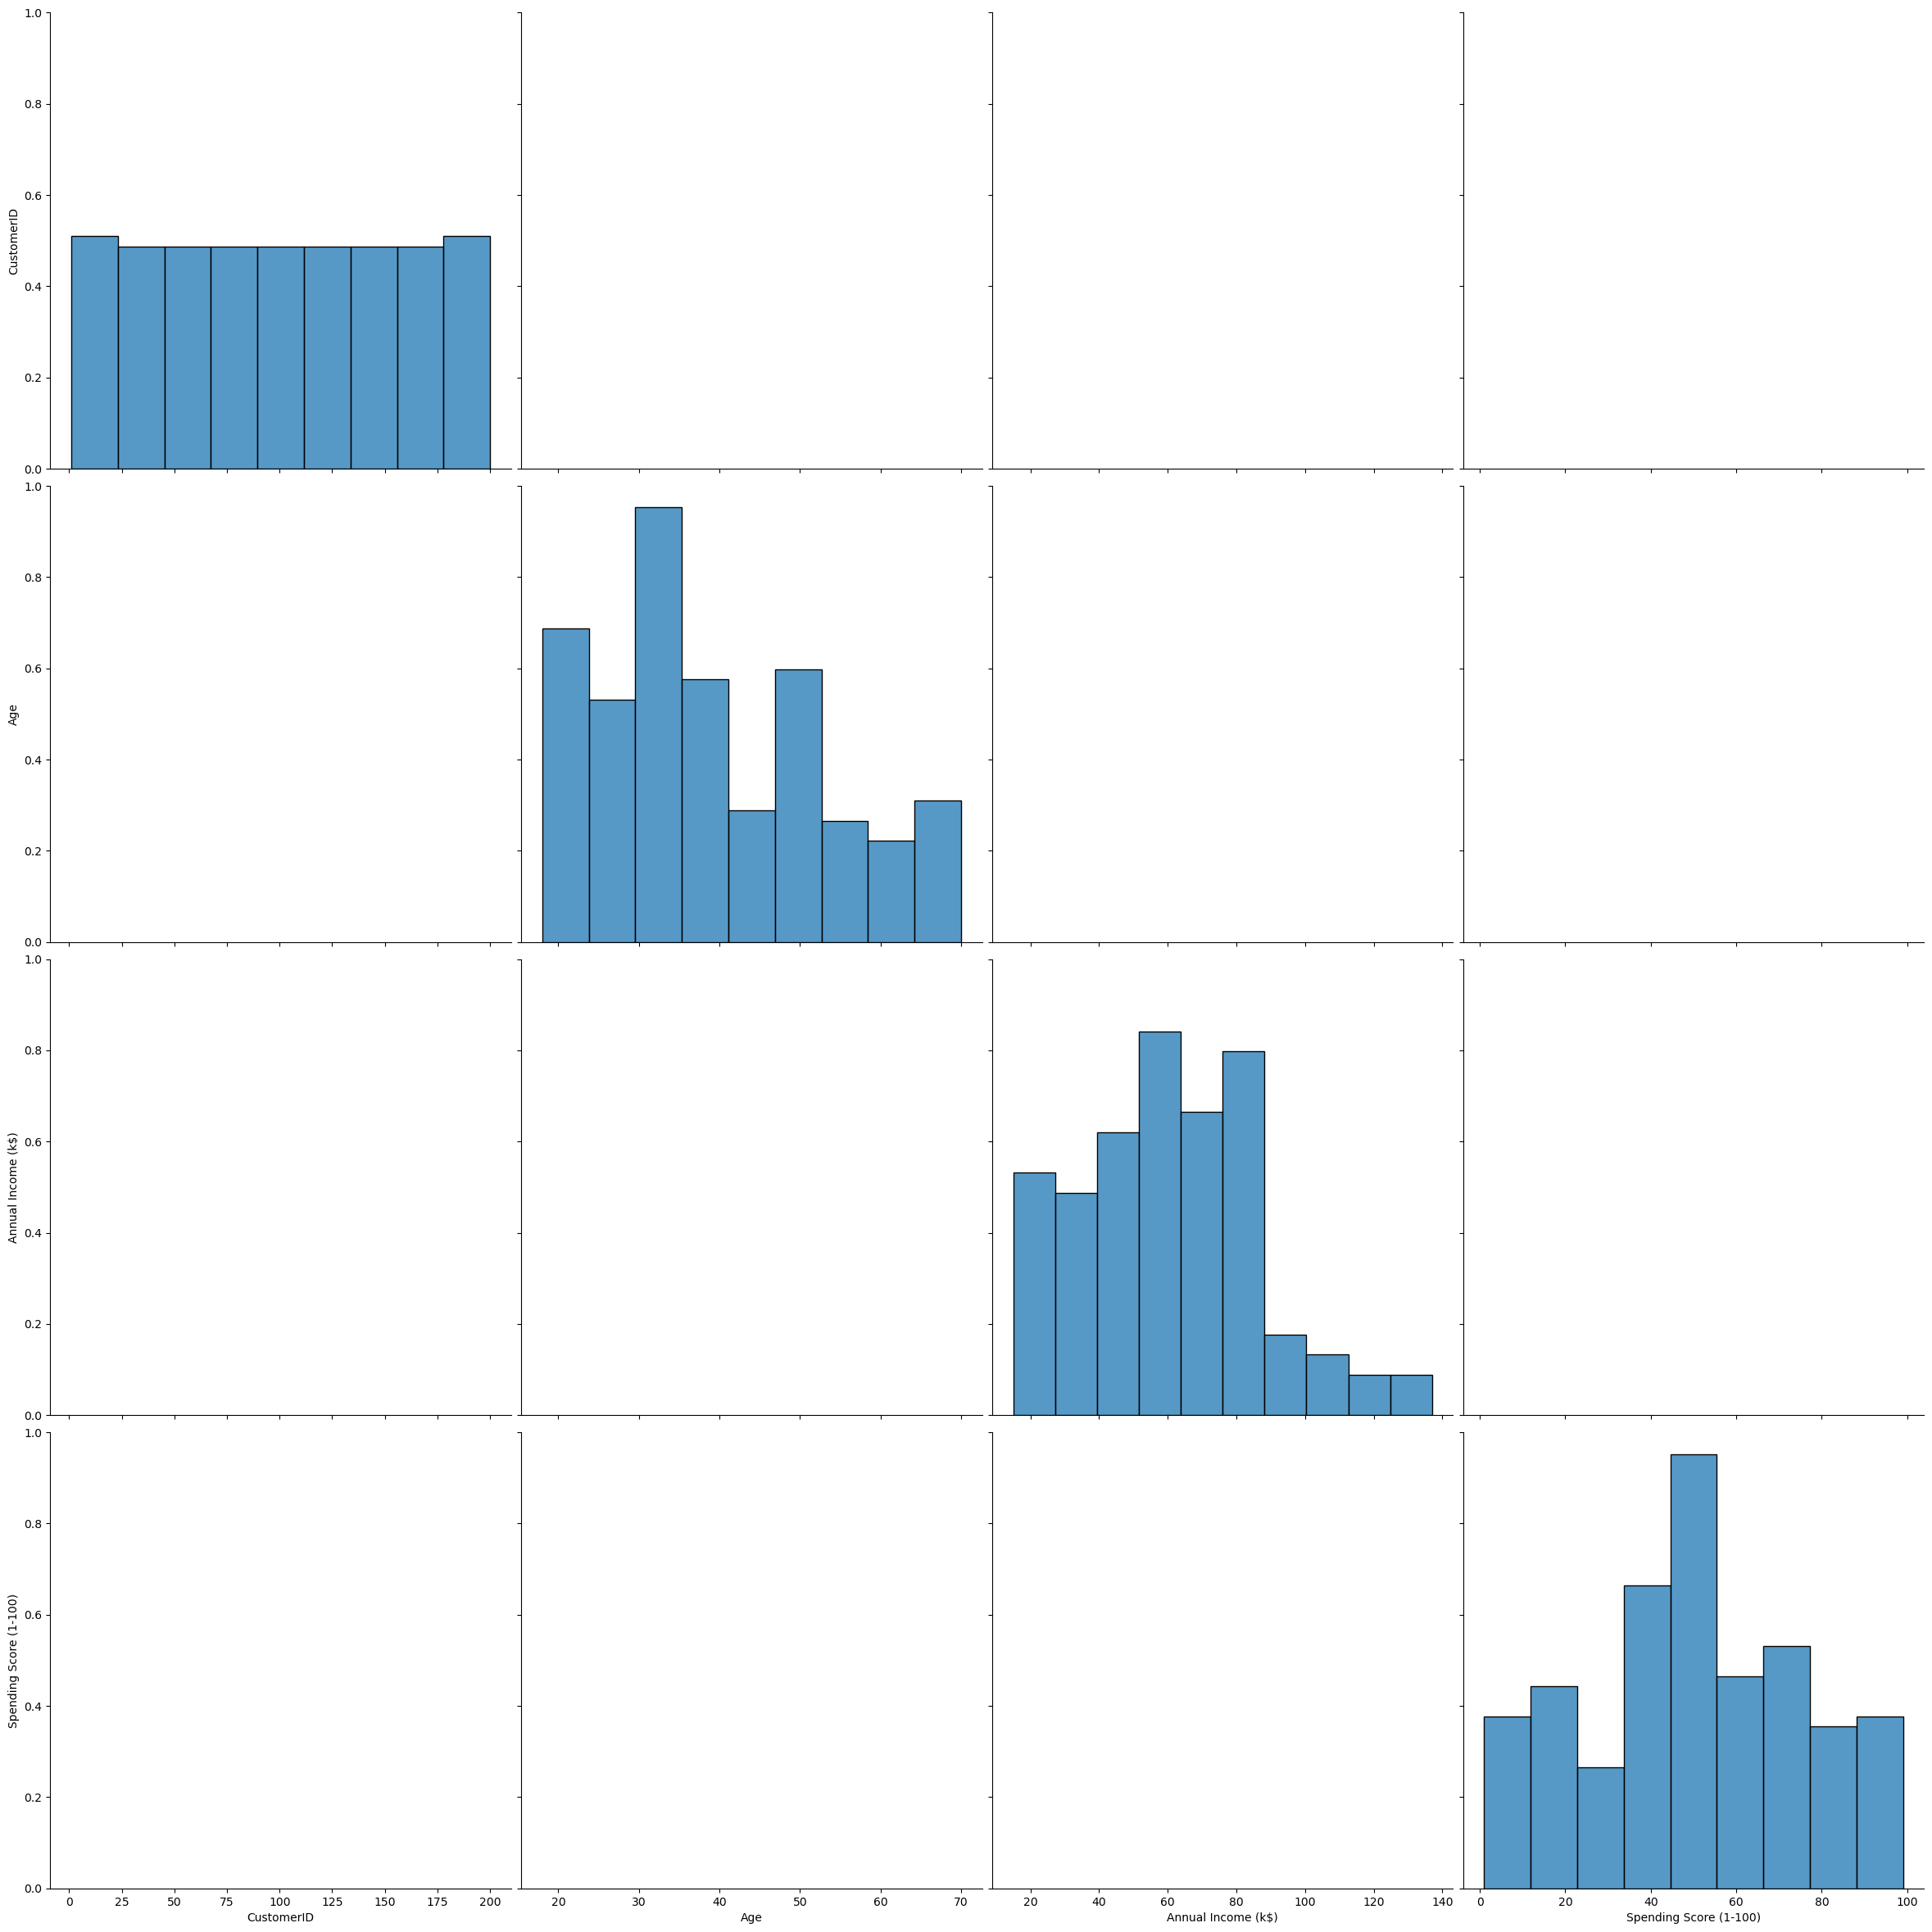

In [38]:
sns.pairplot(data_archivo.dropna(),size =6,kind='Age') # se ve la correlacion entre variables

In [9]:
#matriz de correlacion
corr_matrix = data_archivo.corr()
corr_matrix

CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000

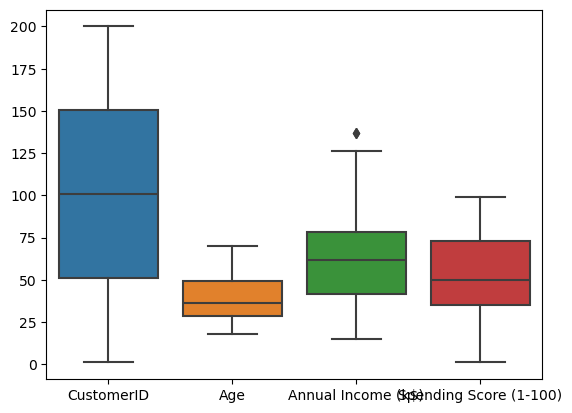

In [42]:
#diagrama de caja para cada variable

# Configuración 
%matplotlib inline
sns.boxplot(data=data_archivo)
plt.show()  # Mostrar el diagrama de caja

In [11]:
#estandarizar los datos antes de aplicar el k-means
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(data_archivo), columns = data_archivo.columns )
x

CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
0     -1.723412 -1.424569           -1.738999               -0.434801
1     -1.706091 -1.281035           -1.738999                1.195704
2     -1.688771 -1.352802           -1.700830               -1.715913
3     -1.671450 -1.137502           -1.700830                1.040418
4     -1.654129 -0.563369           -1.662660               -0.395980
..          ...       ...                 ...                     ...
195    1.654129 -0.276302            2.268791                1.118061
196    1.671450  0.441365            2.497807               -0.861839
197    1.688771 -0.491602            2.497807                0.923953
198    1.706091 -0.491602            2.917671               -1.250054
199    1.723412 -0.635135            2.917671                1.273347

[200 rows x 4 columns]

#K-MEANS

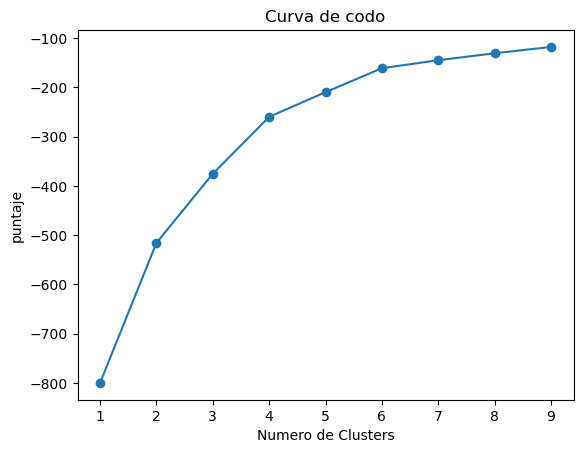

In [31]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('puntaje')
plt.title('Curva de codo')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=6).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[-0.15939748, -0.85819383, -0.13072514, -0.05393049],
       [-1.34163446, -0.97602698, -1.32549704,  1.0371827 ],
       [-0.32003975,  1.25526464, -0.26166879, -0.03158663],
       [ 1.10728918,  0.20350983,  1.05609358, -1.27778394],
       [-1.33905697,  0.47895722, -1.30822992, -1.19644353],
       [ 1.06522456, -0.44191719,  0.99158305,  1.23950275]])

In [14]:
#obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
#obtenemos los centrides
C = kmeans.cluster_centers_
colores=['red','green','cyan','blue','pink','black']
asignar=[]
for row in labels:
   asignar.append(colores[row])

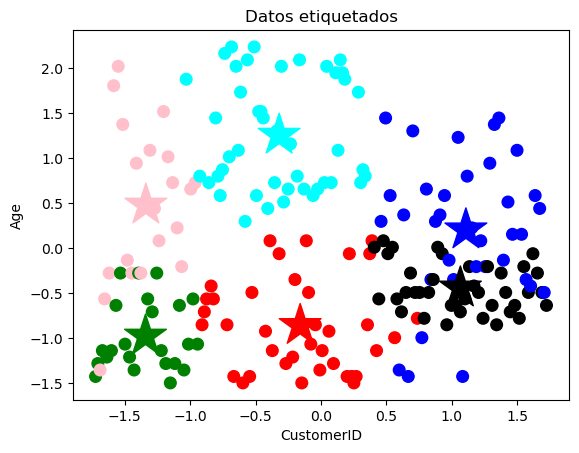

In [15]:
f1 = x['CustomerID'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

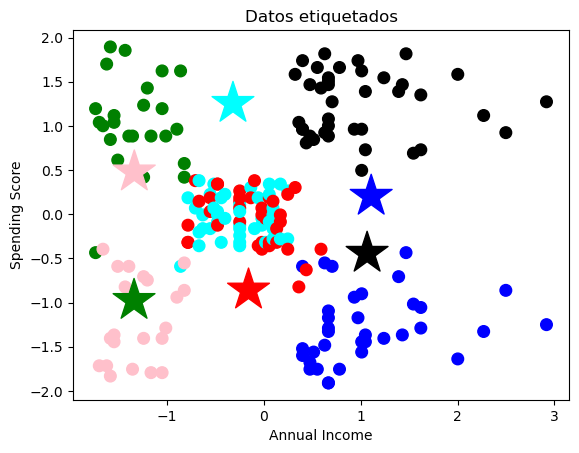

In [16]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [17]:
x_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))
new_label = kmeans.predict(x_new)
color=[]
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[0]
['red']


In [18]:
#calcular medidas de calidad para k-means
print("medidas de calidad para k-means: ")
print("puntaje de silueta:", metrics.silhouette_score(x,labels))
print("indice de calinski-Harabasz:", metrics.calinski_harabasz_score(x,labels))
print("inertia (suma de cuadrados dentro de los clusters): ", kmeans.inertia_)
print("Davies-blouldin Index:",metrics.davies_bouldin_score(x,labels))

medidas de calidad para k-means: 
puntaje de silueta: 0.4390404164555763
indice de calinski-Harabasz: 154.02416344766775
inertia (suma de cuadrados dentro de los clusters):  160.97567568819875
Davies-blouldin Index: 0.7727728312990473


# hierarcchical clustering

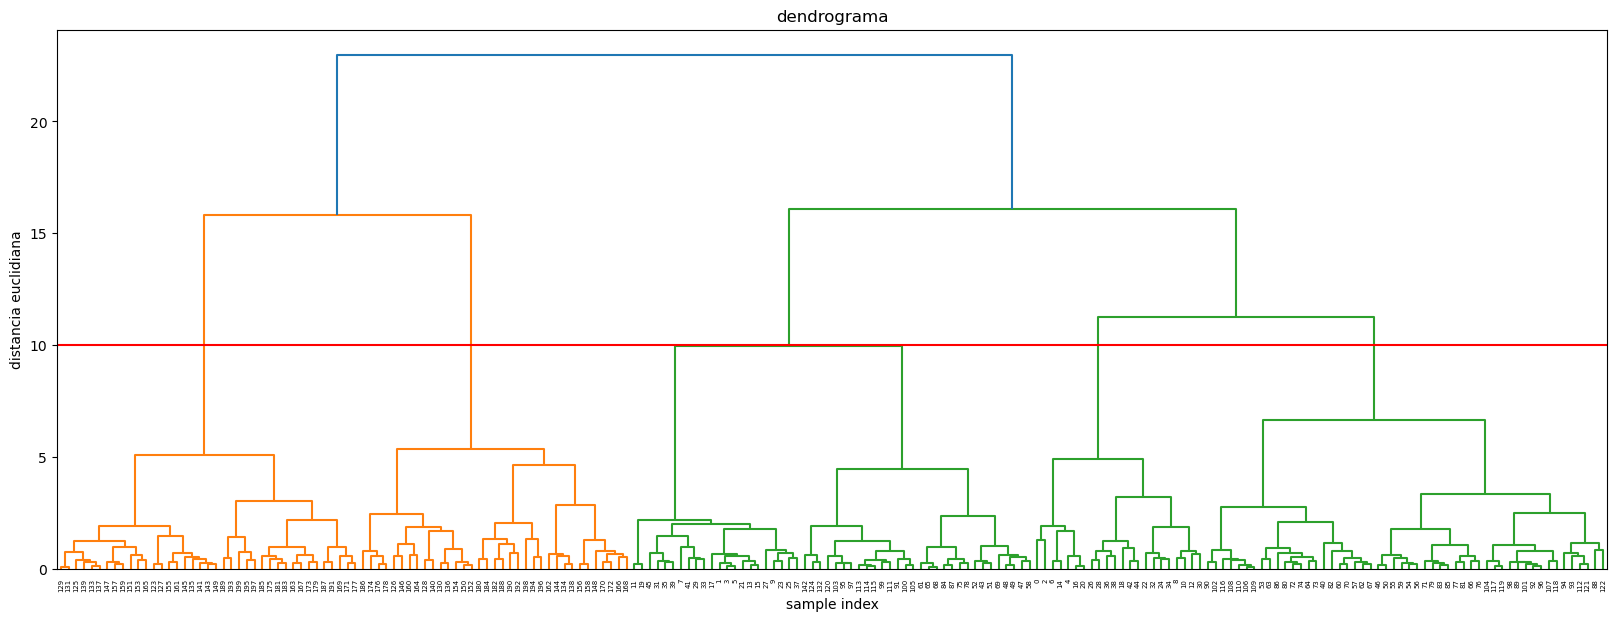

In [32]:
ward_clustering = linkage(x, method="ward", metric= "euclidean")
plt.figure(figsize=(20,7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('dendrograma')
plt.xlabel('sample index')
plt.ylabel('distancia euclidiana')
plt.show()

In [20]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 2,
       4, 5, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [21]:
#obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan','blue','pink','black']
asignar=[]
for row in labels:
   asignar.append(colores[row])

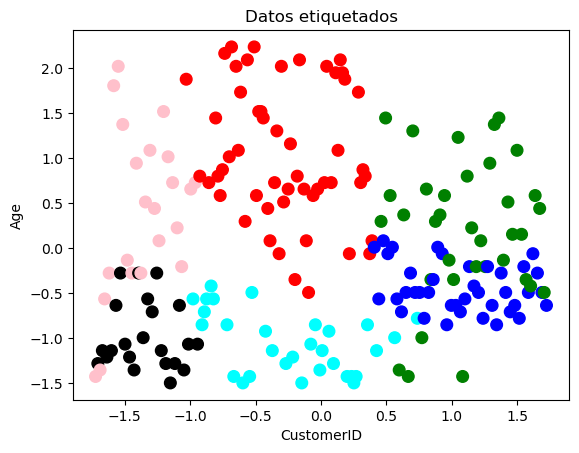

In [22]:
f1 = x['CustomerID'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

In [23]:
def plot_dendrogram(model, **kwargs):

    from scipy.cluster.hierarchy import dendrogram
    import numpy as np
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, marge in enumerate(model.children_):
        current_count = 0
        for child_idx in marge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
                counts[i] = current_count
                distances = np.arange(model.children_.shape[0])
                linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
                #plot
                plt.figure(figsize=(20,7))
                dendrogram(linkage_matrix, **kwargs)
                plt.title('dendrograma')
                plt.xlabel('simple index')
                plt.ylabel('euclidean distance')
                plt.show()

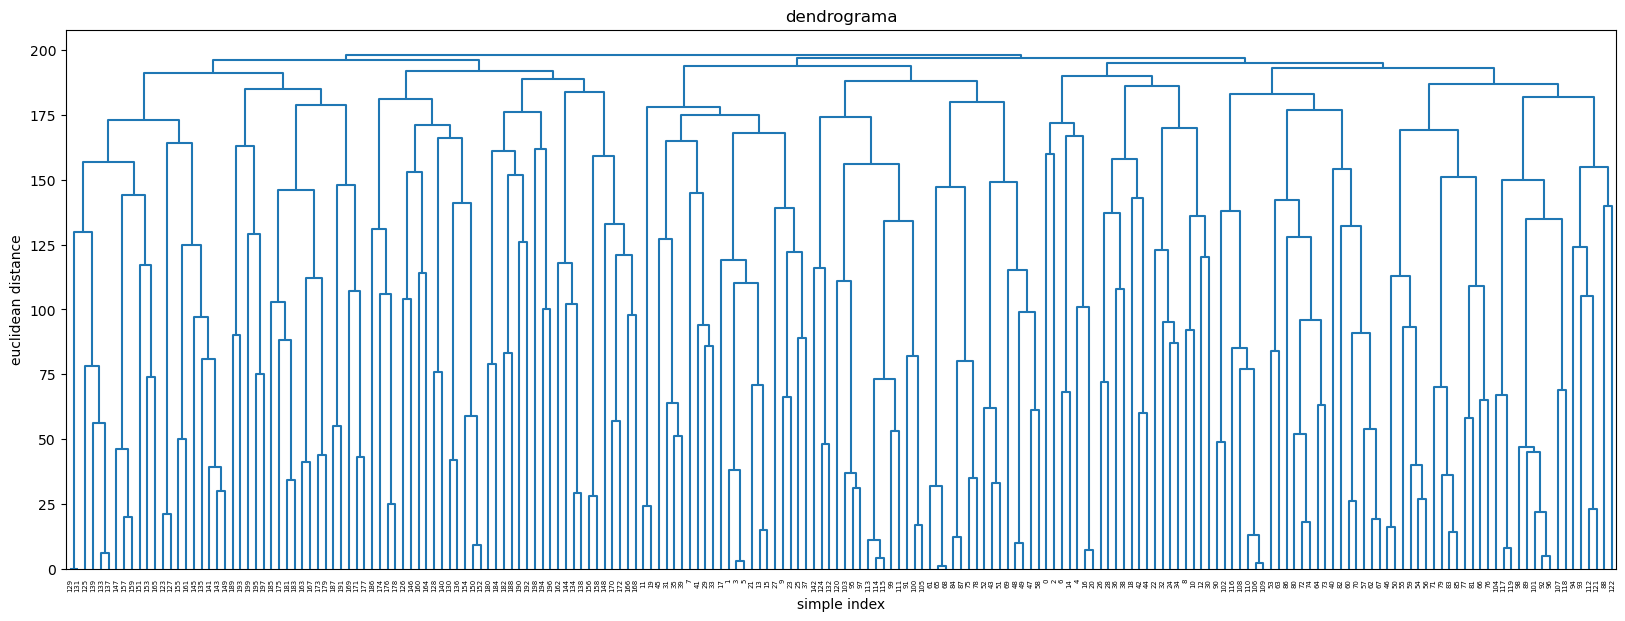

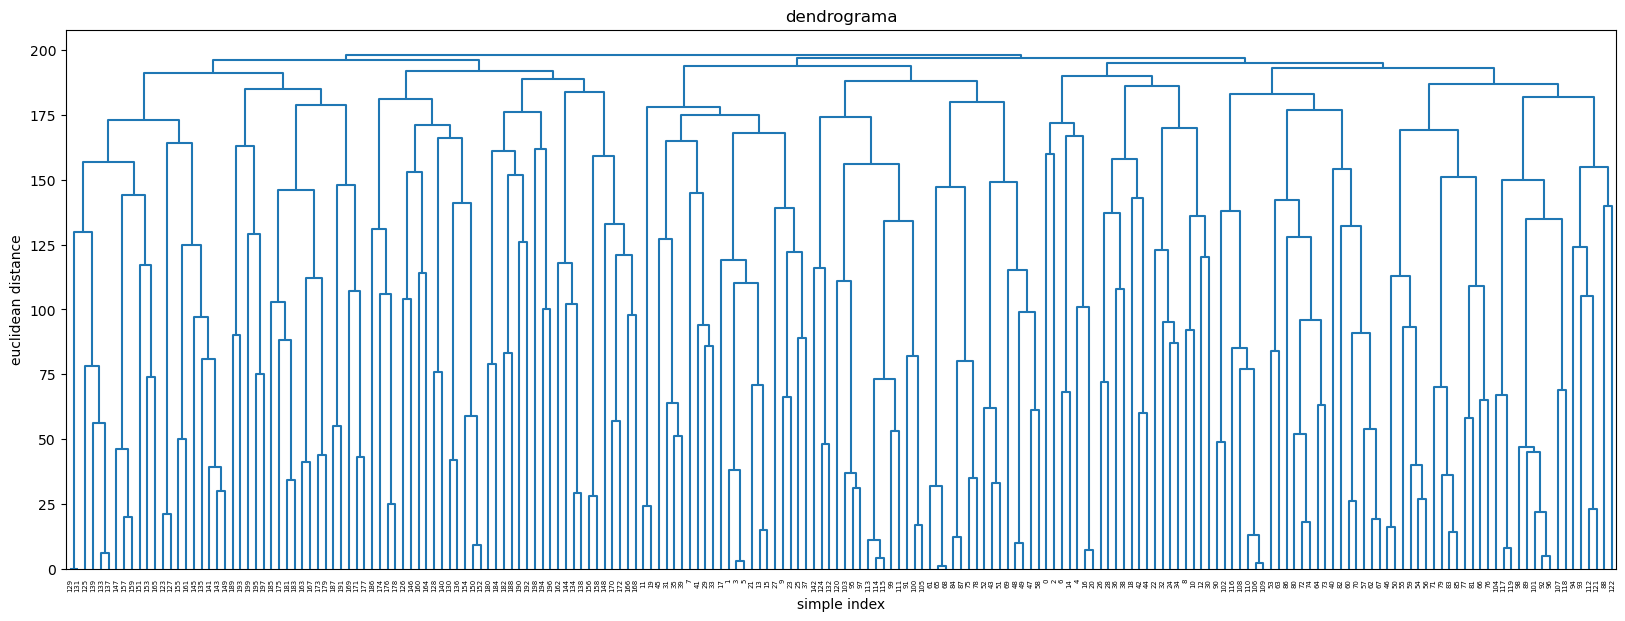

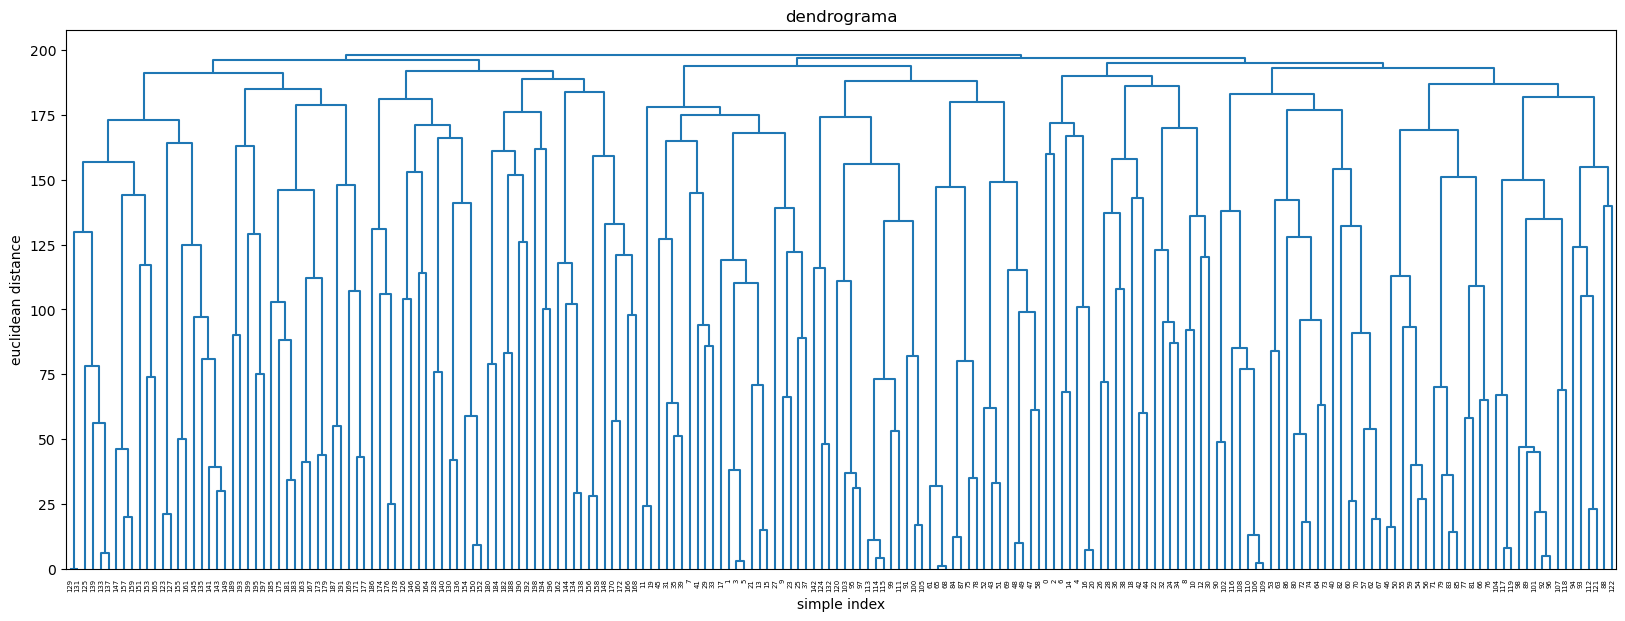

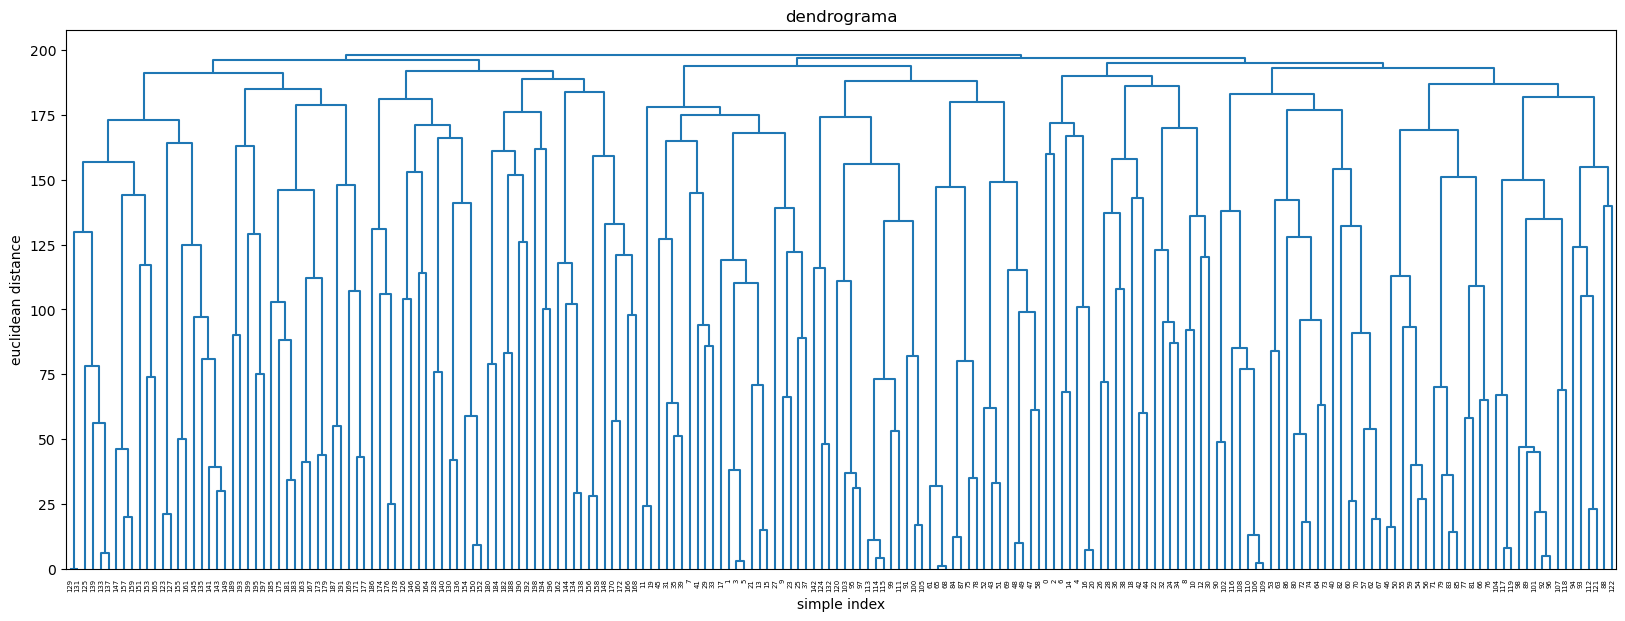

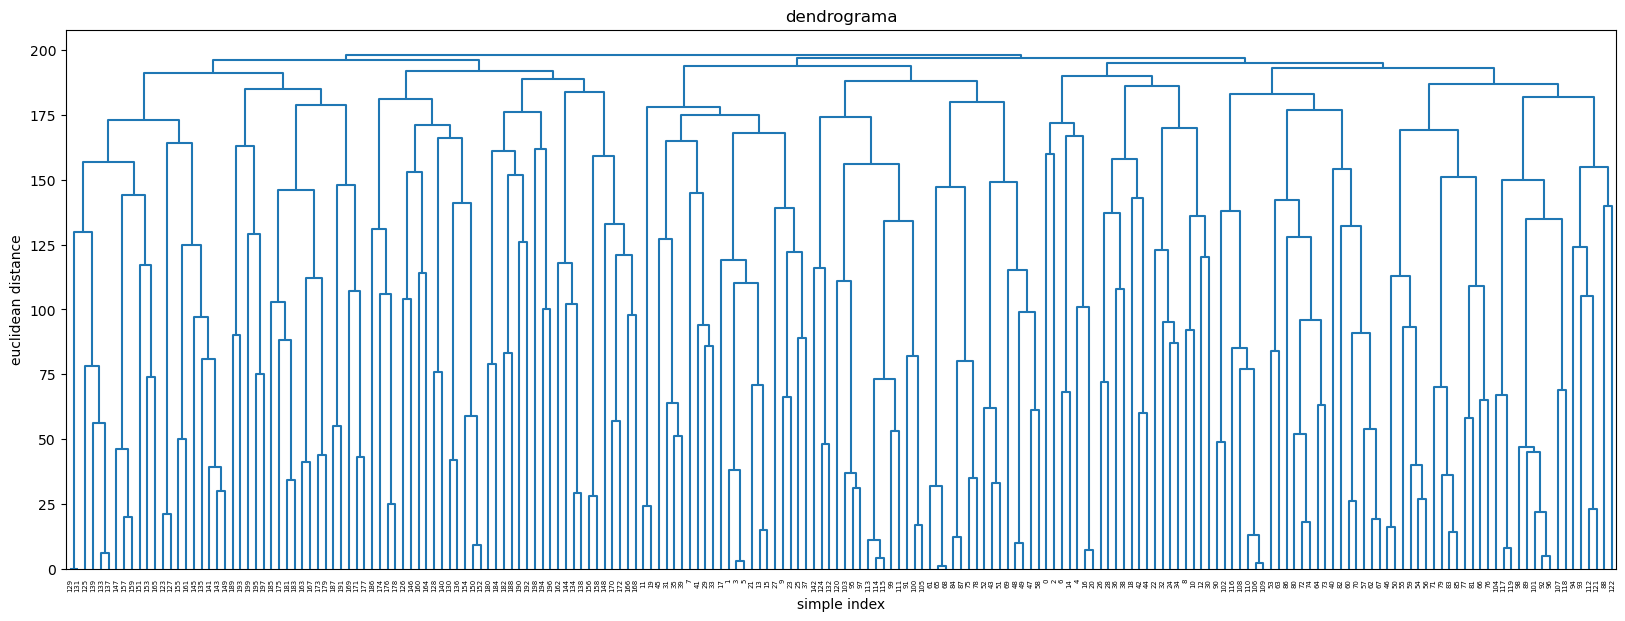

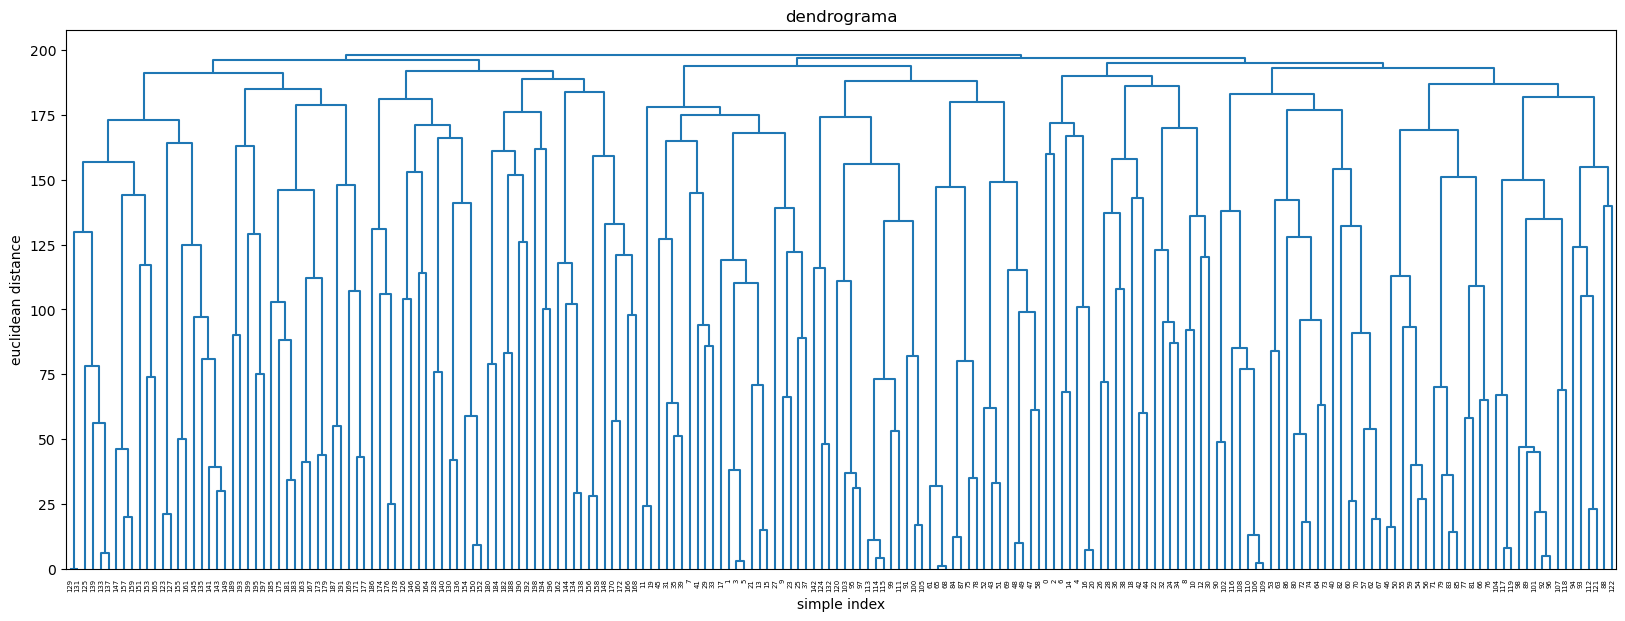

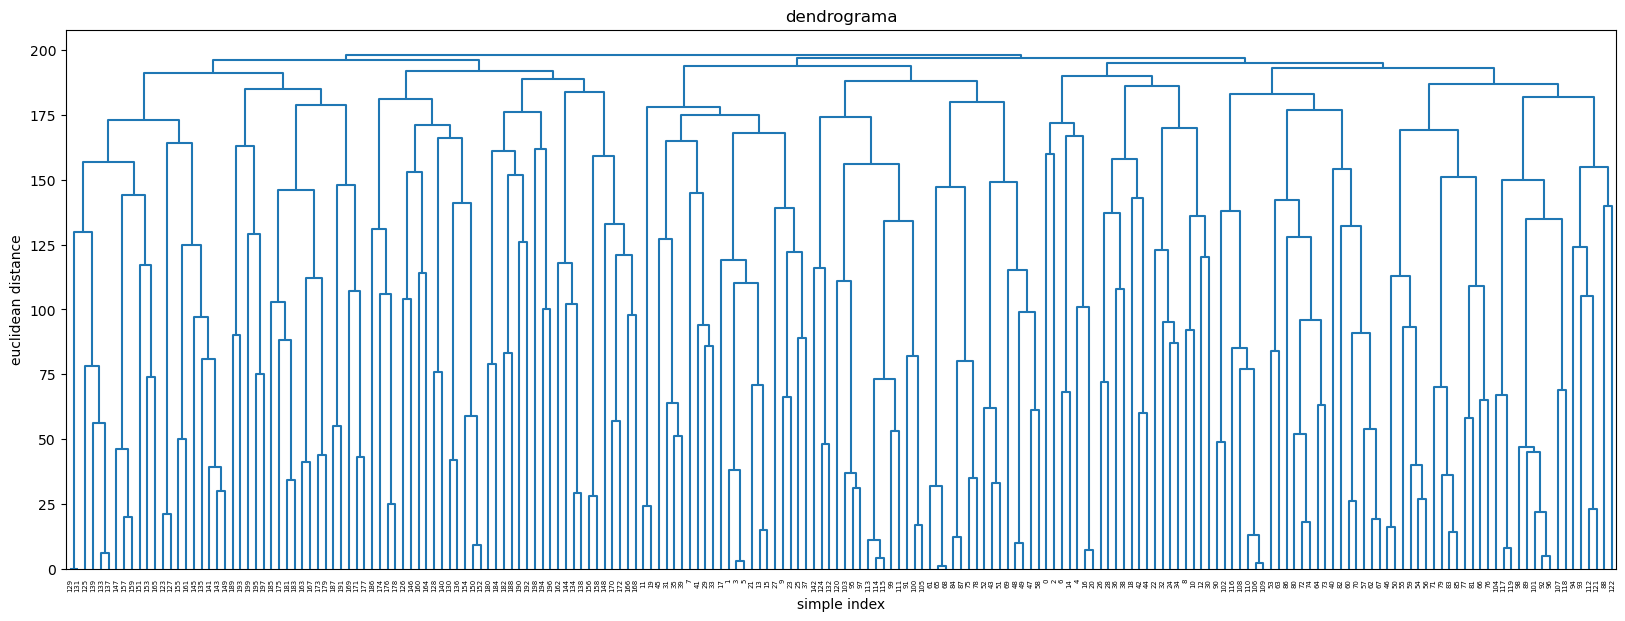

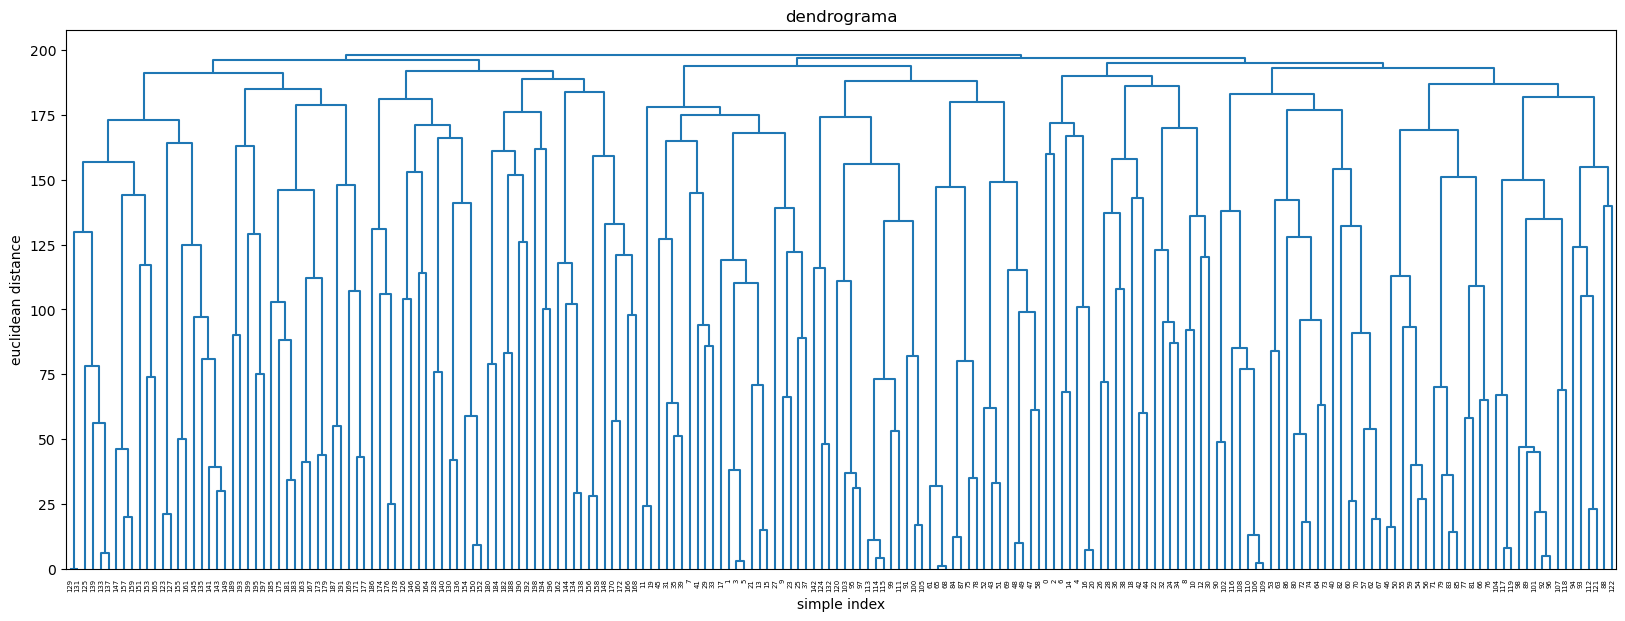

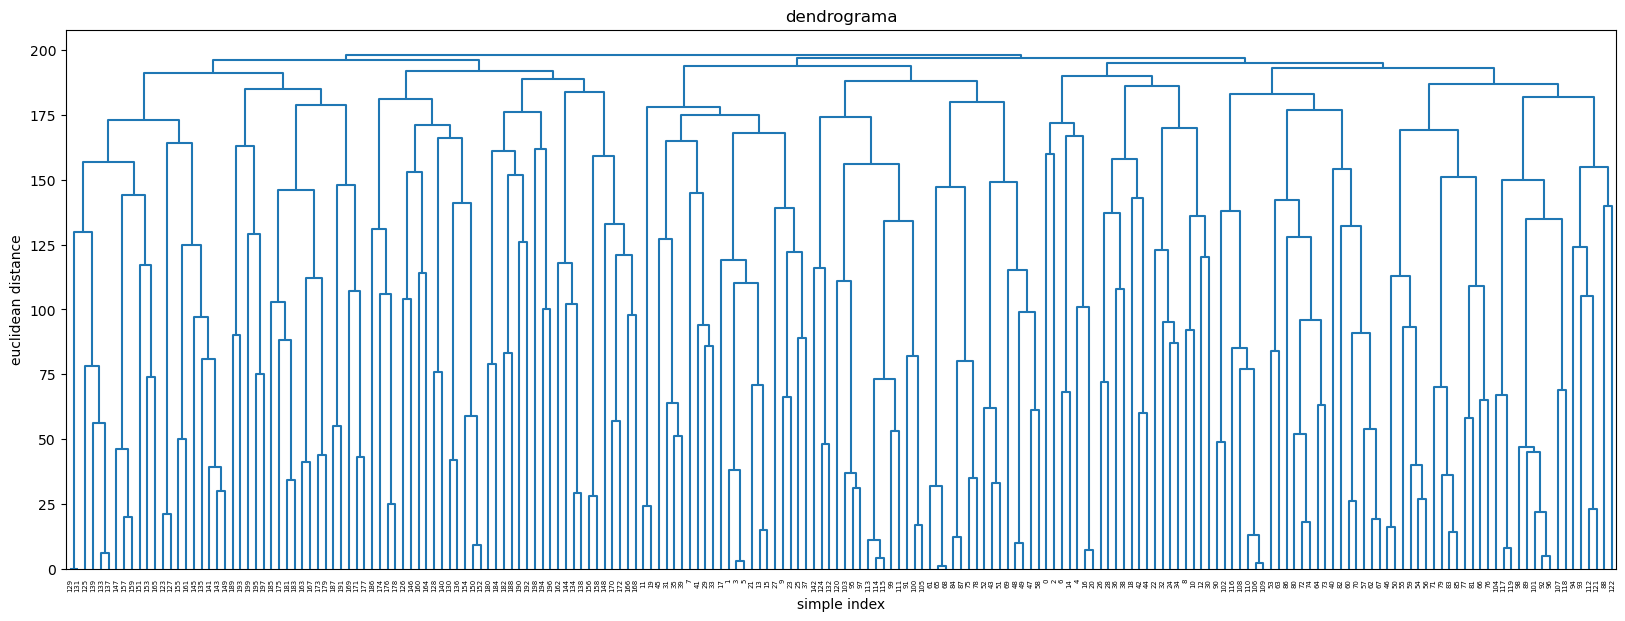

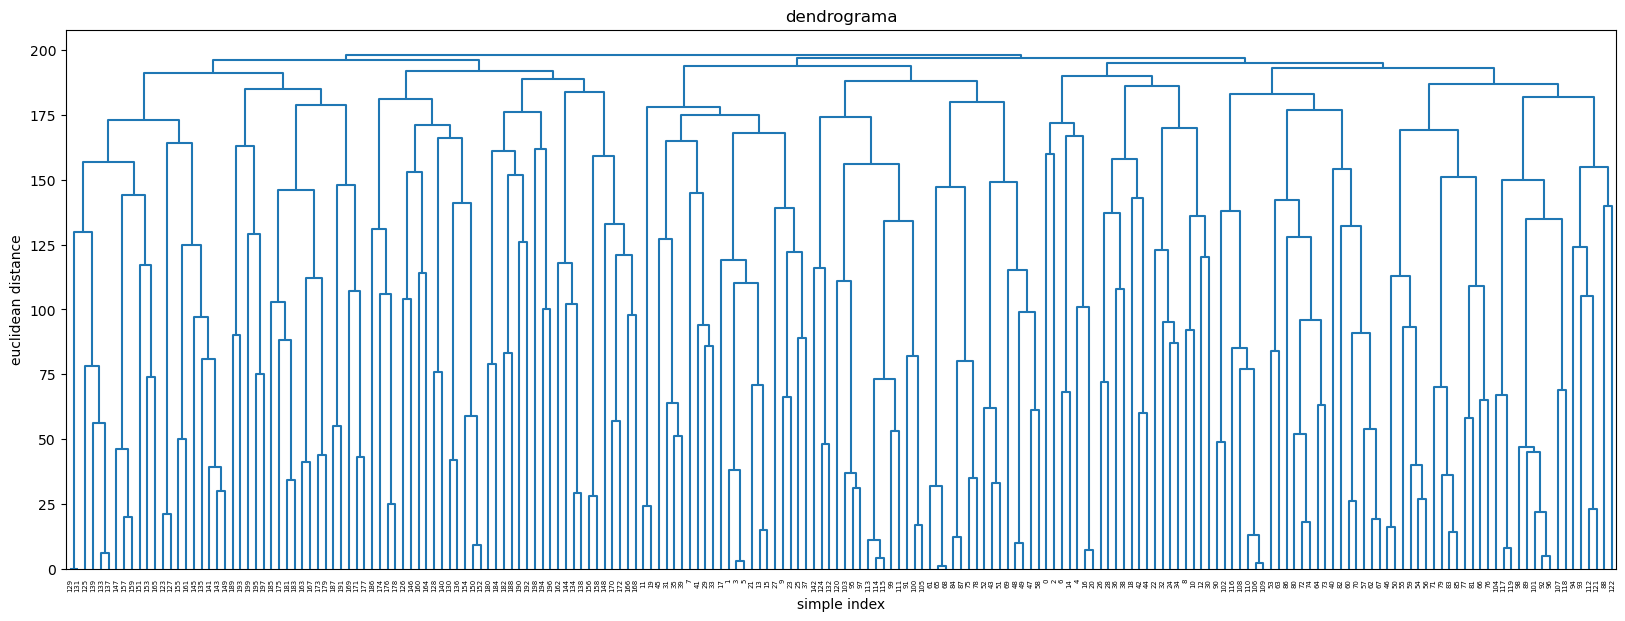

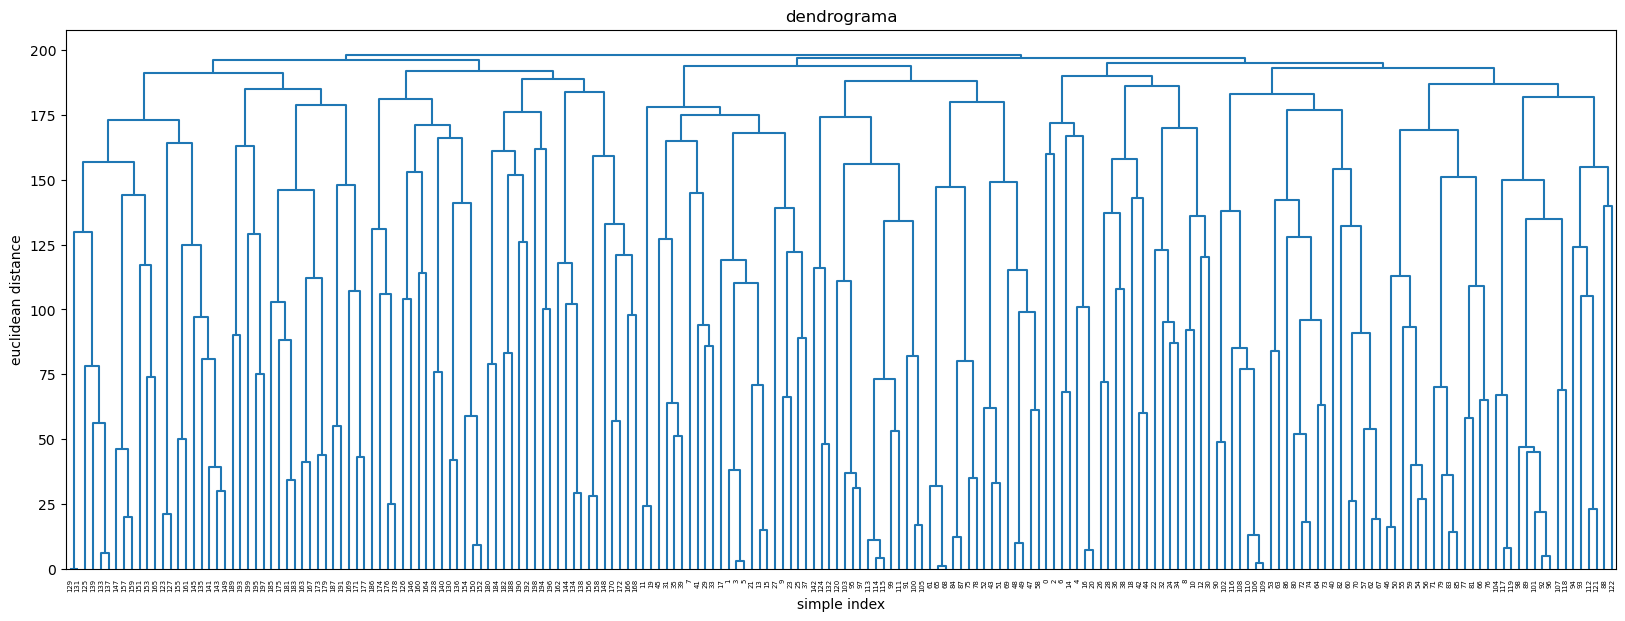

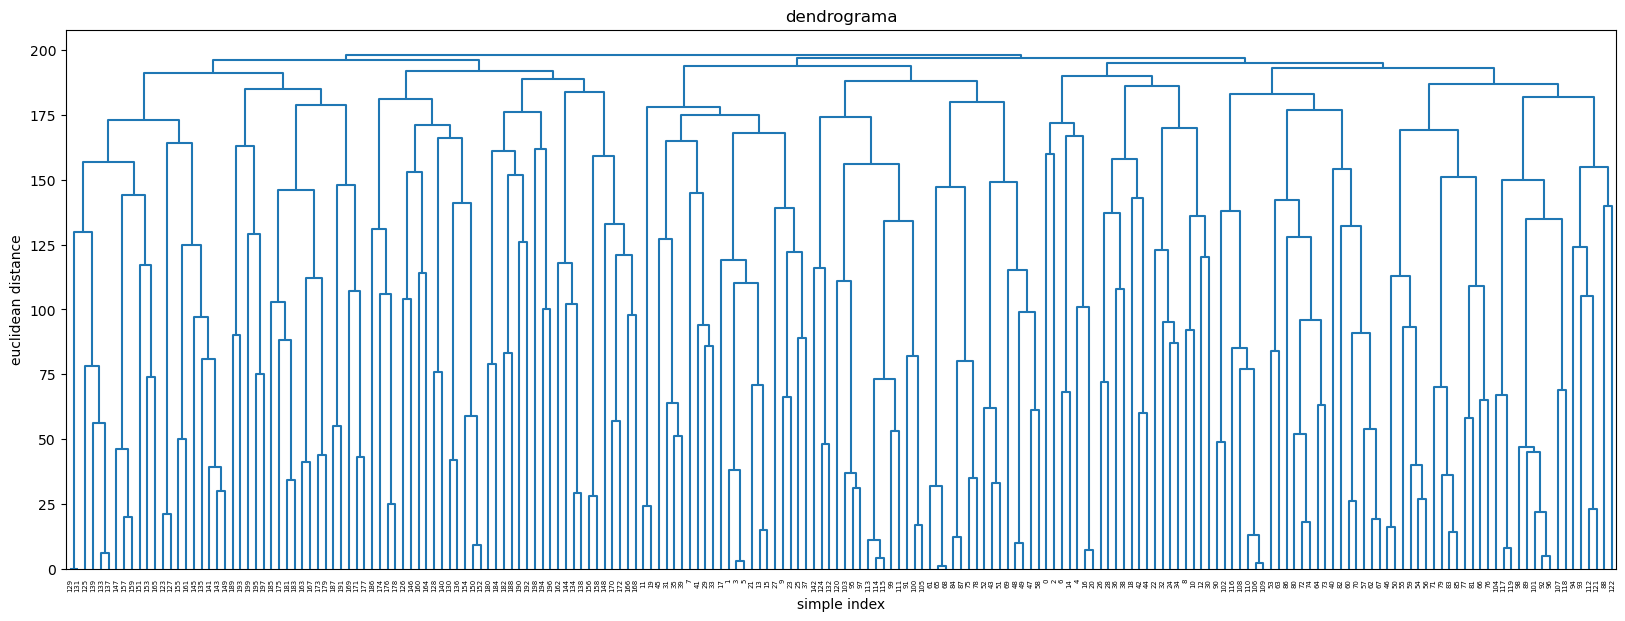

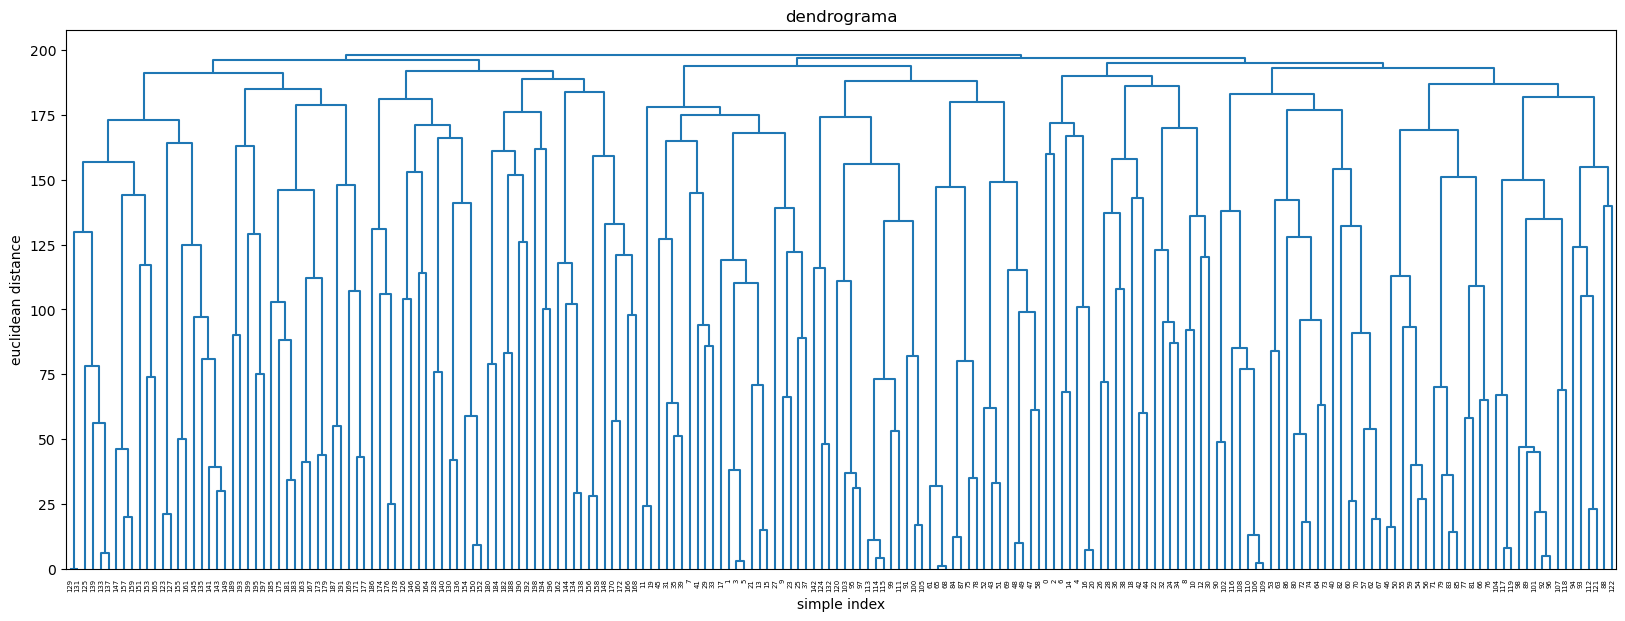

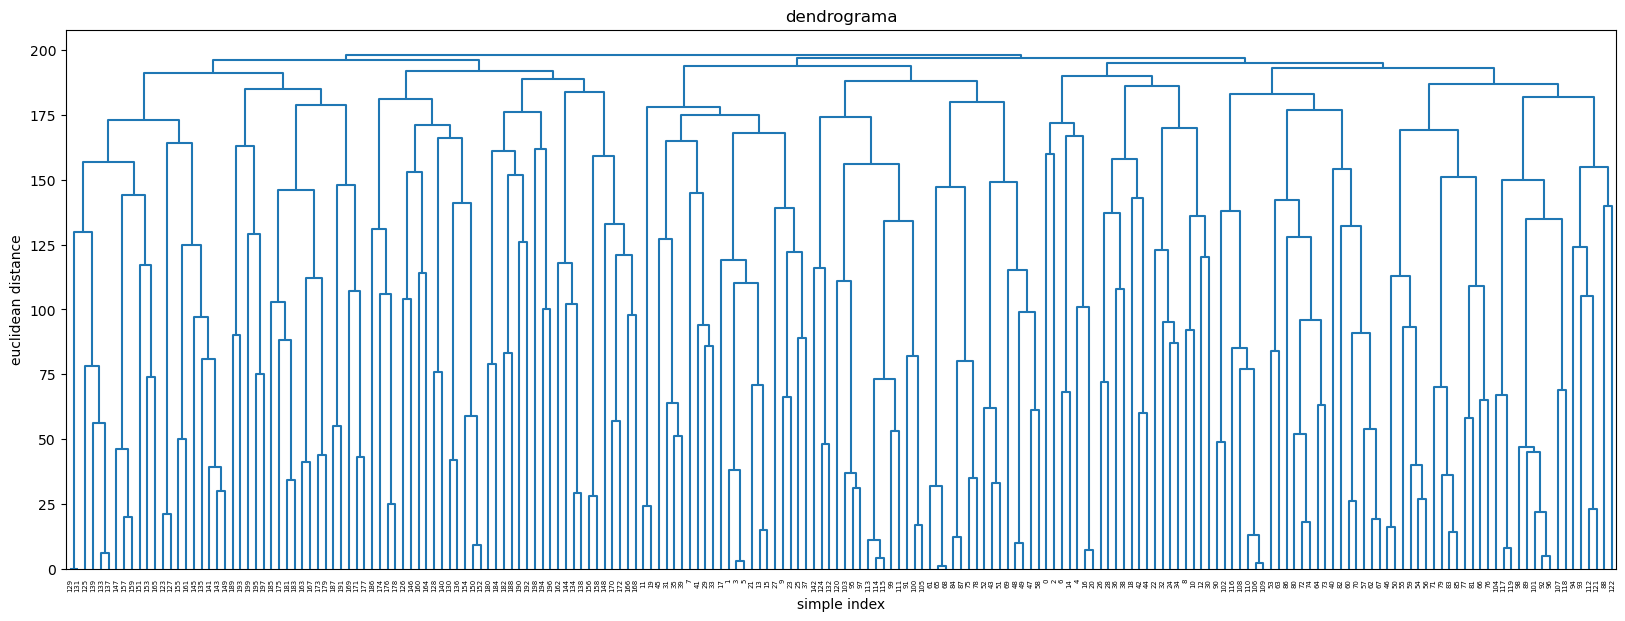

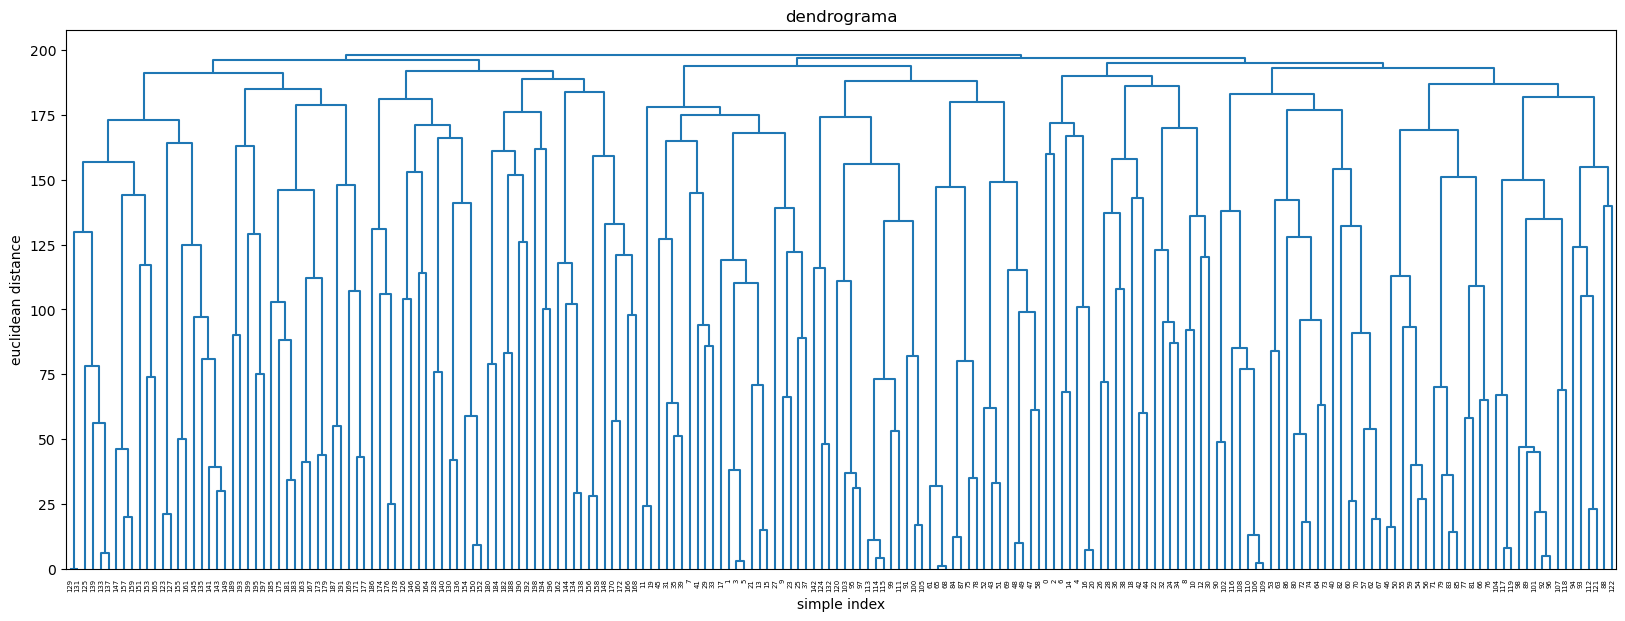

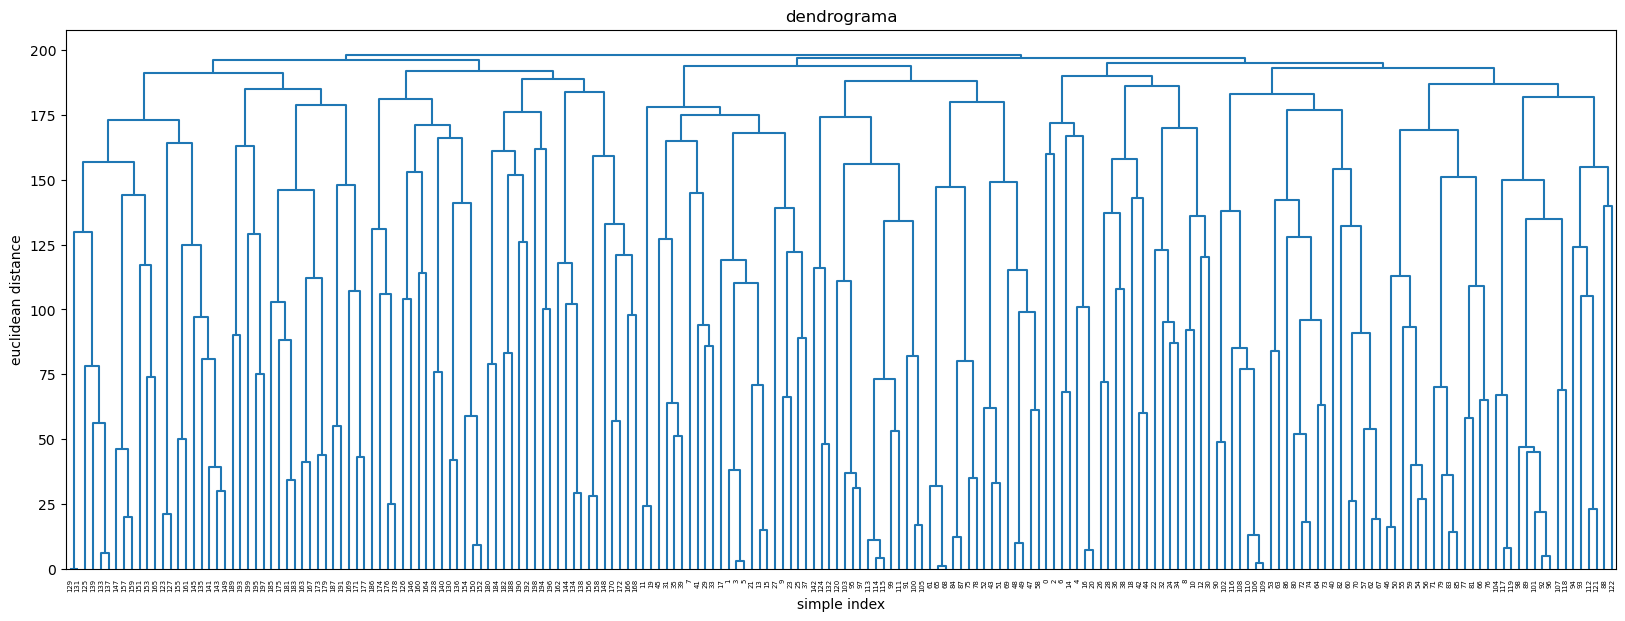

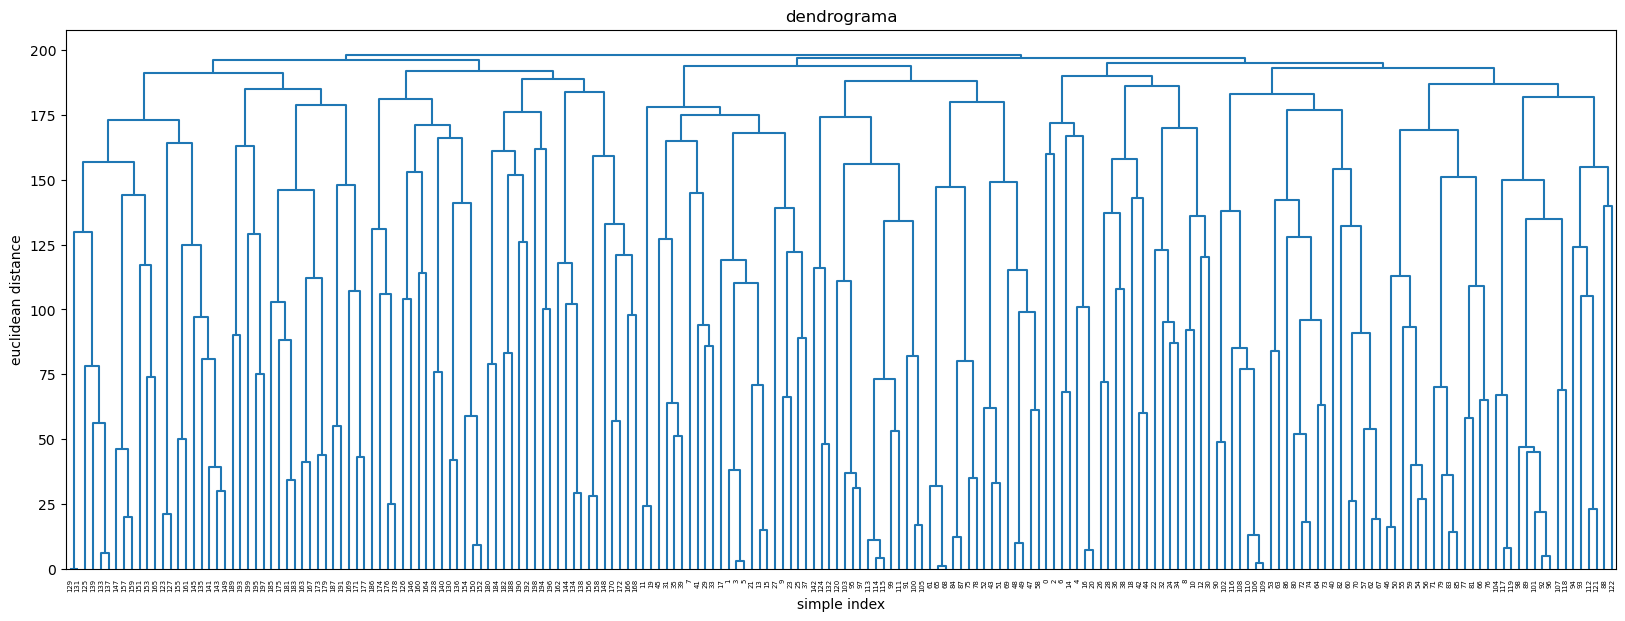

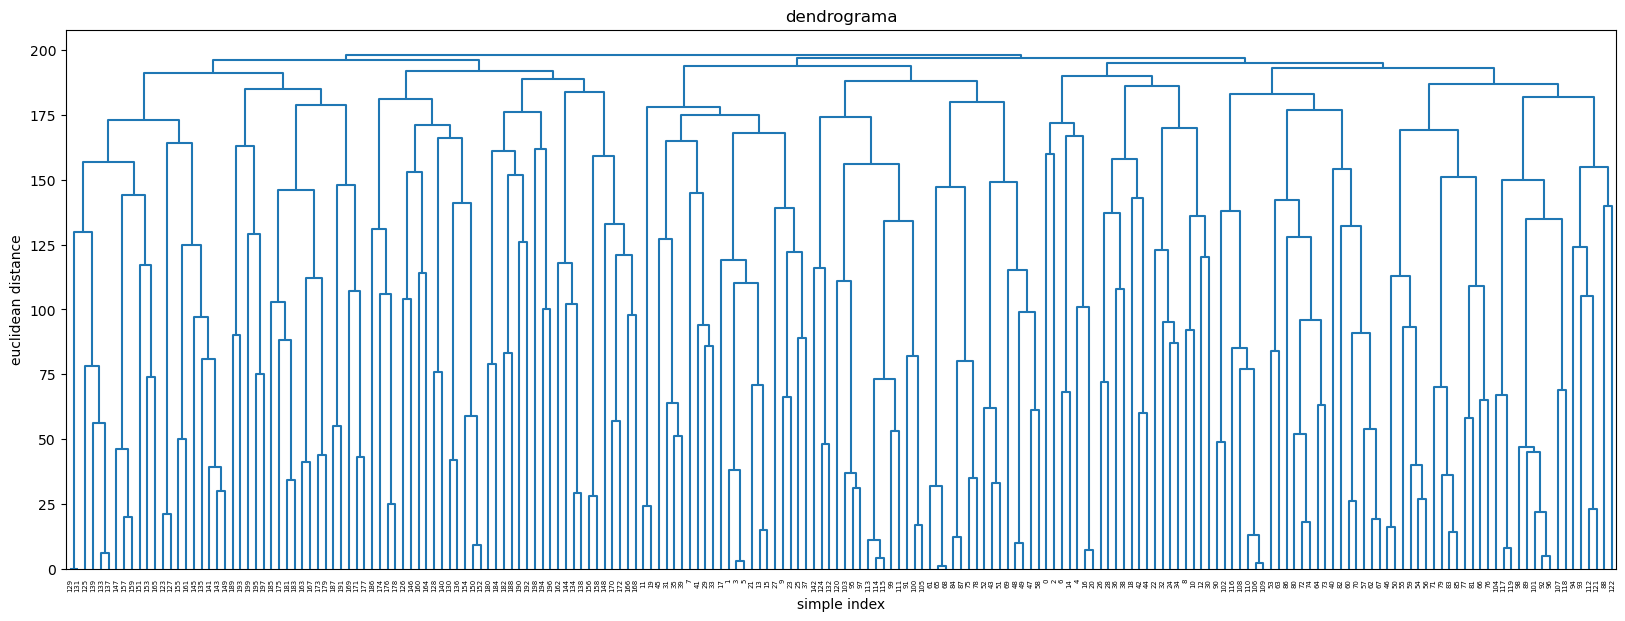

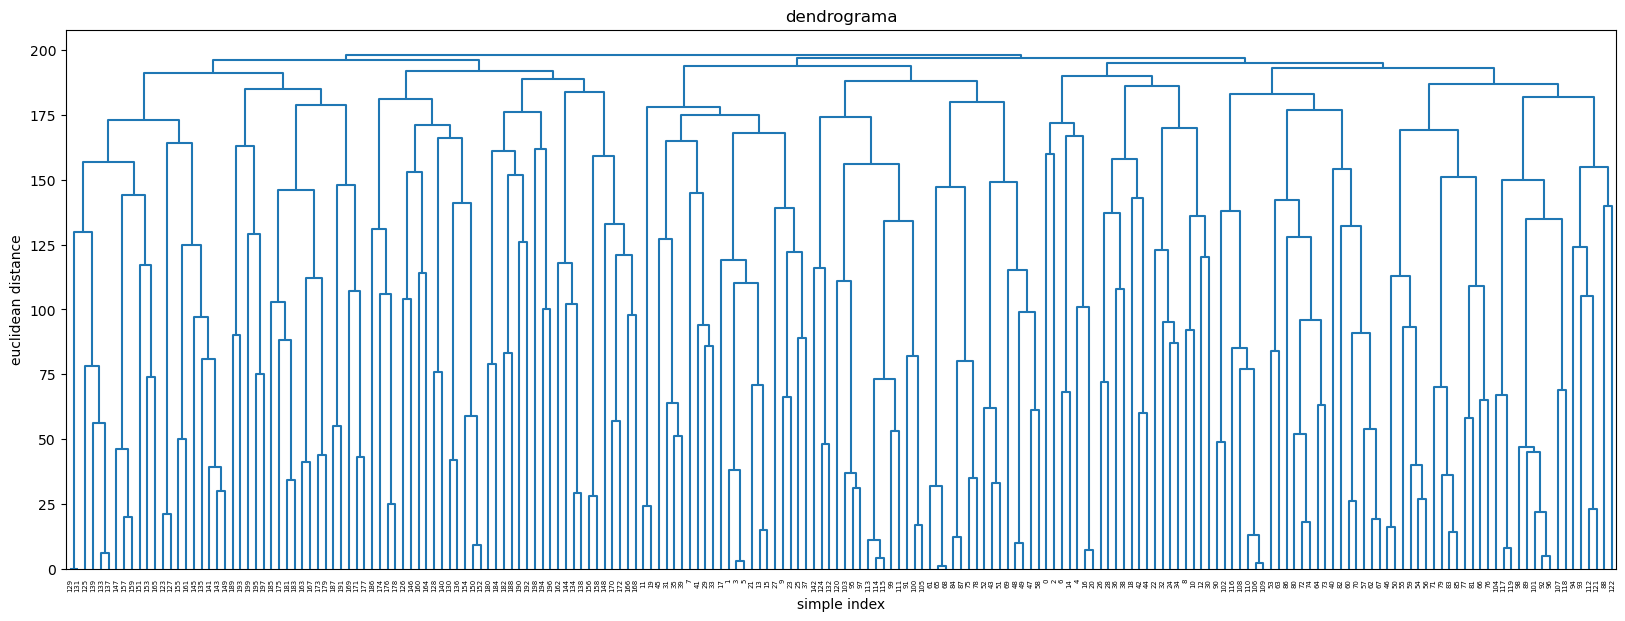

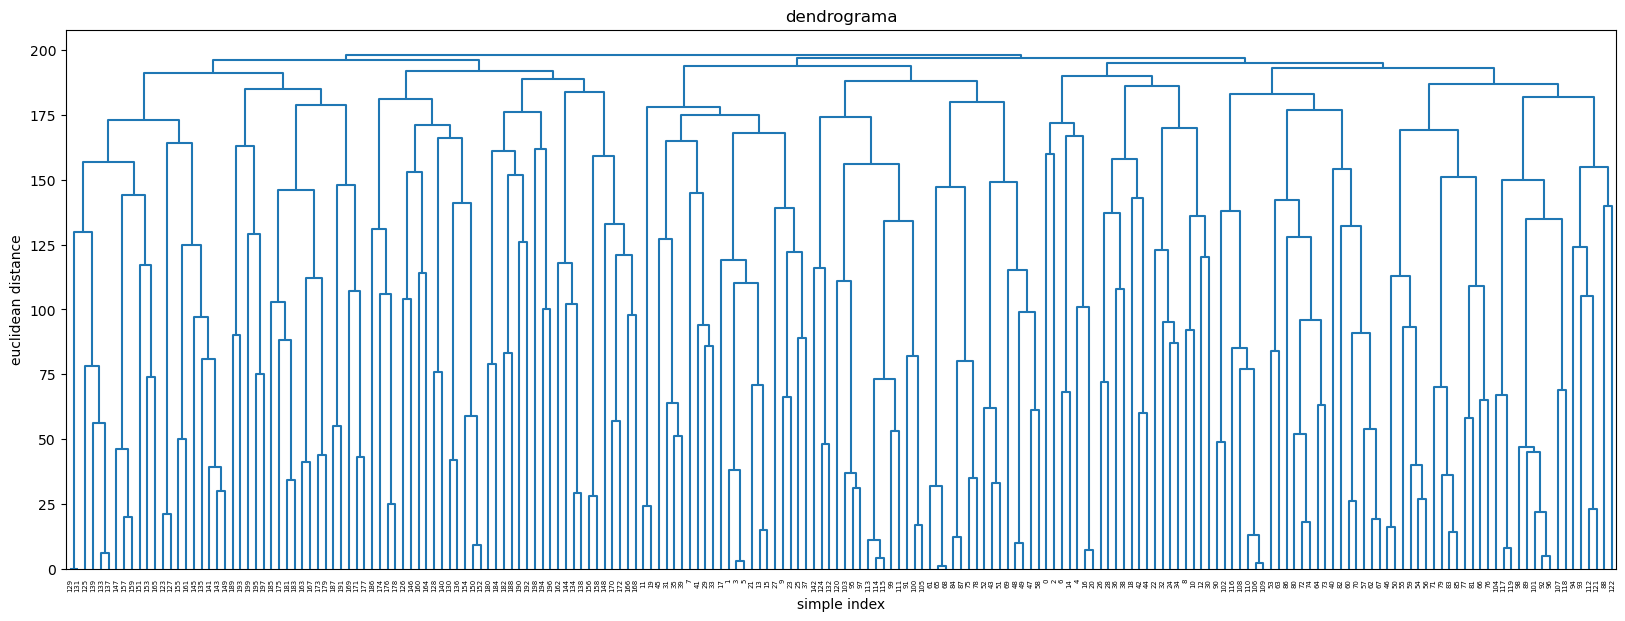

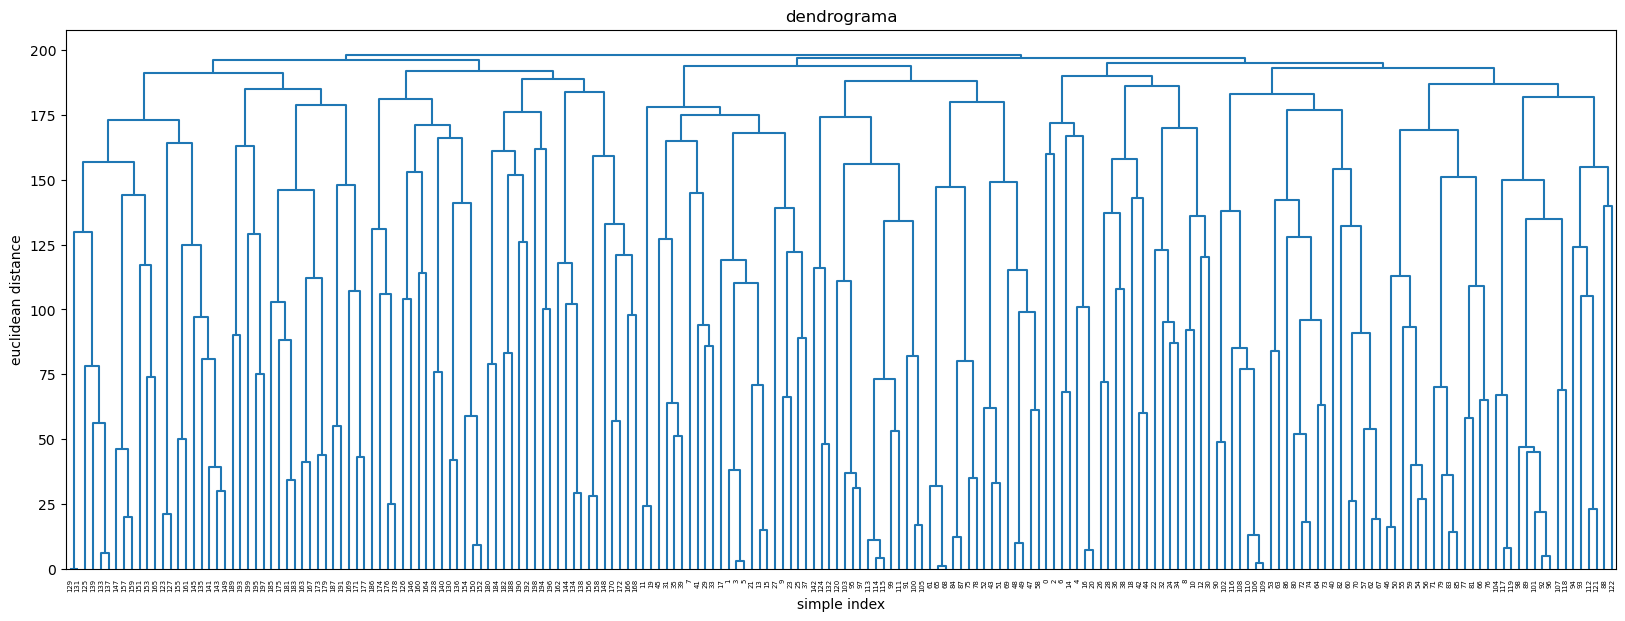

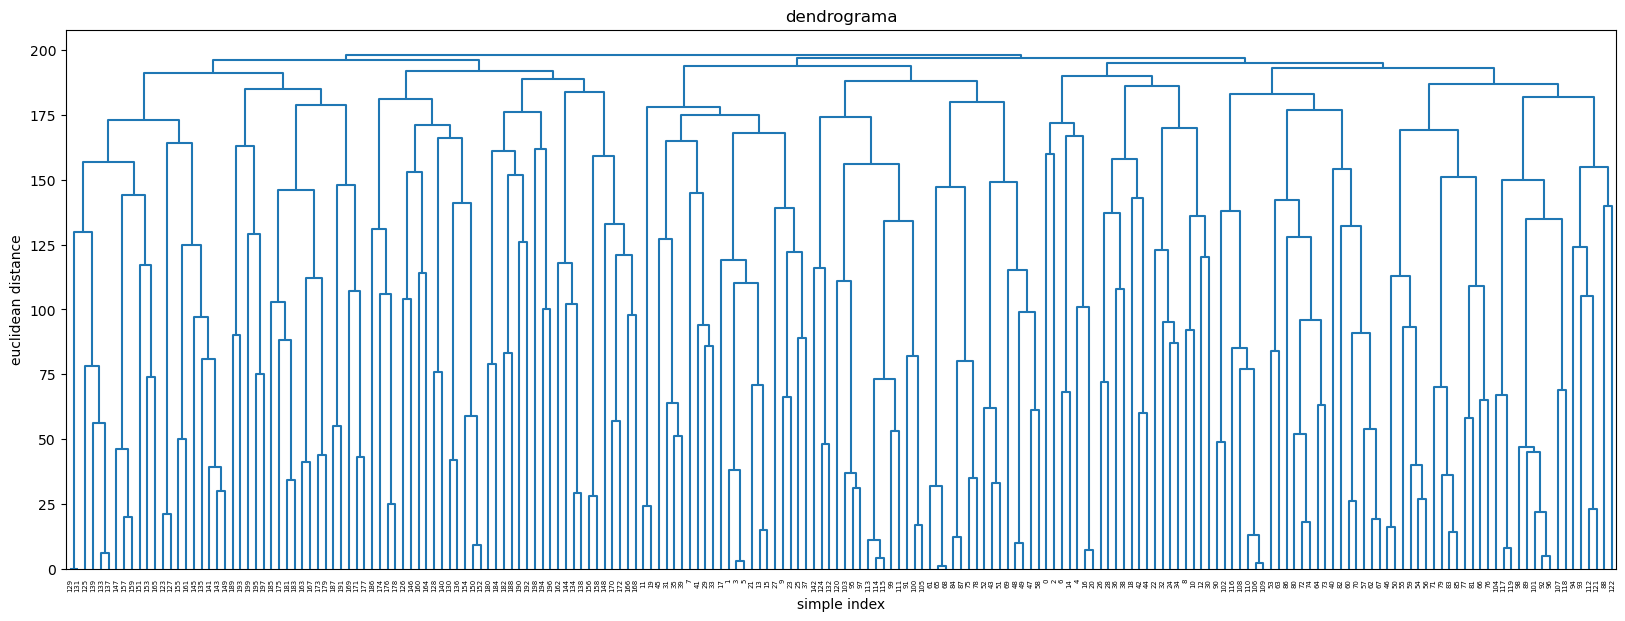

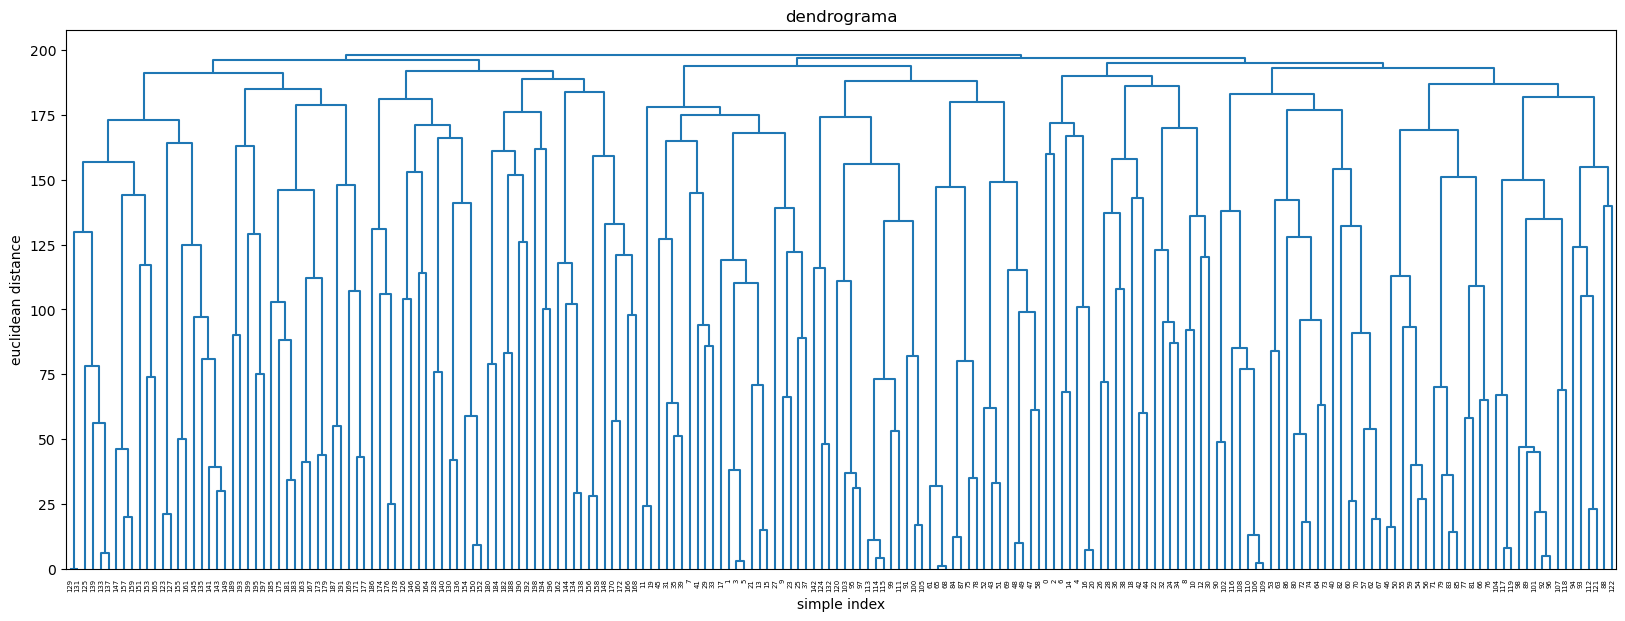

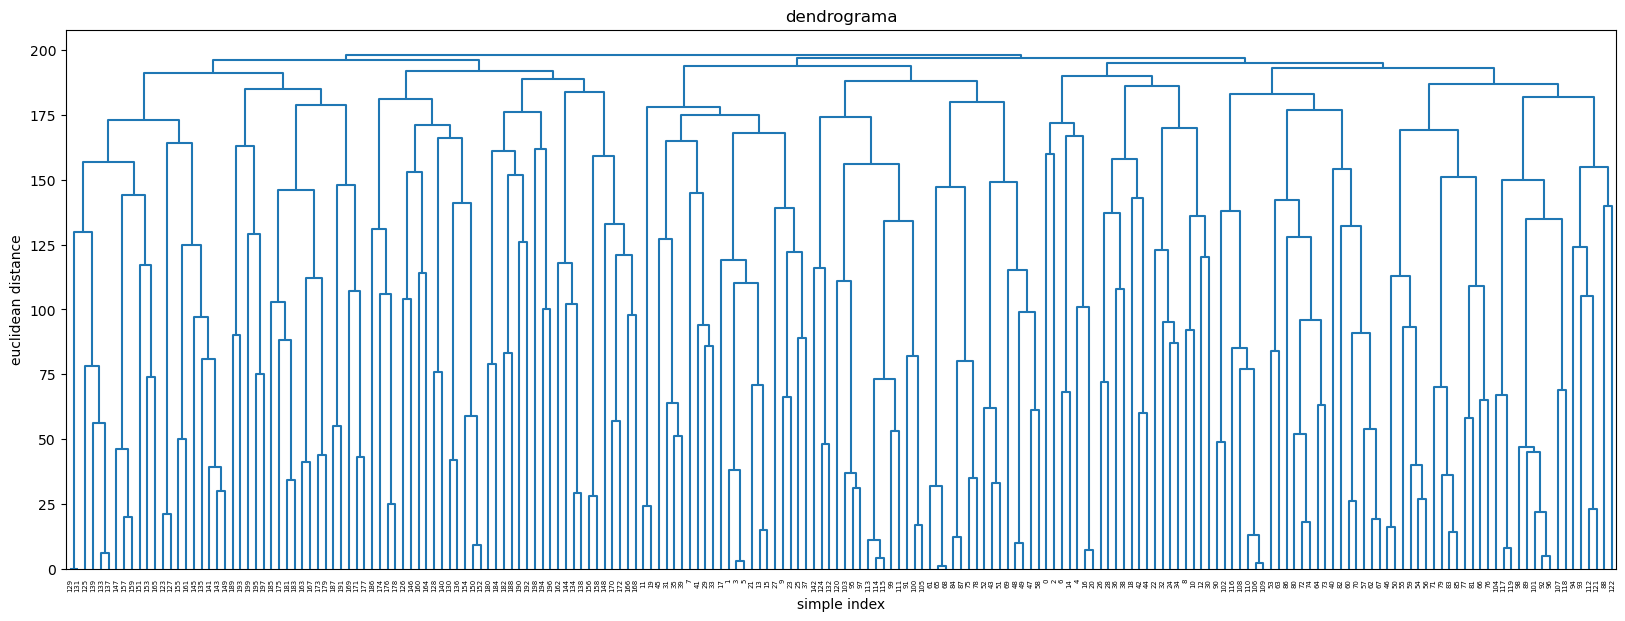

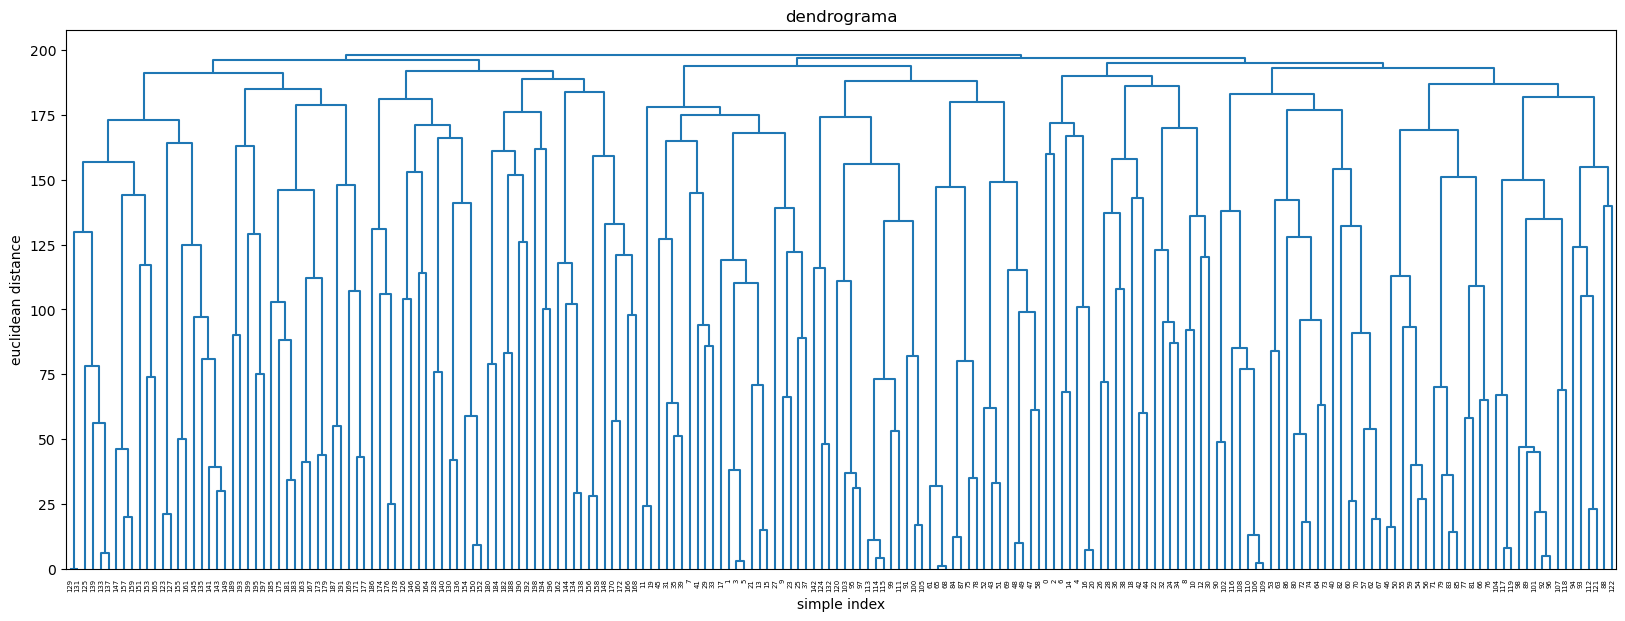

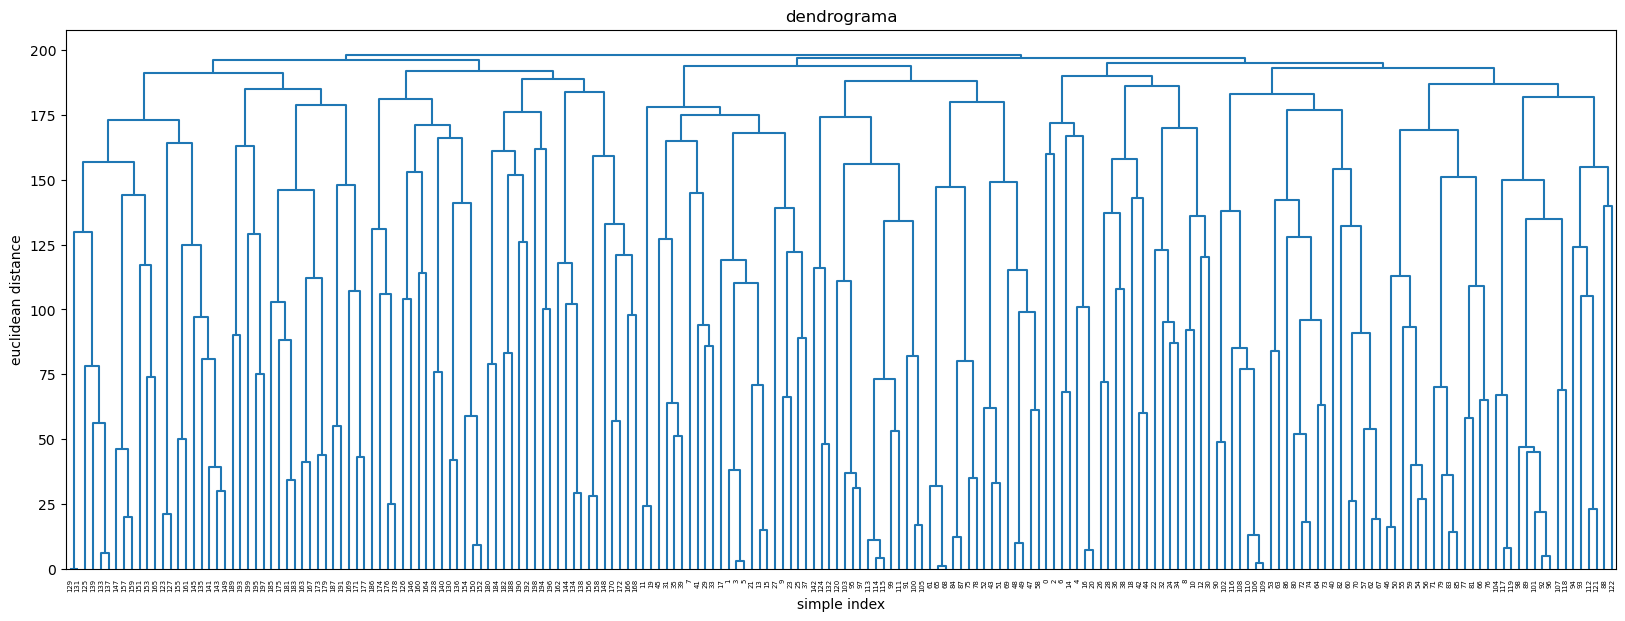

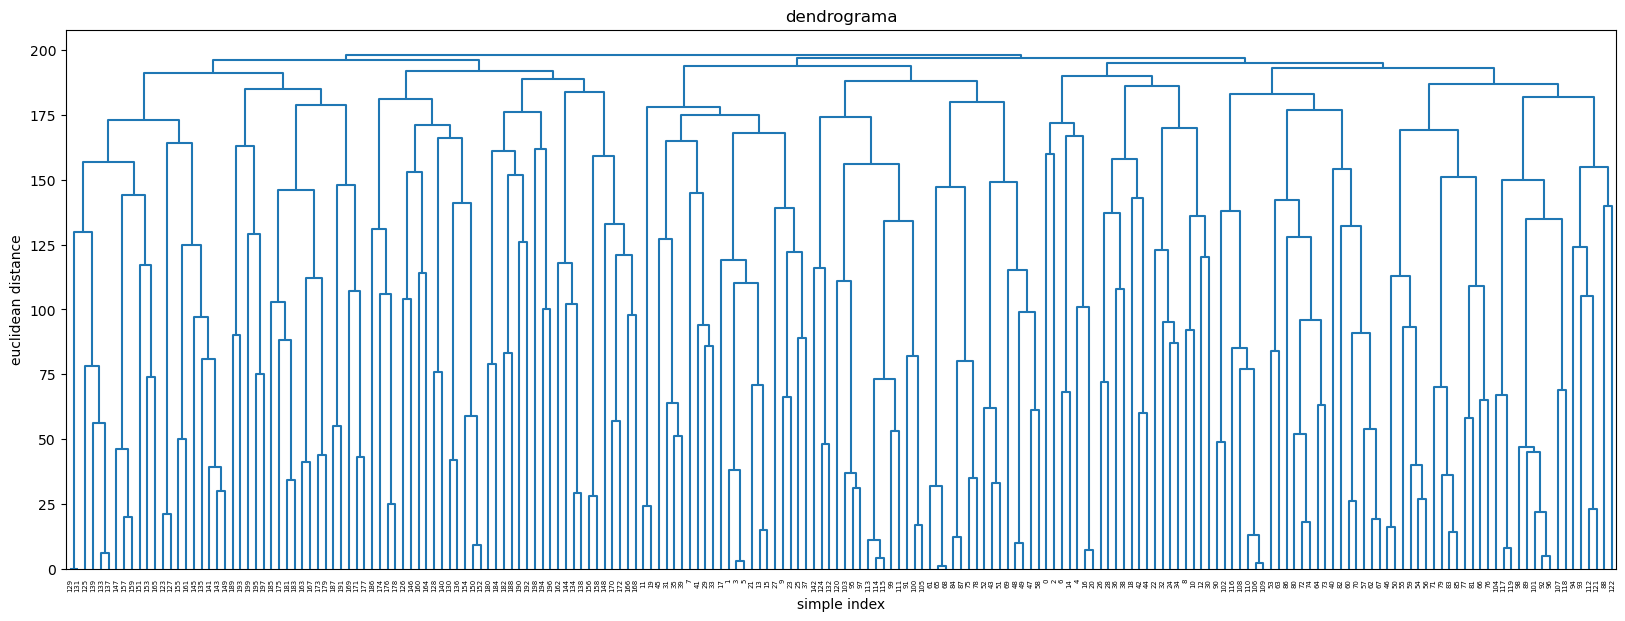

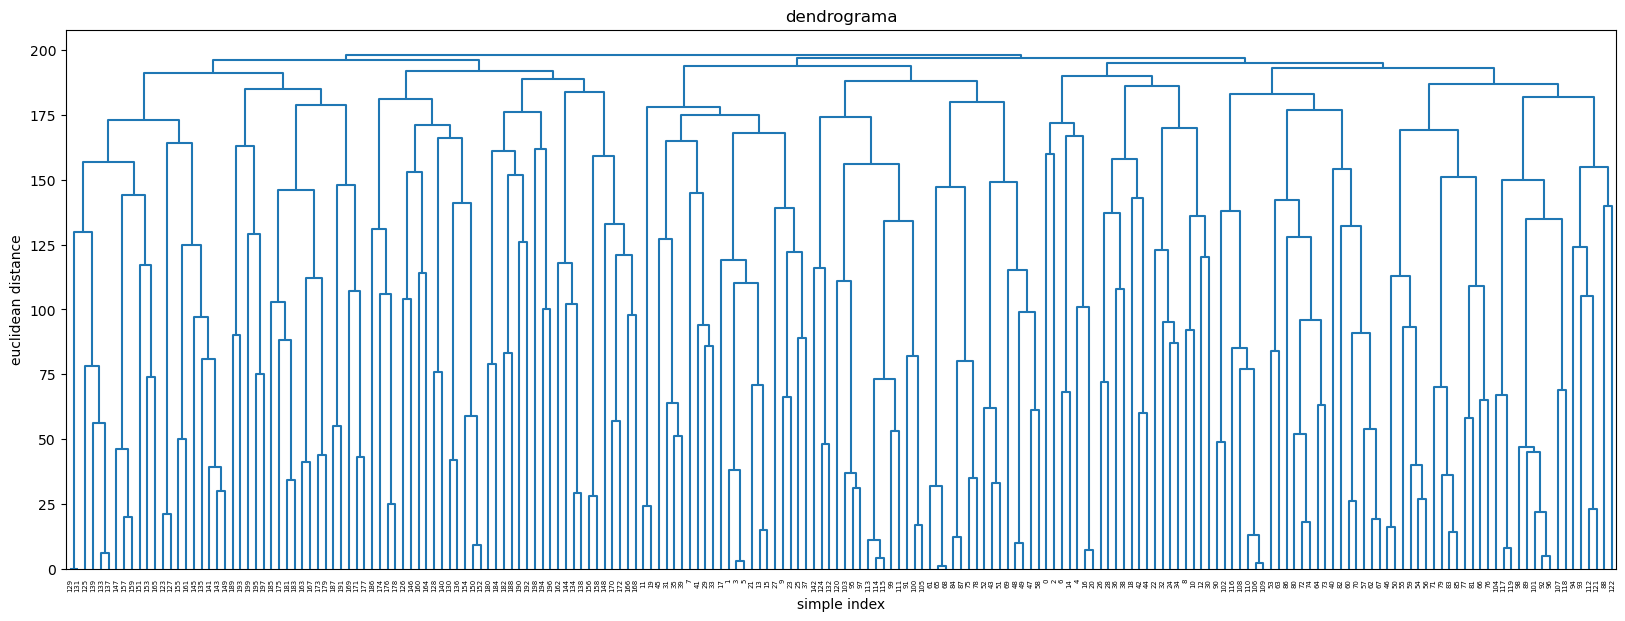

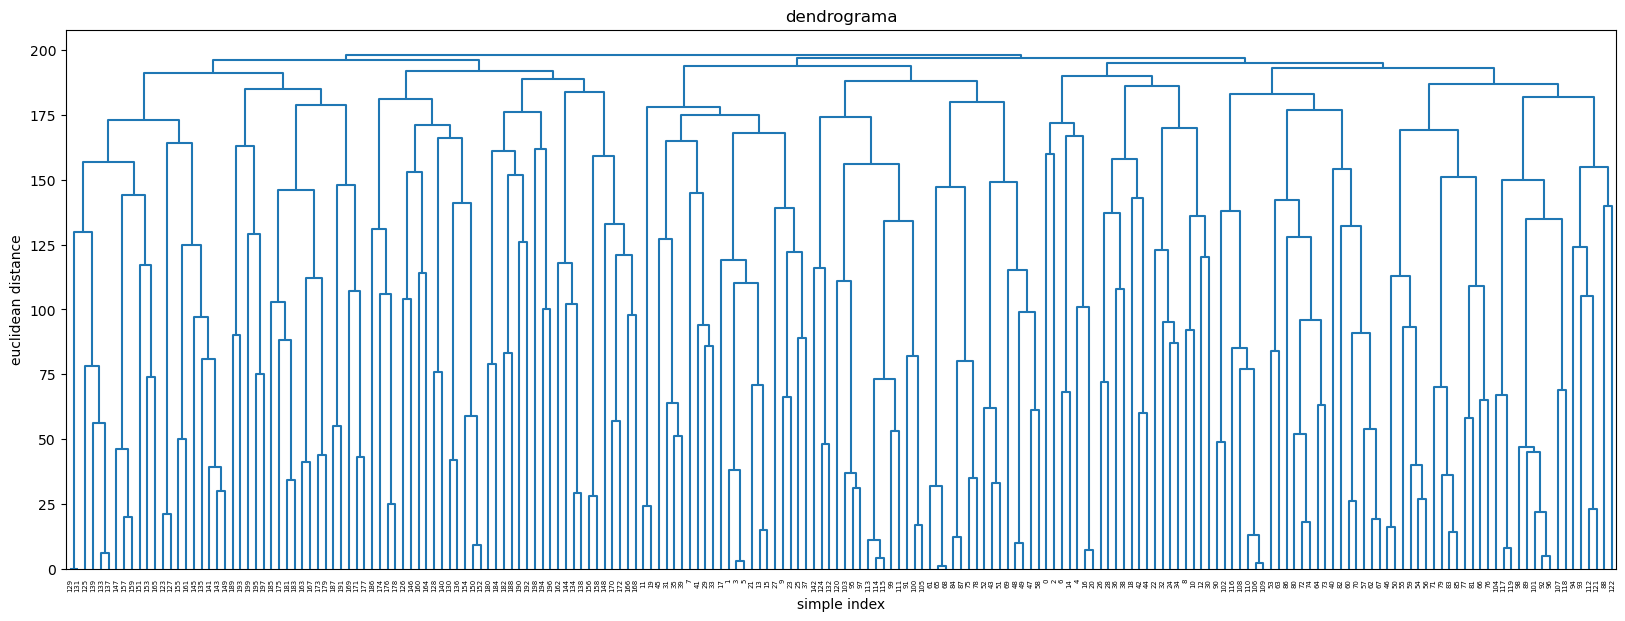

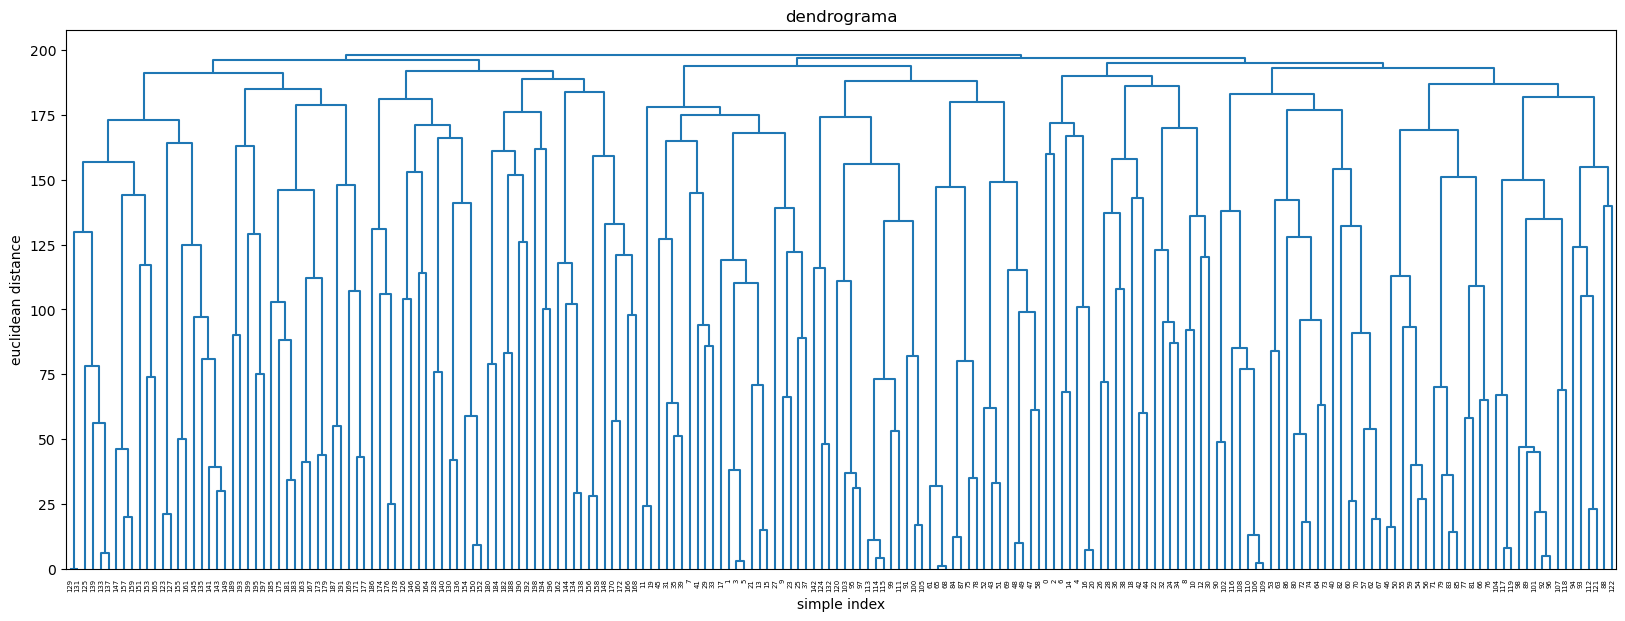

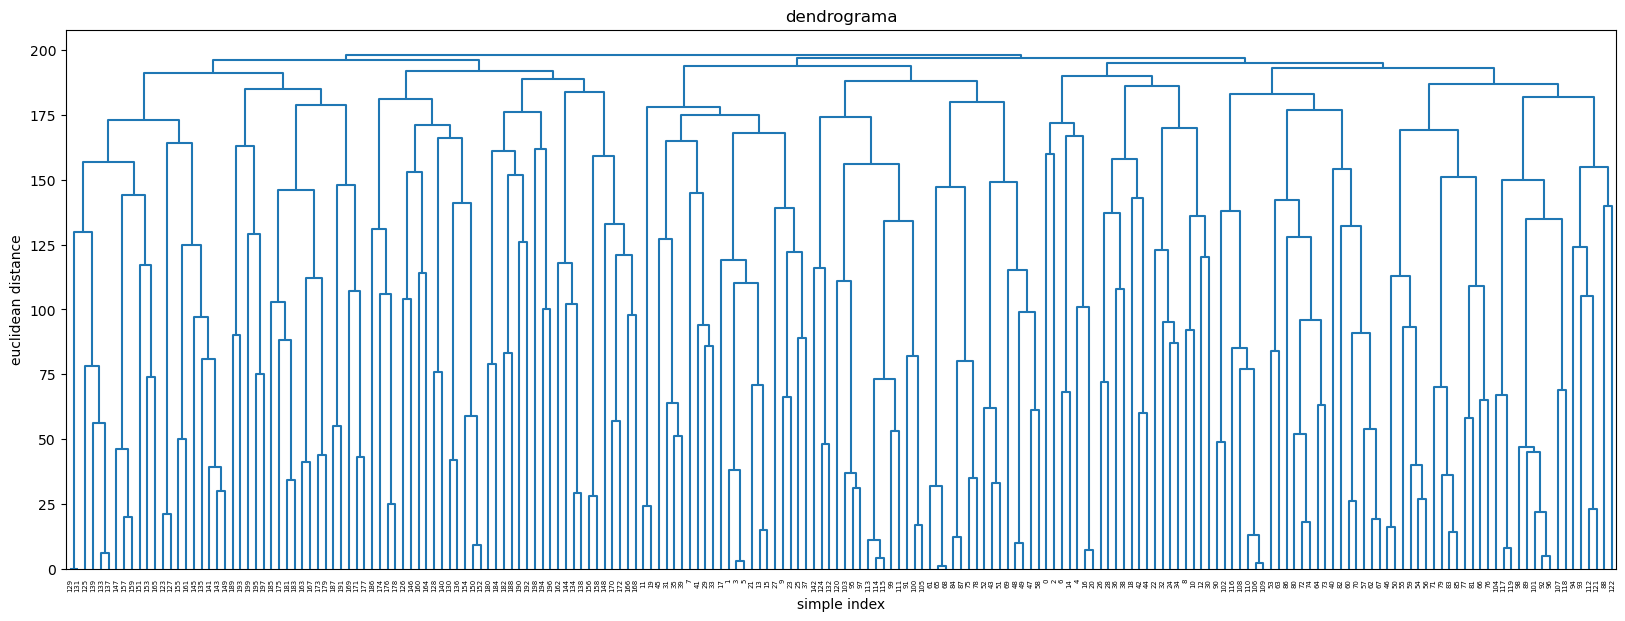

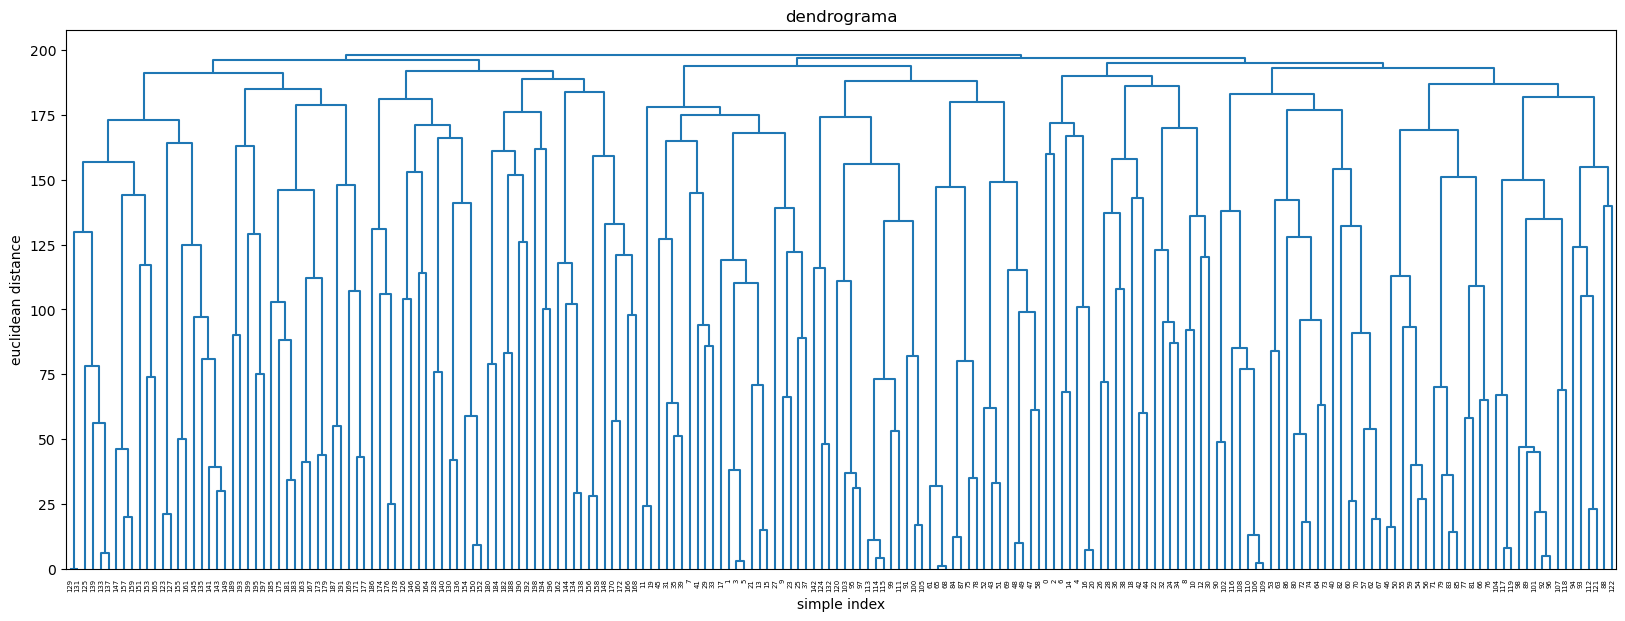

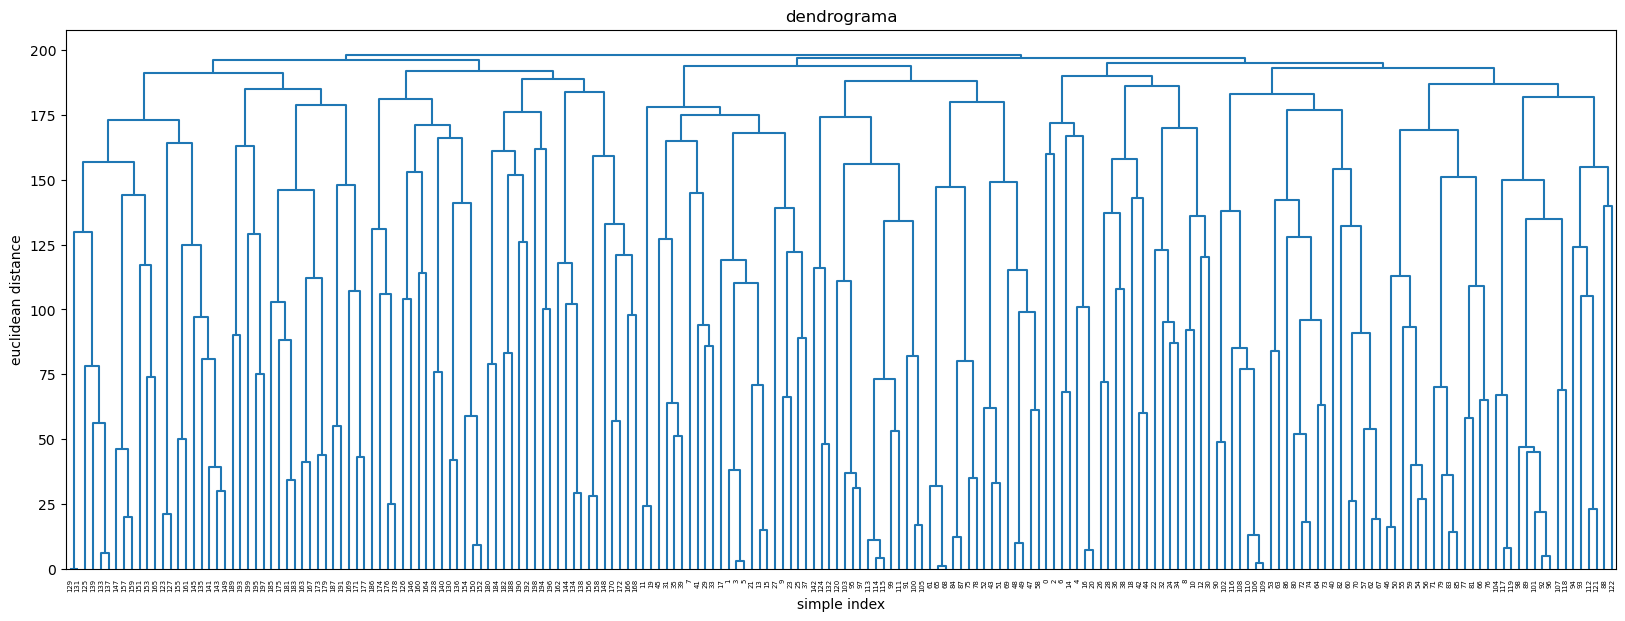

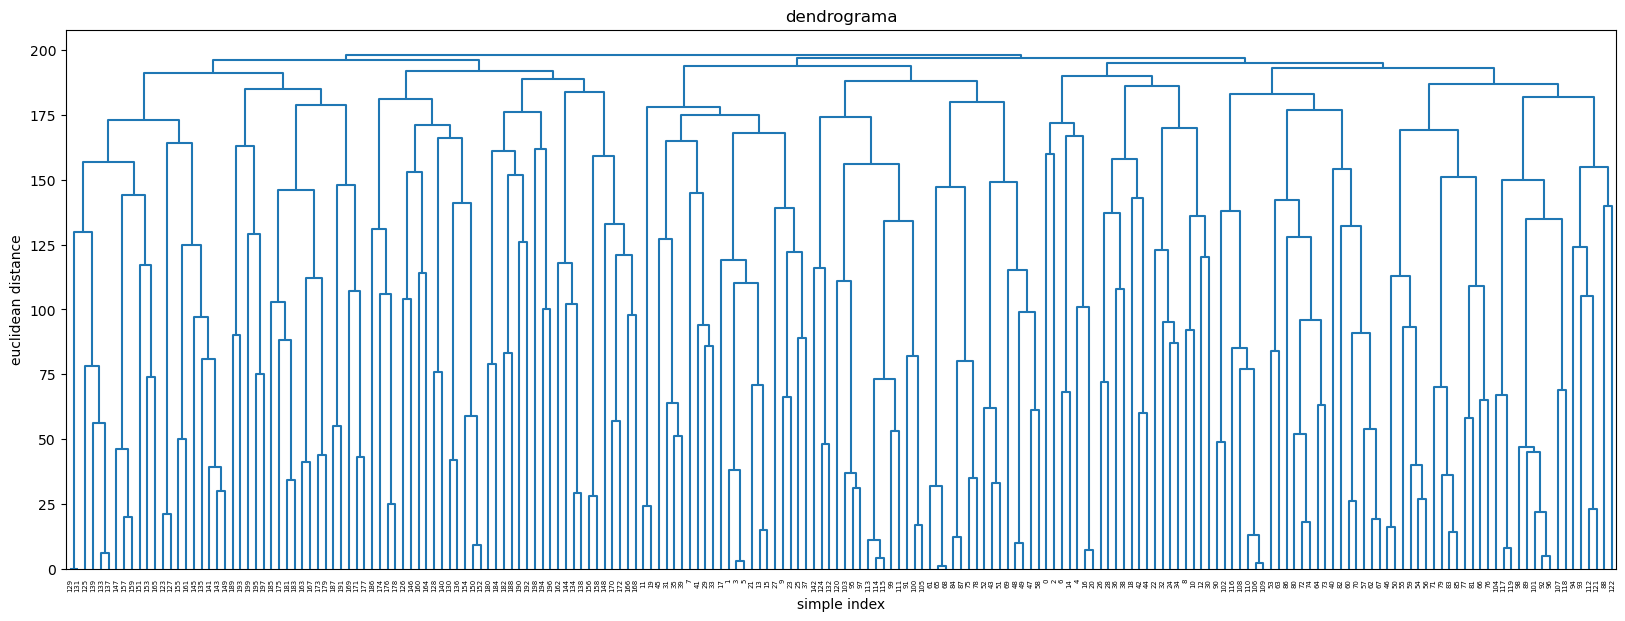

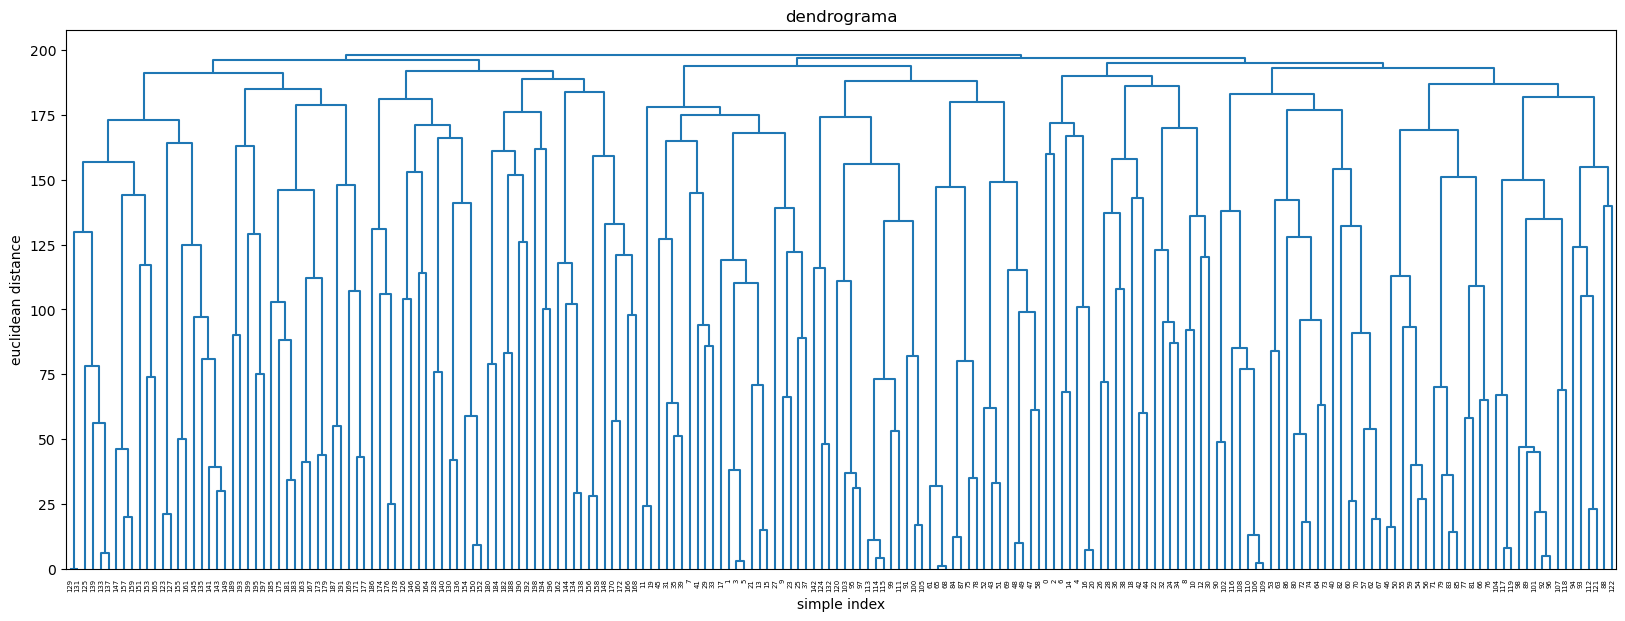

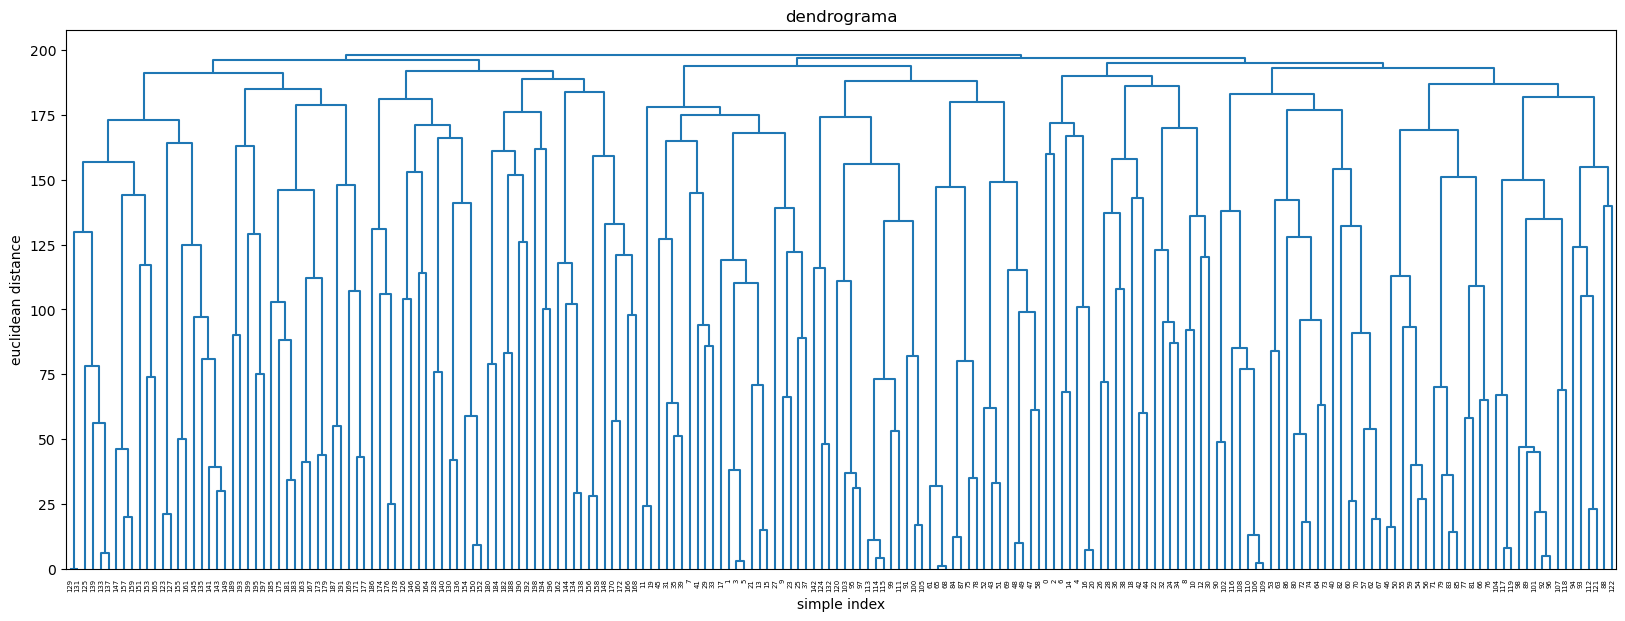

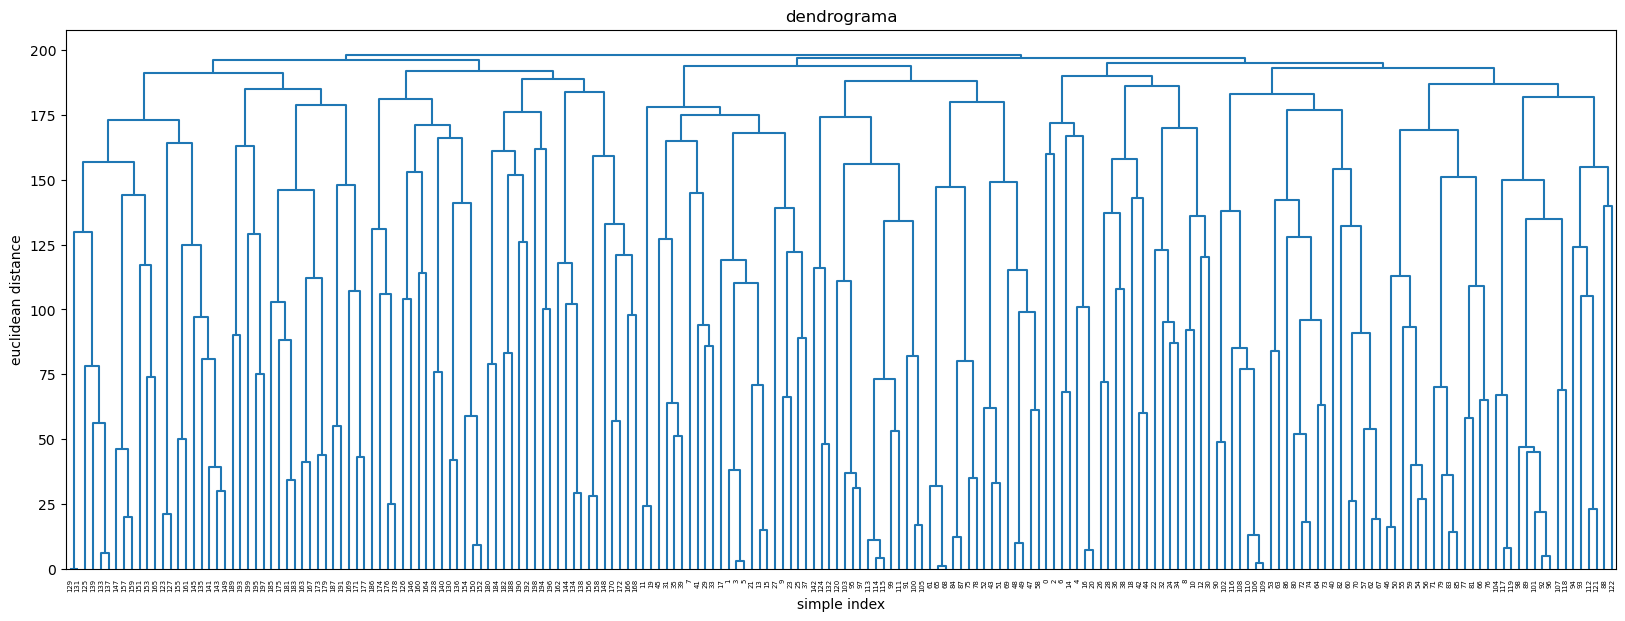

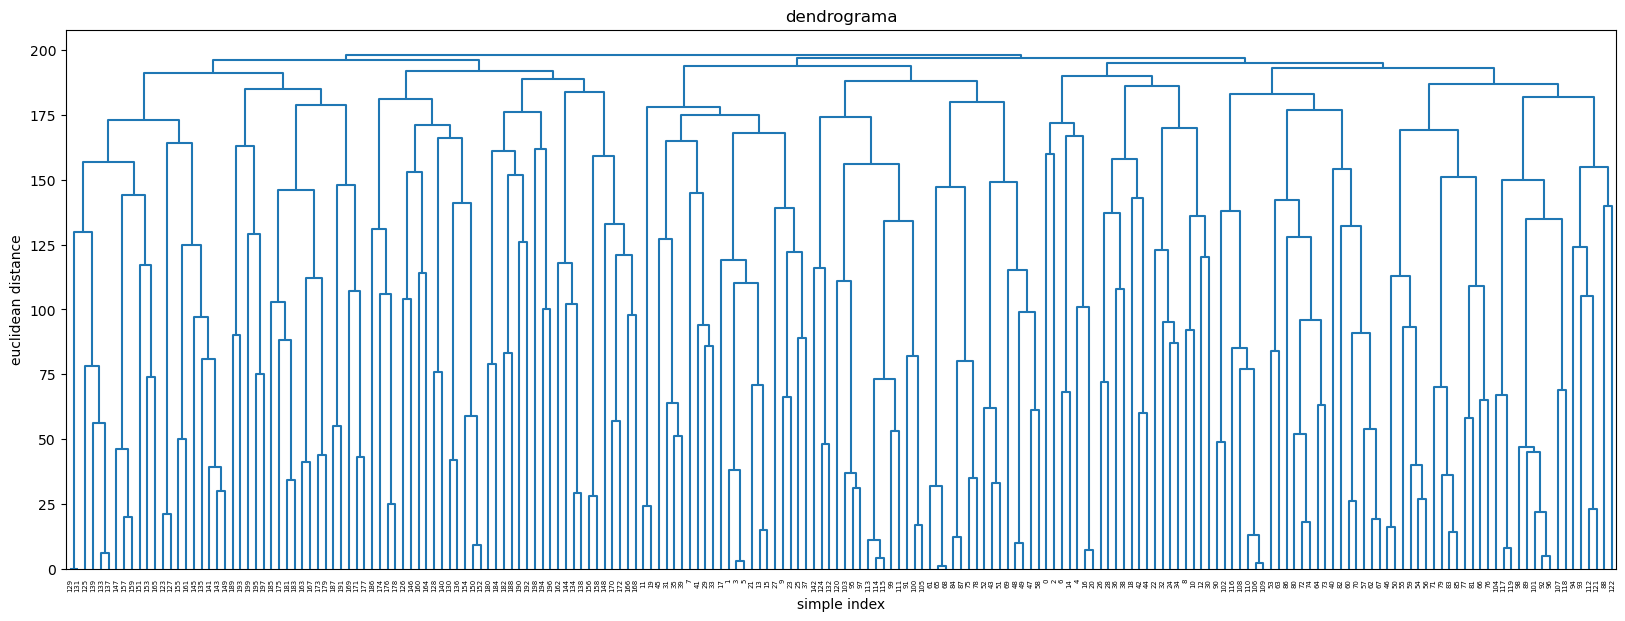

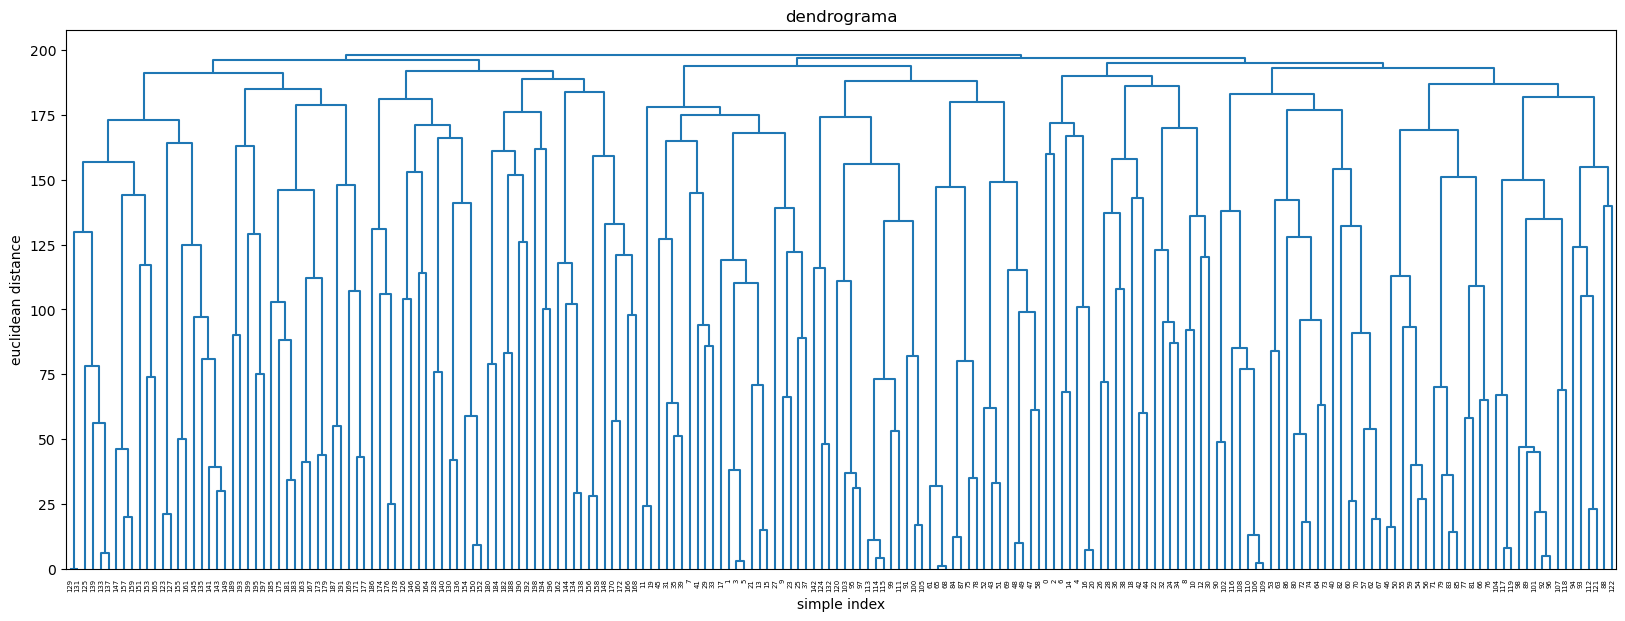

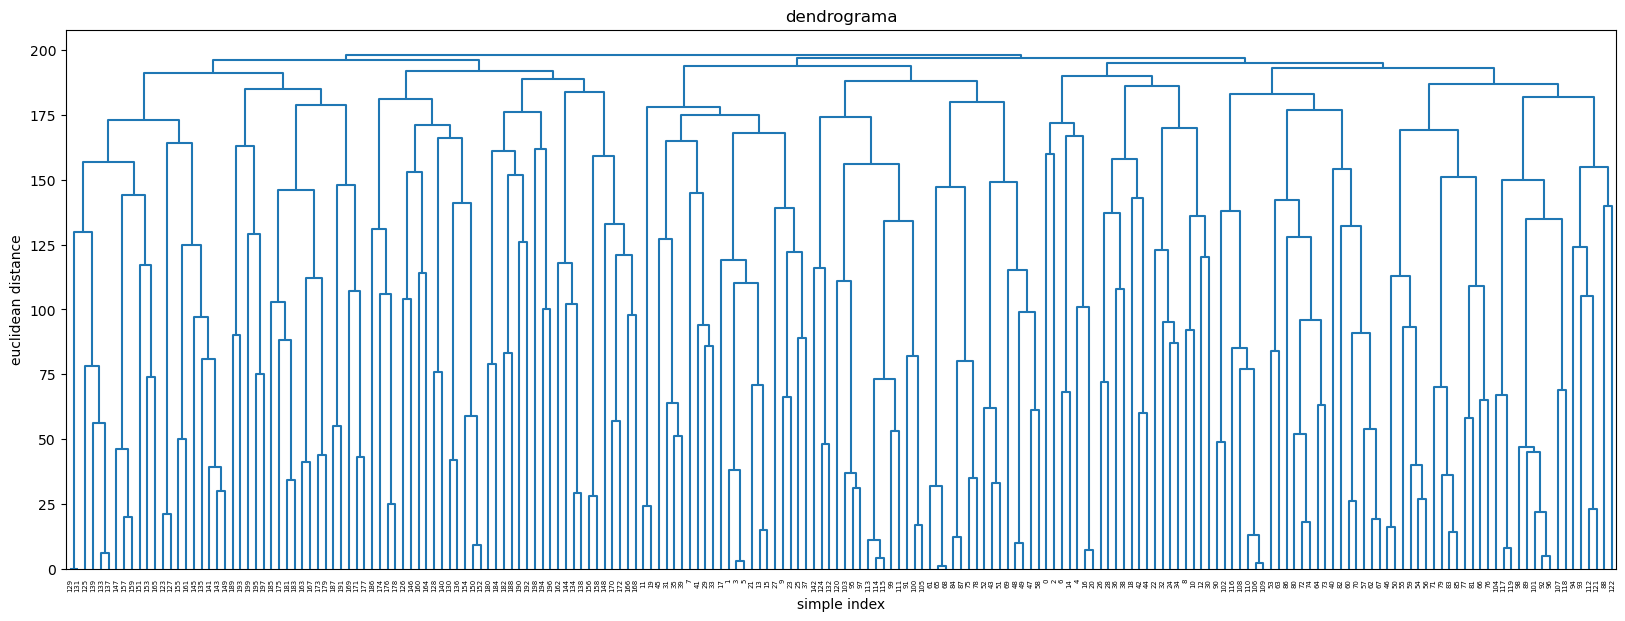

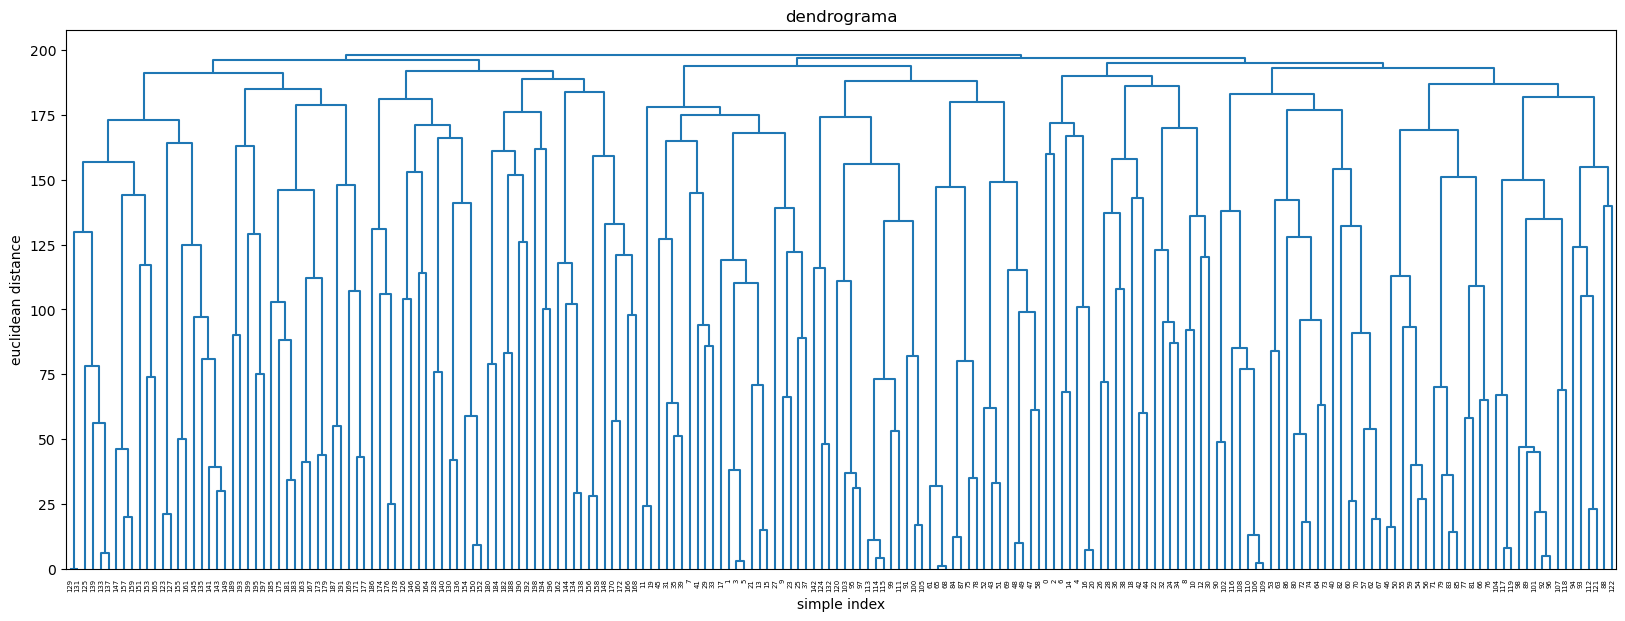

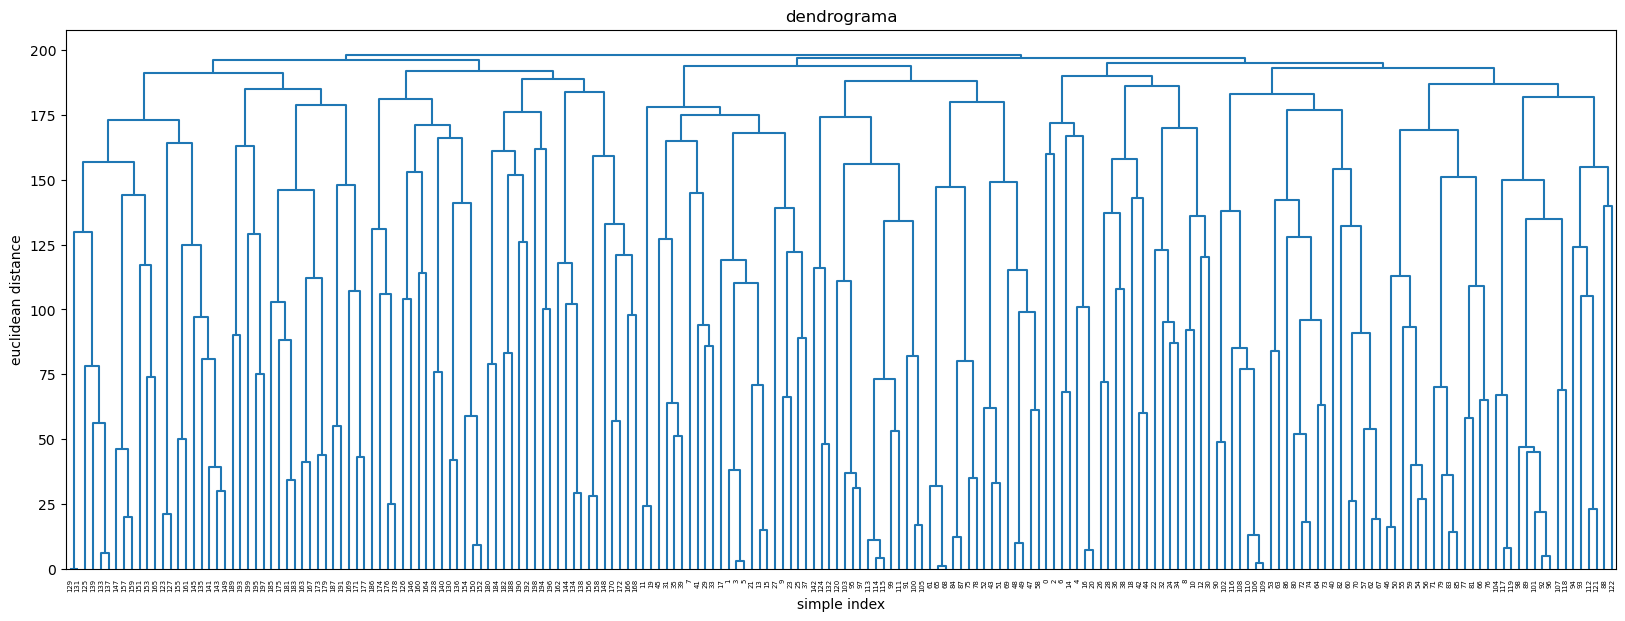

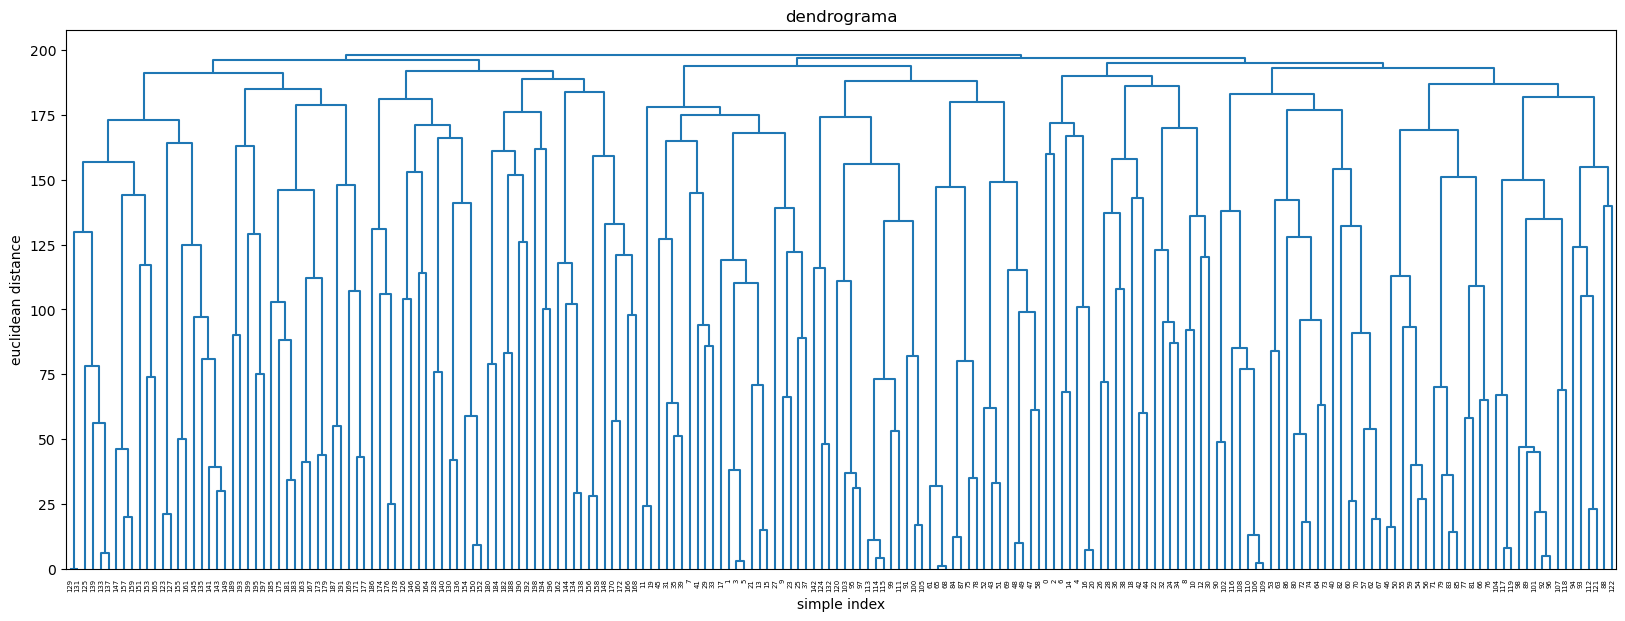

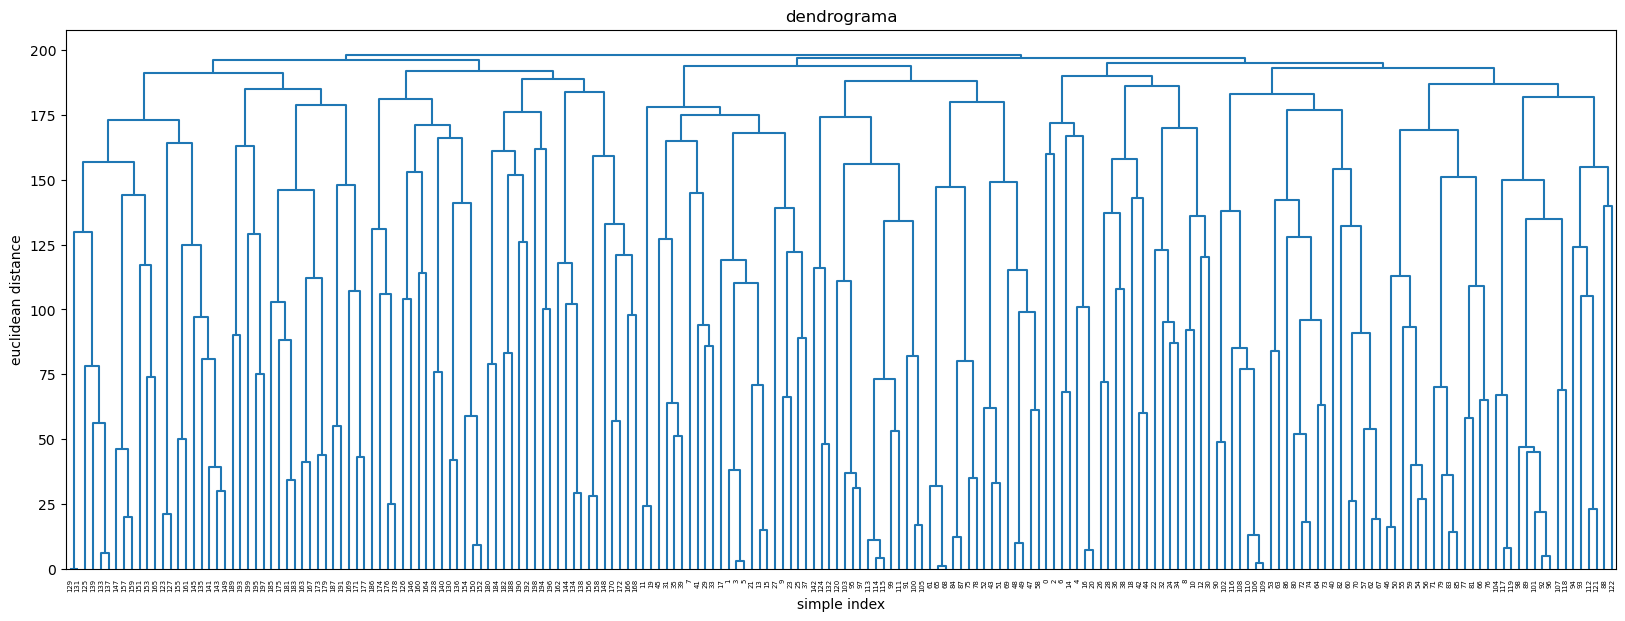

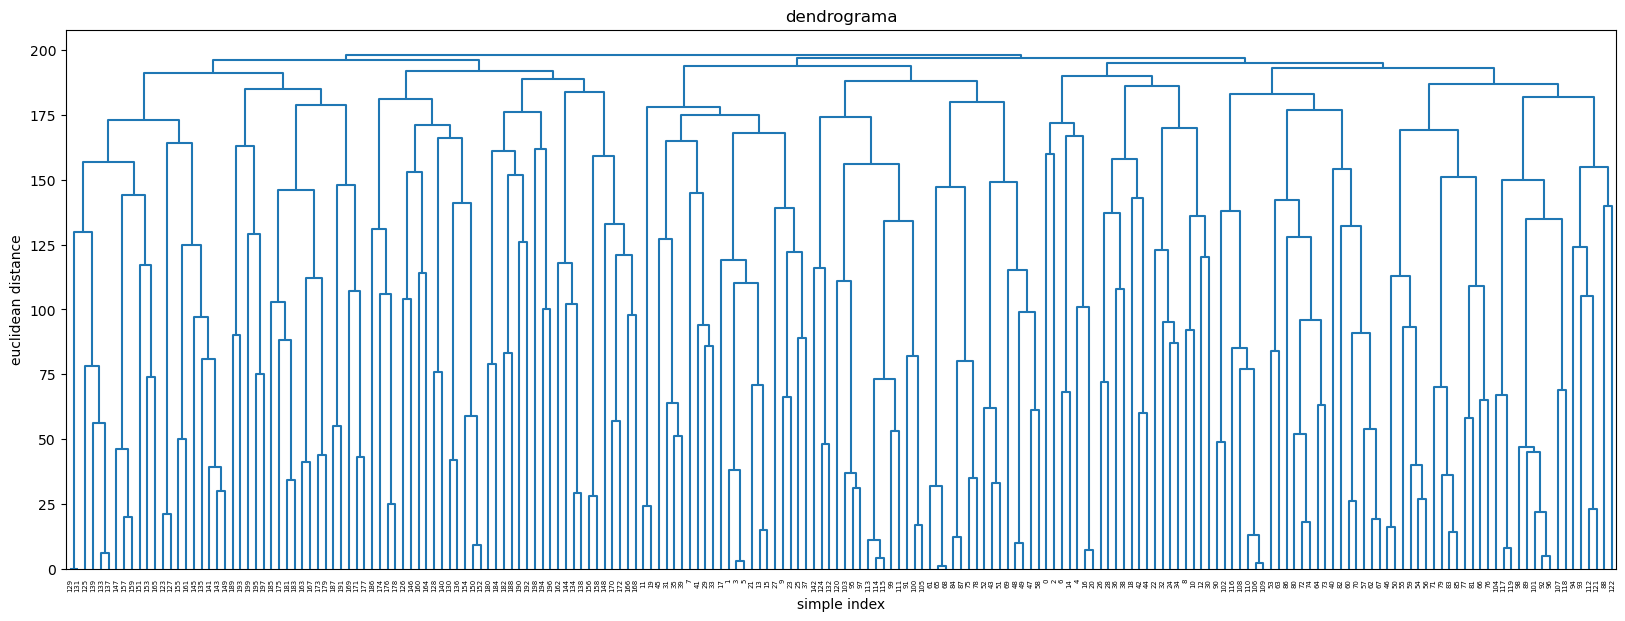

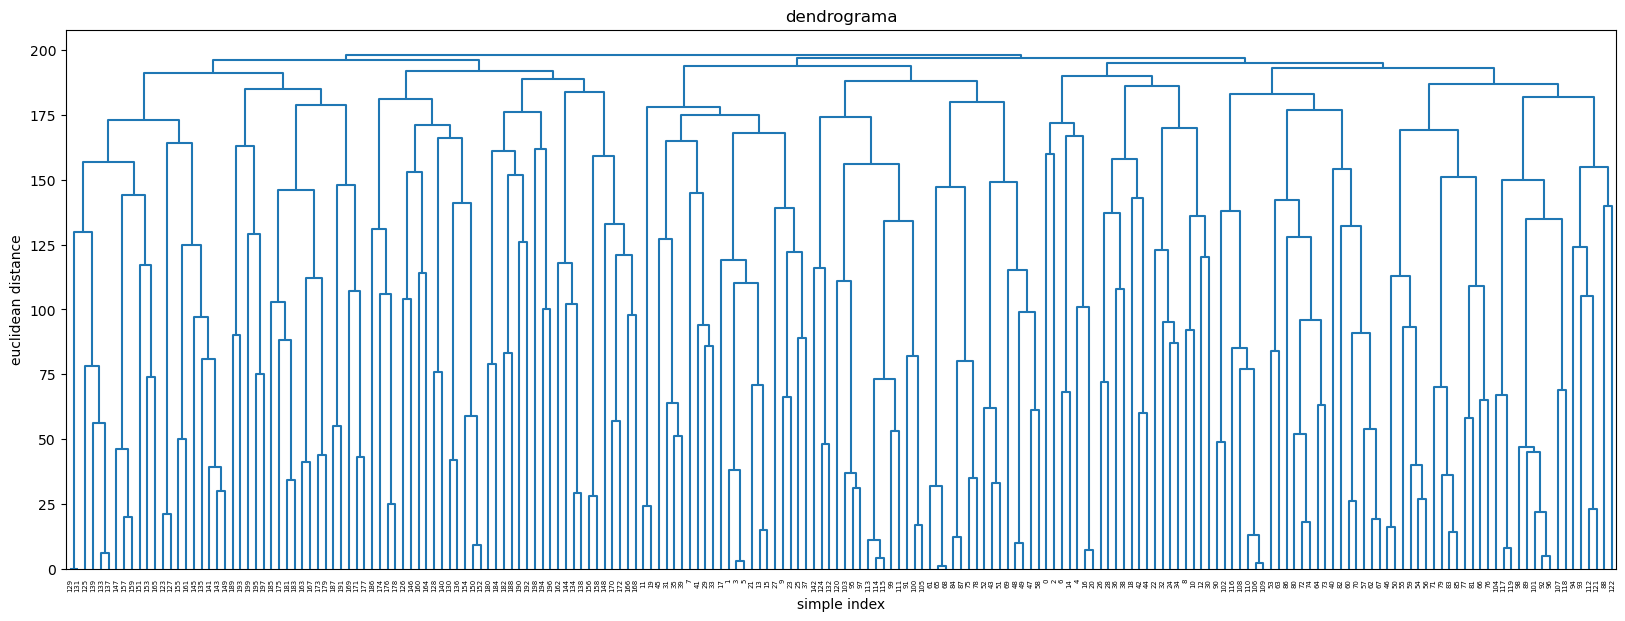

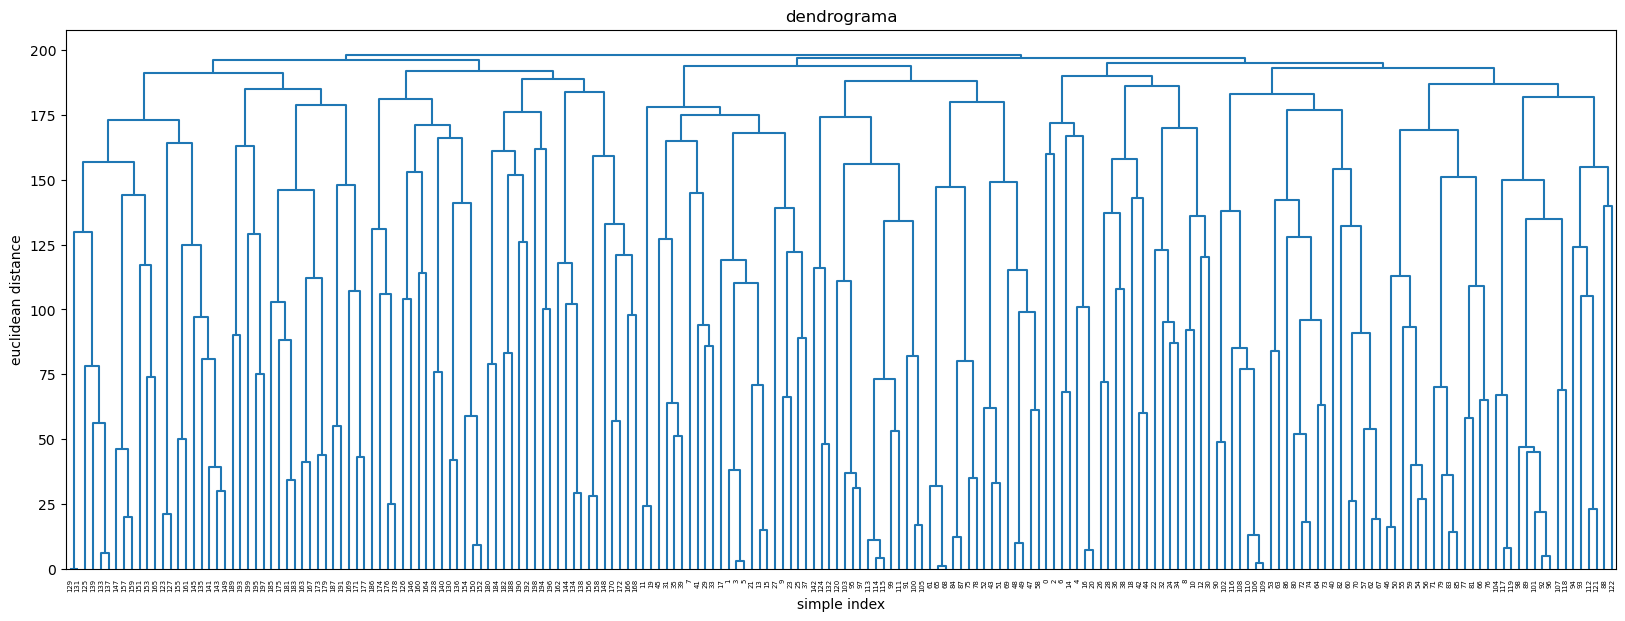

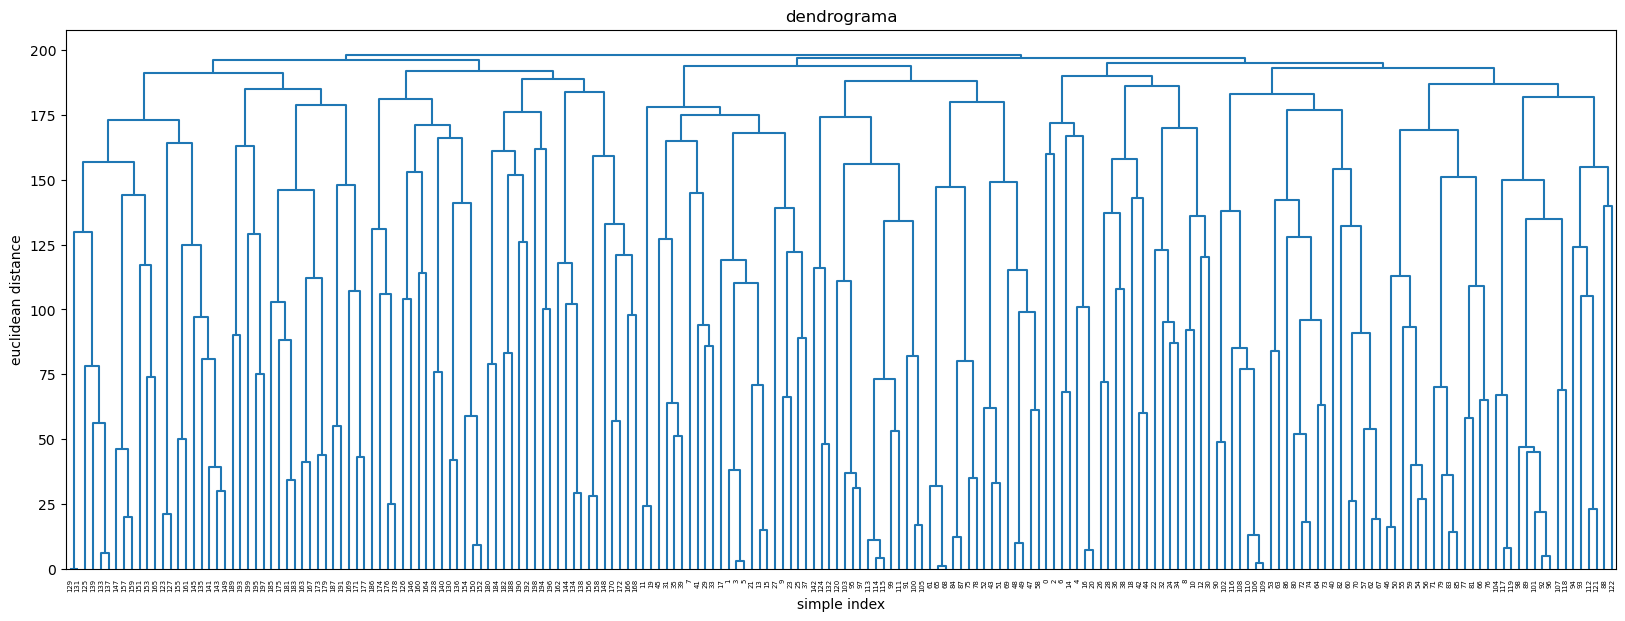

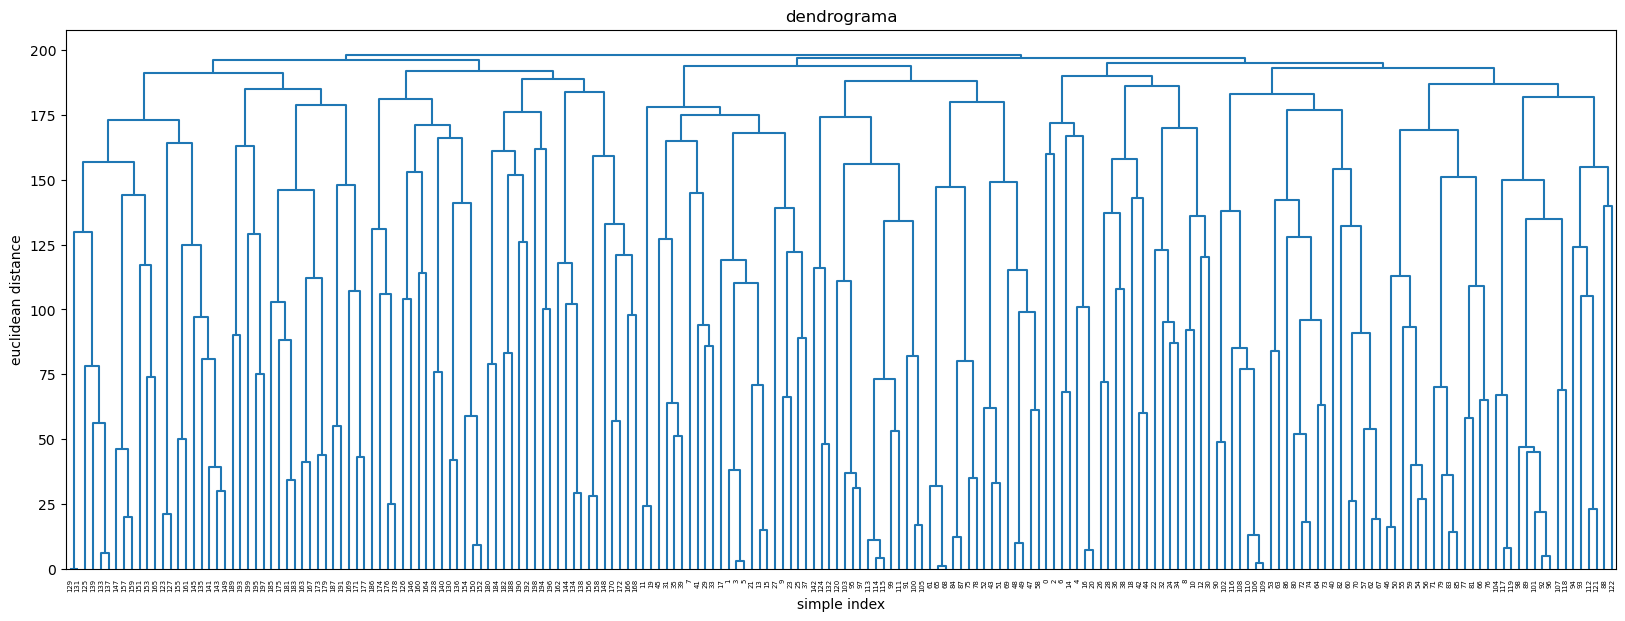

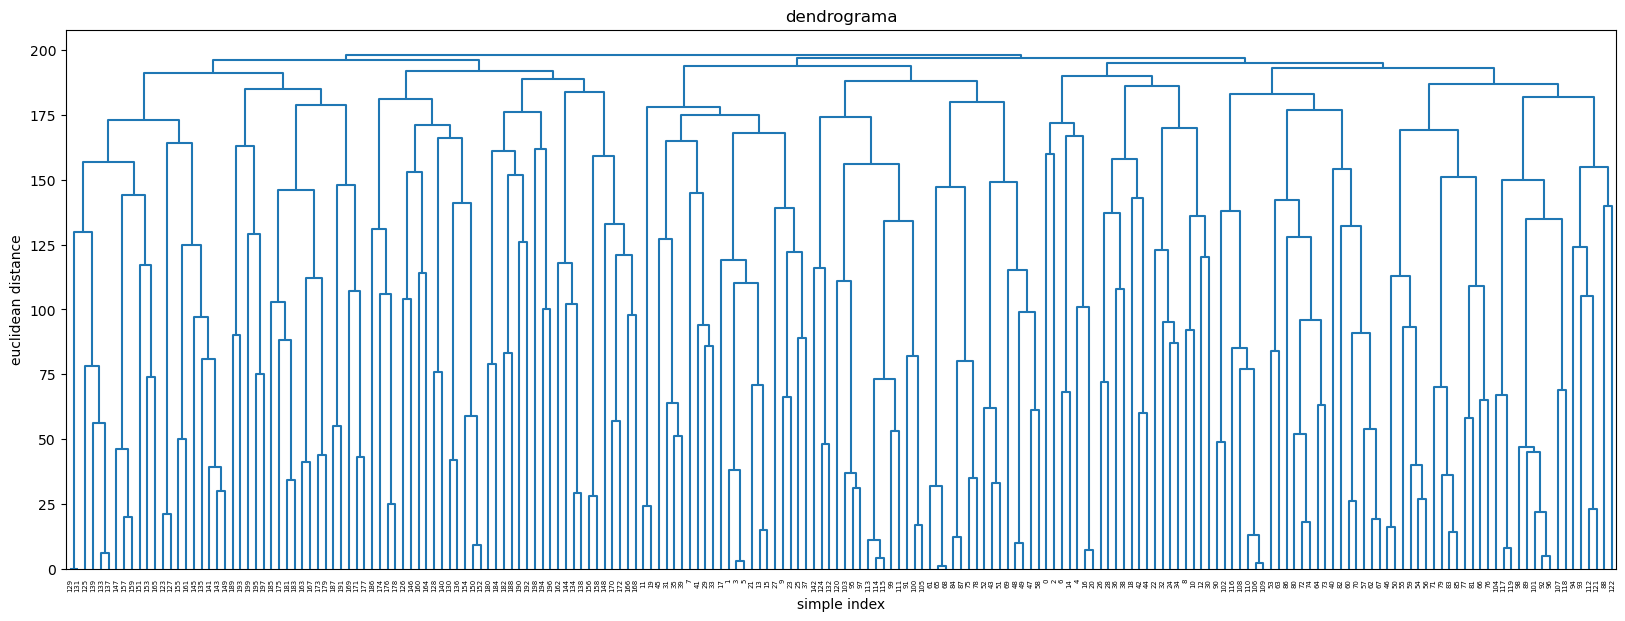

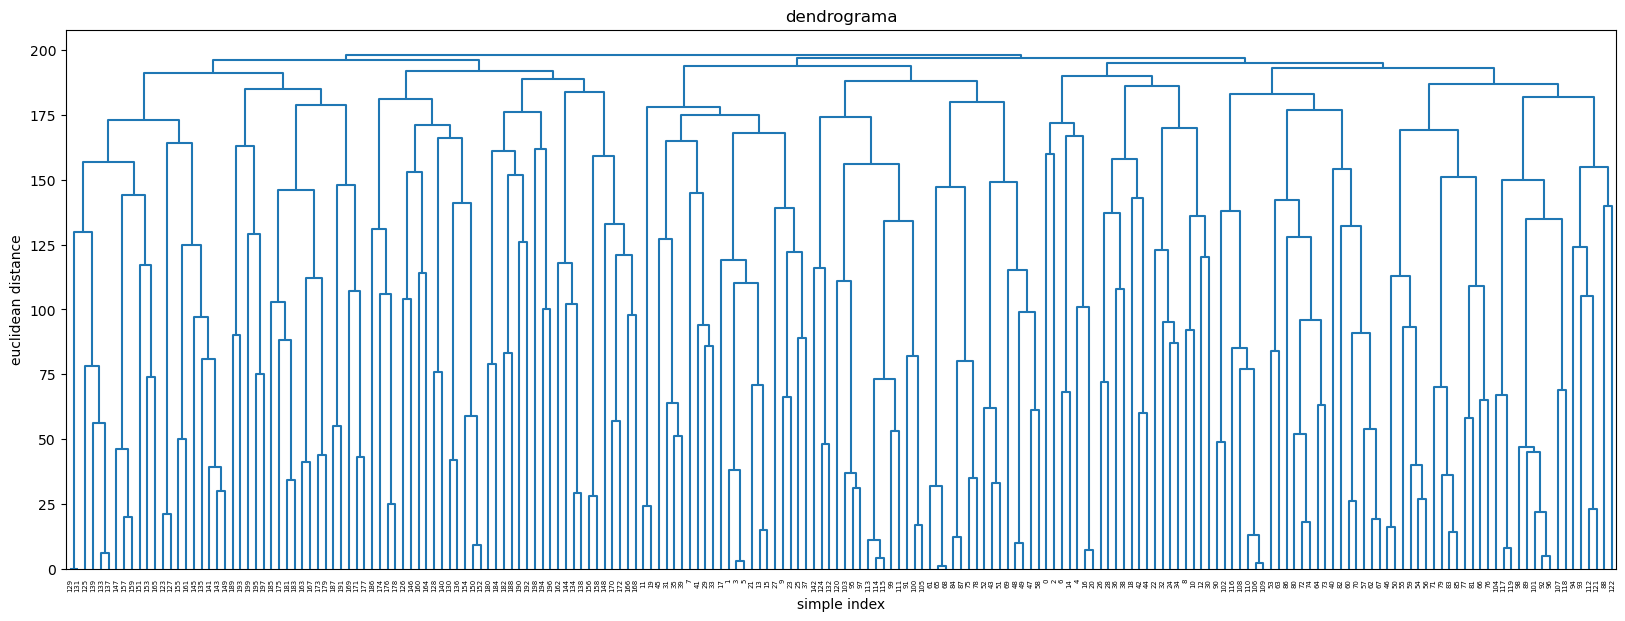

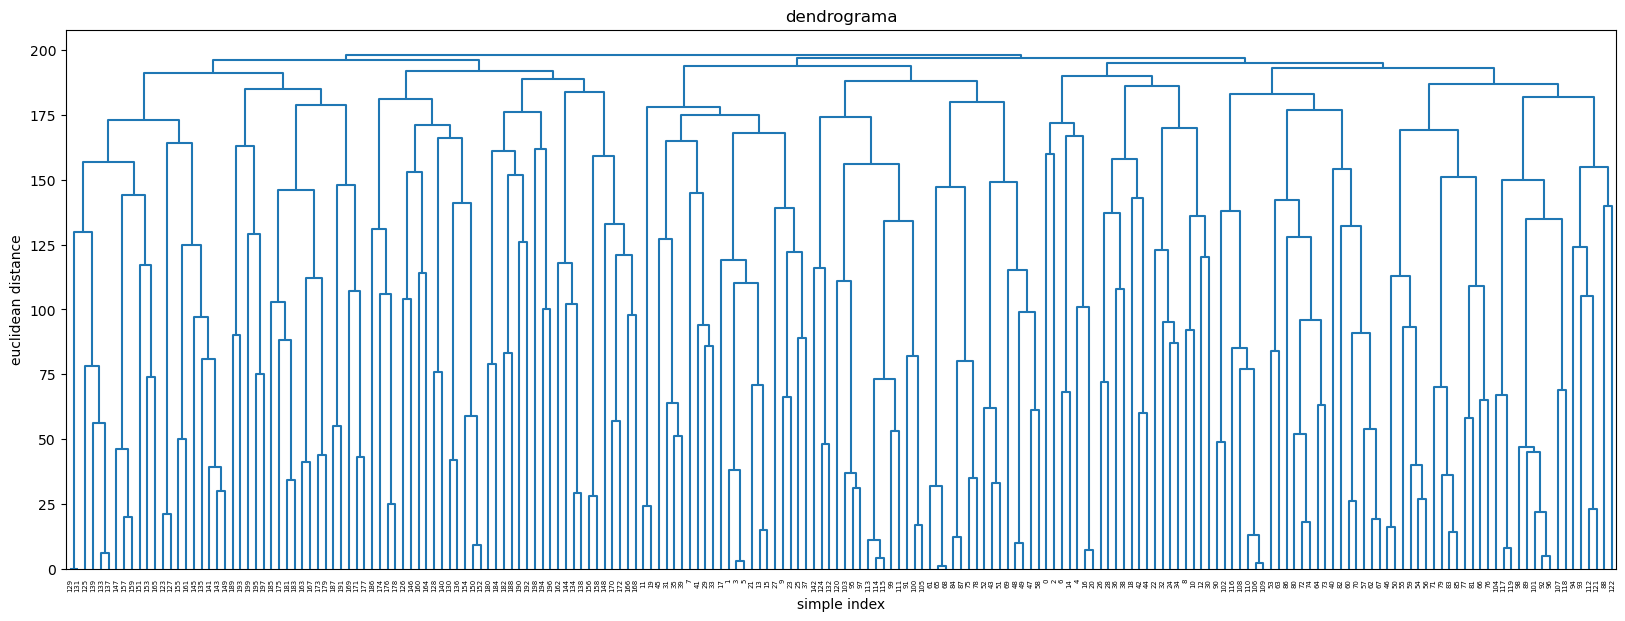

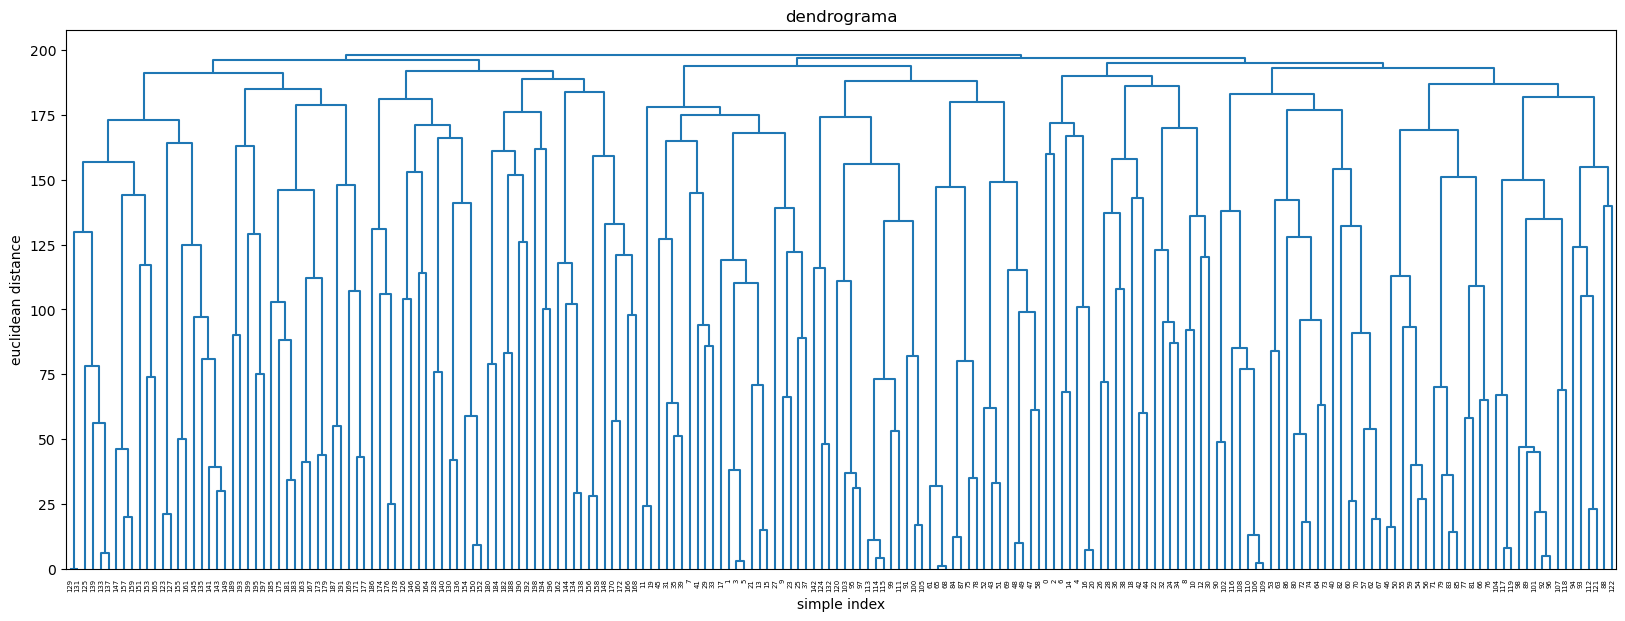

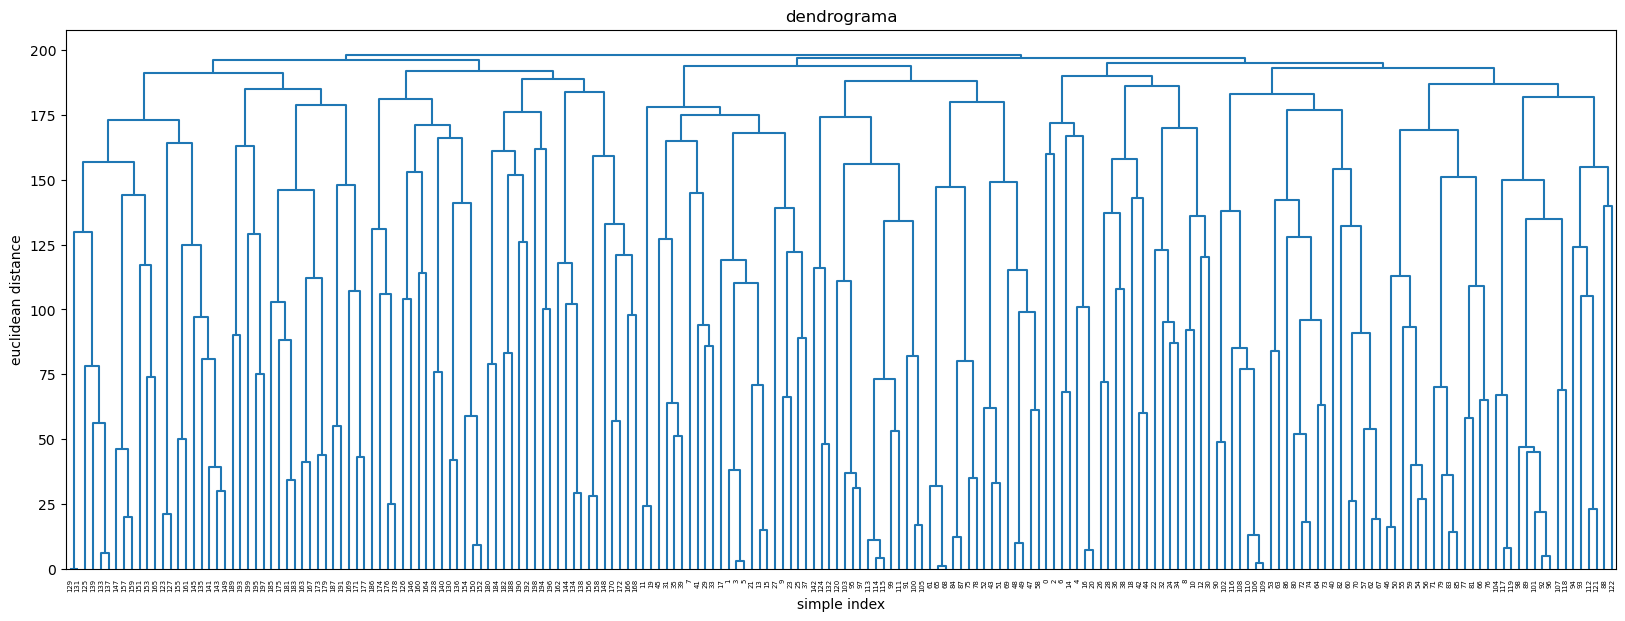

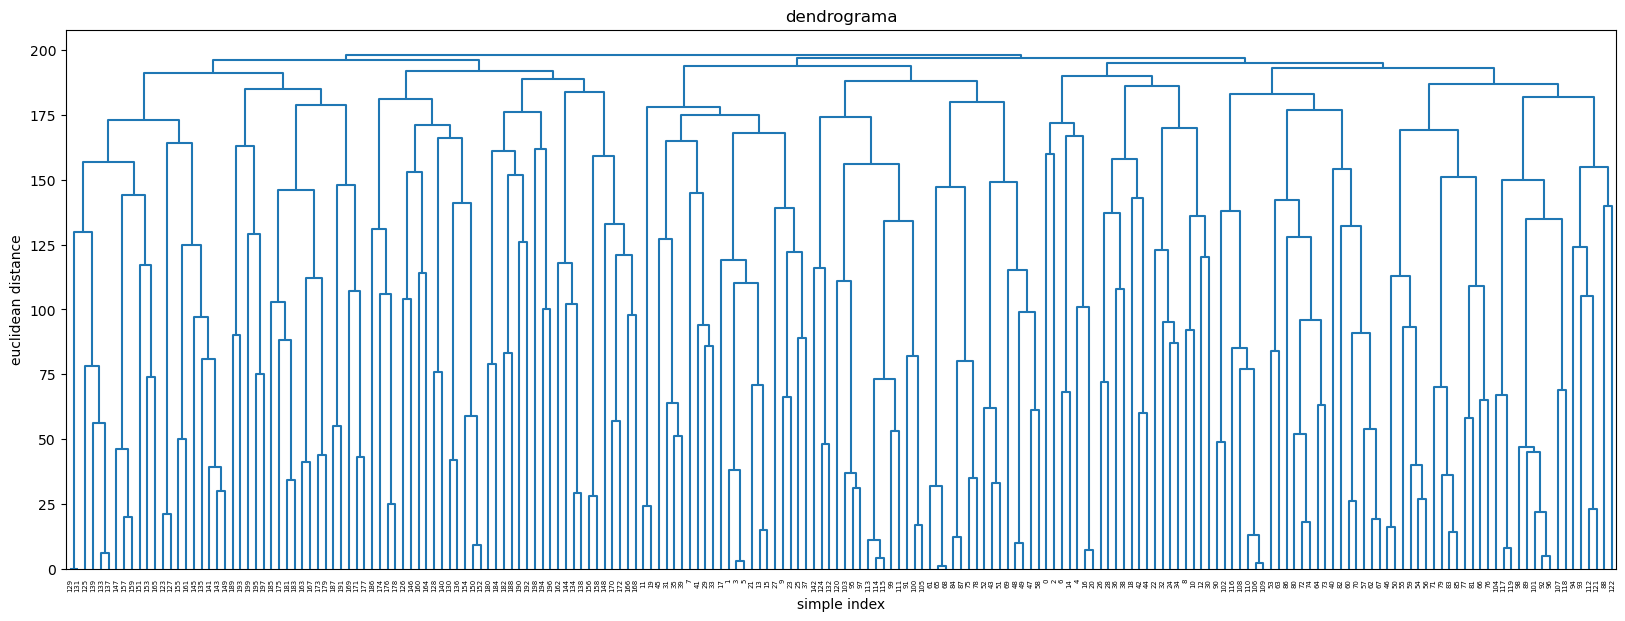

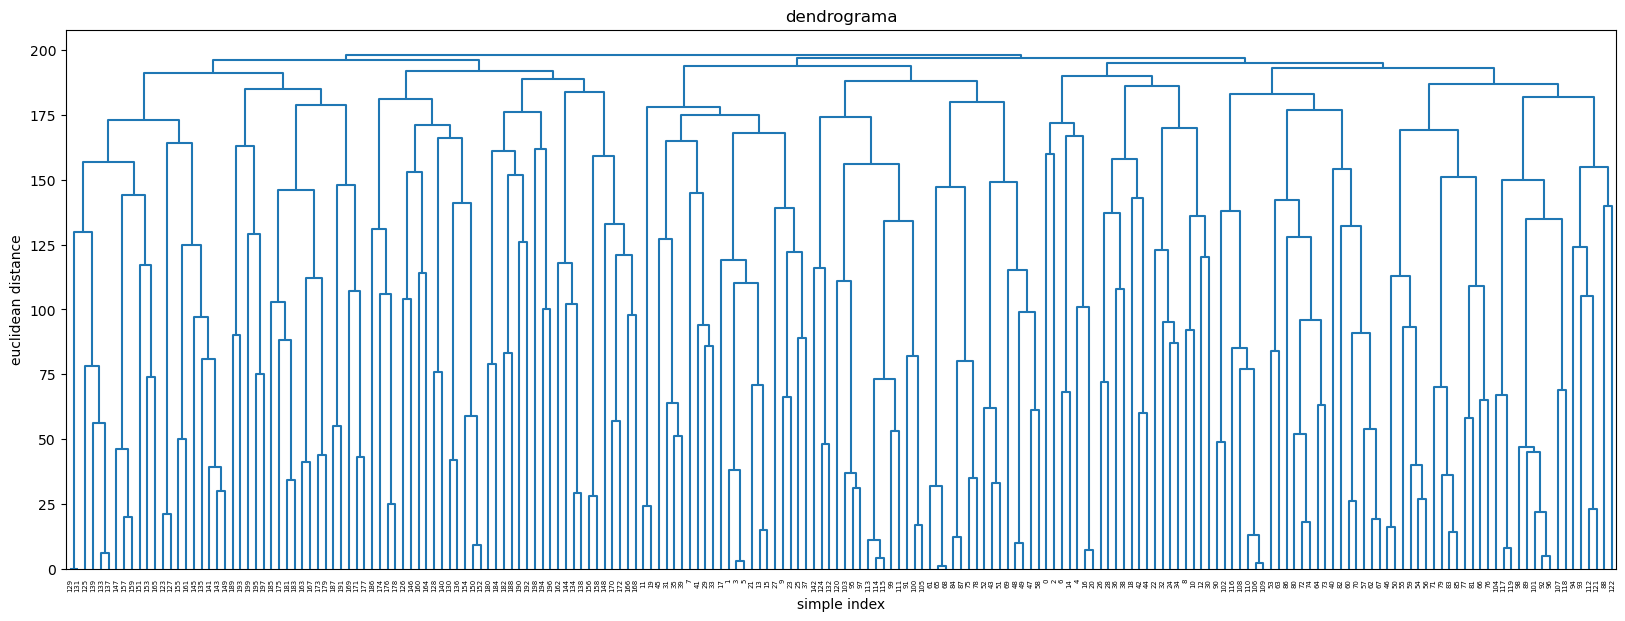

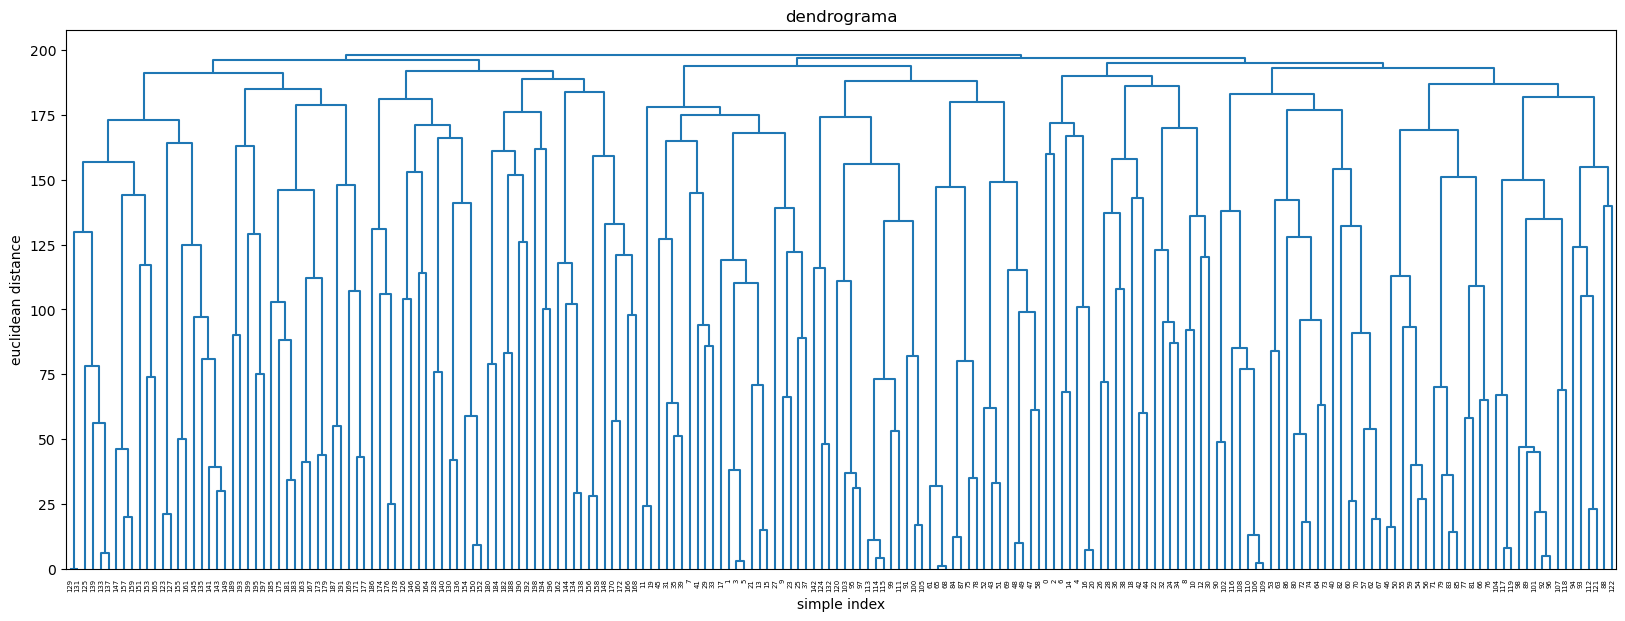

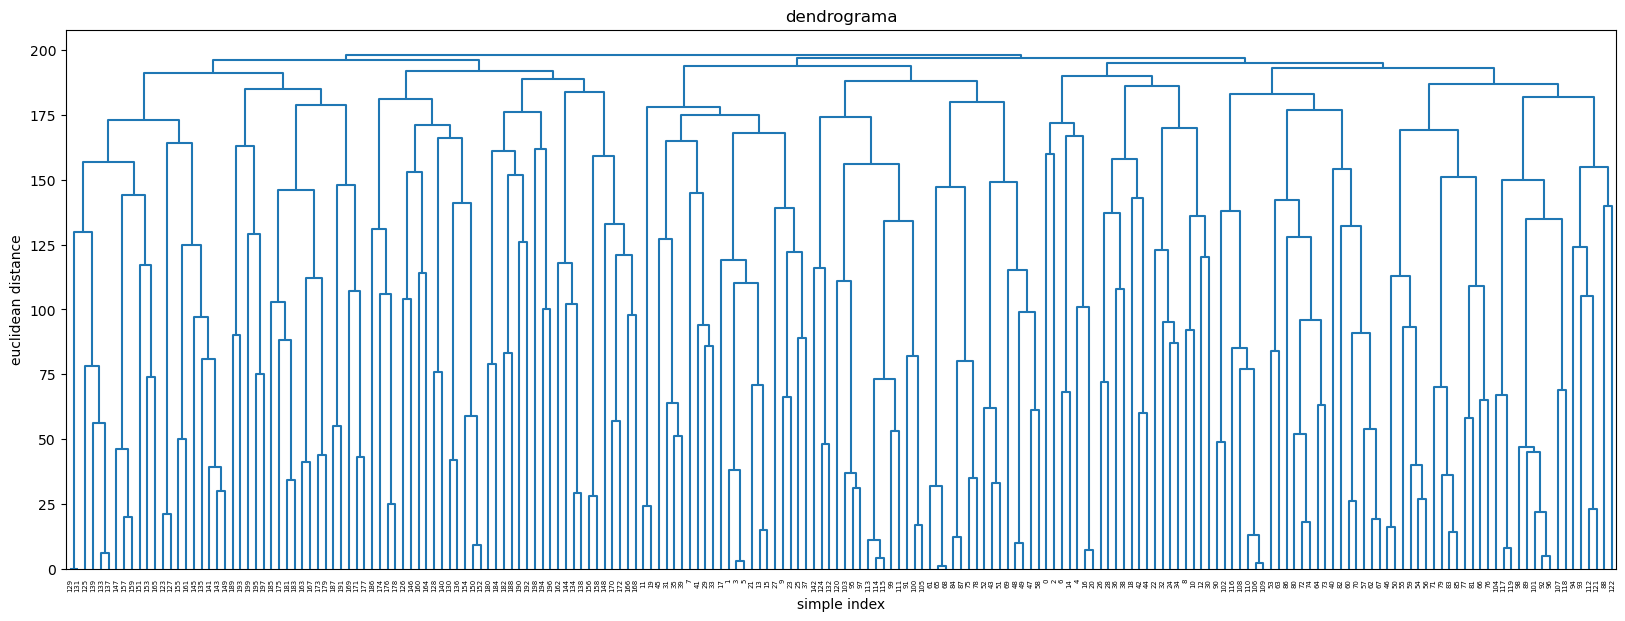

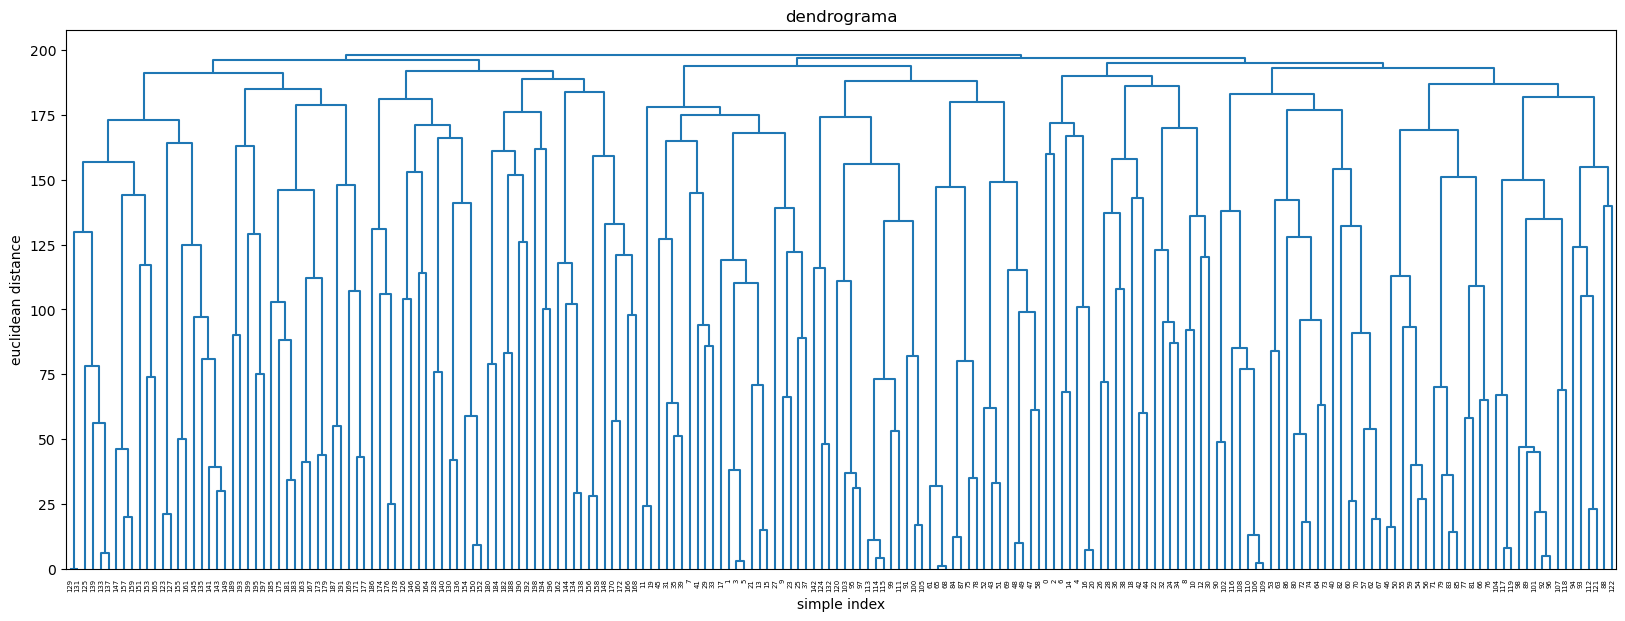

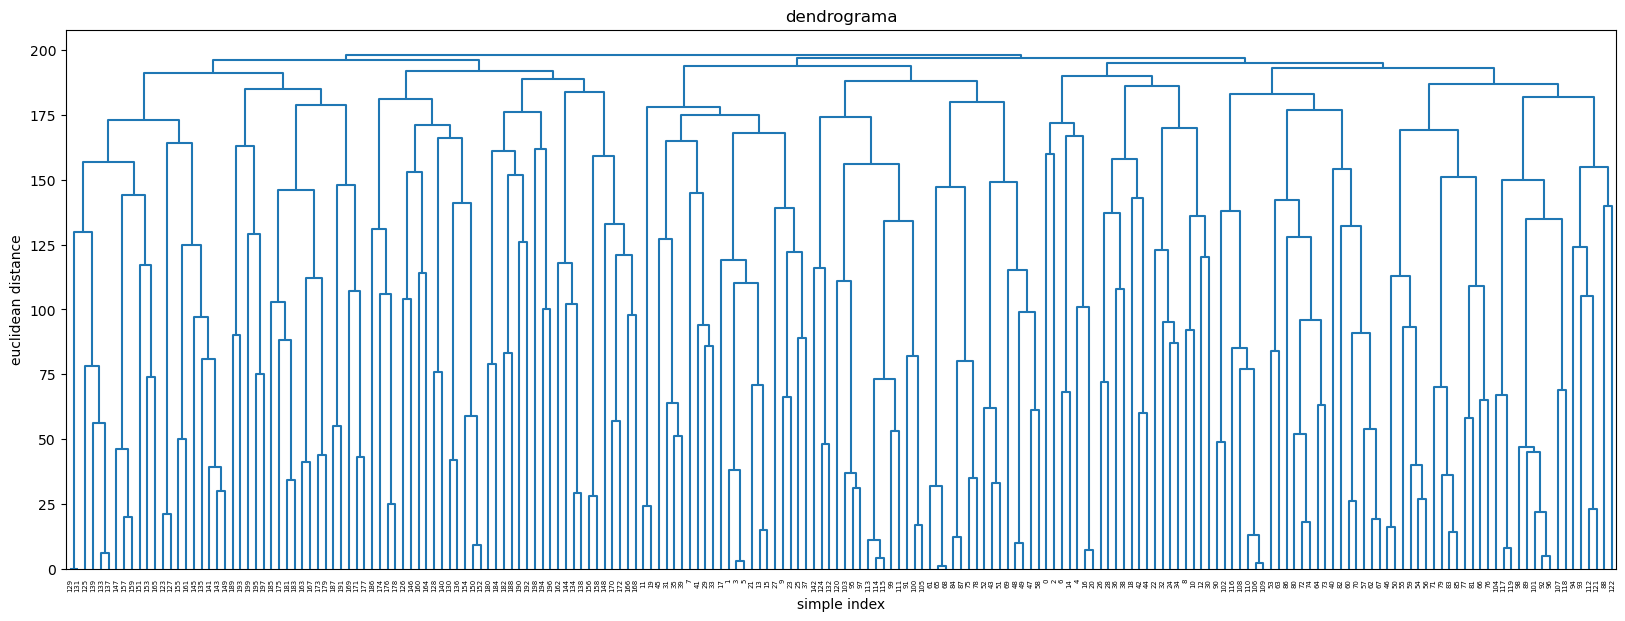

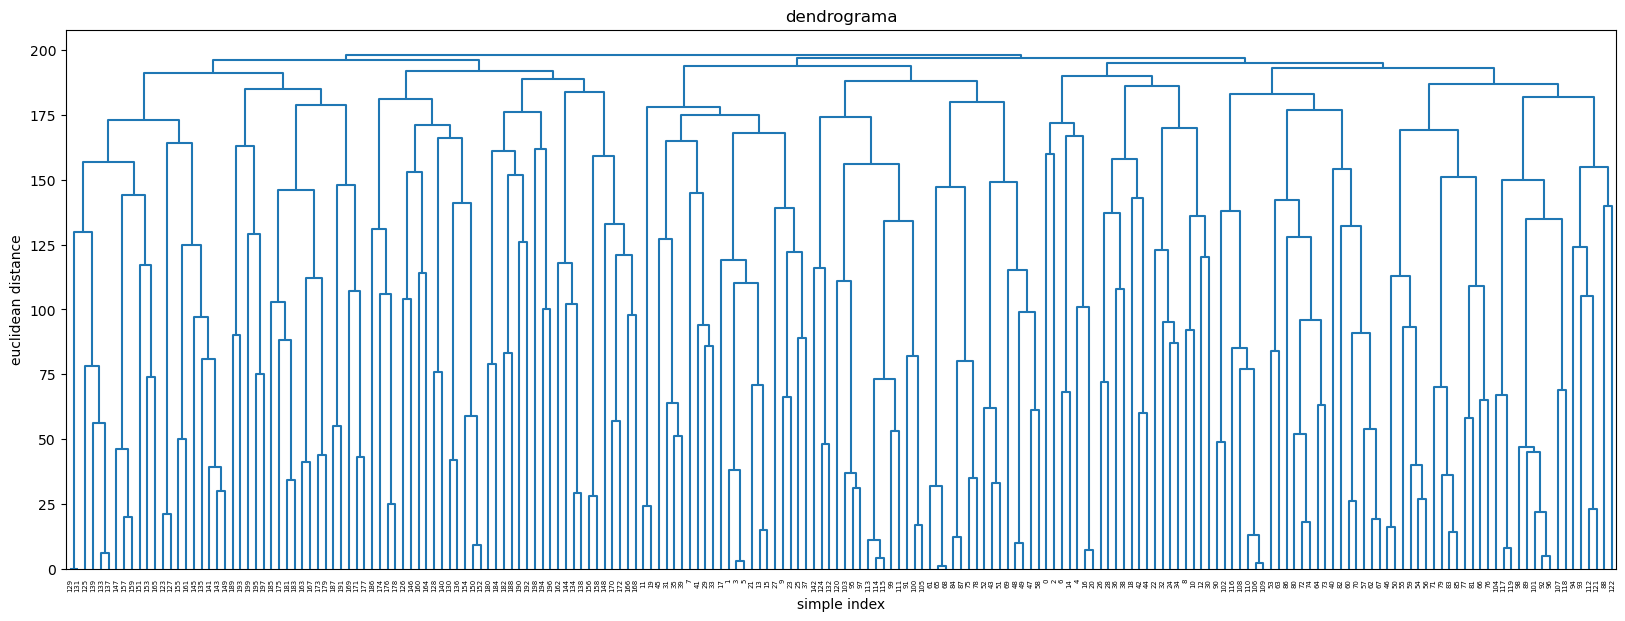

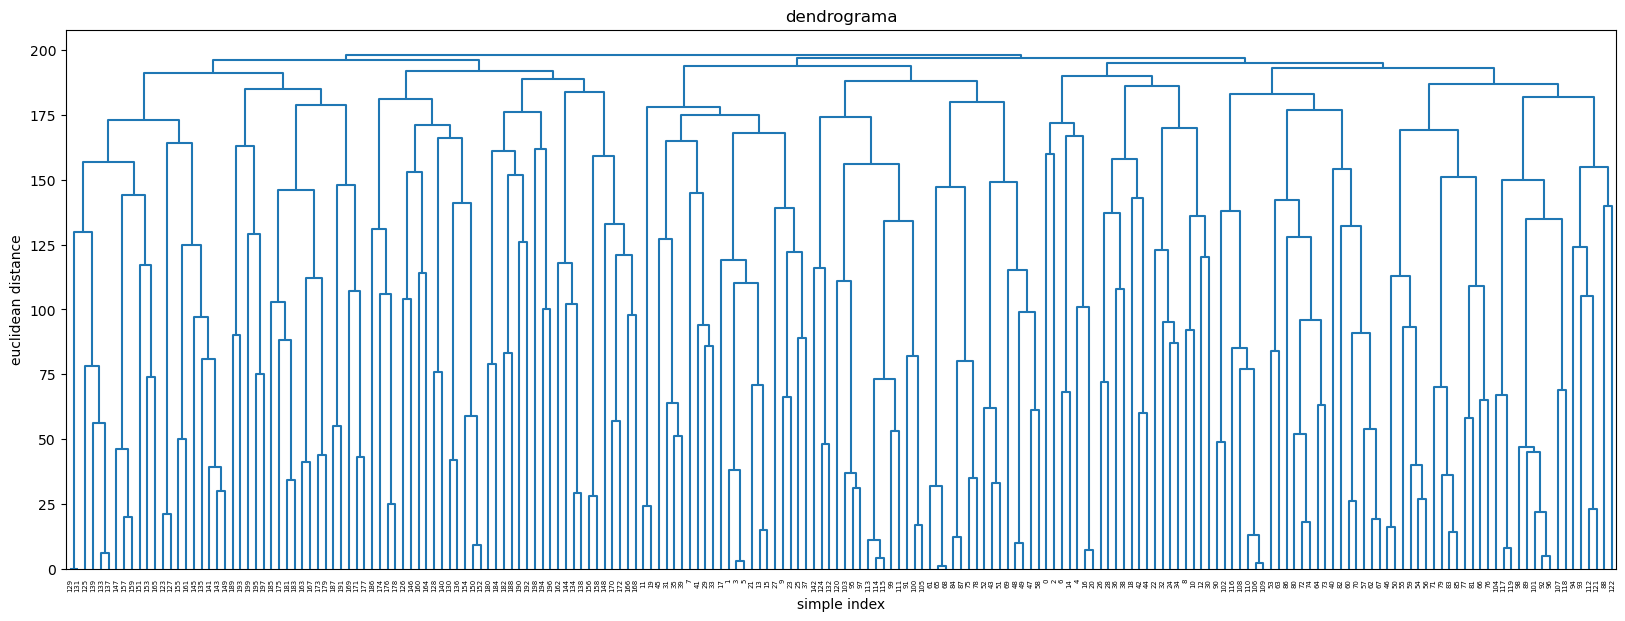

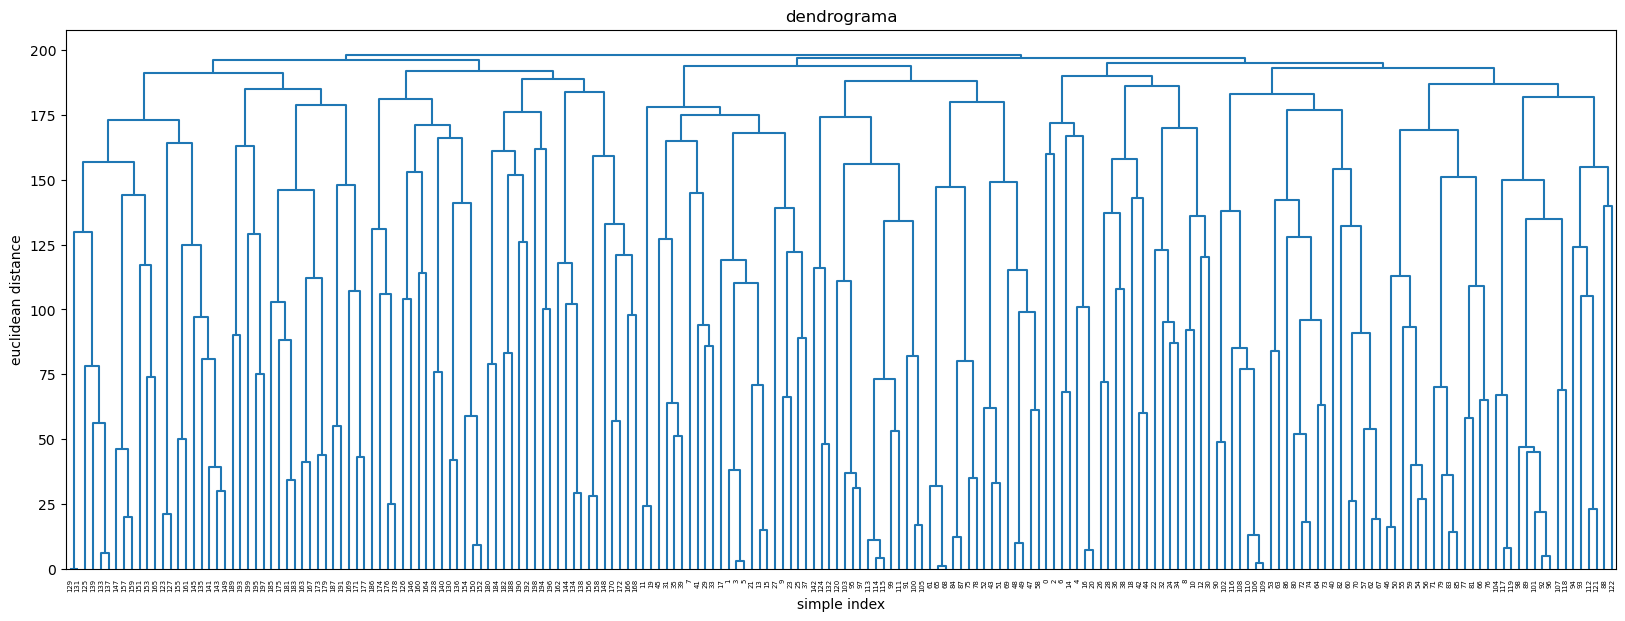

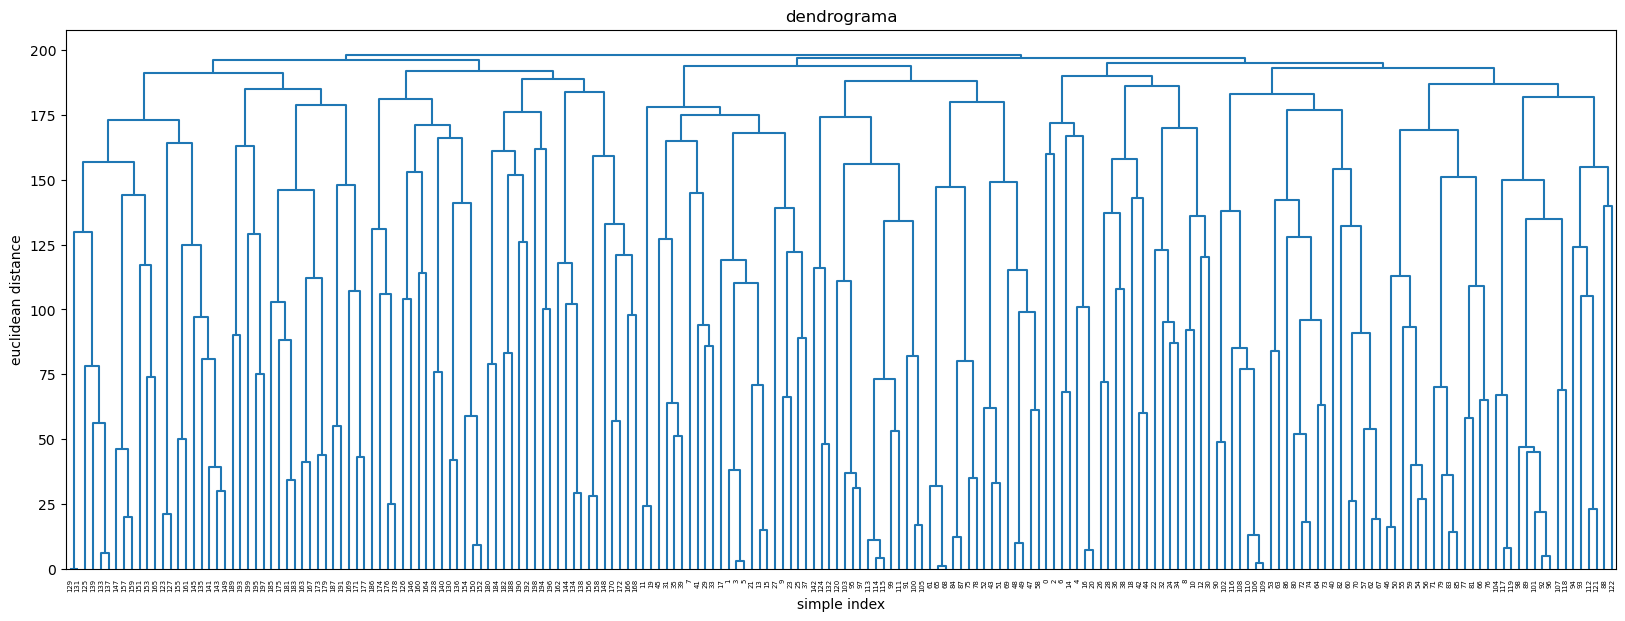

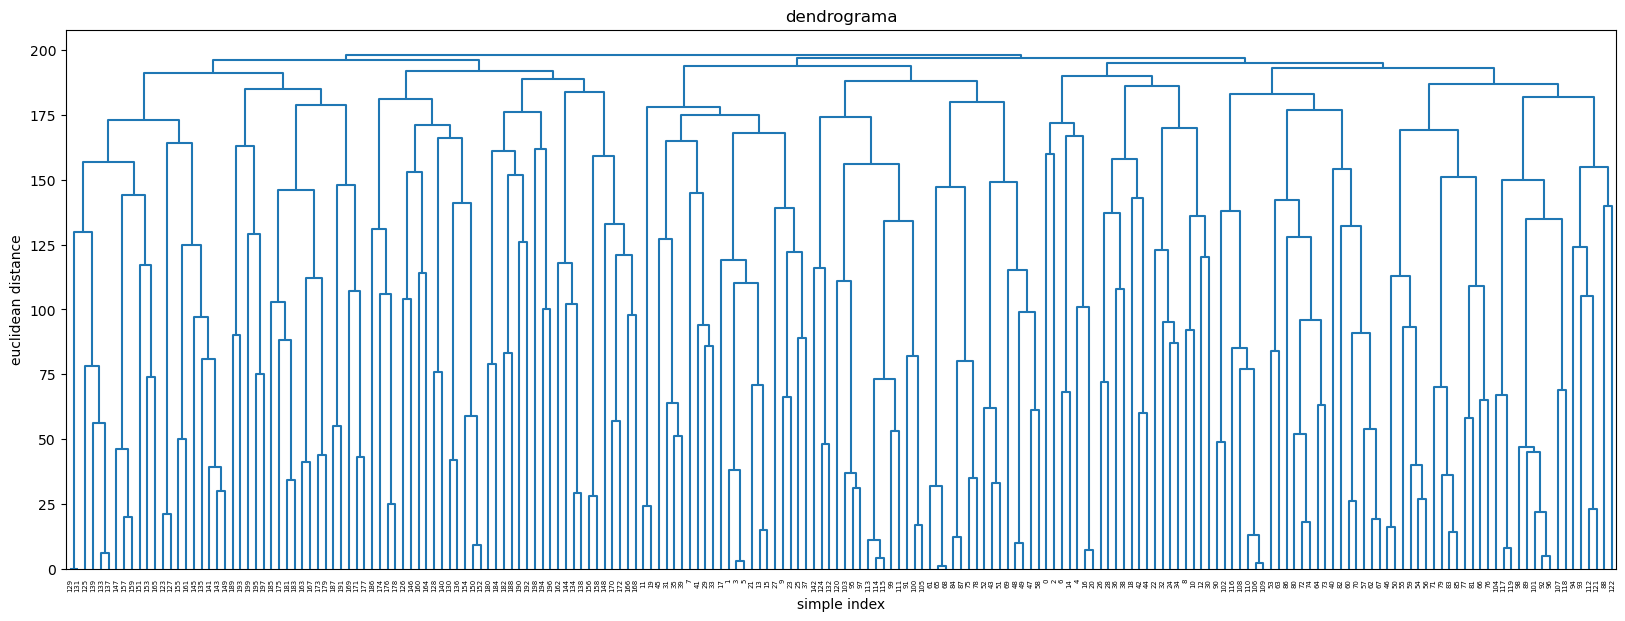

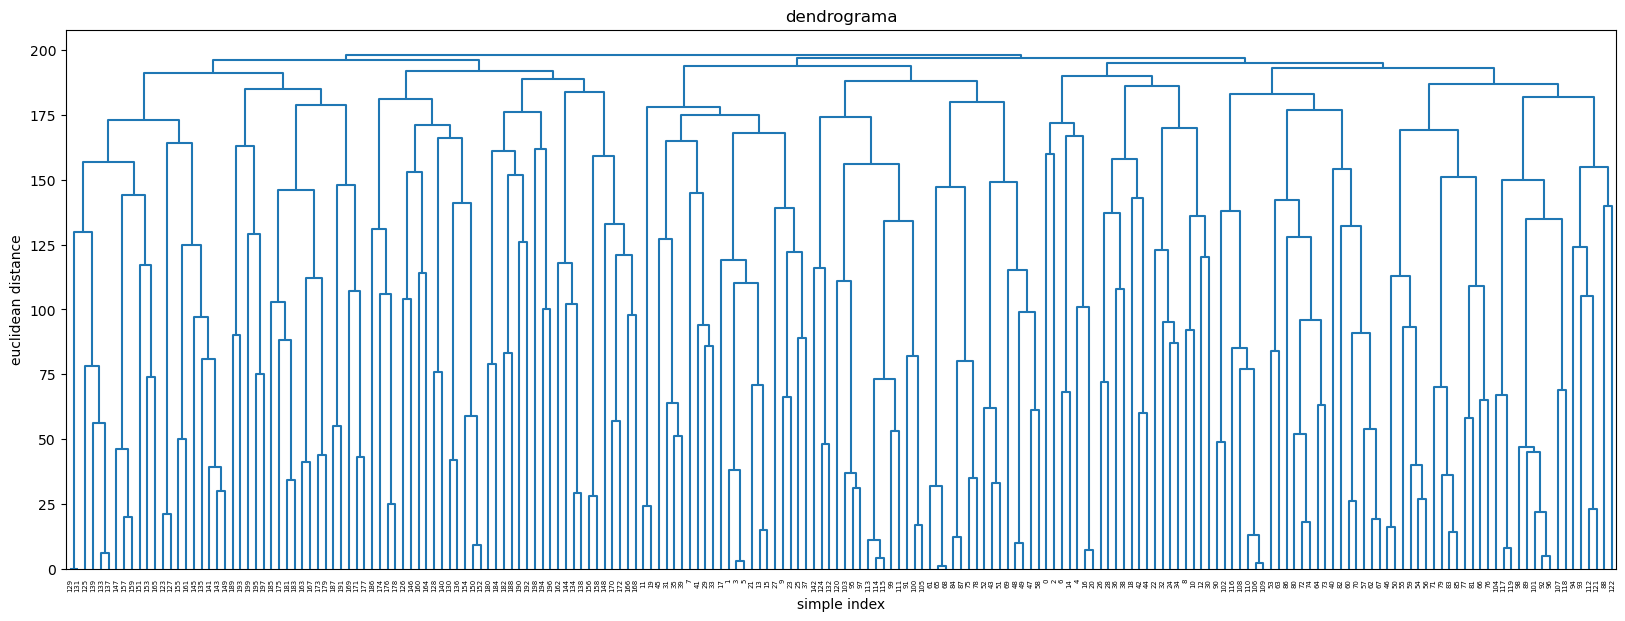

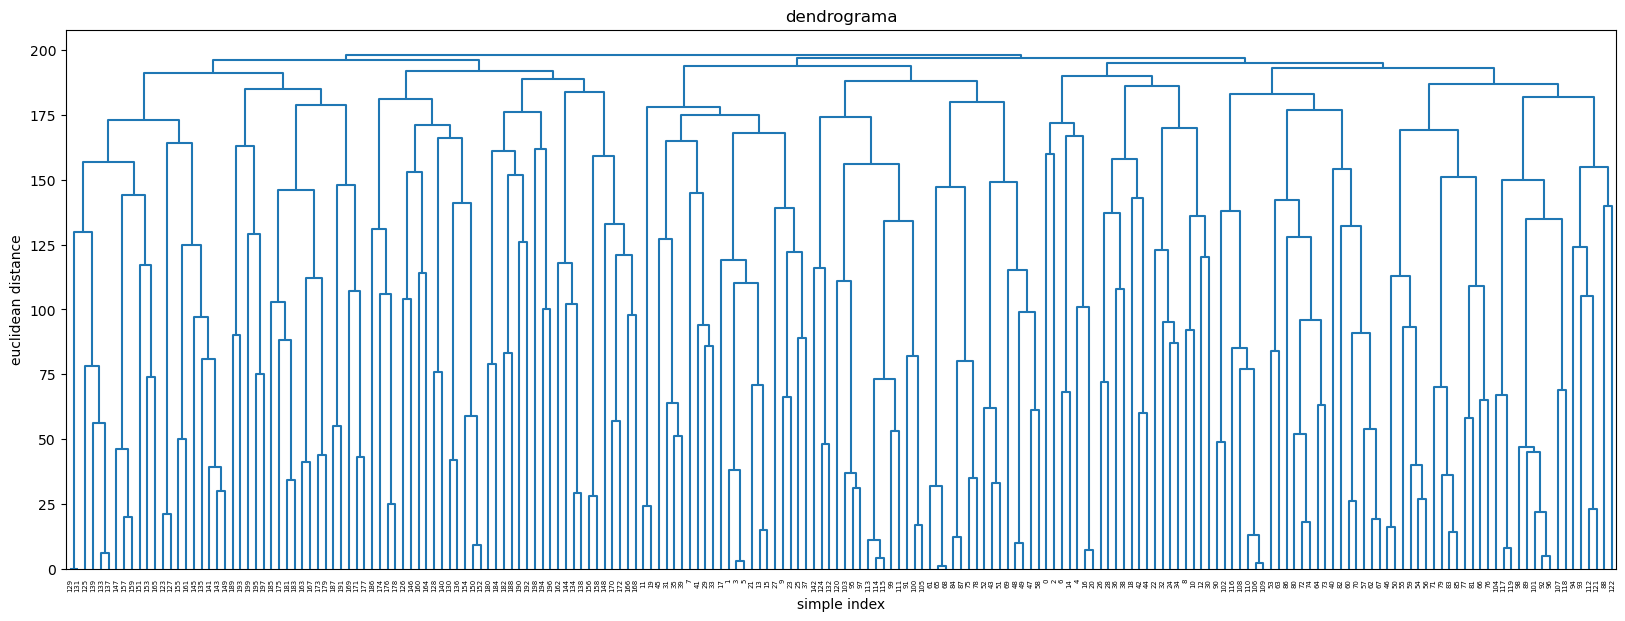

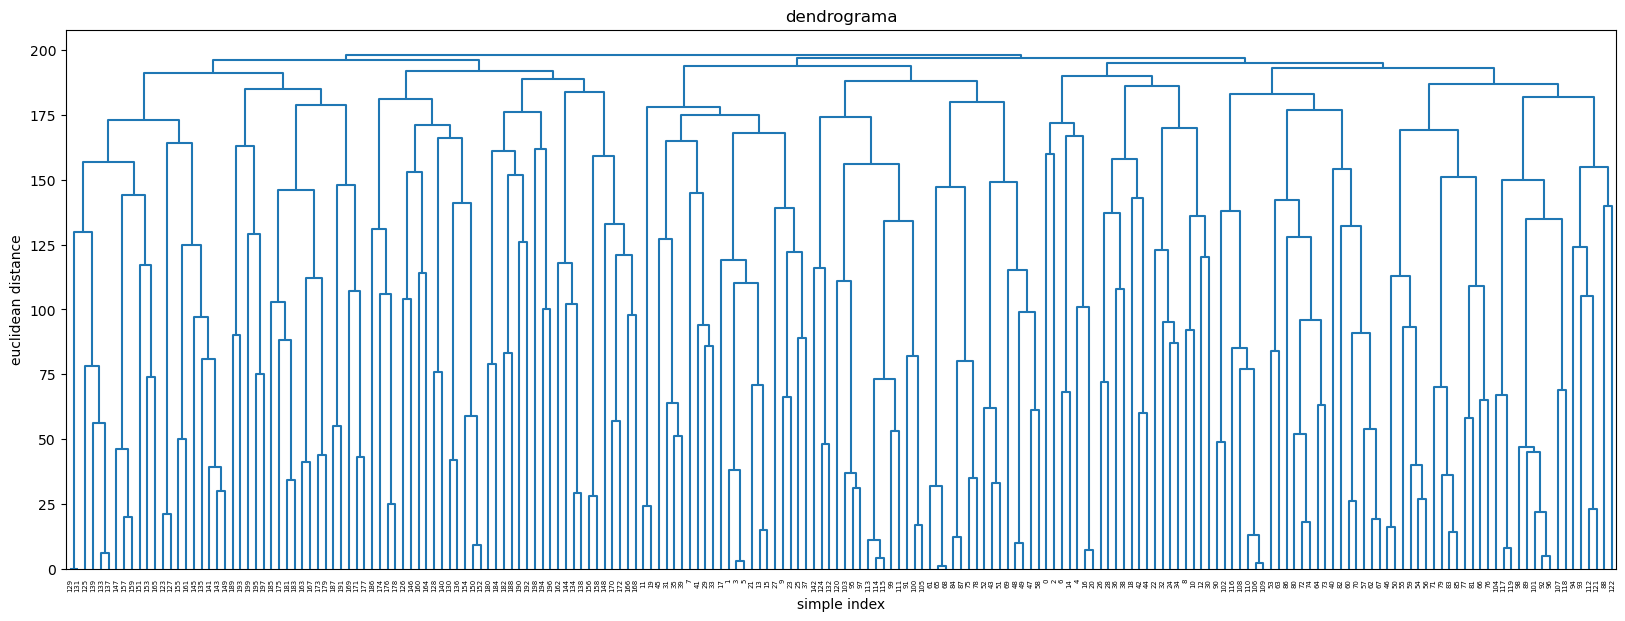

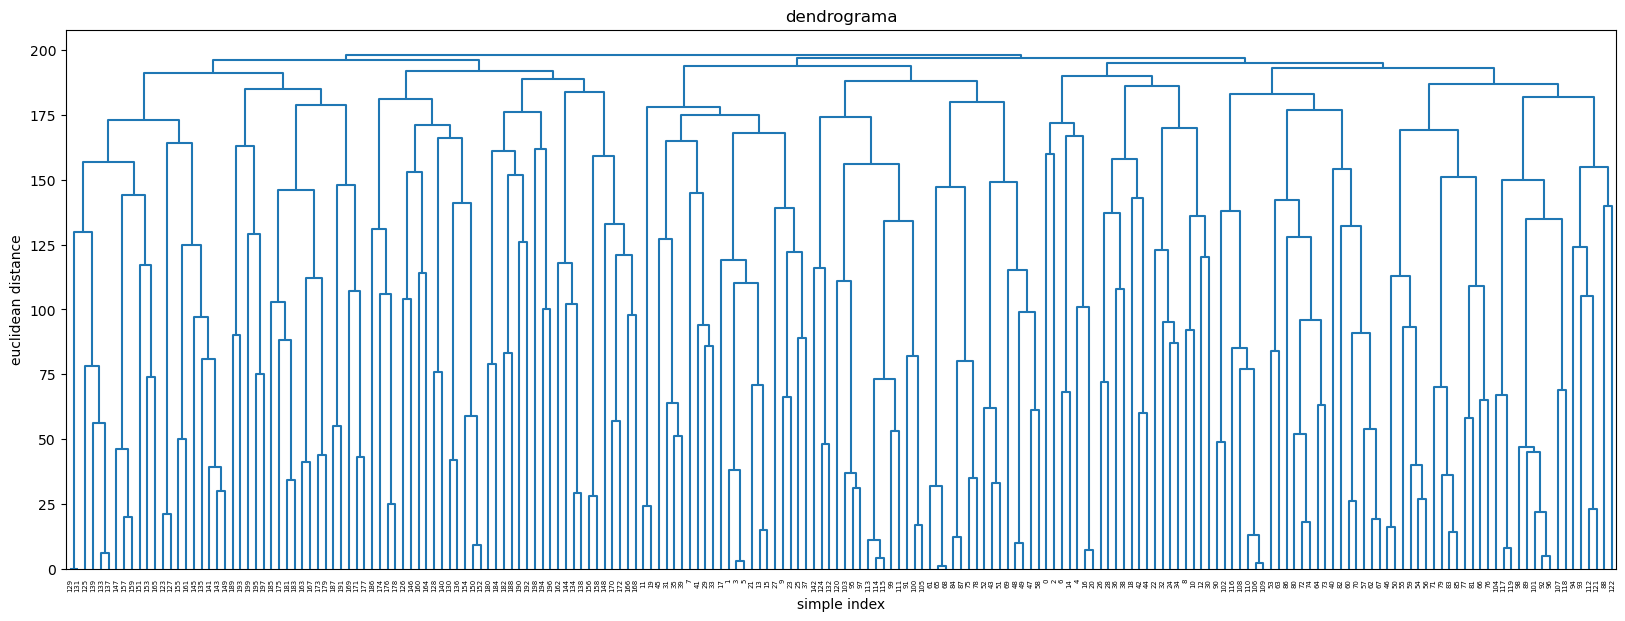

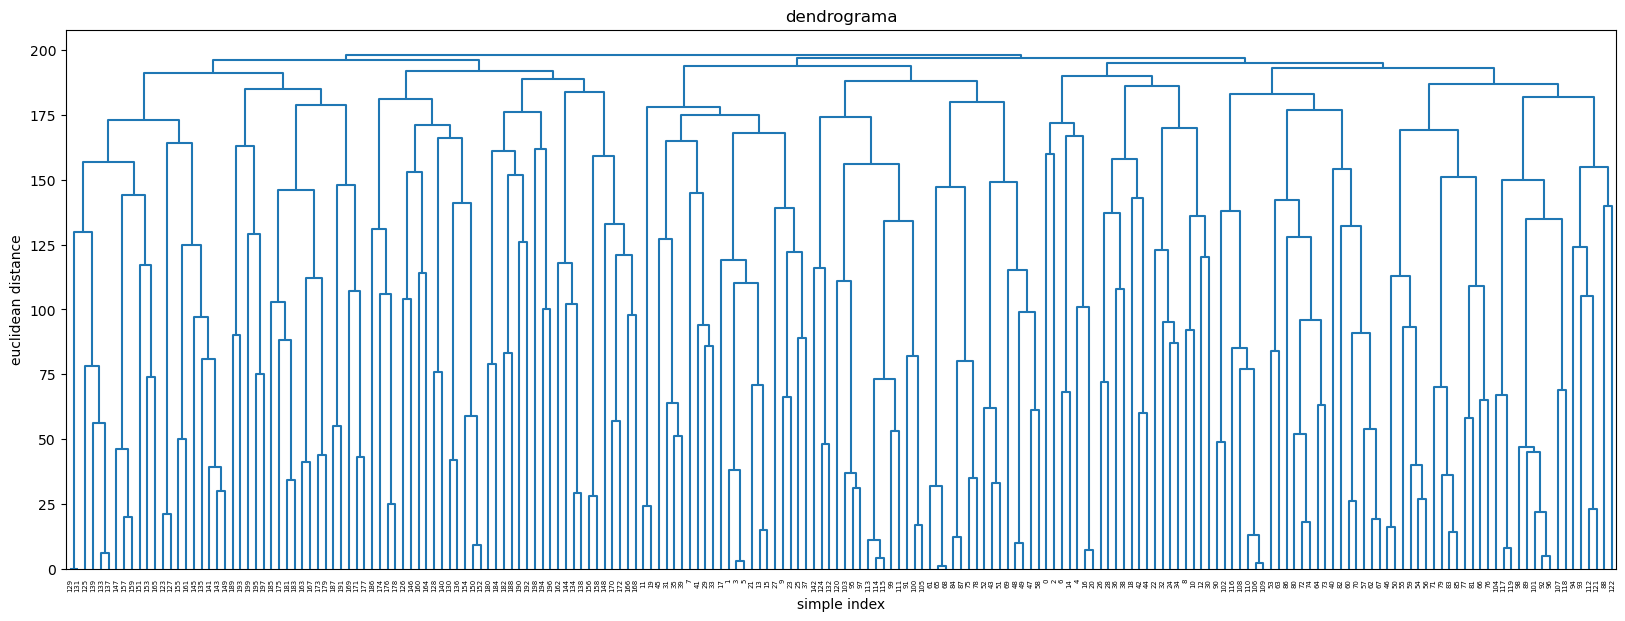

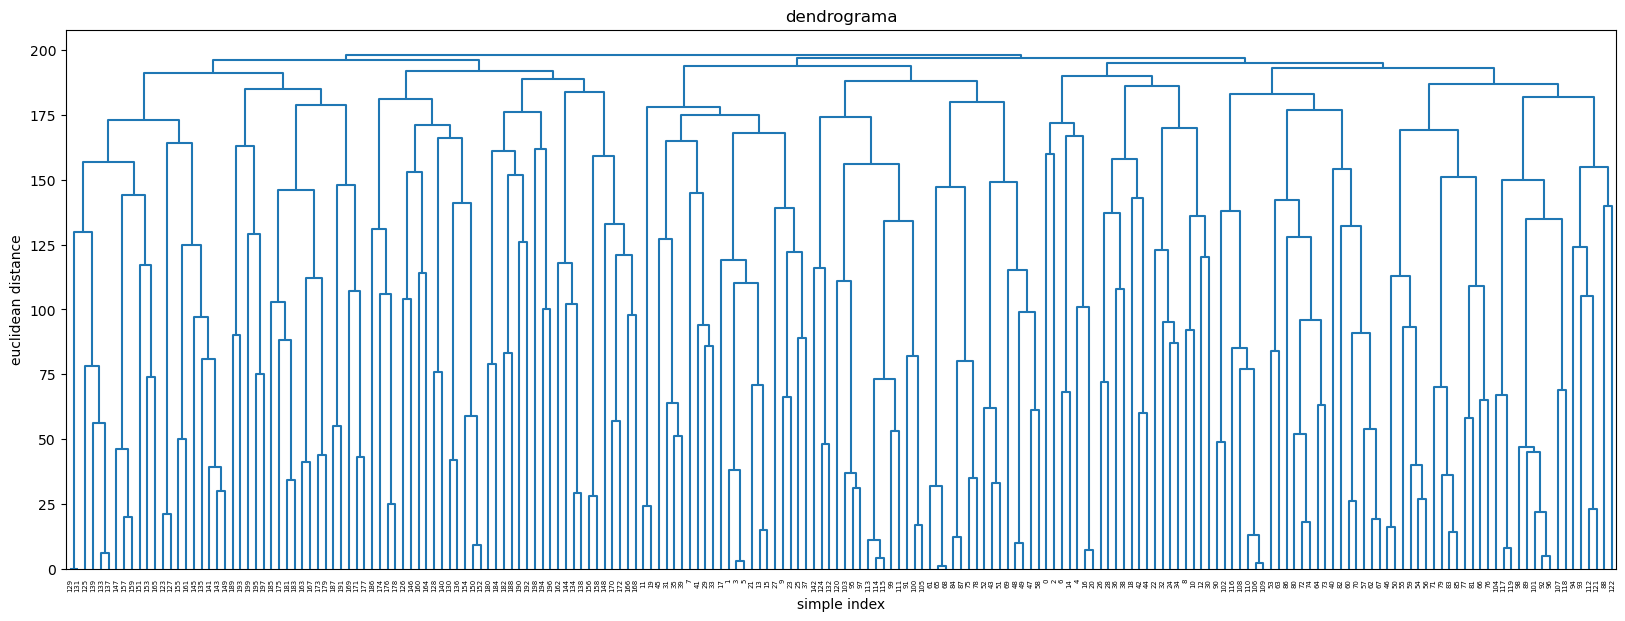

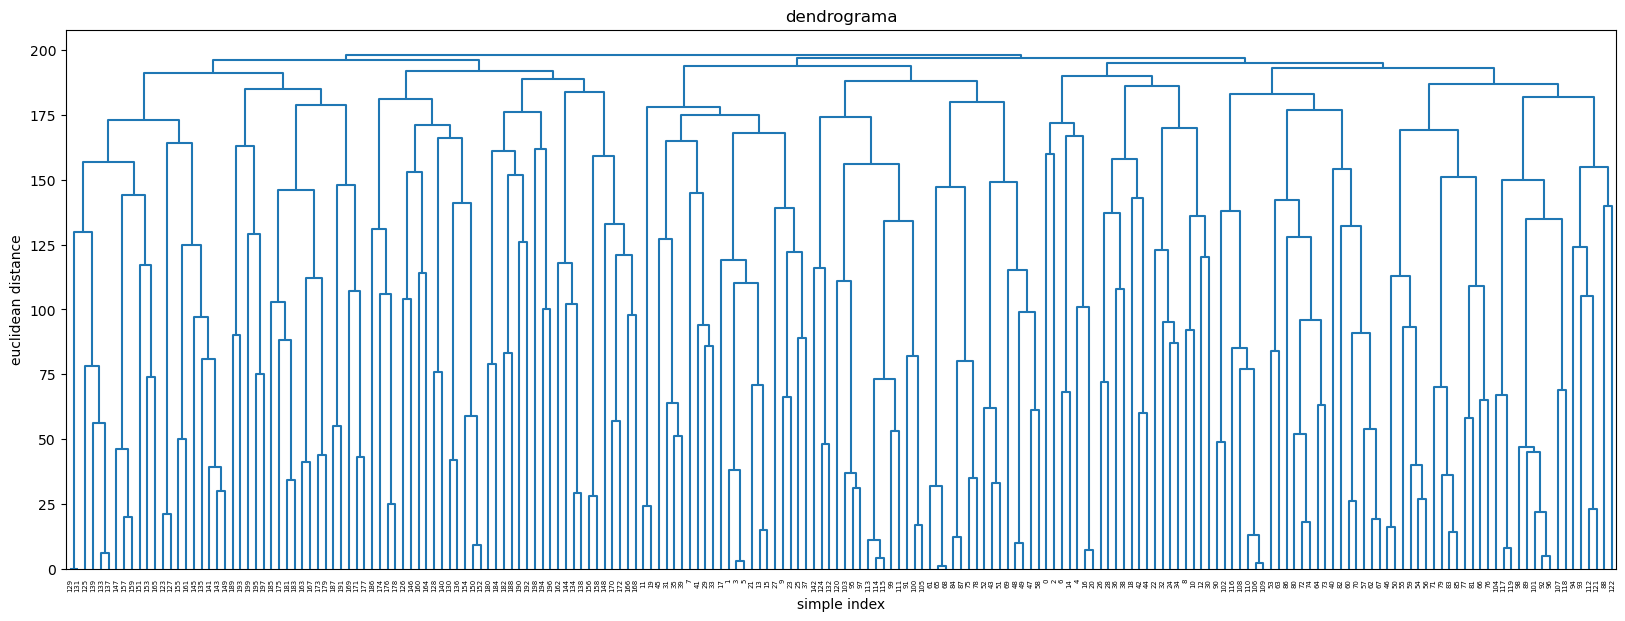

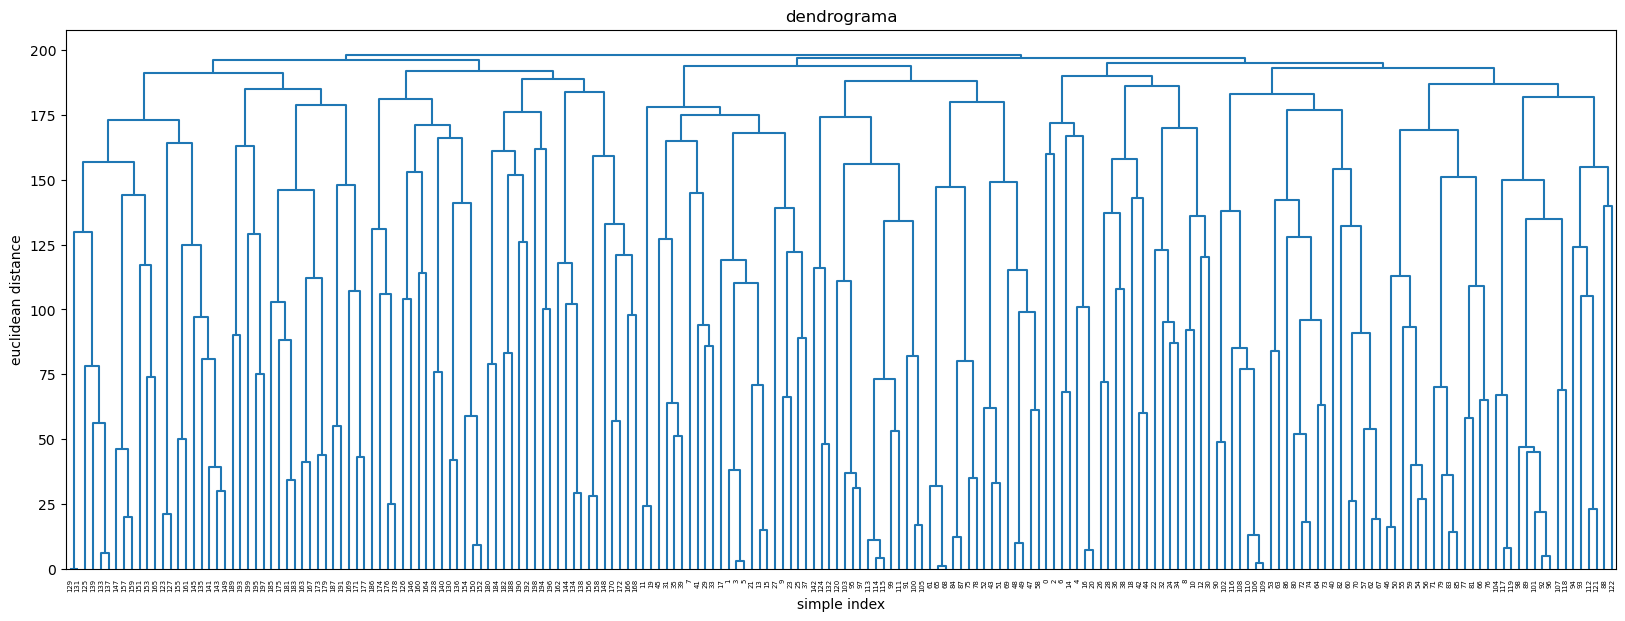

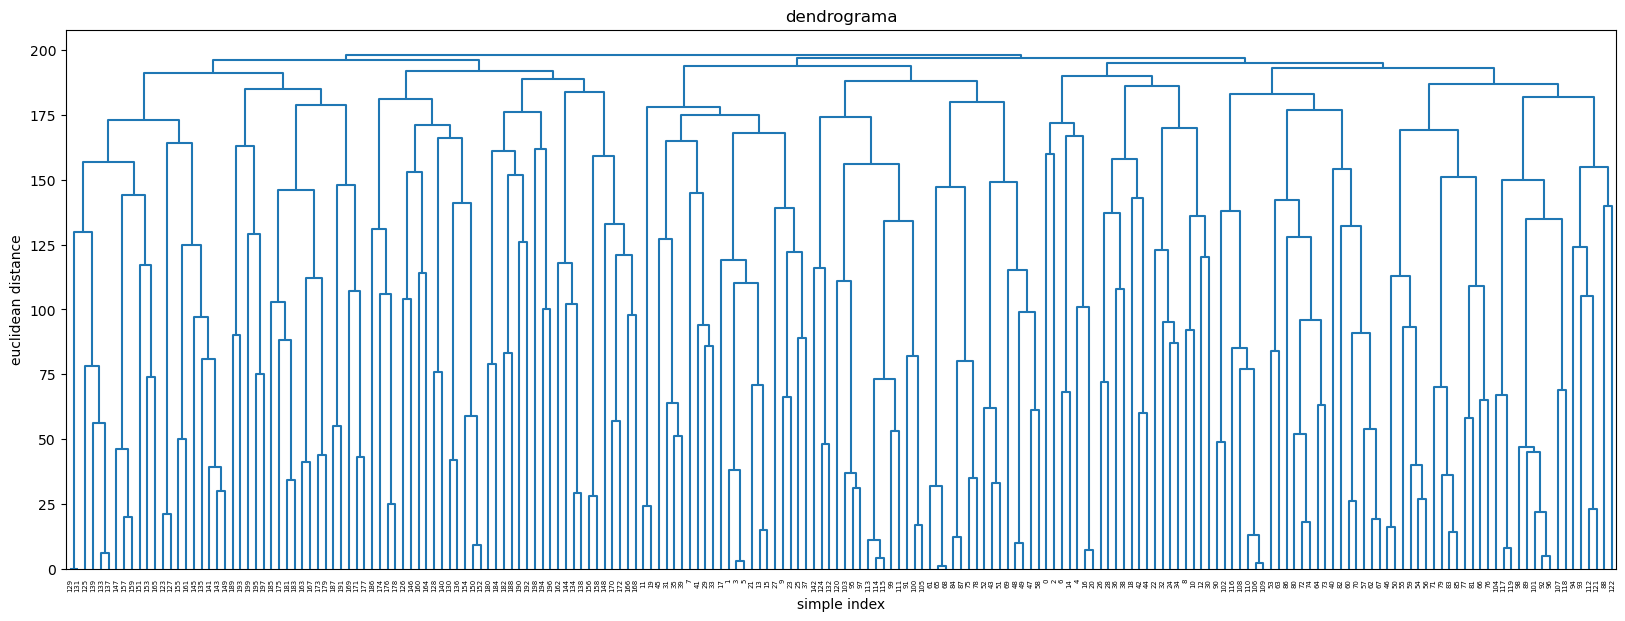

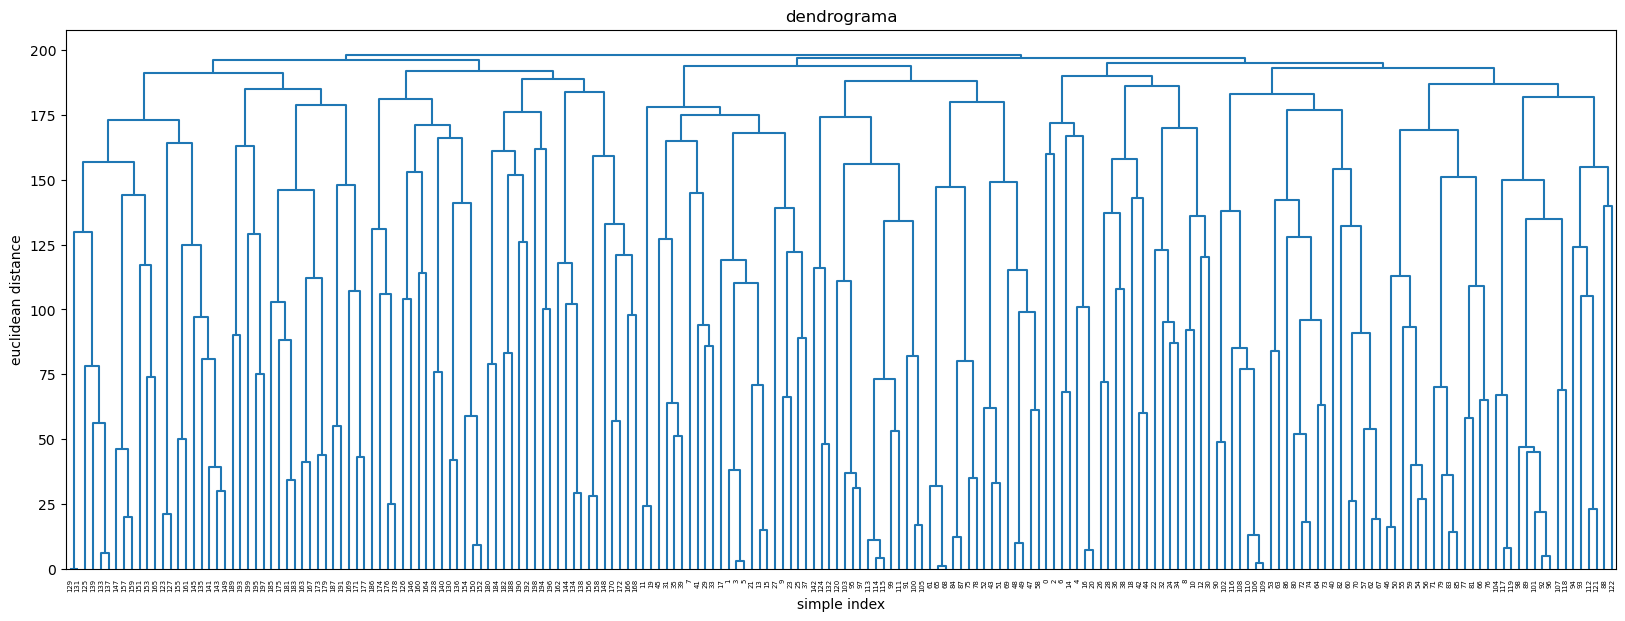

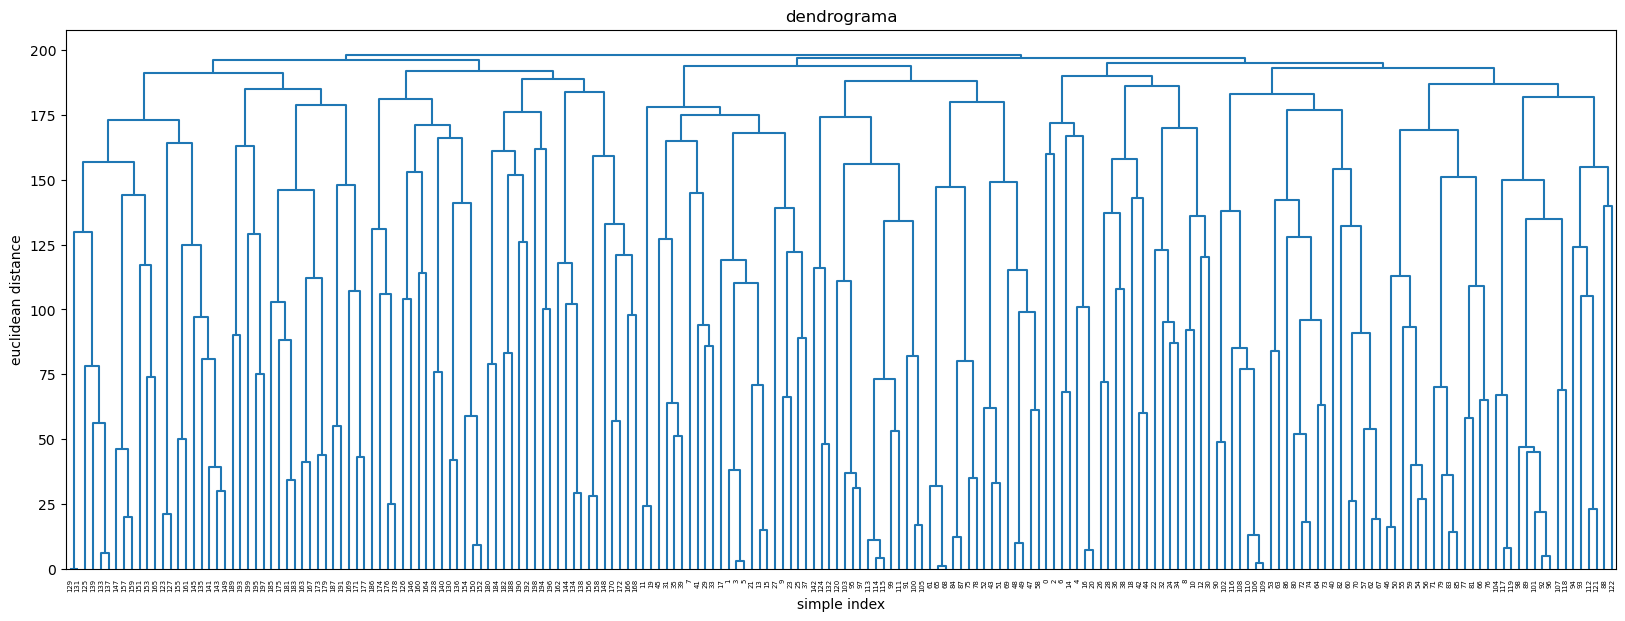

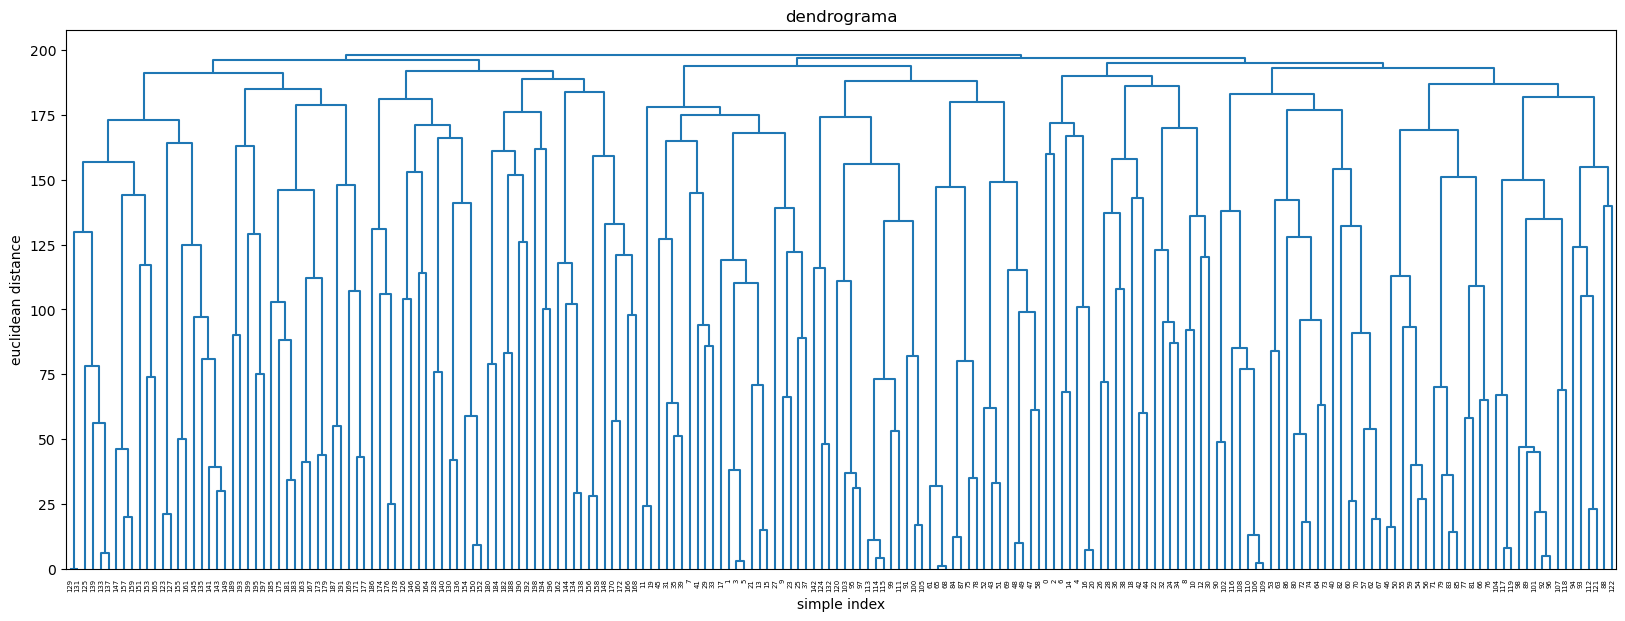

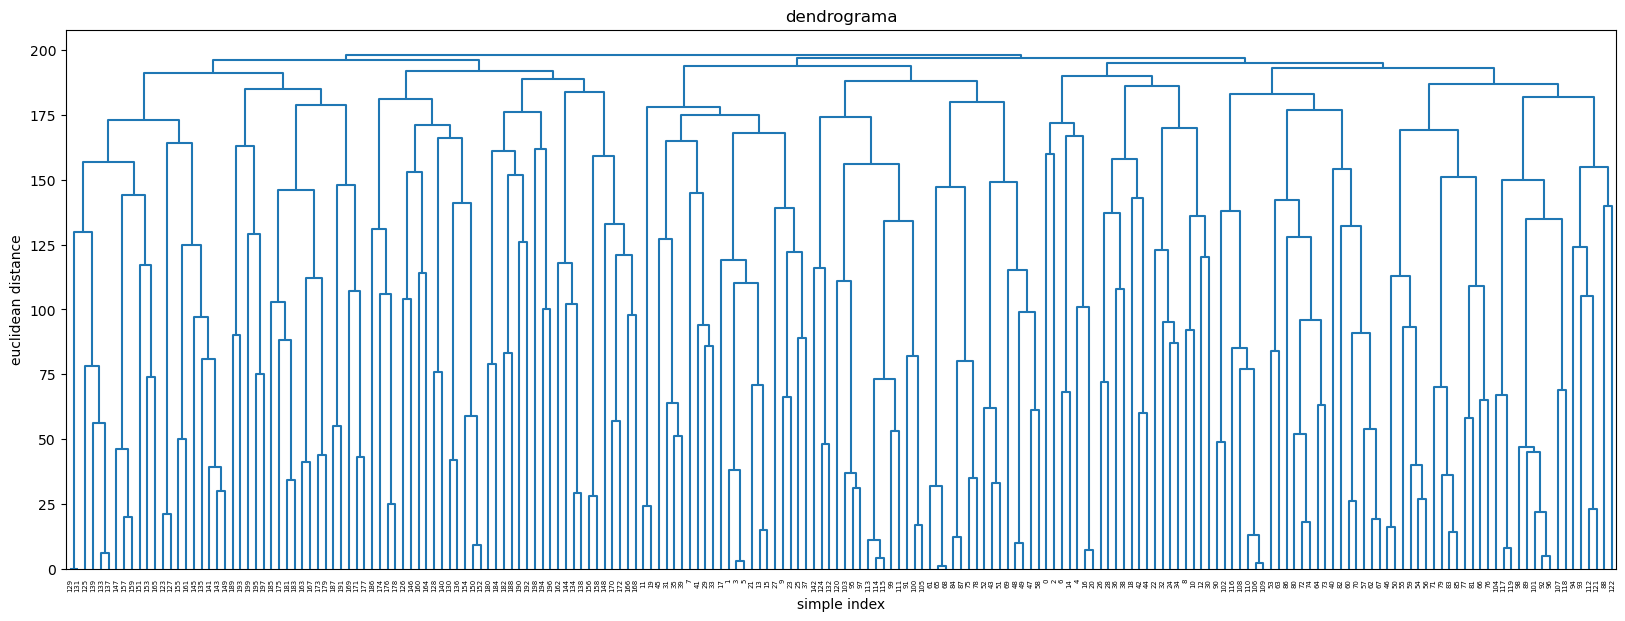

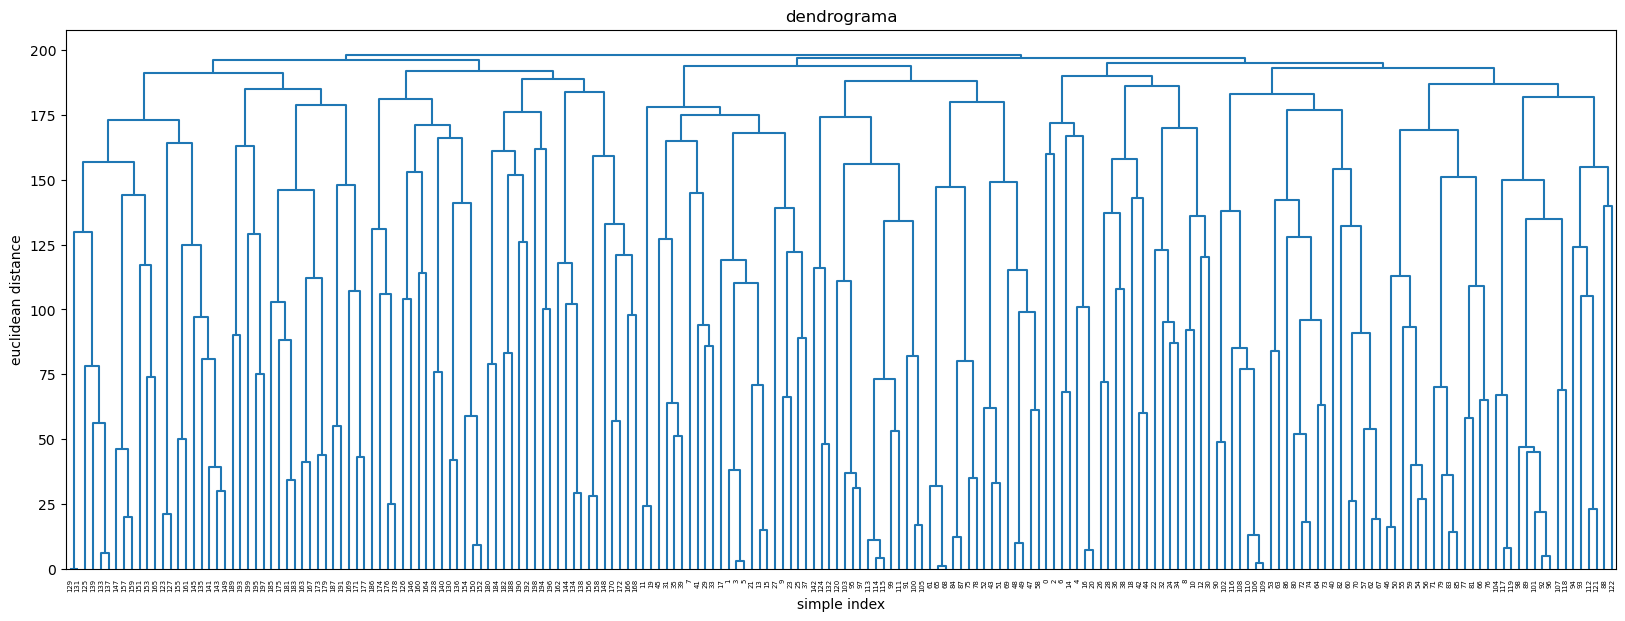

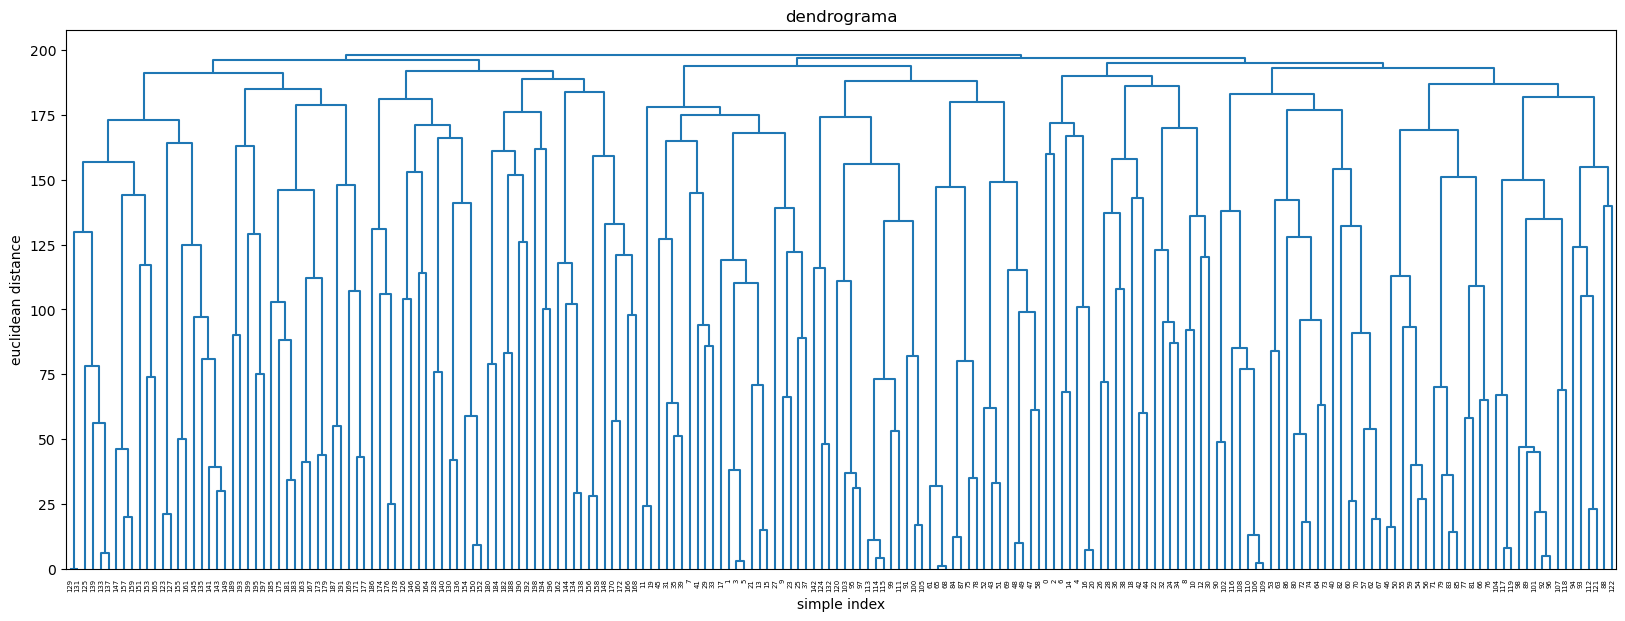

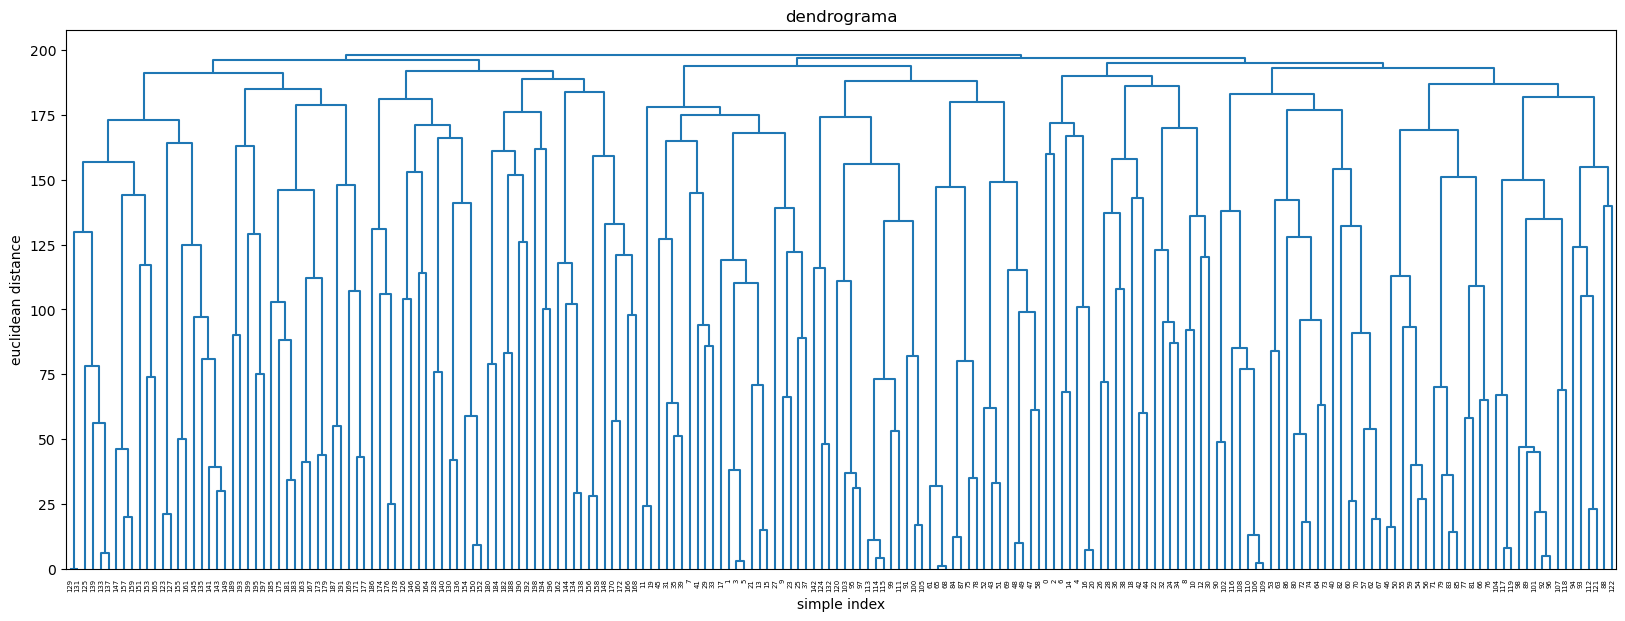

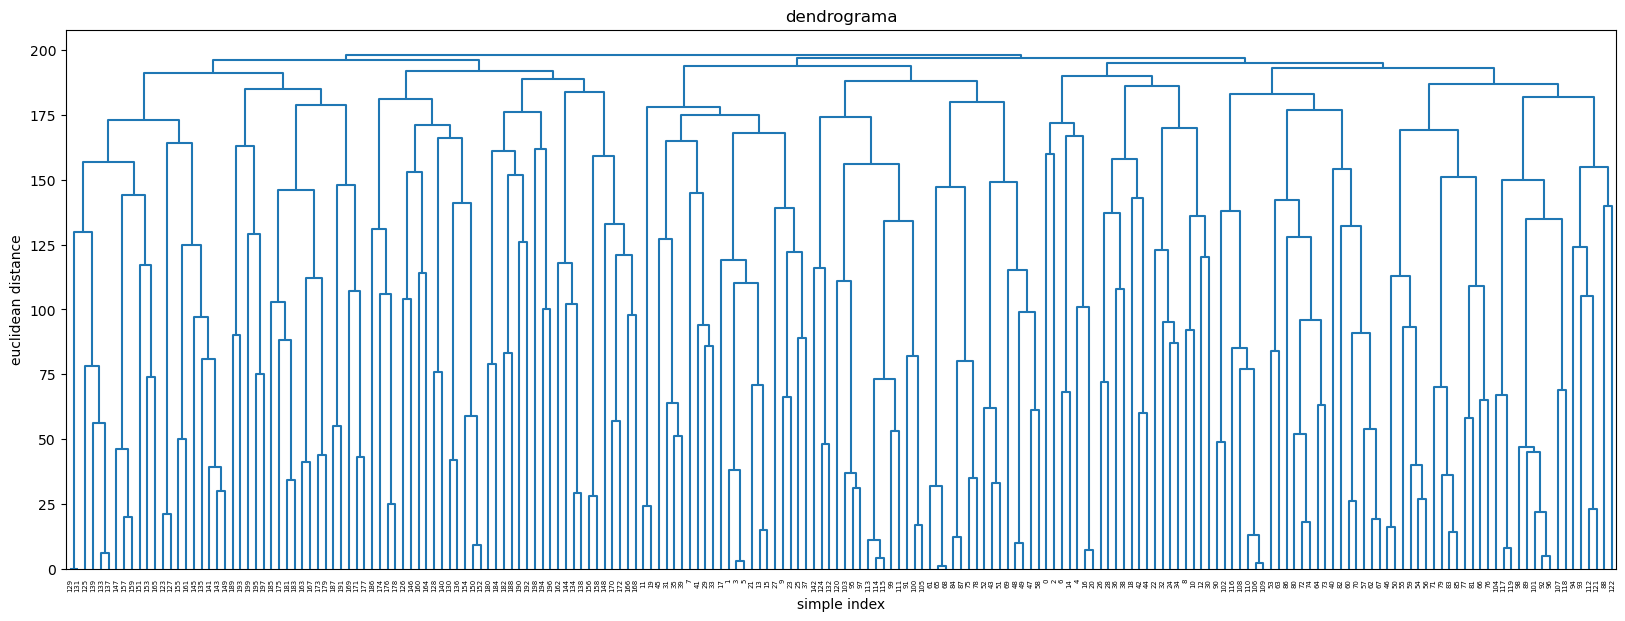

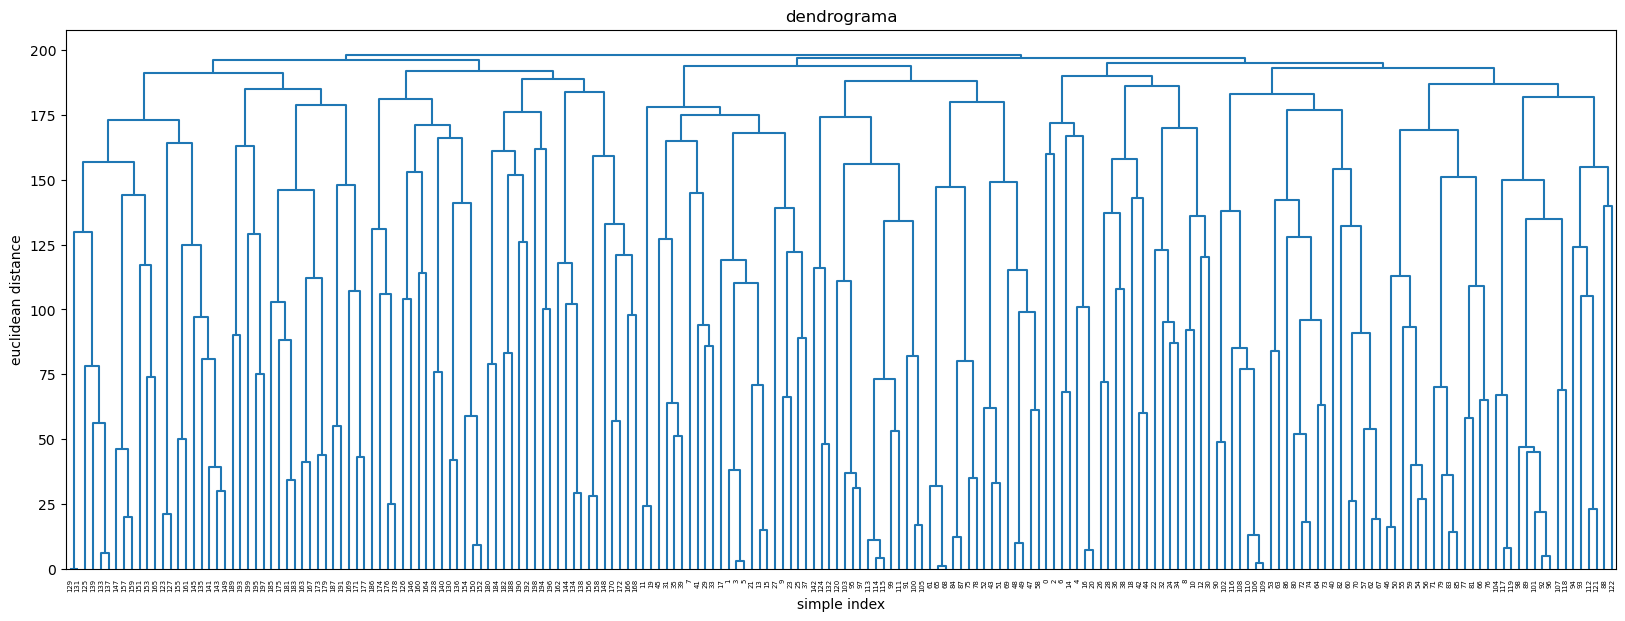

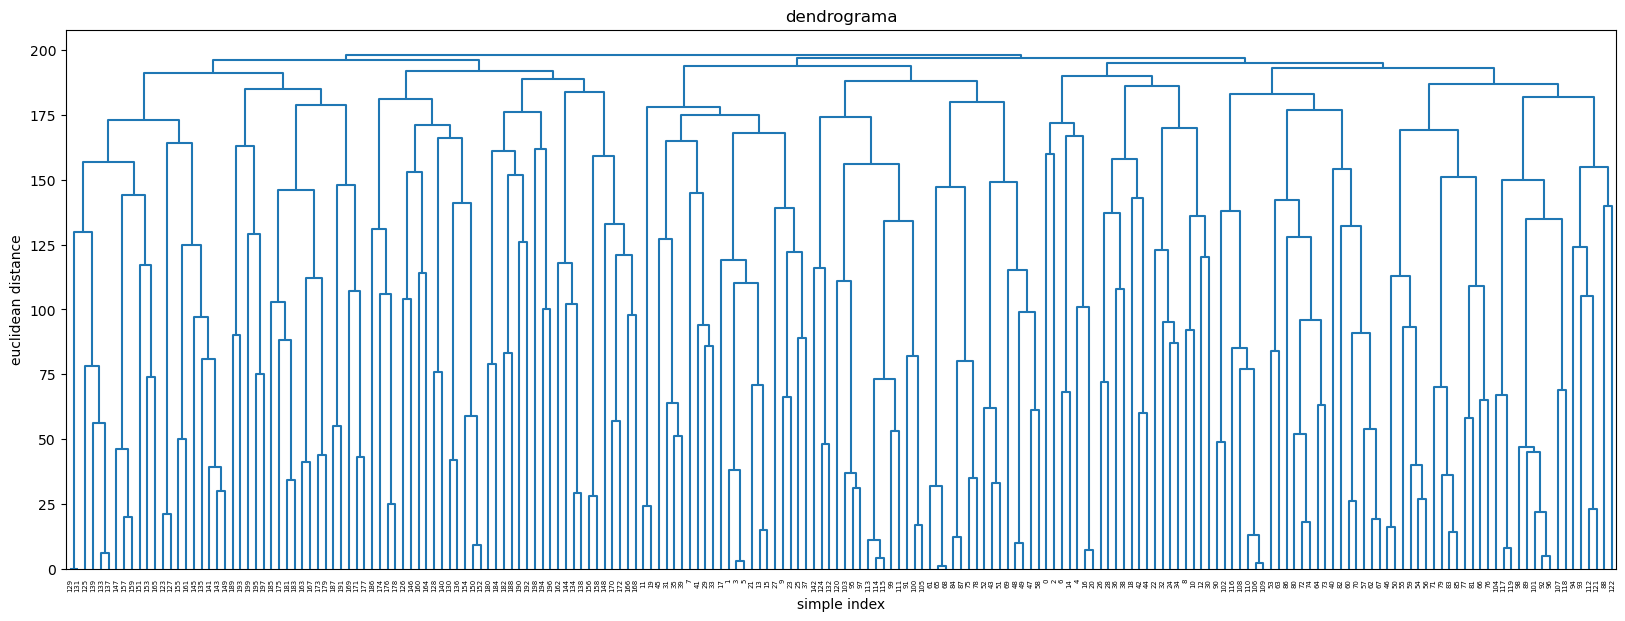

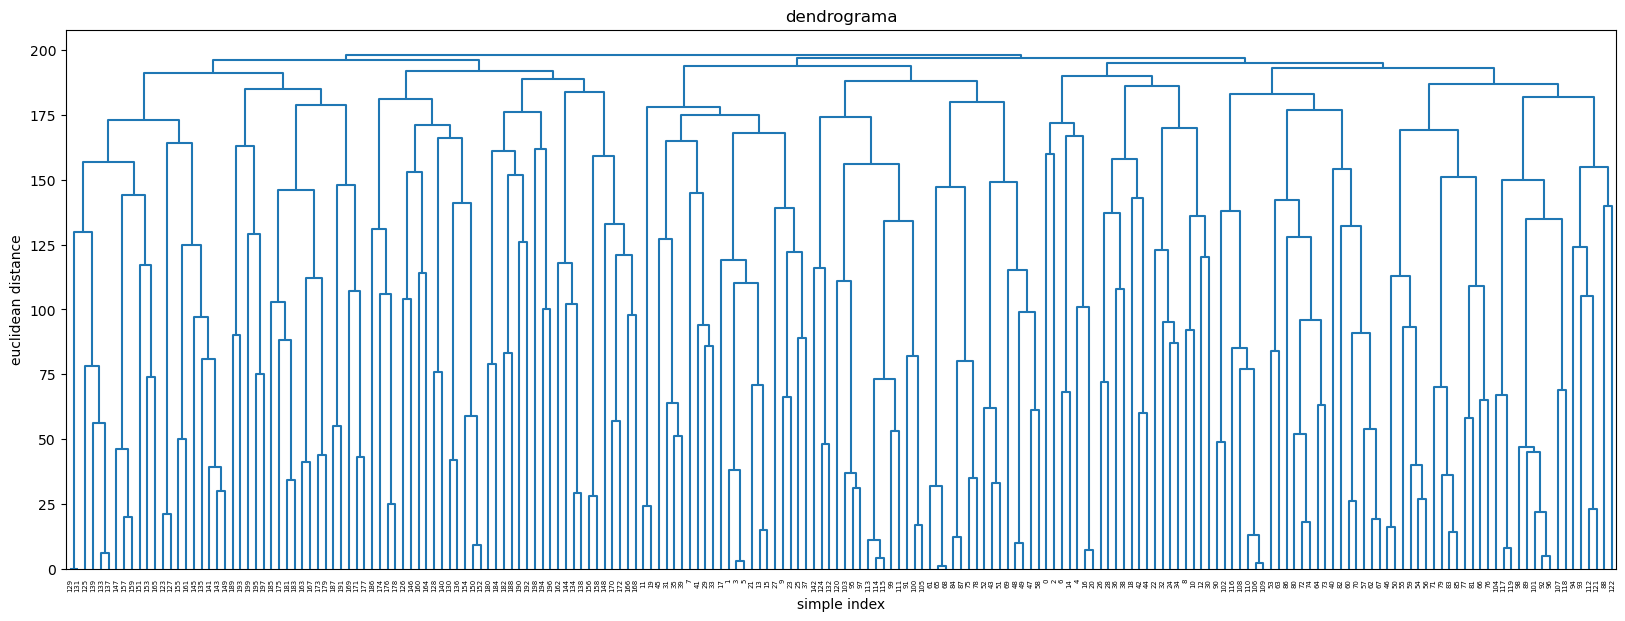

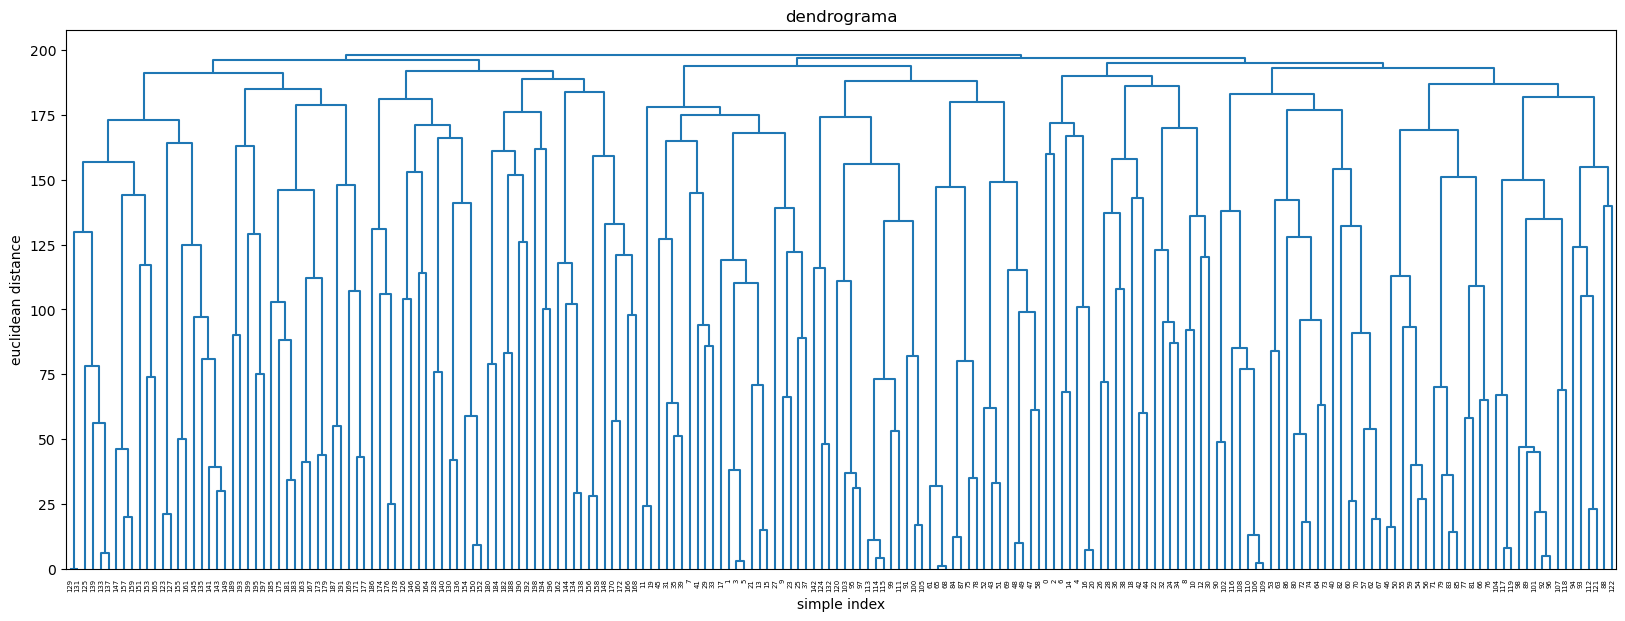

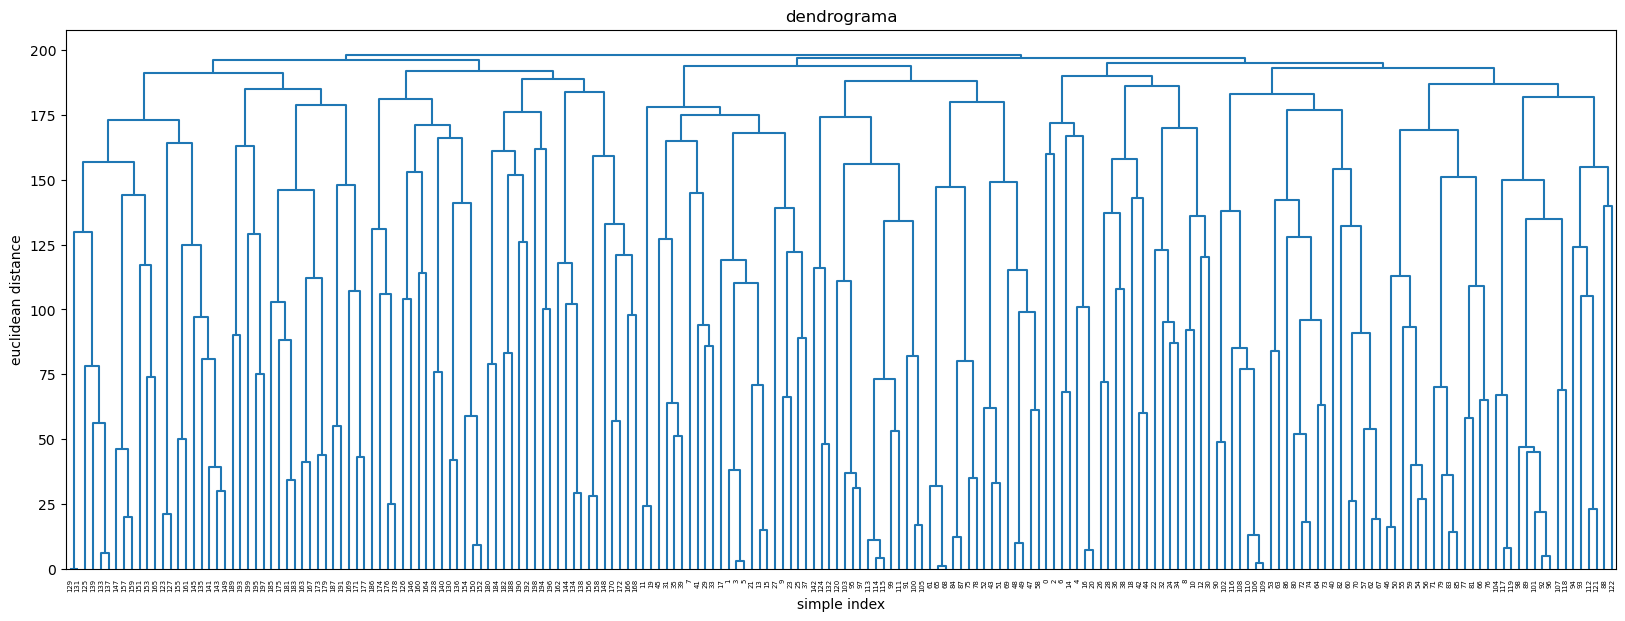

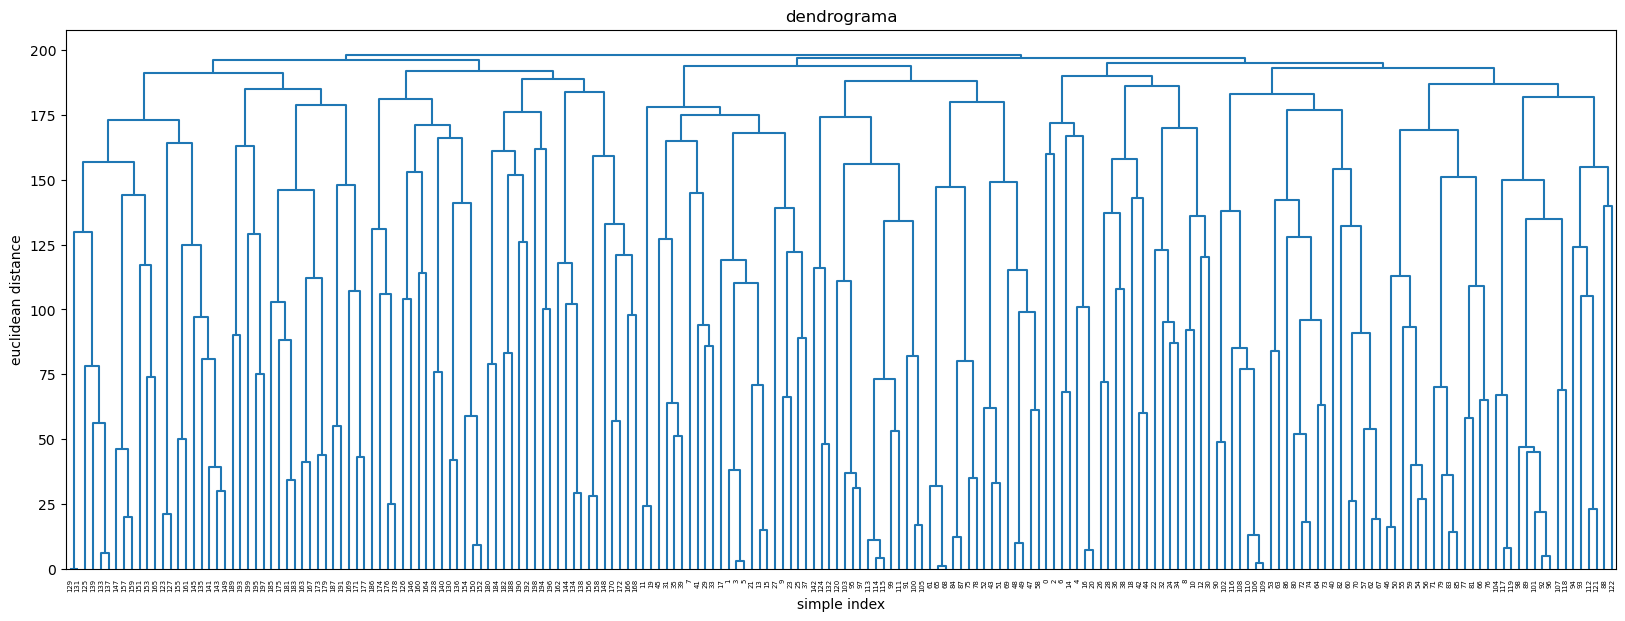

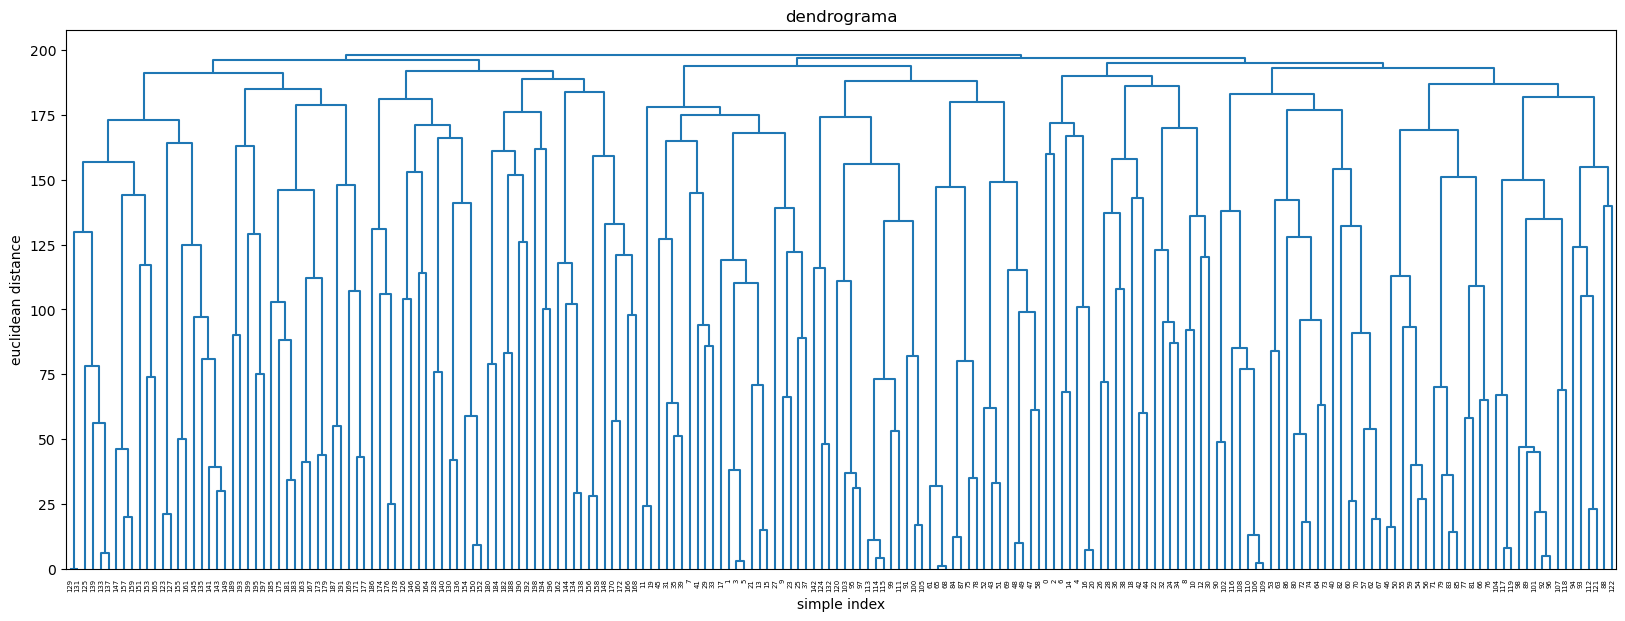

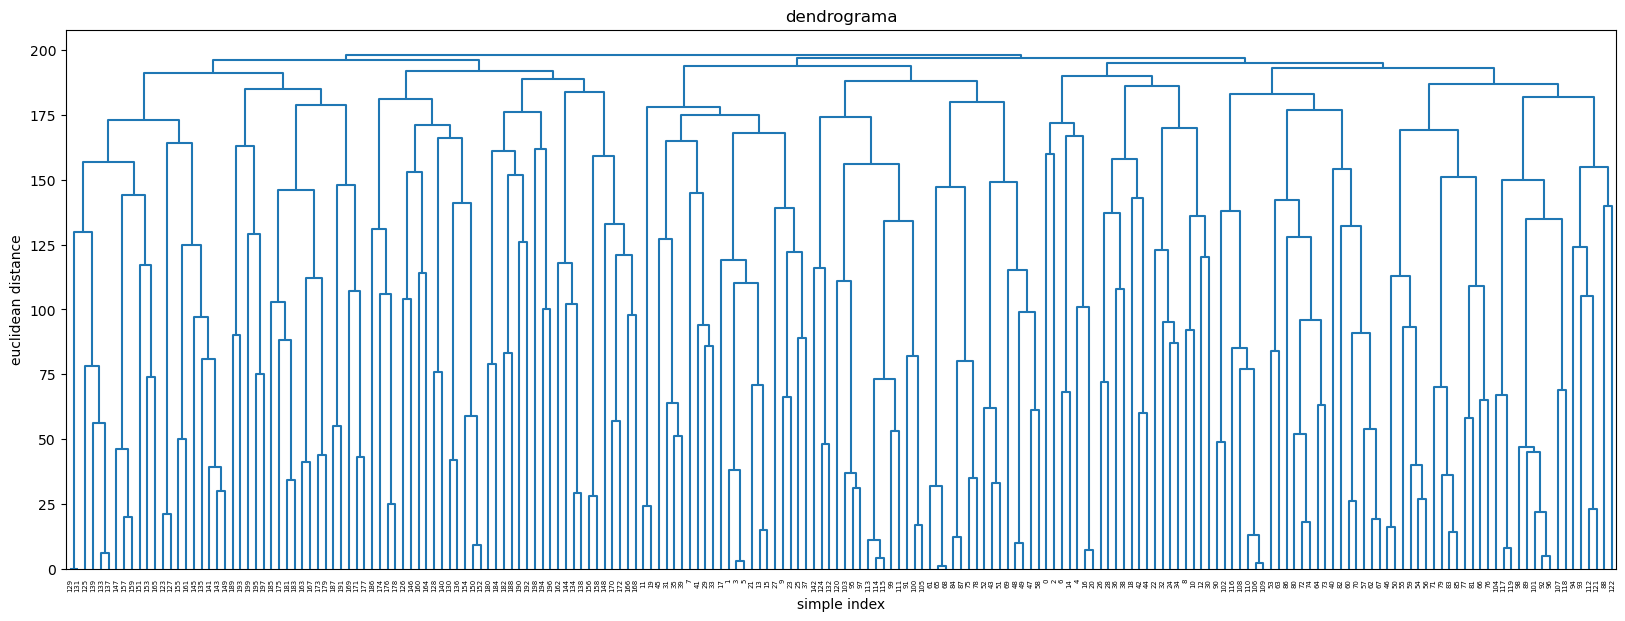

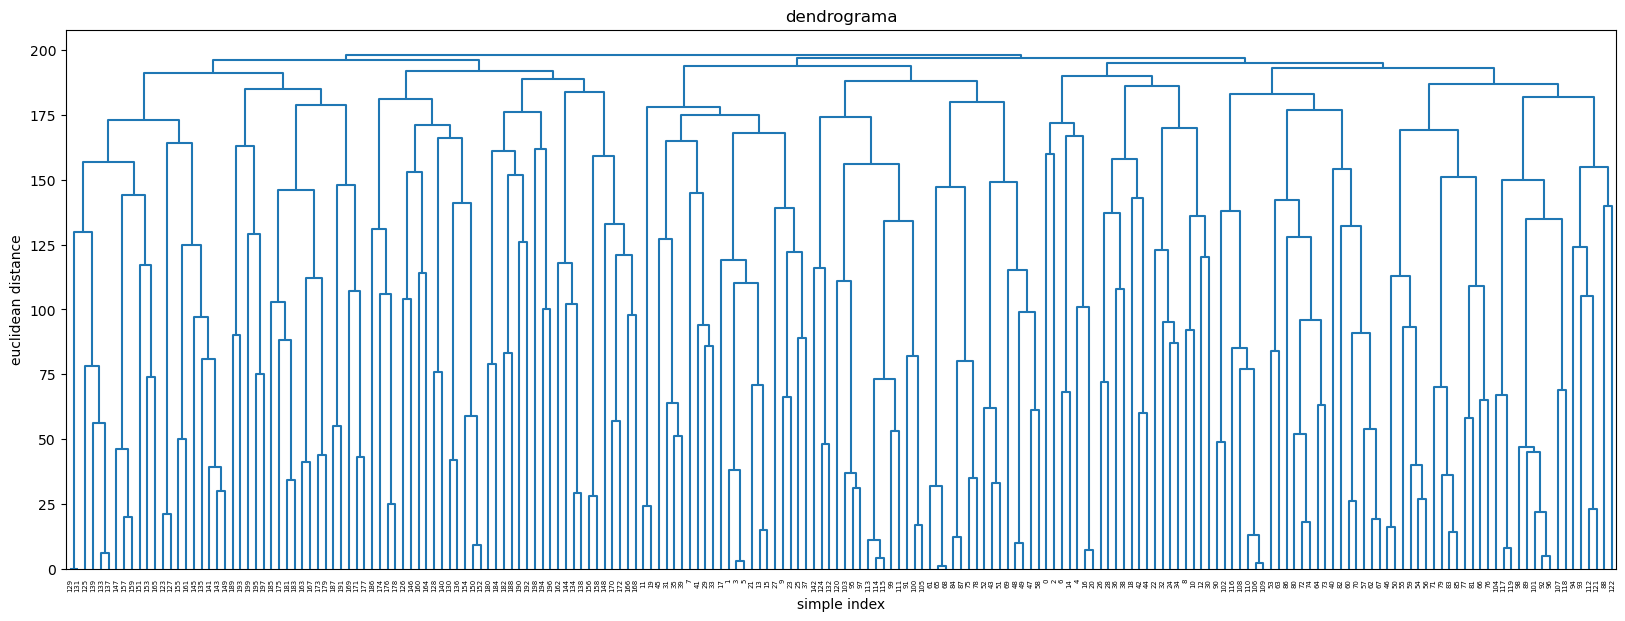

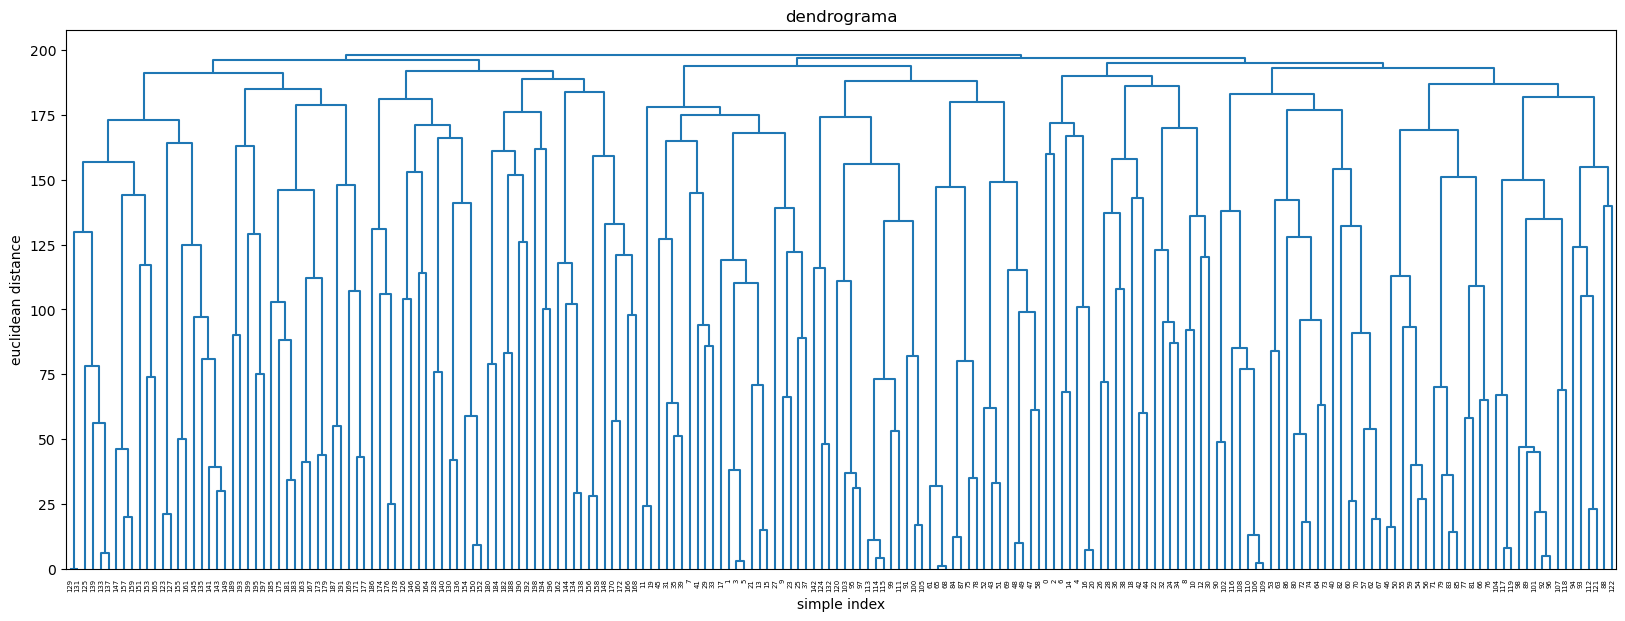

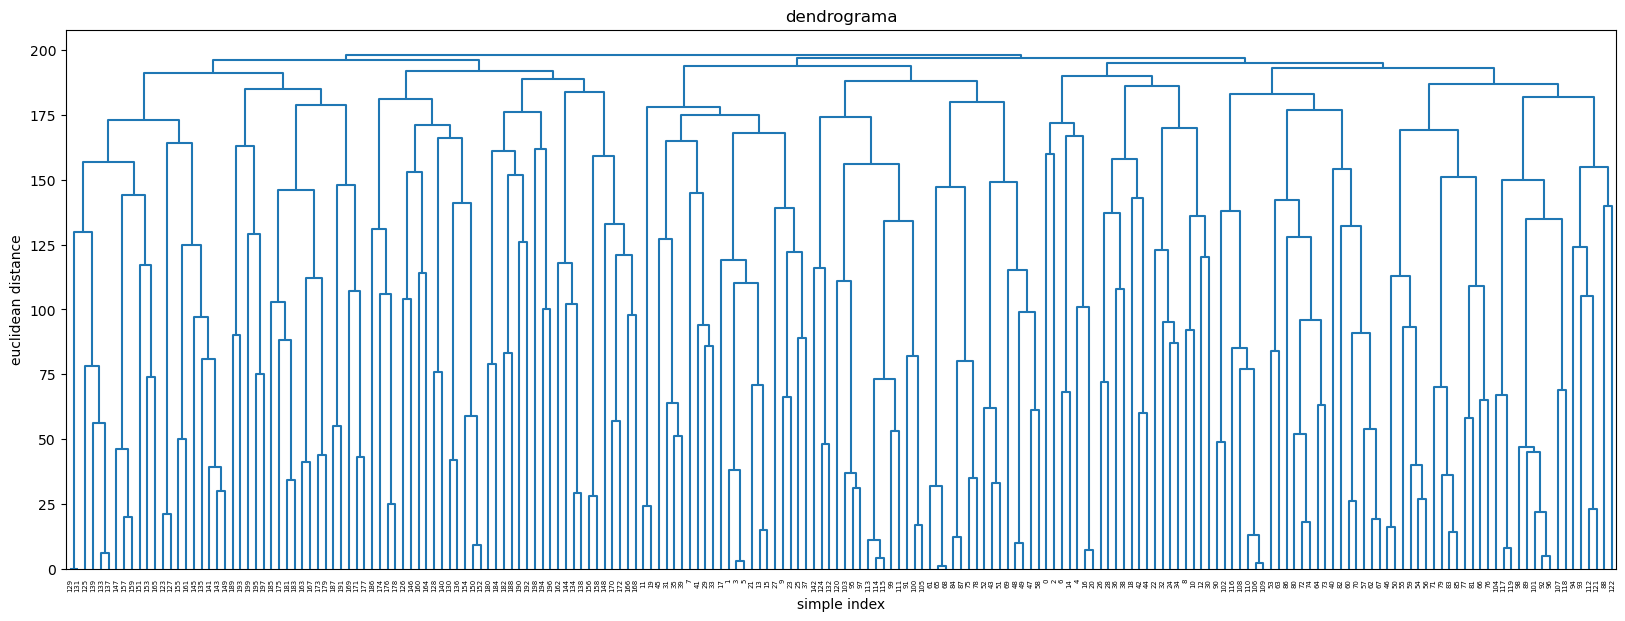

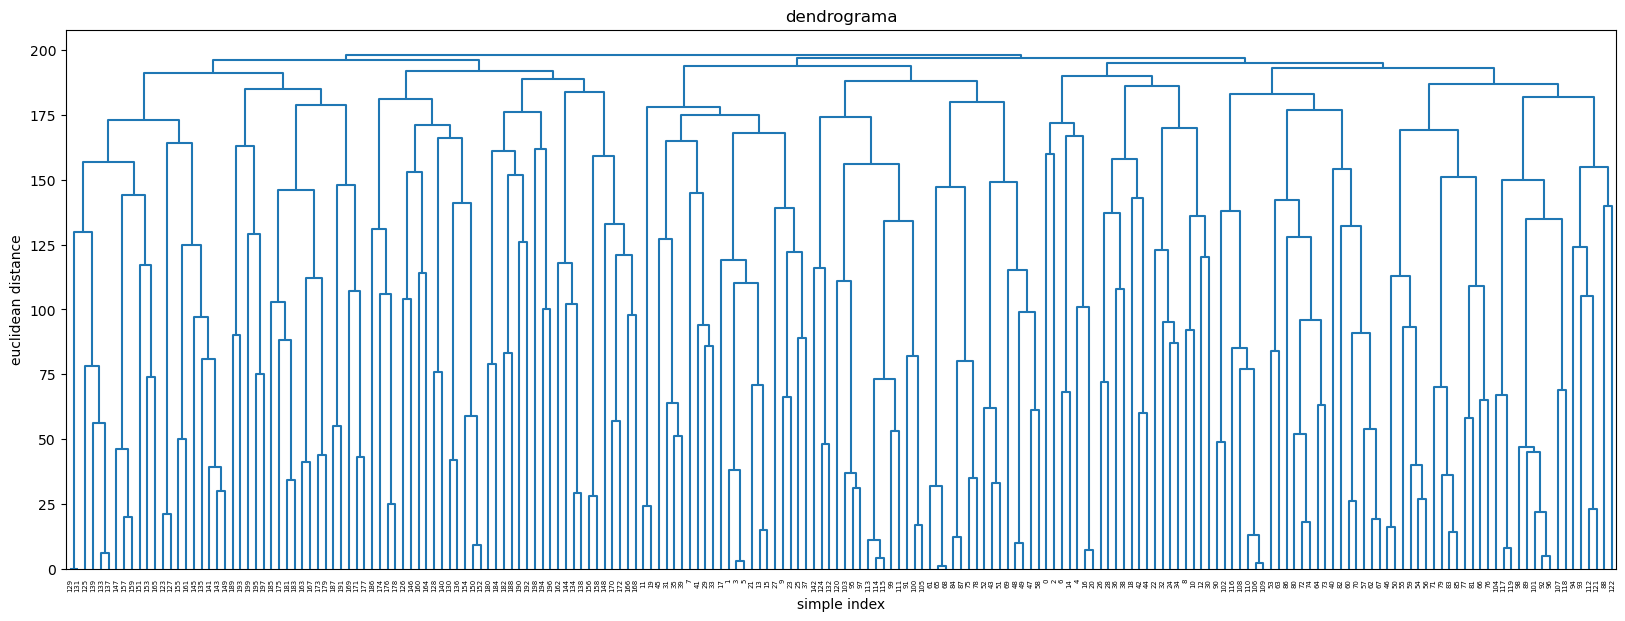

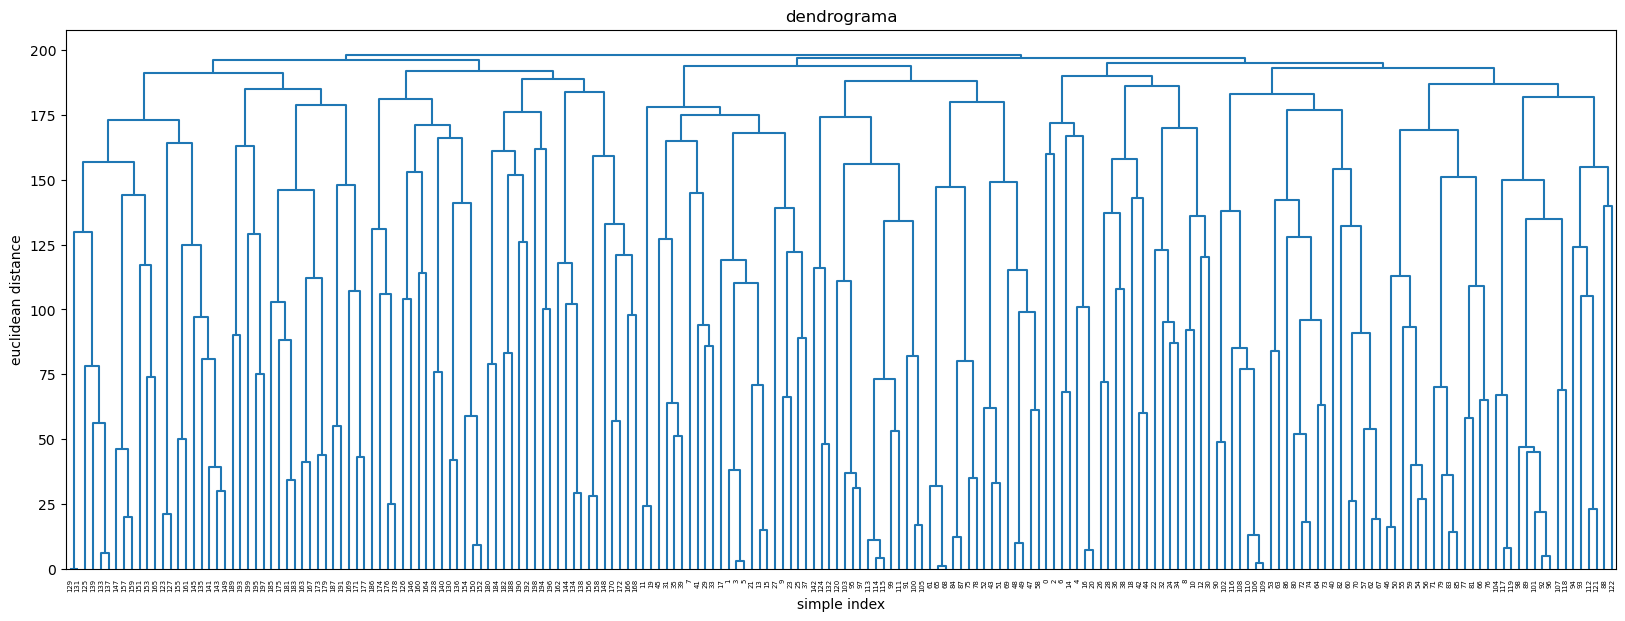

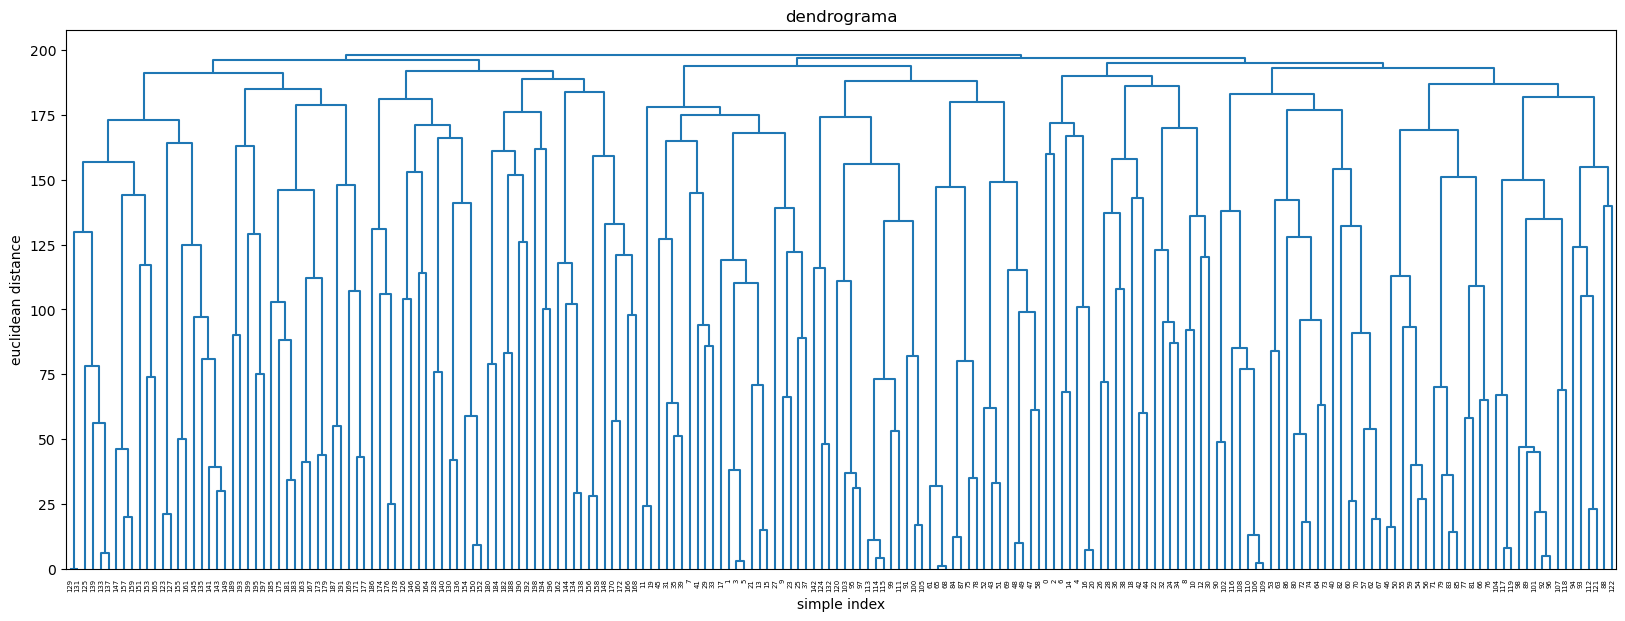

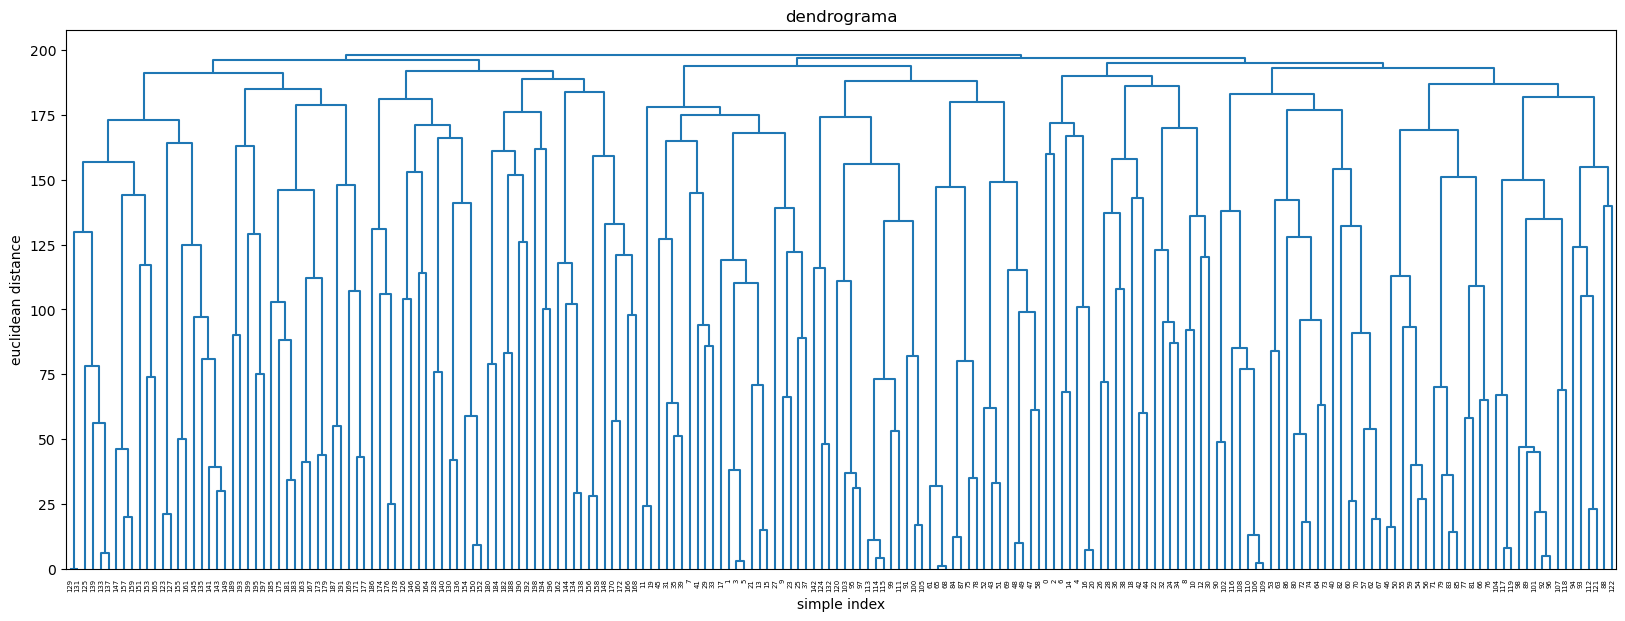

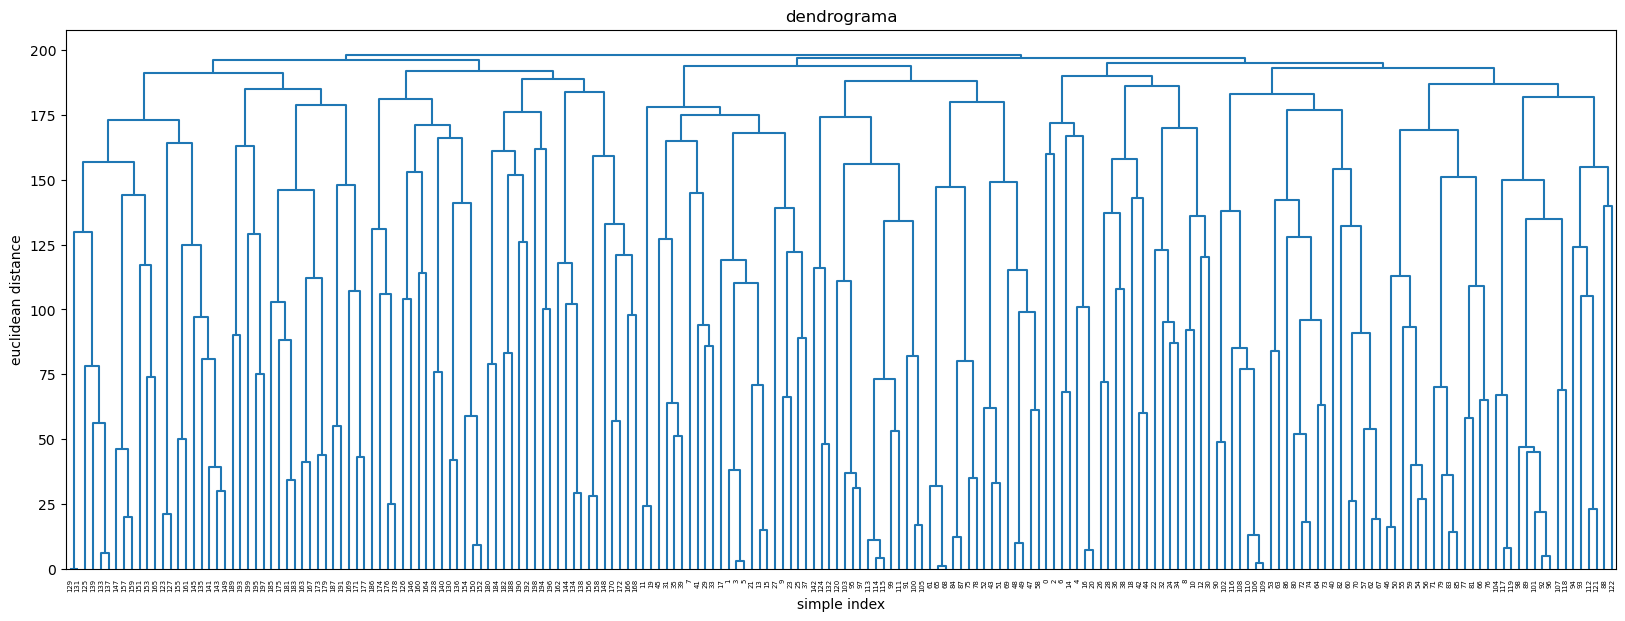

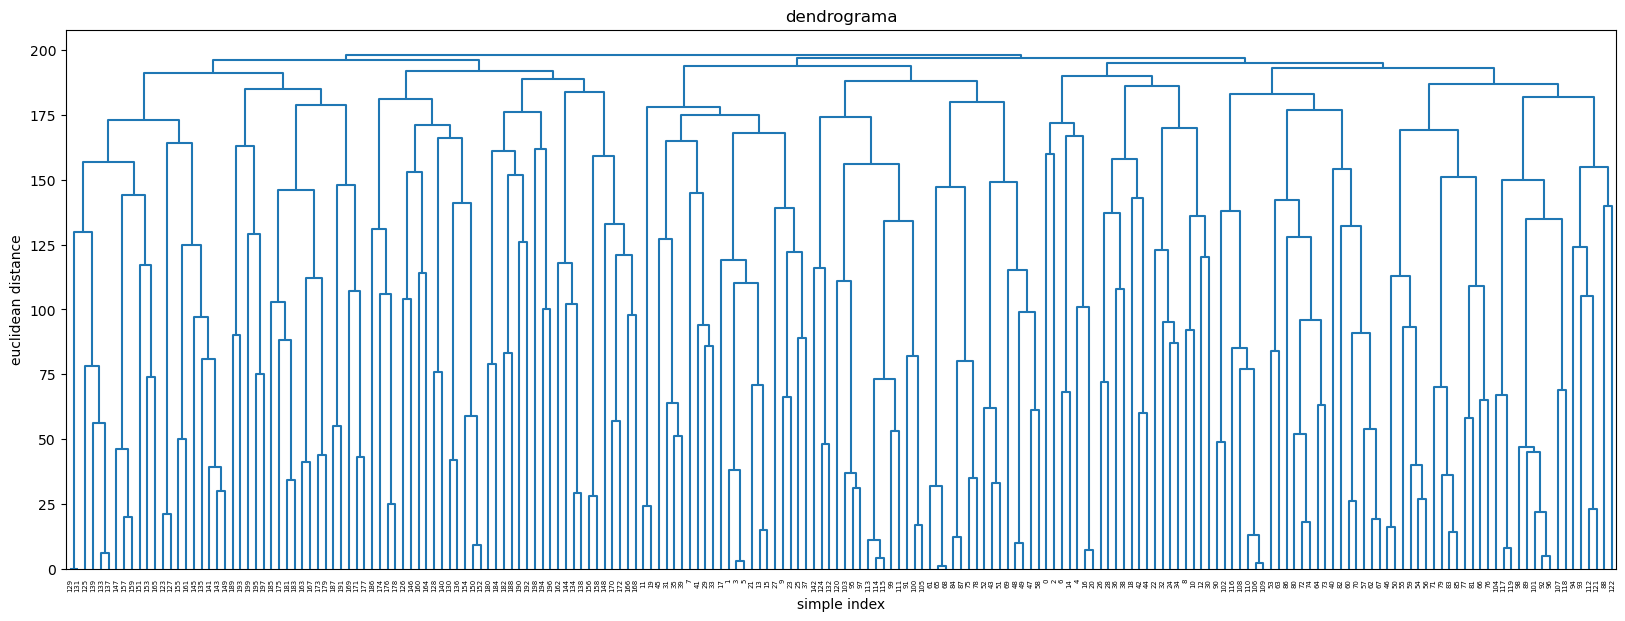

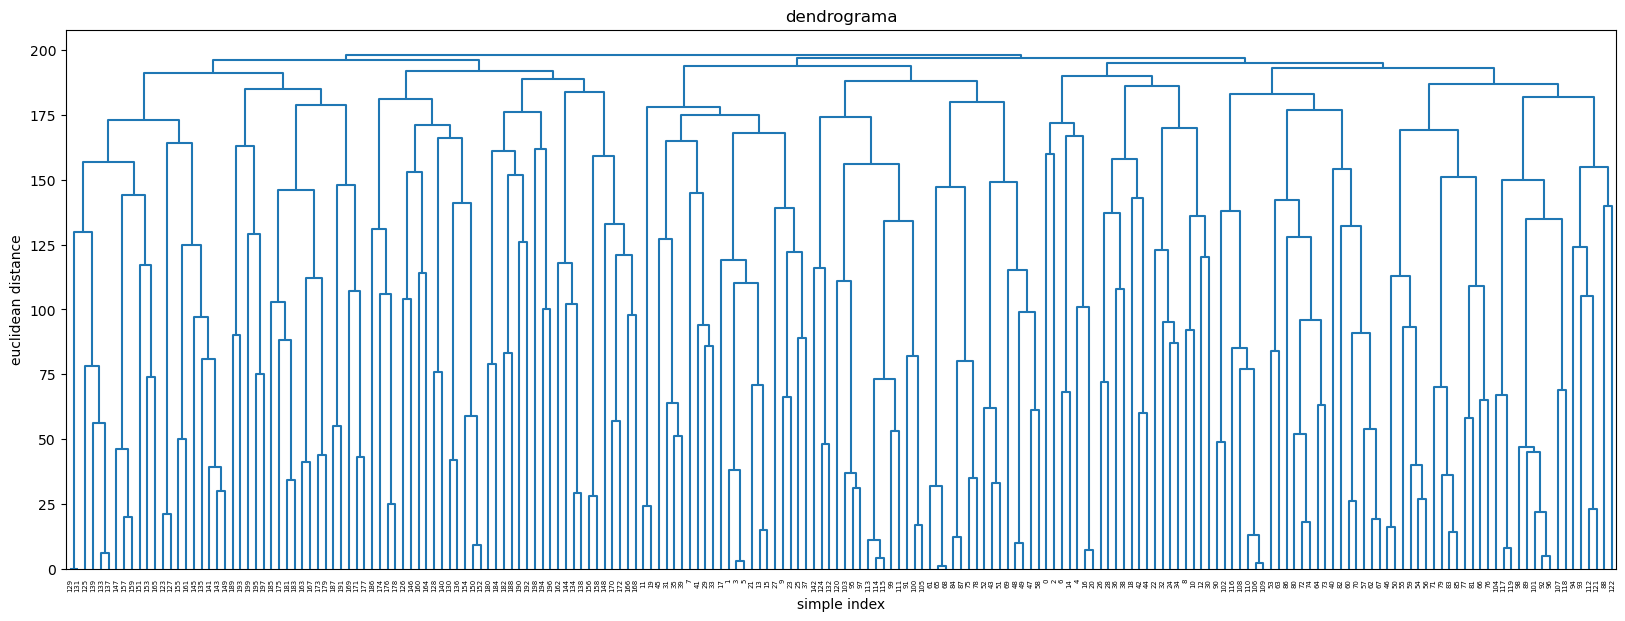

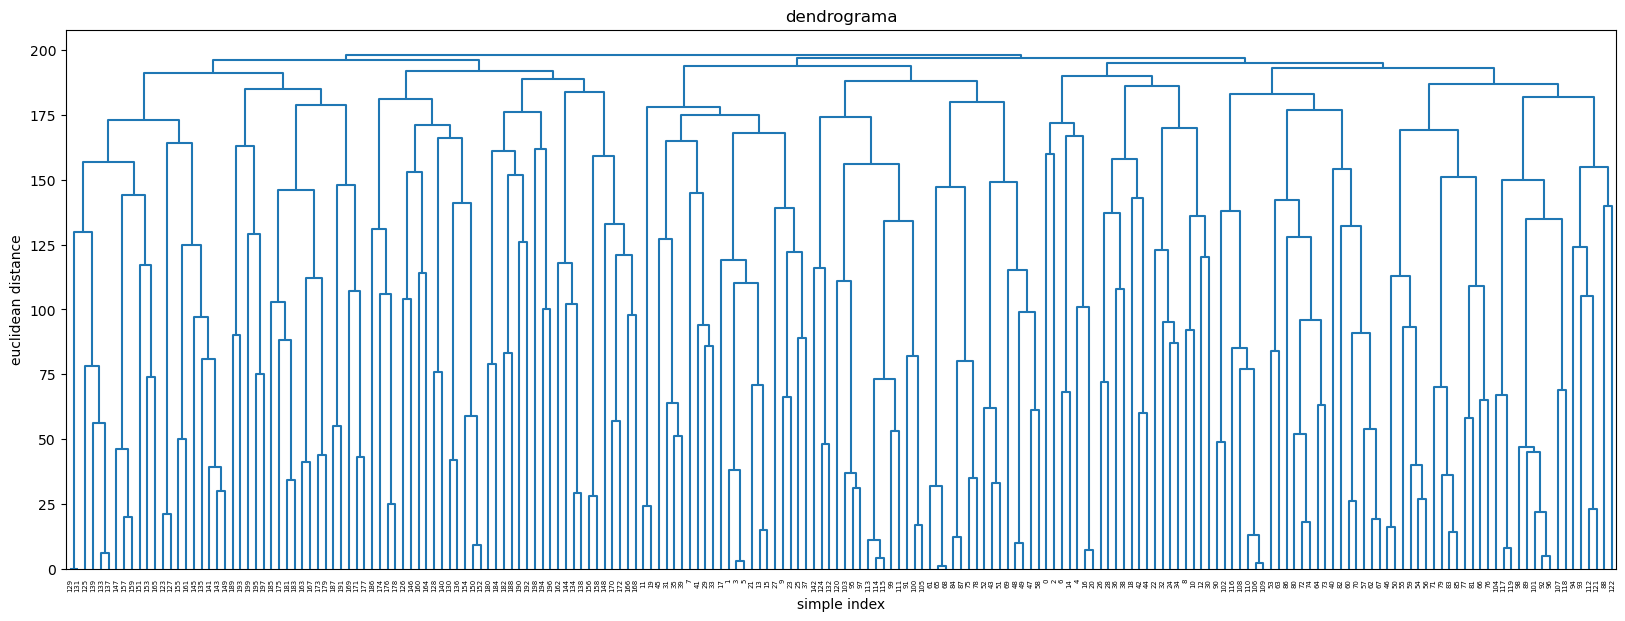

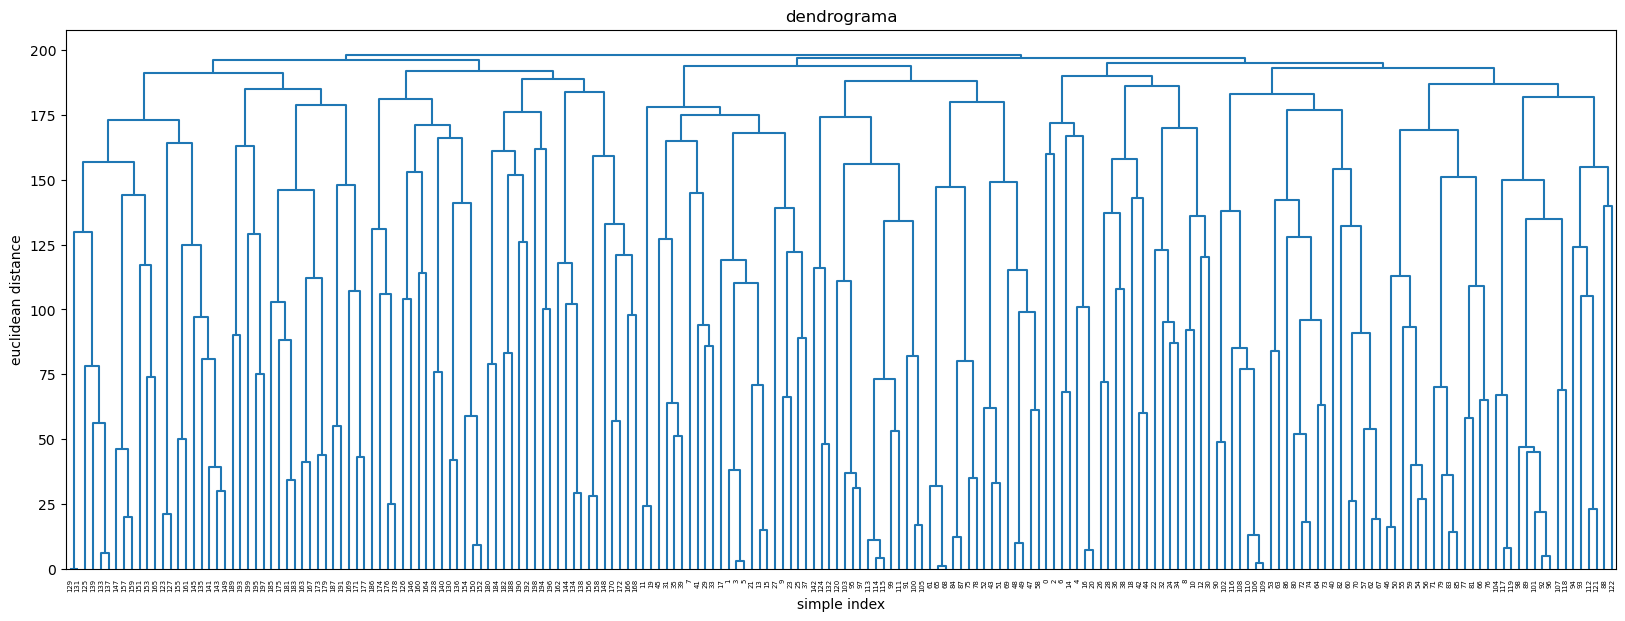

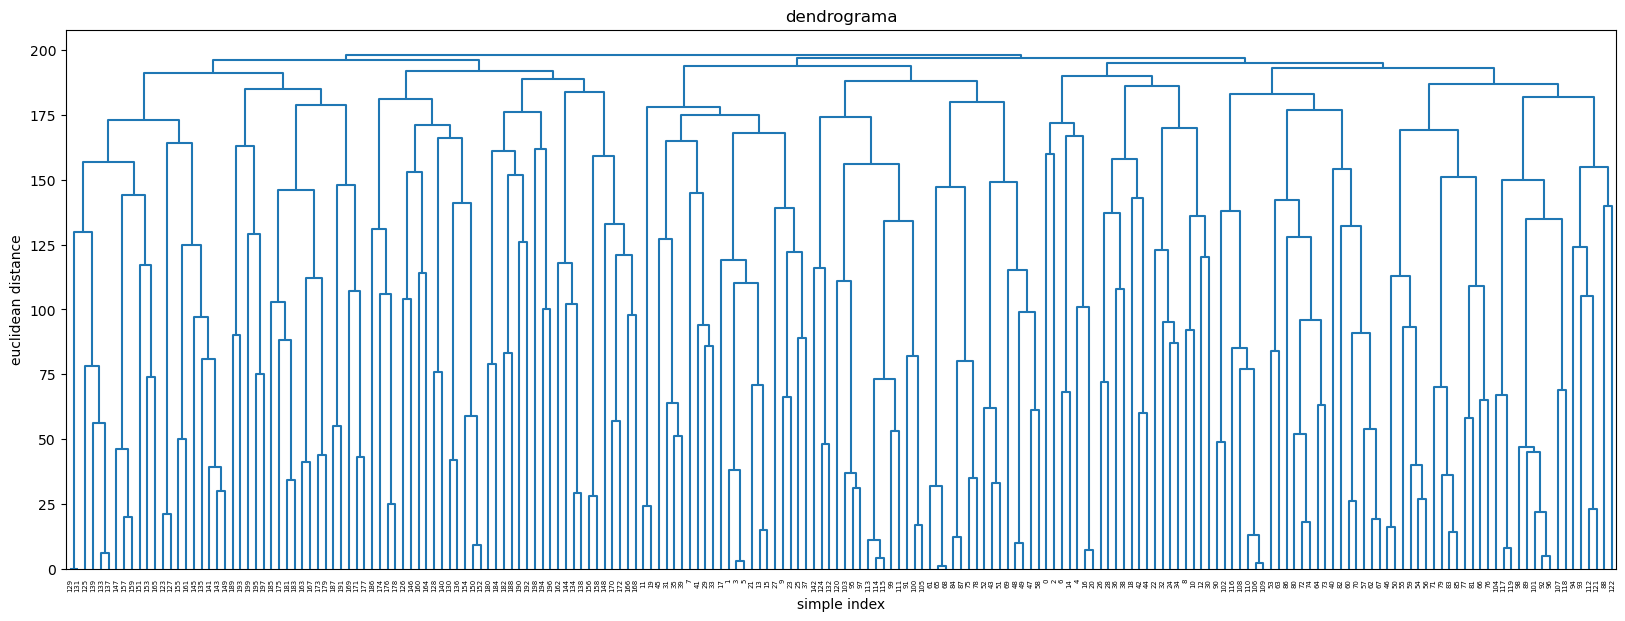

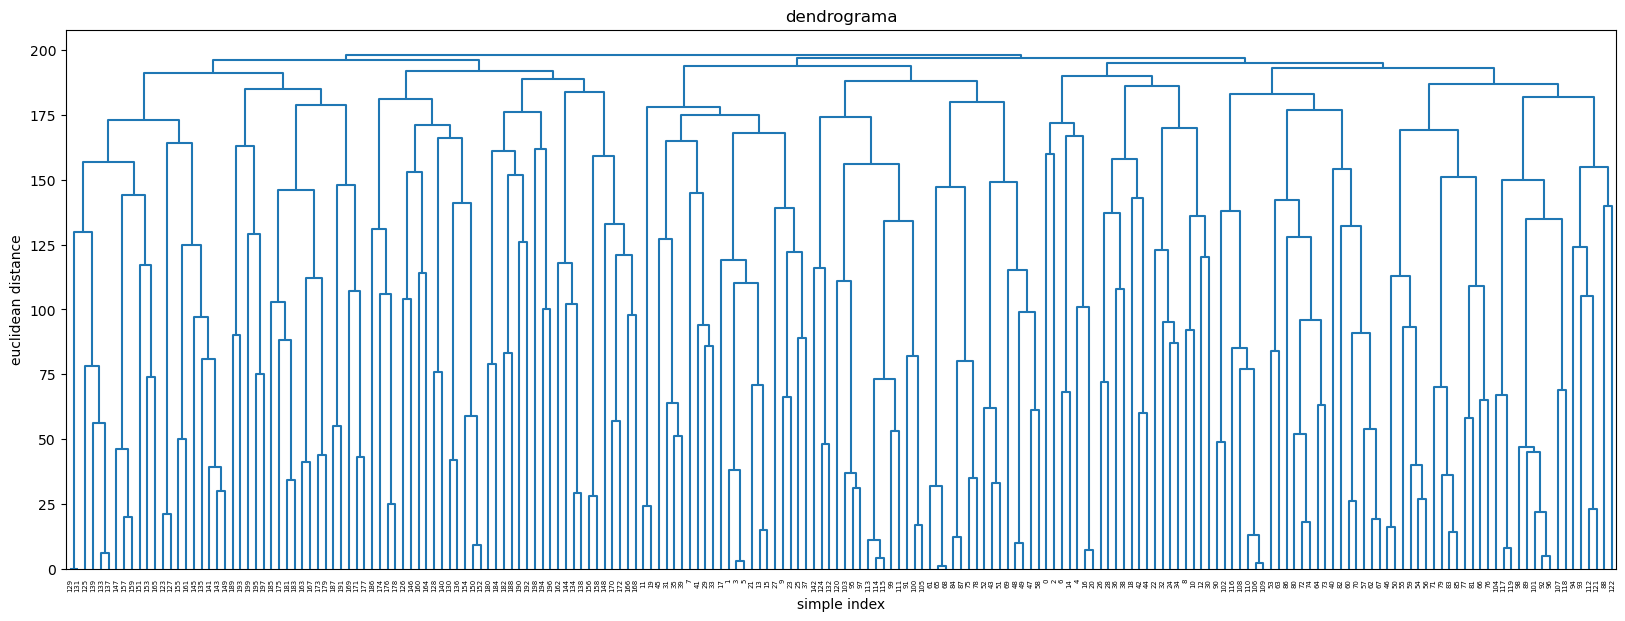

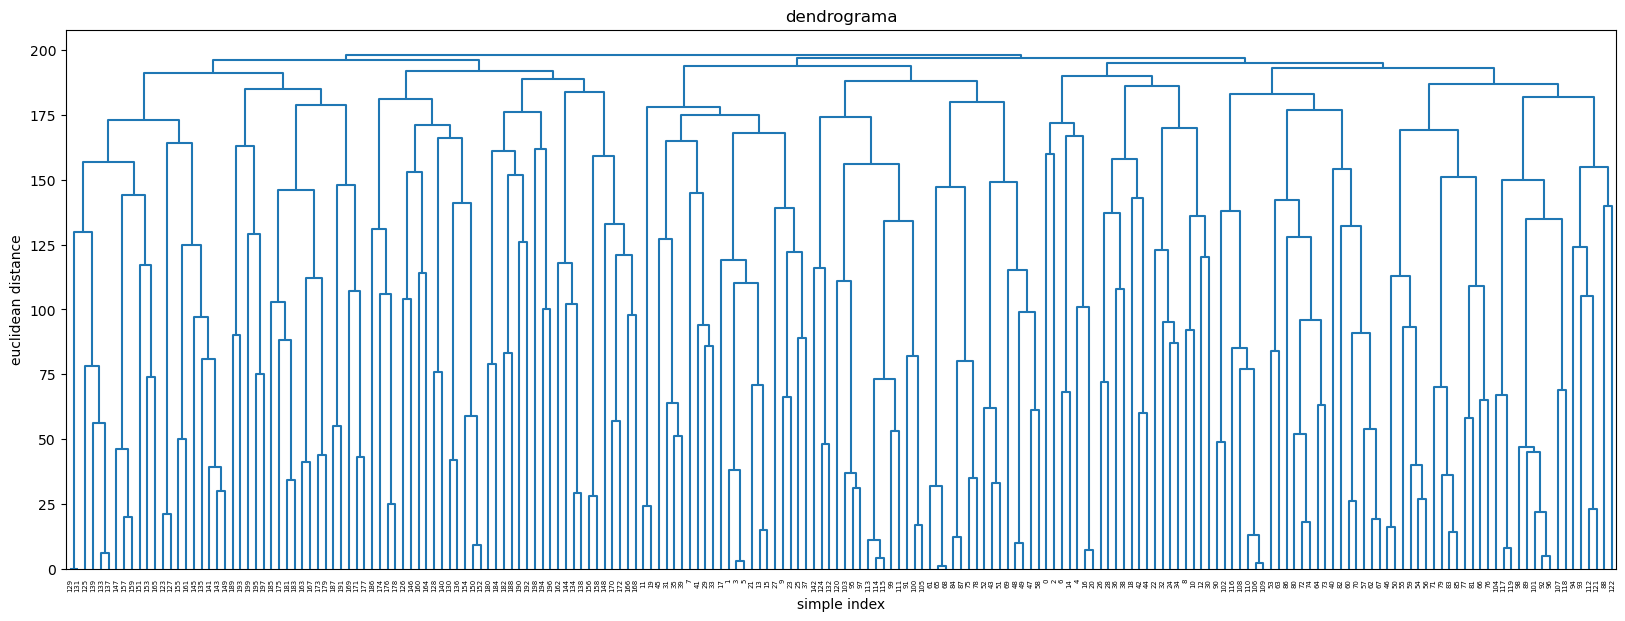

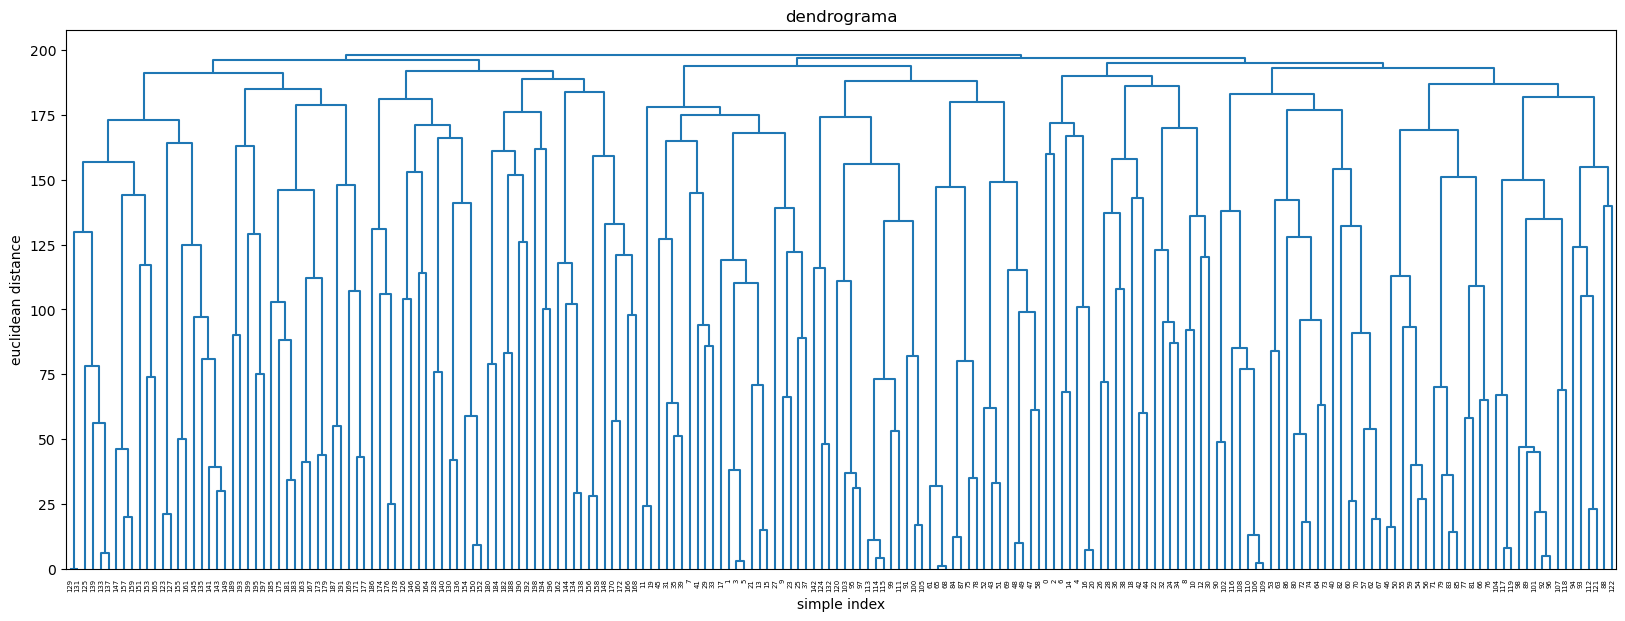

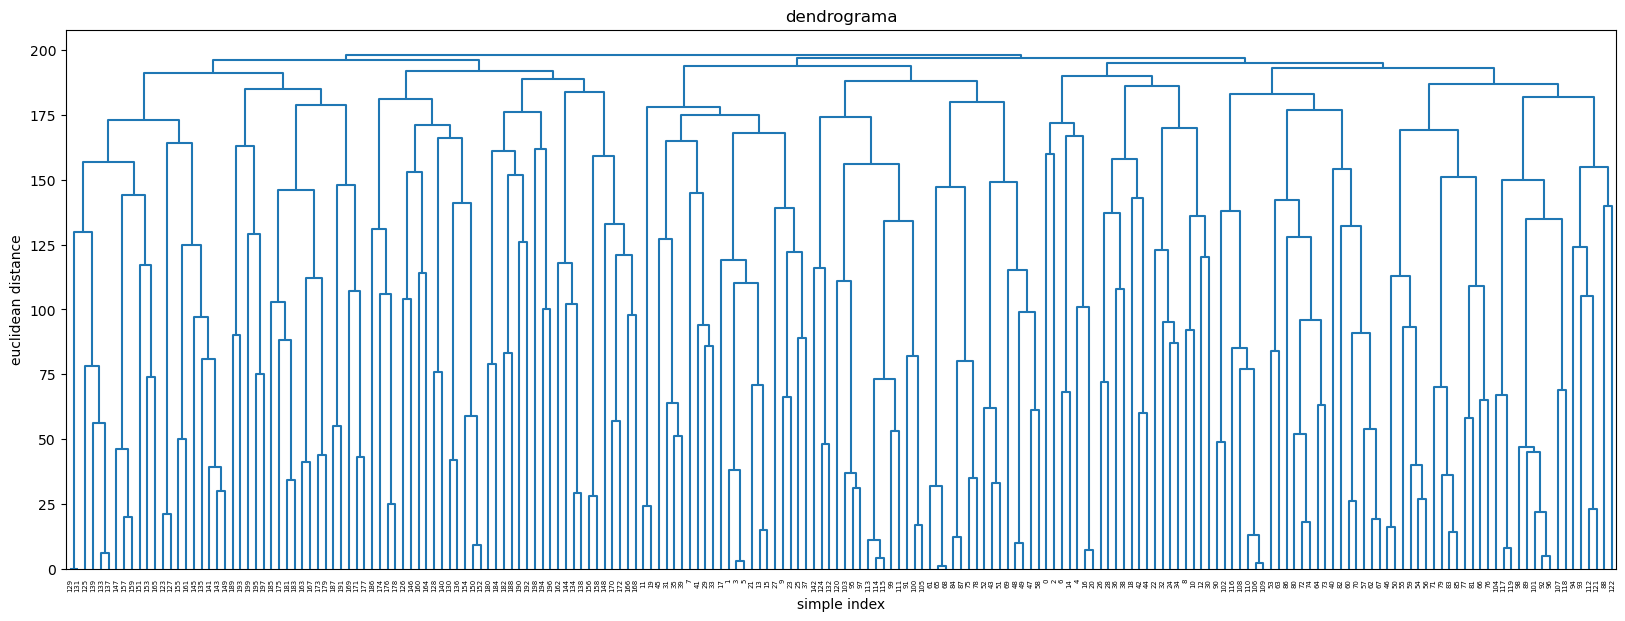

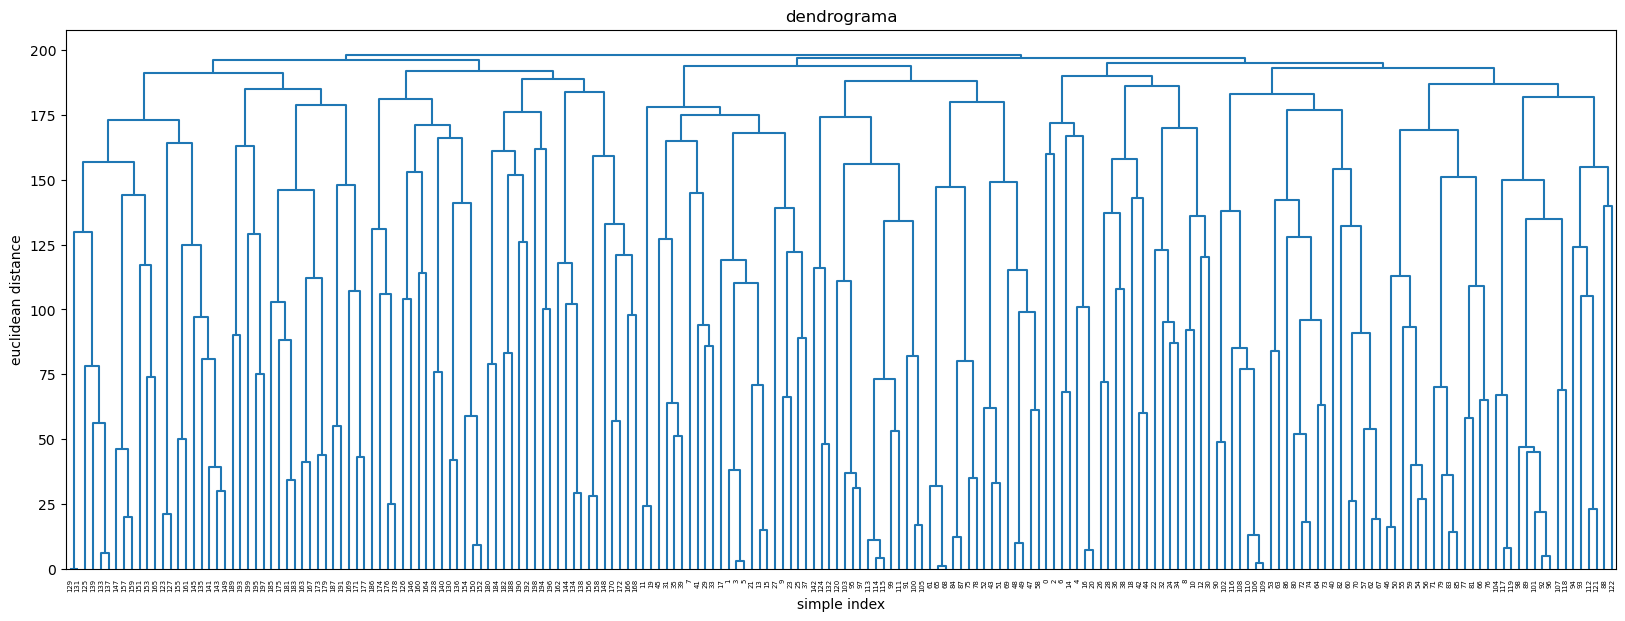

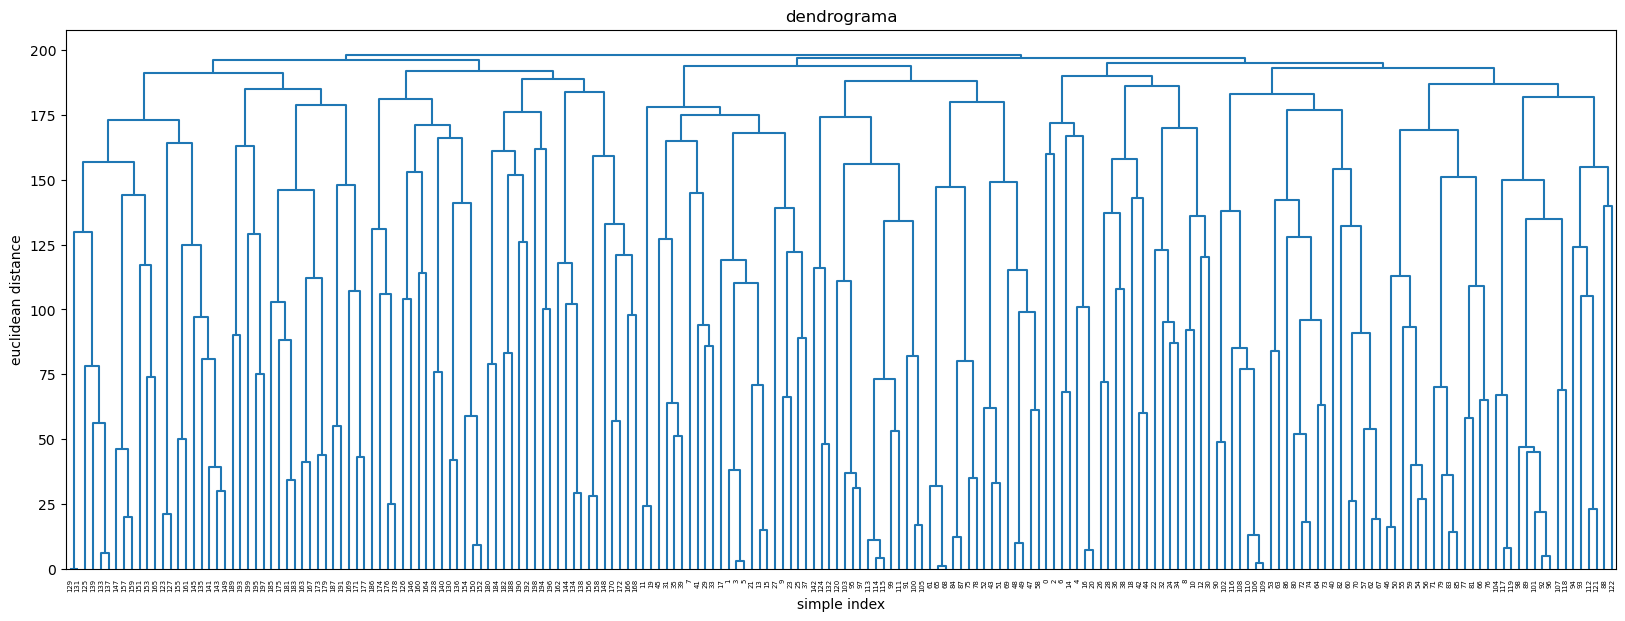

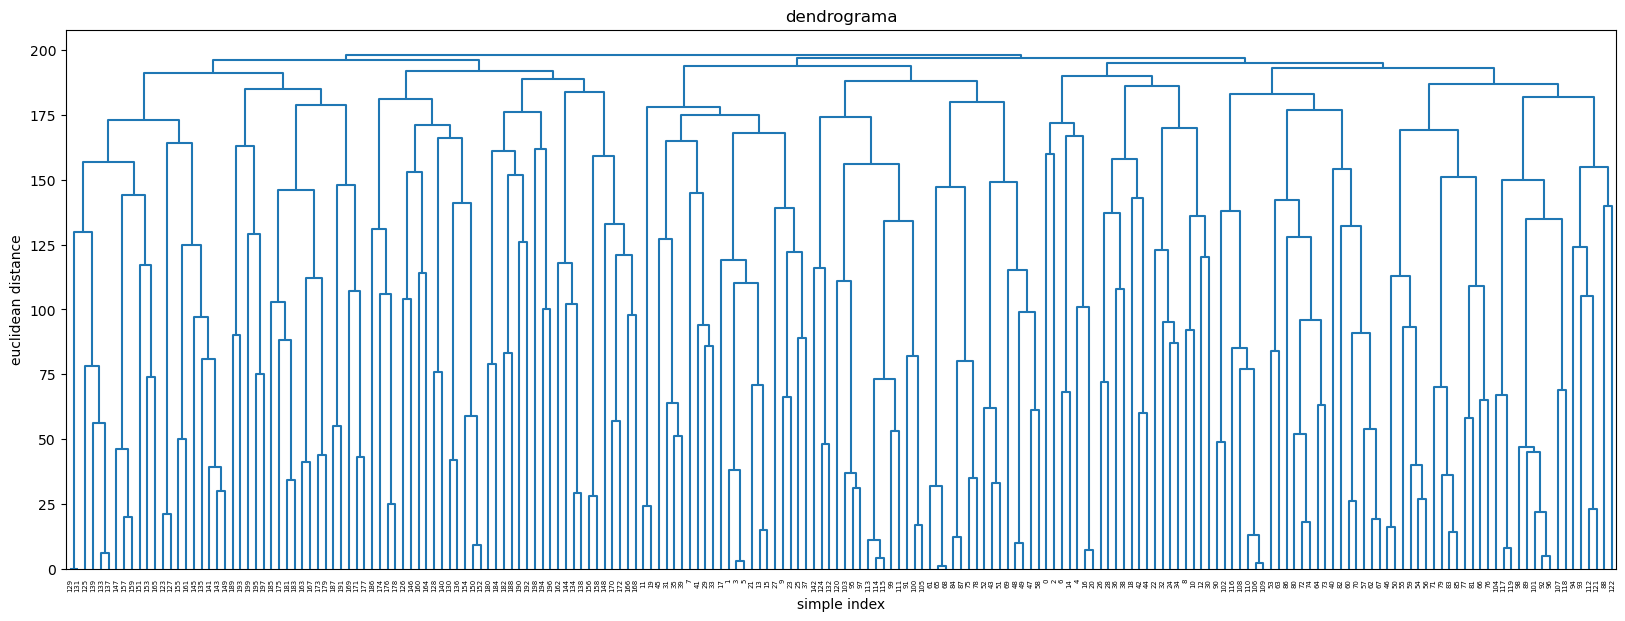

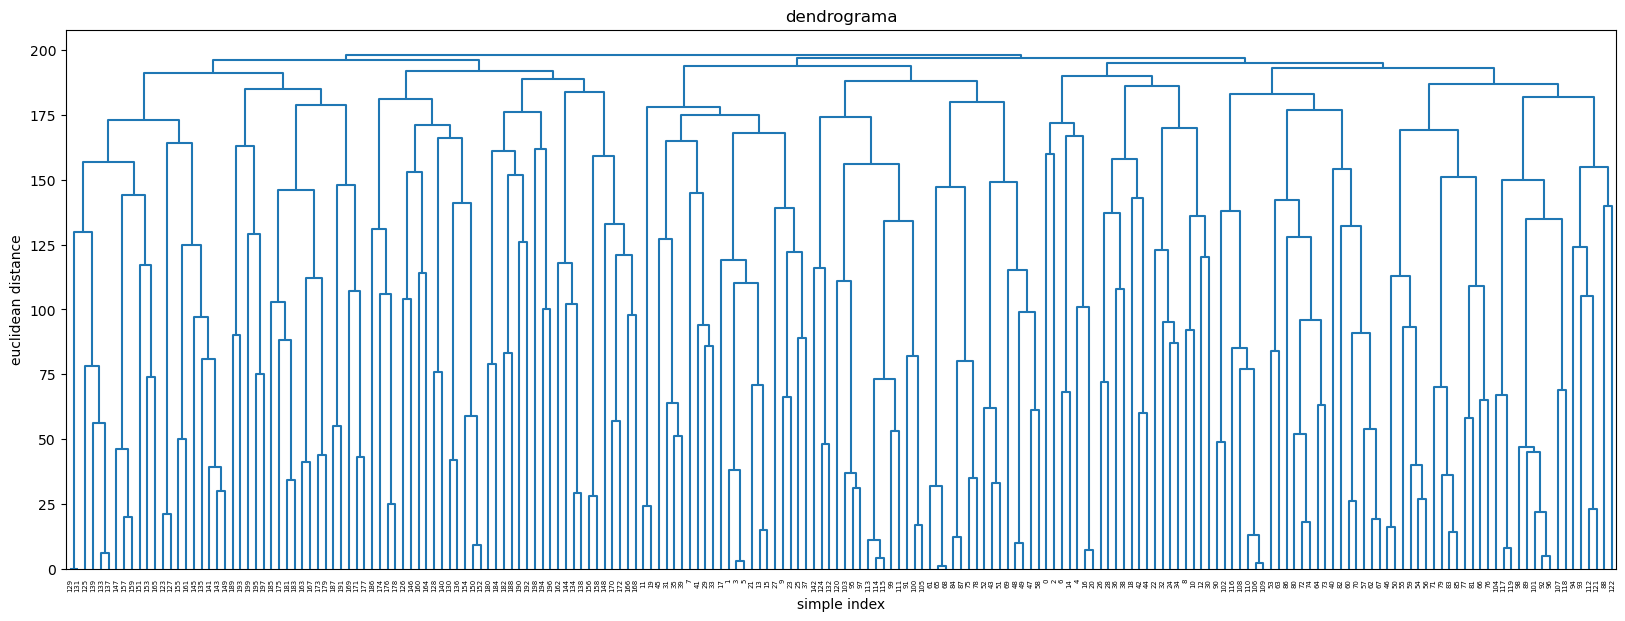

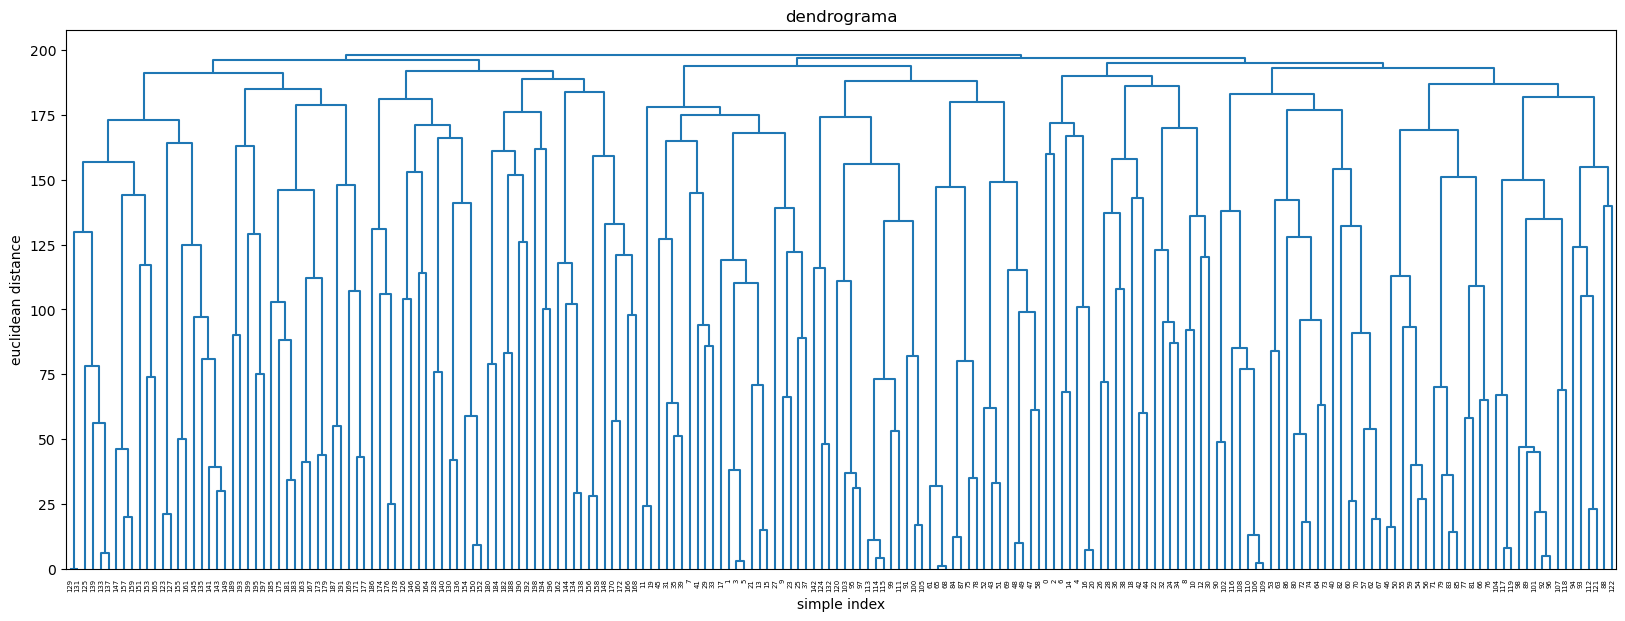

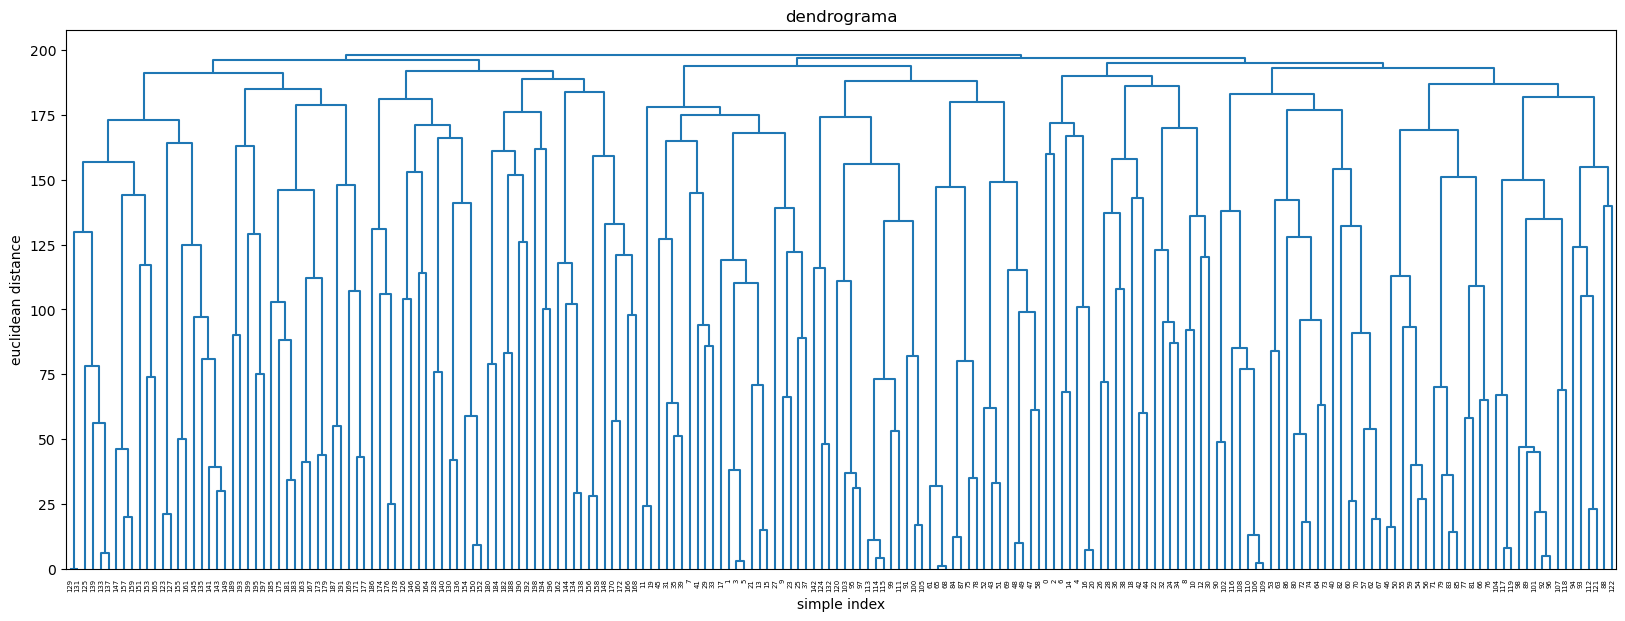

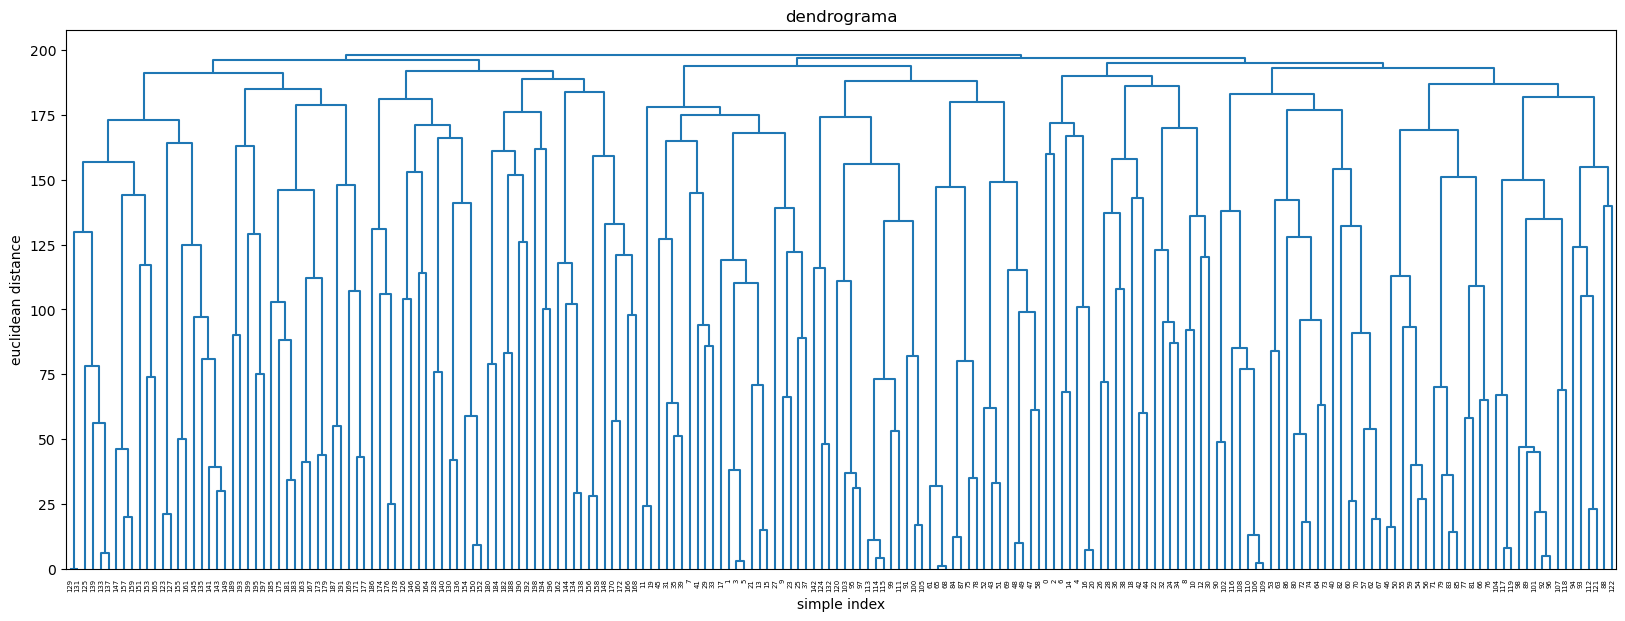

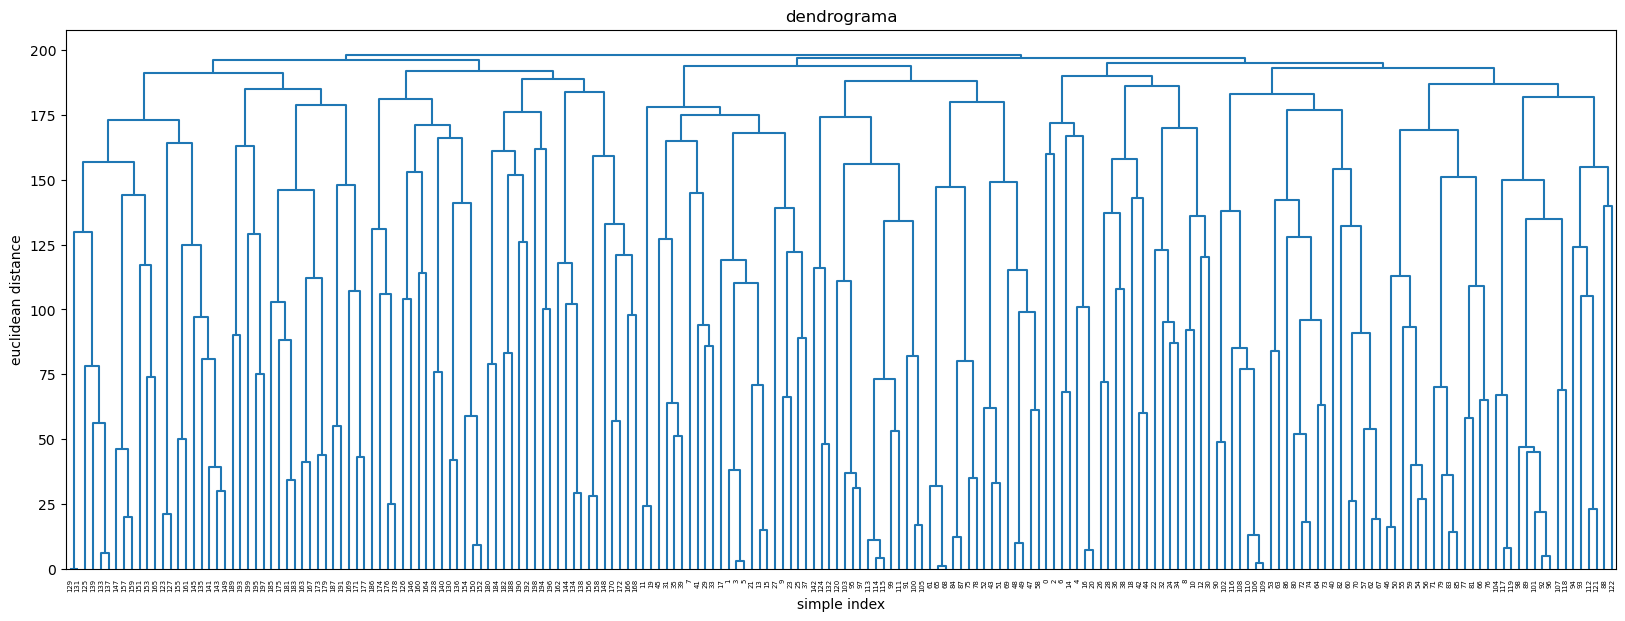

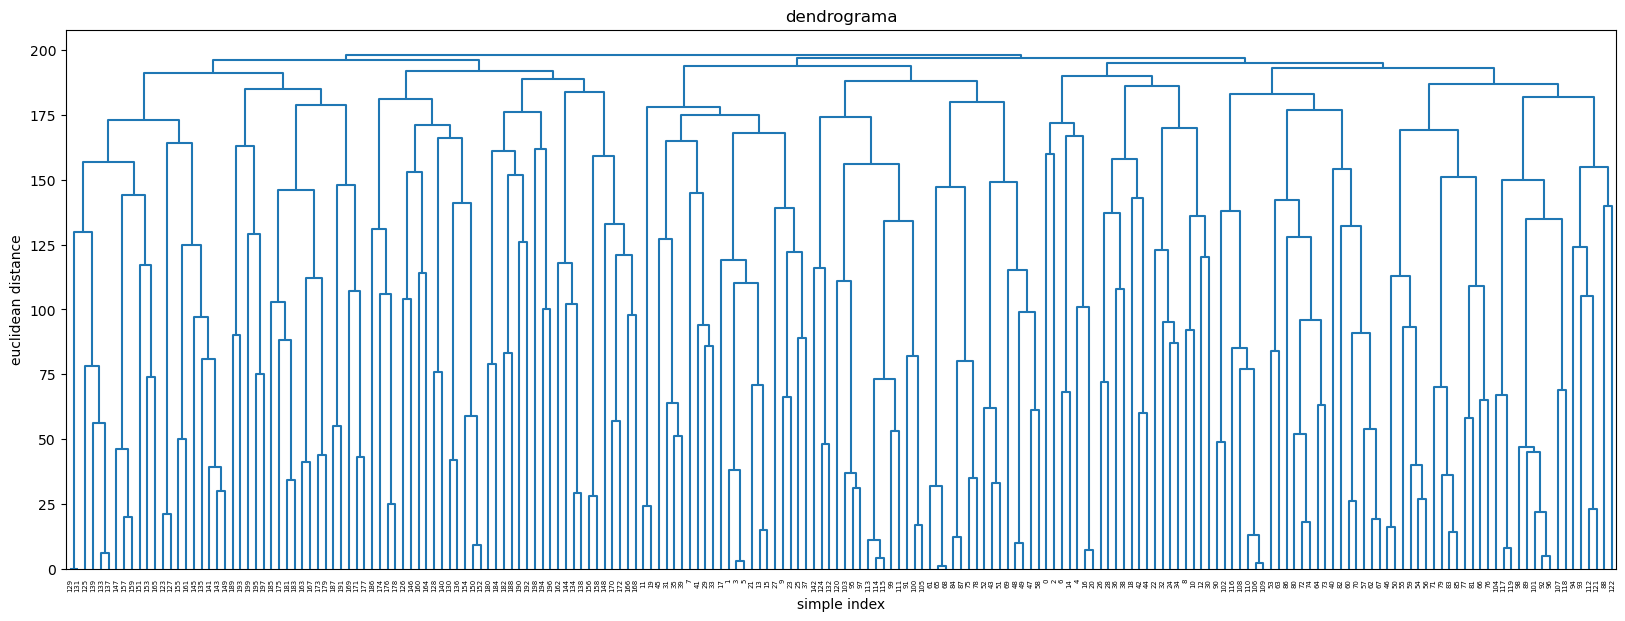

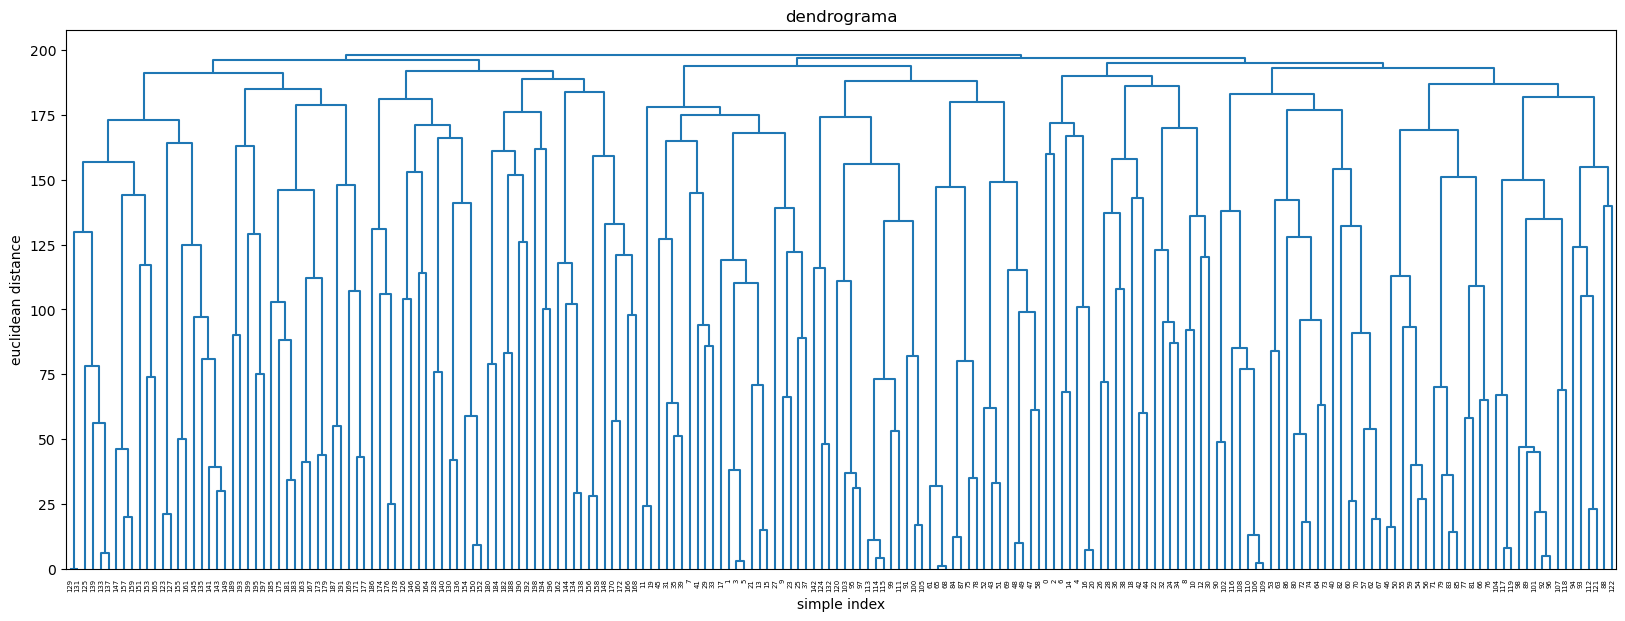

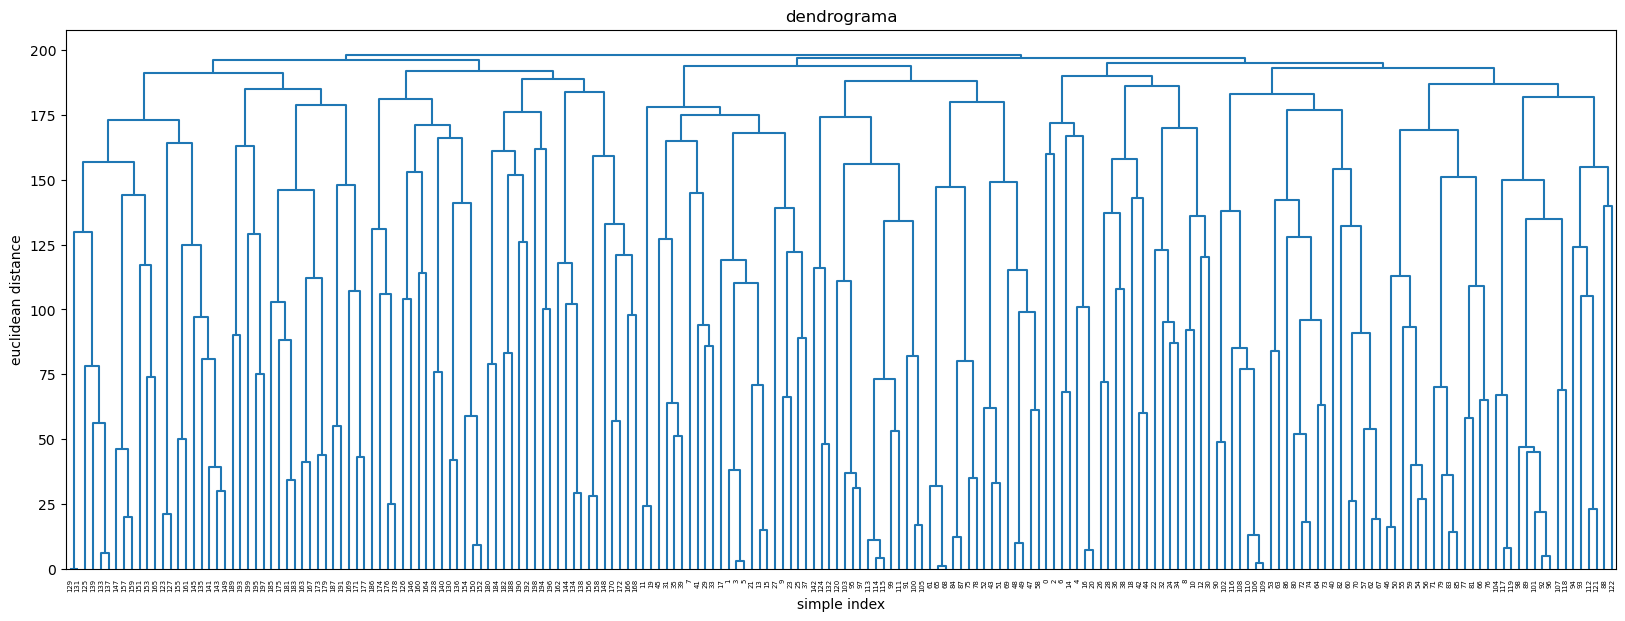

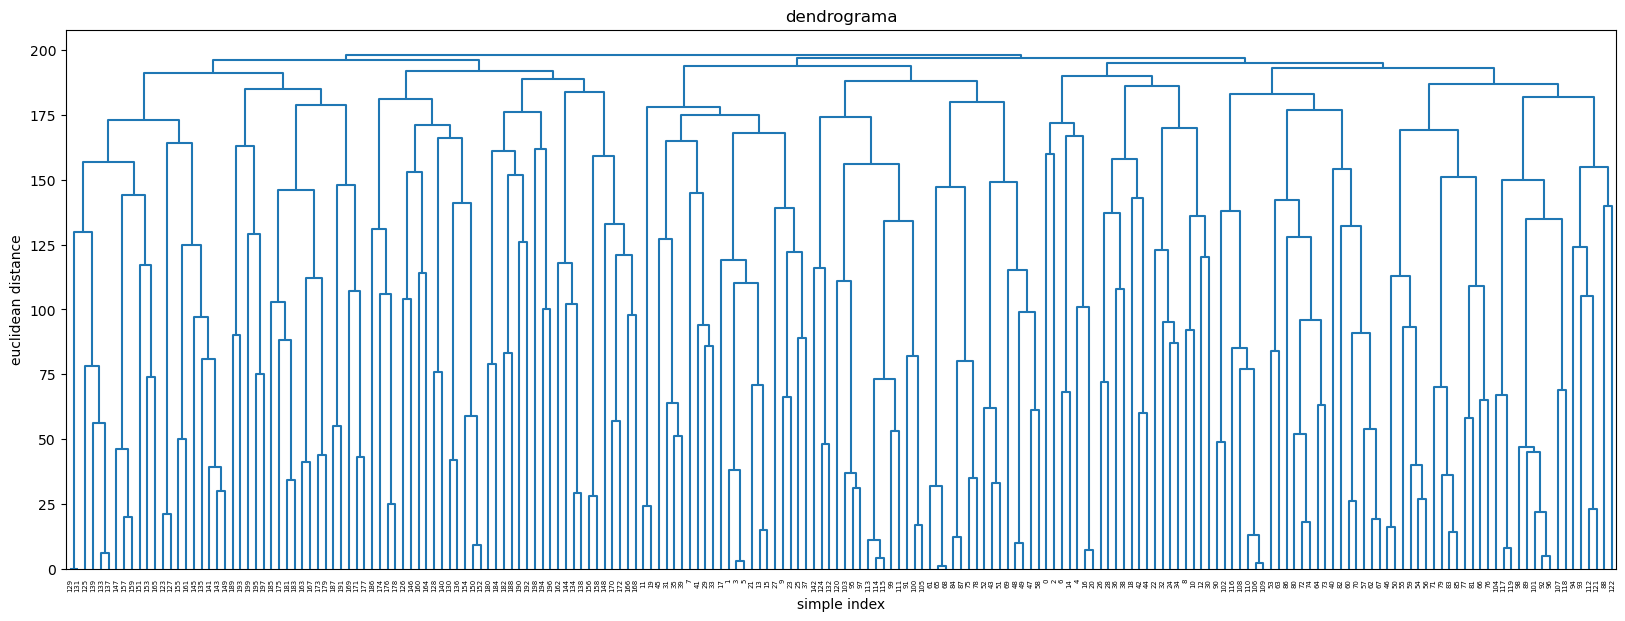

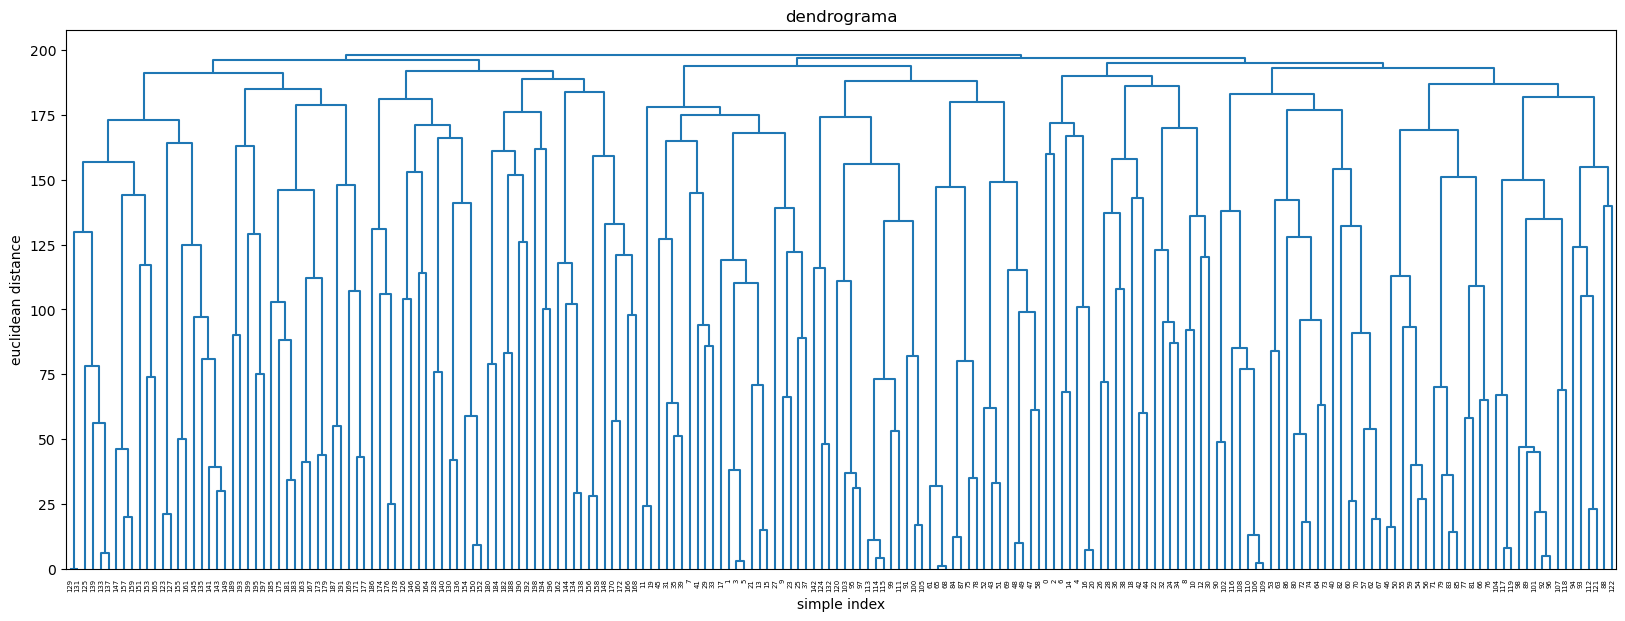

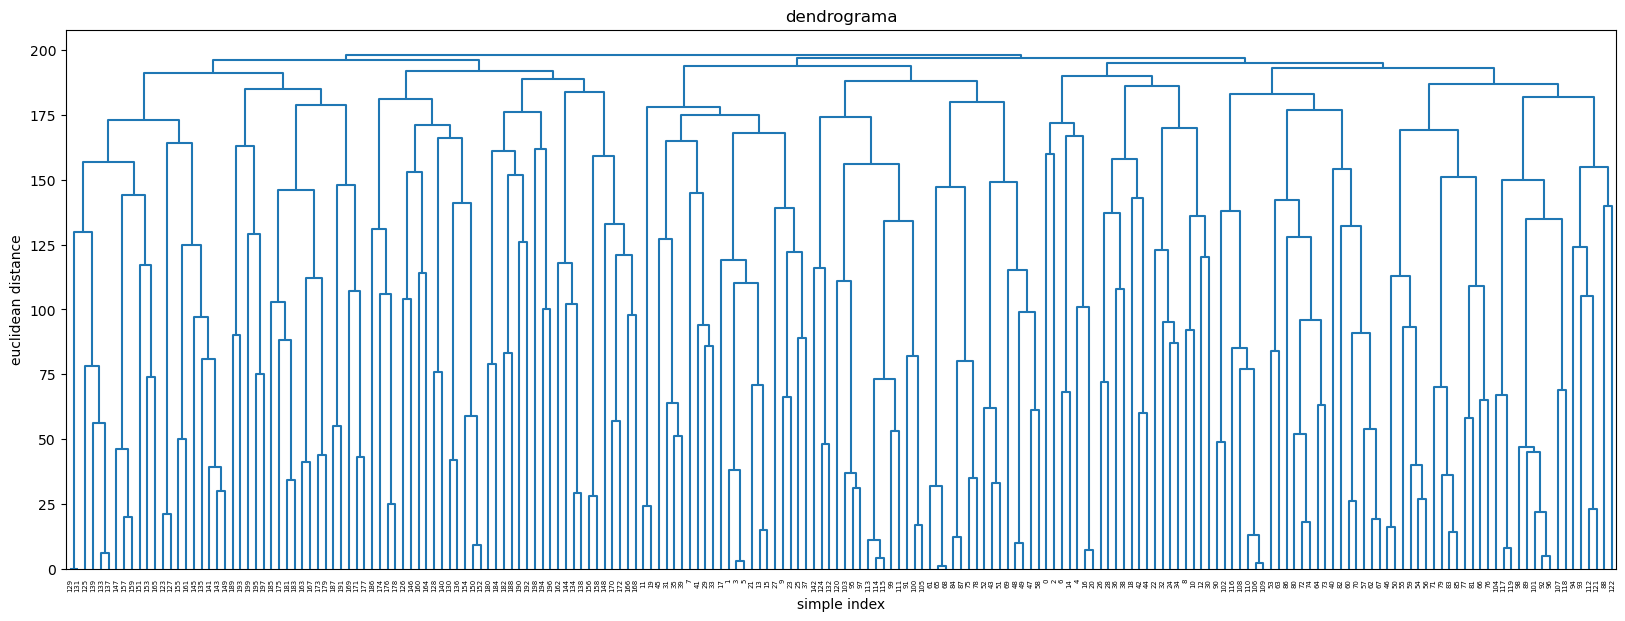

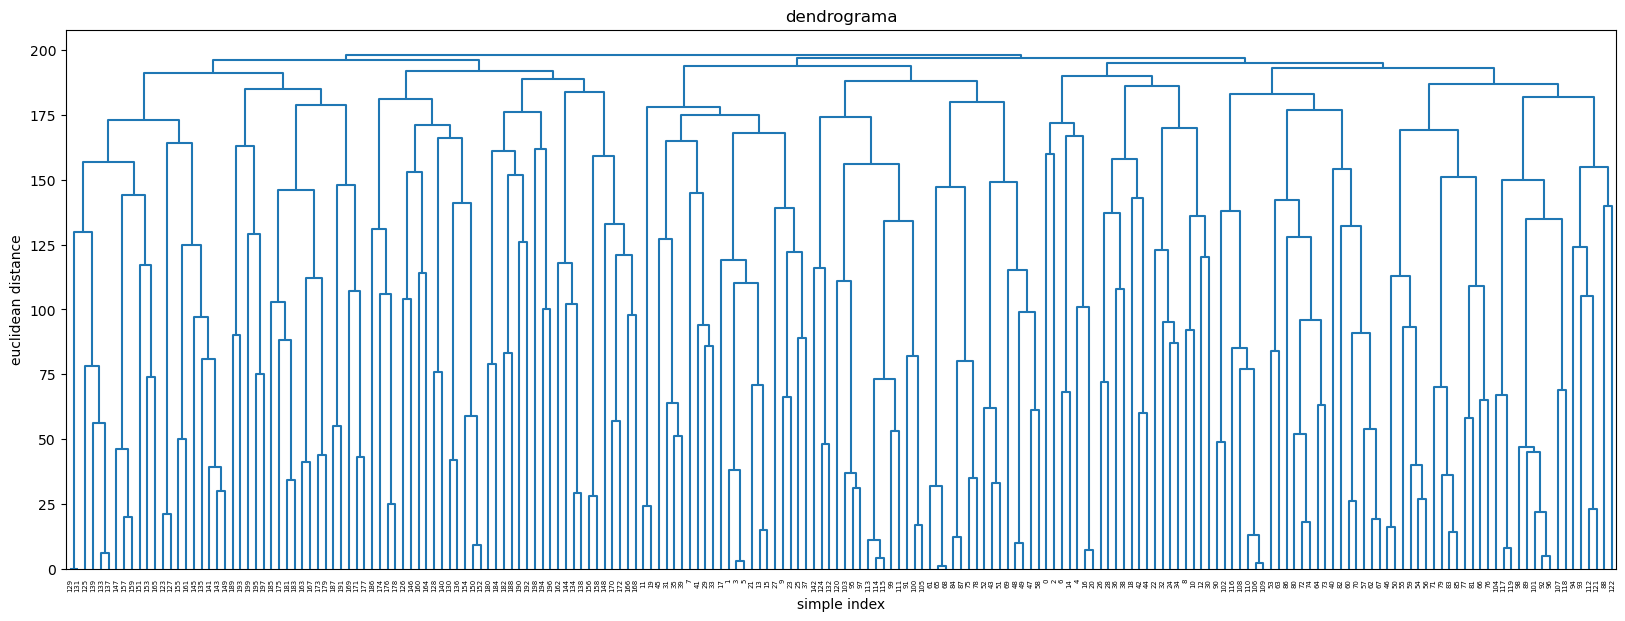

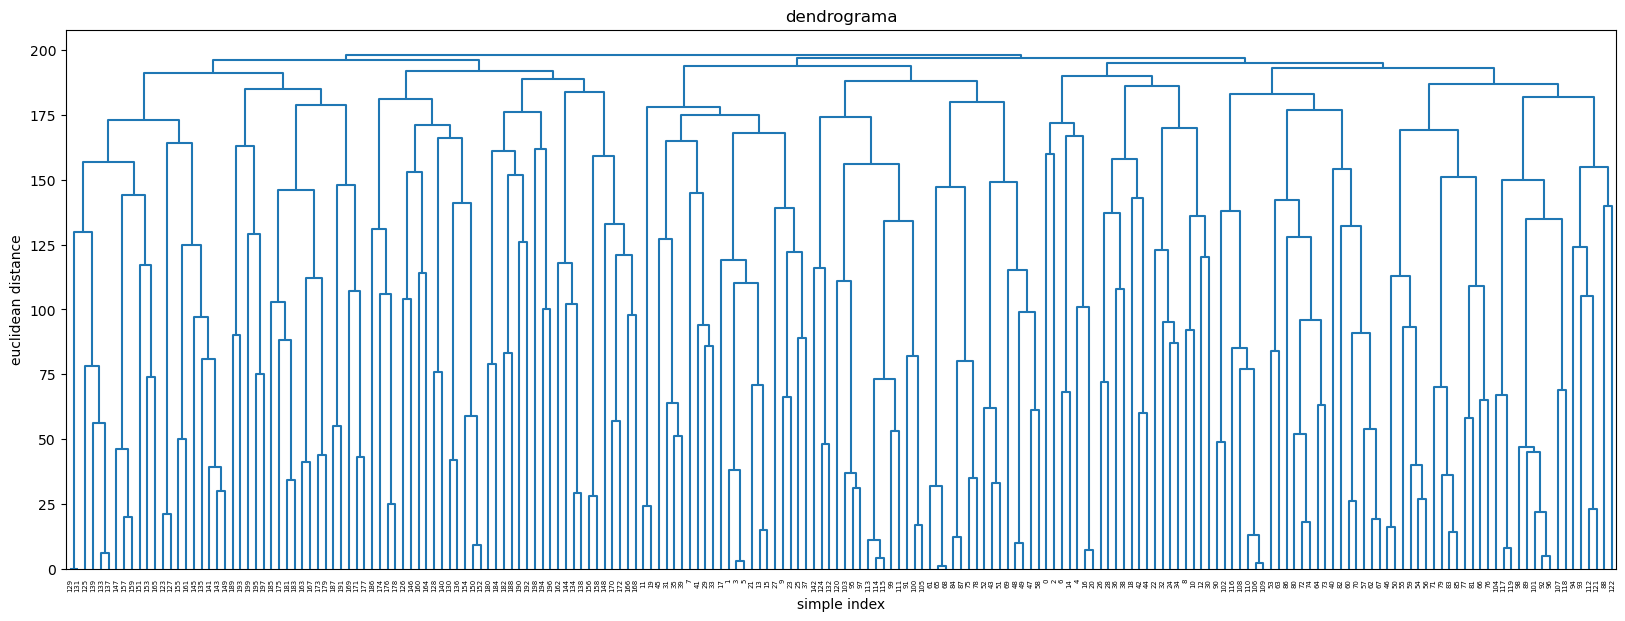

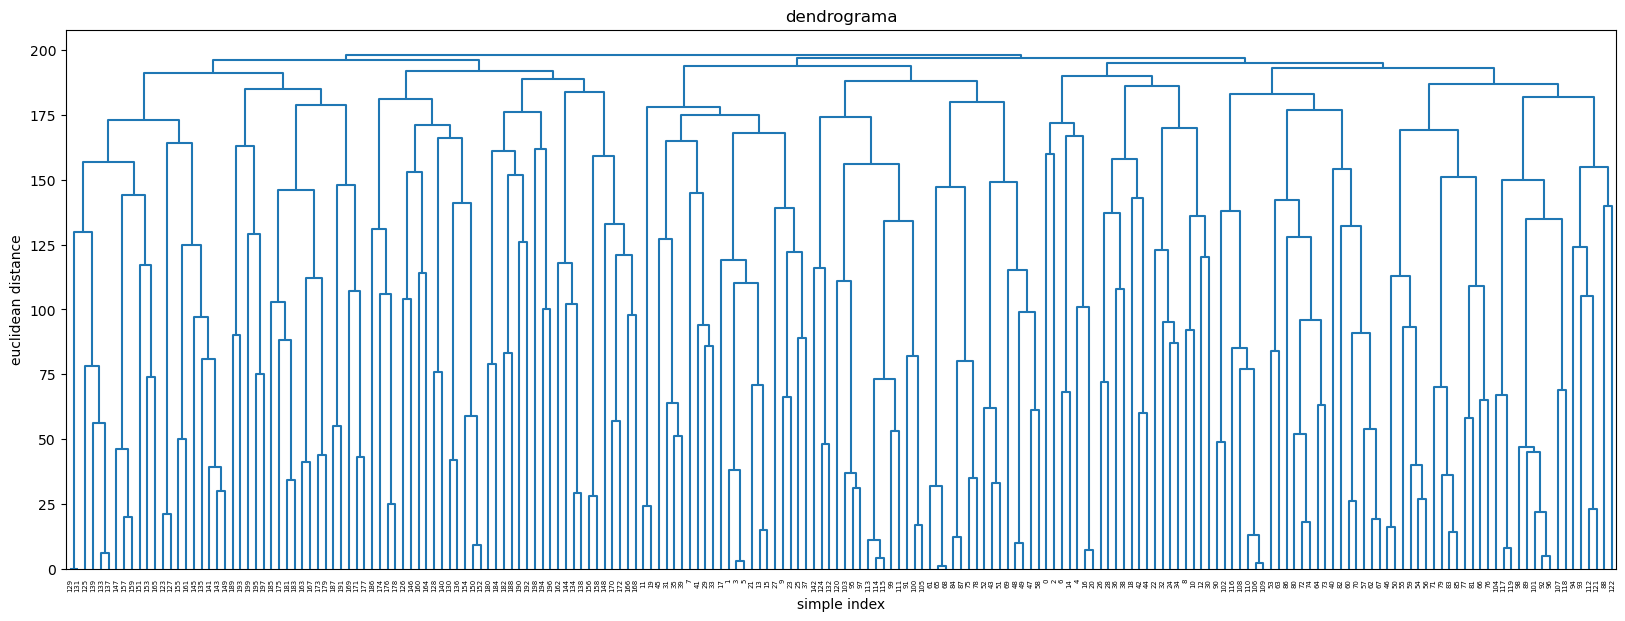

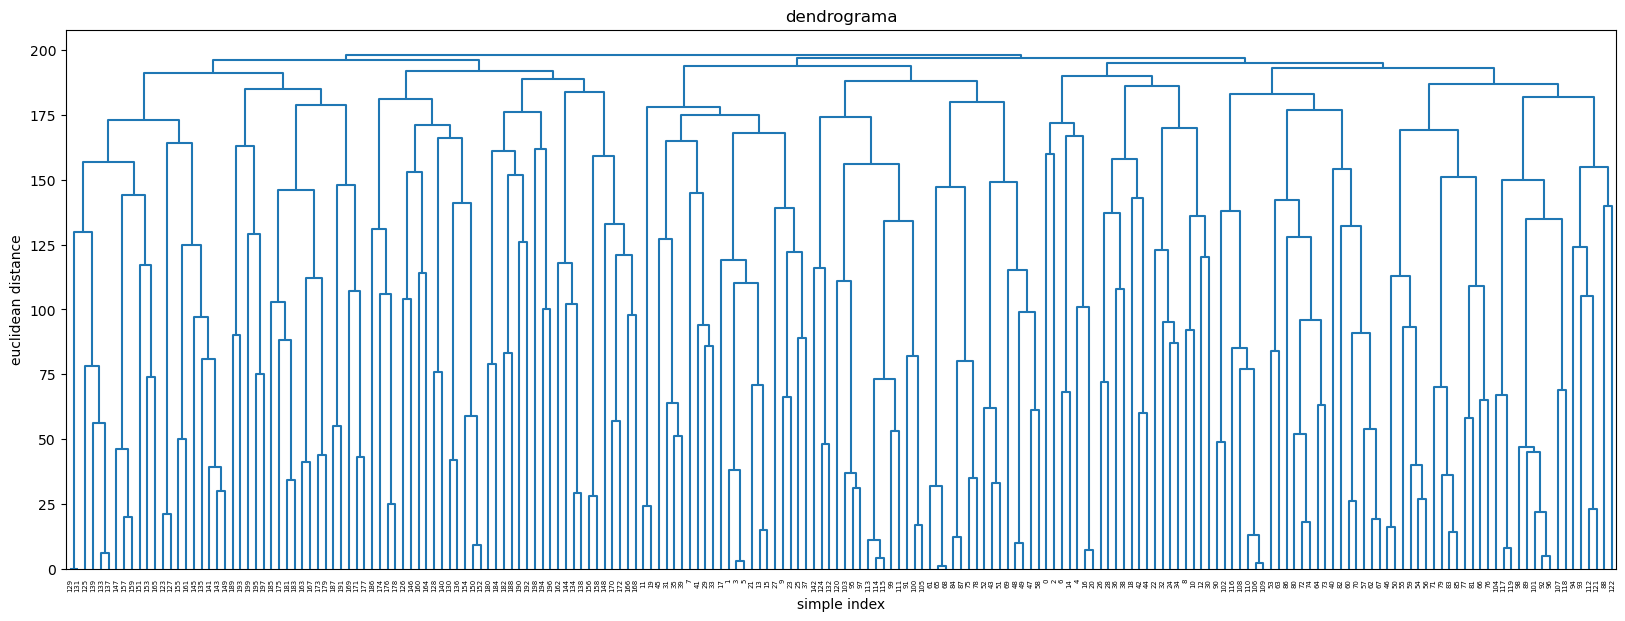

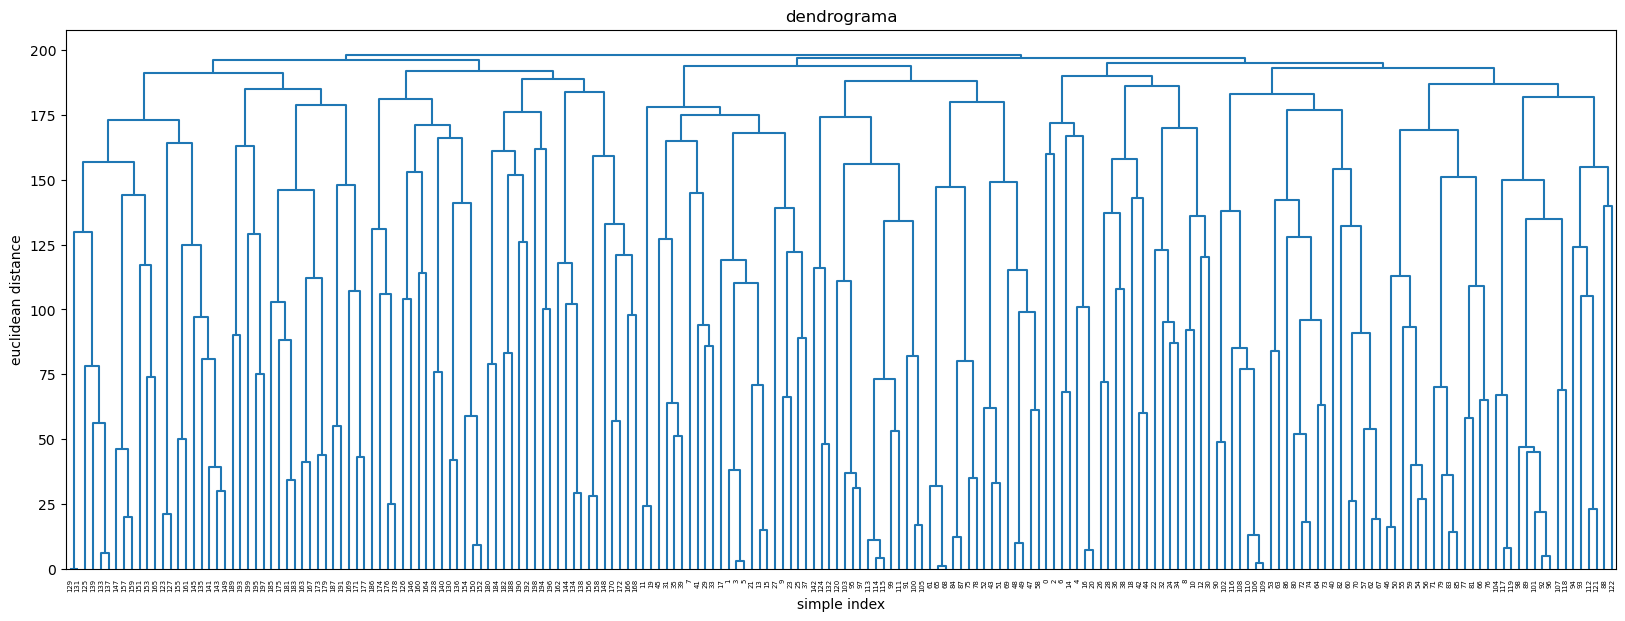

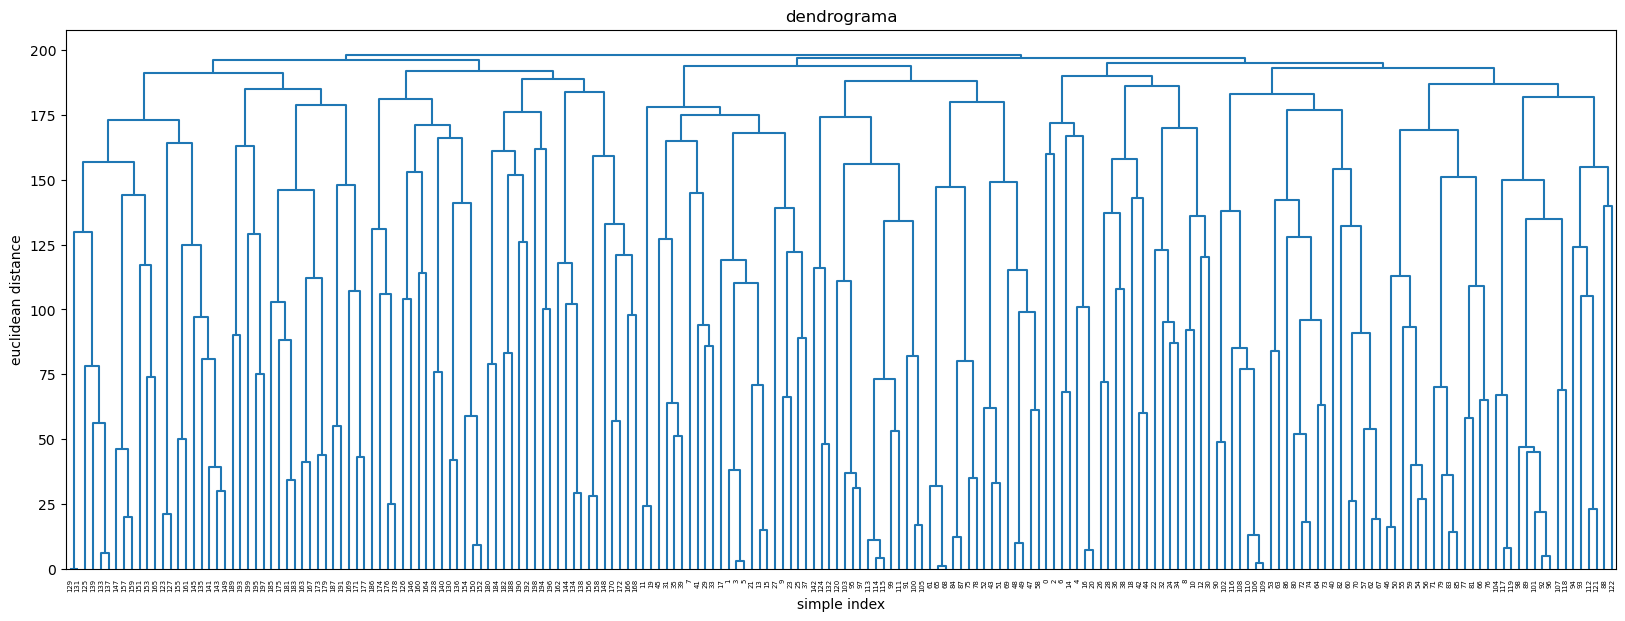

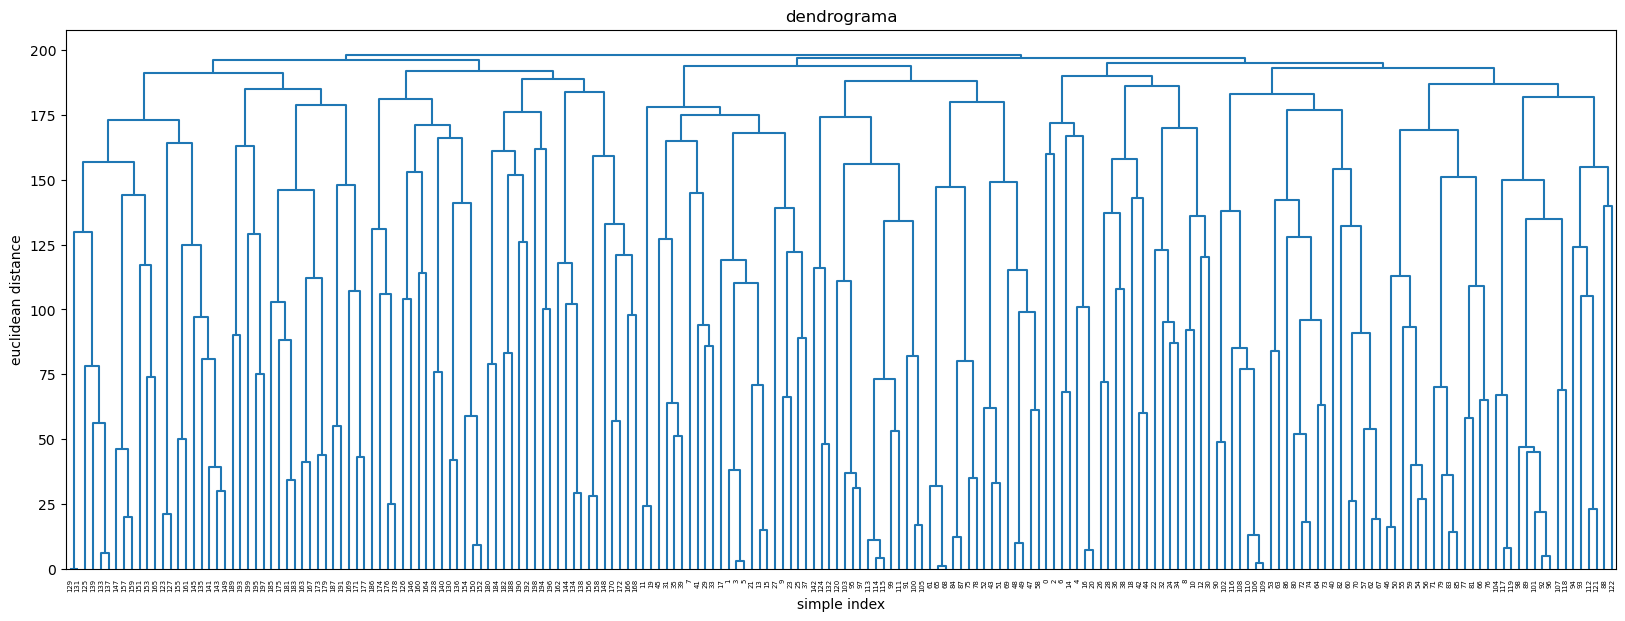

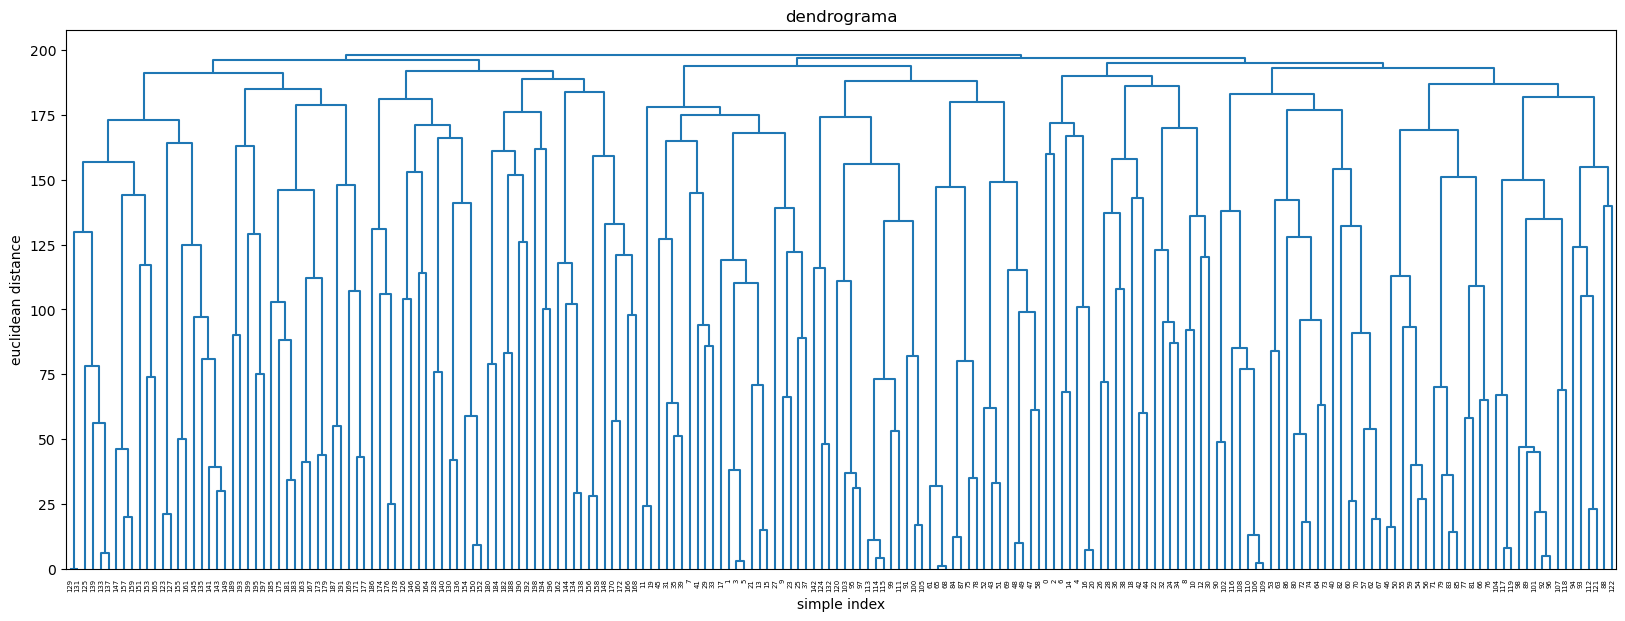

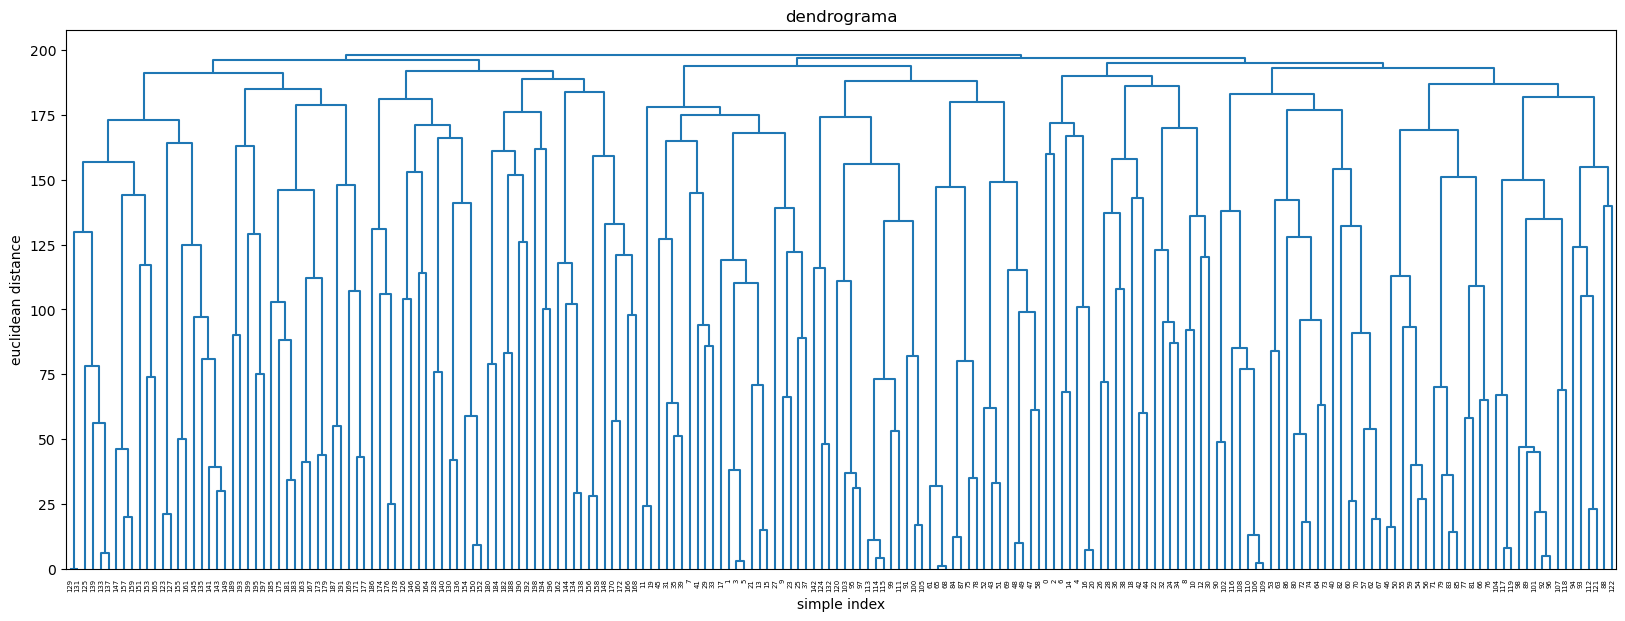

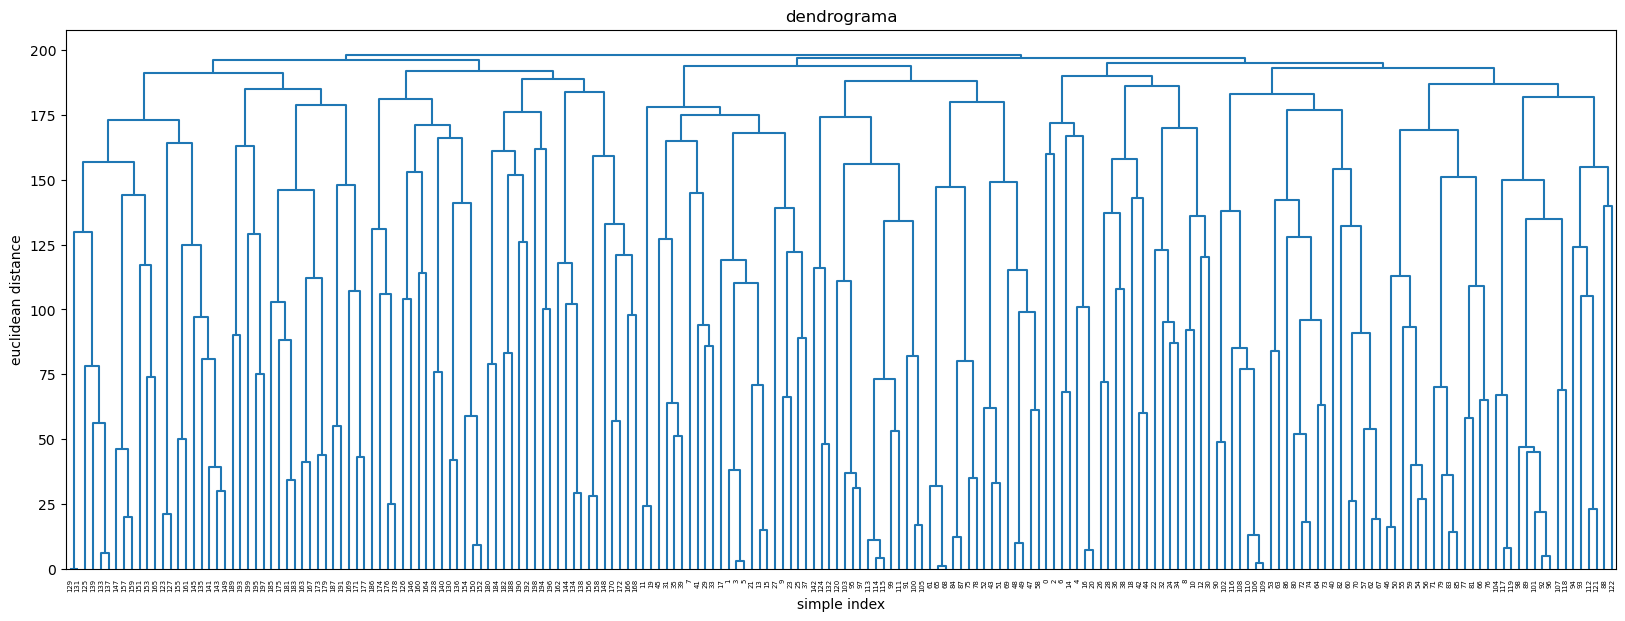

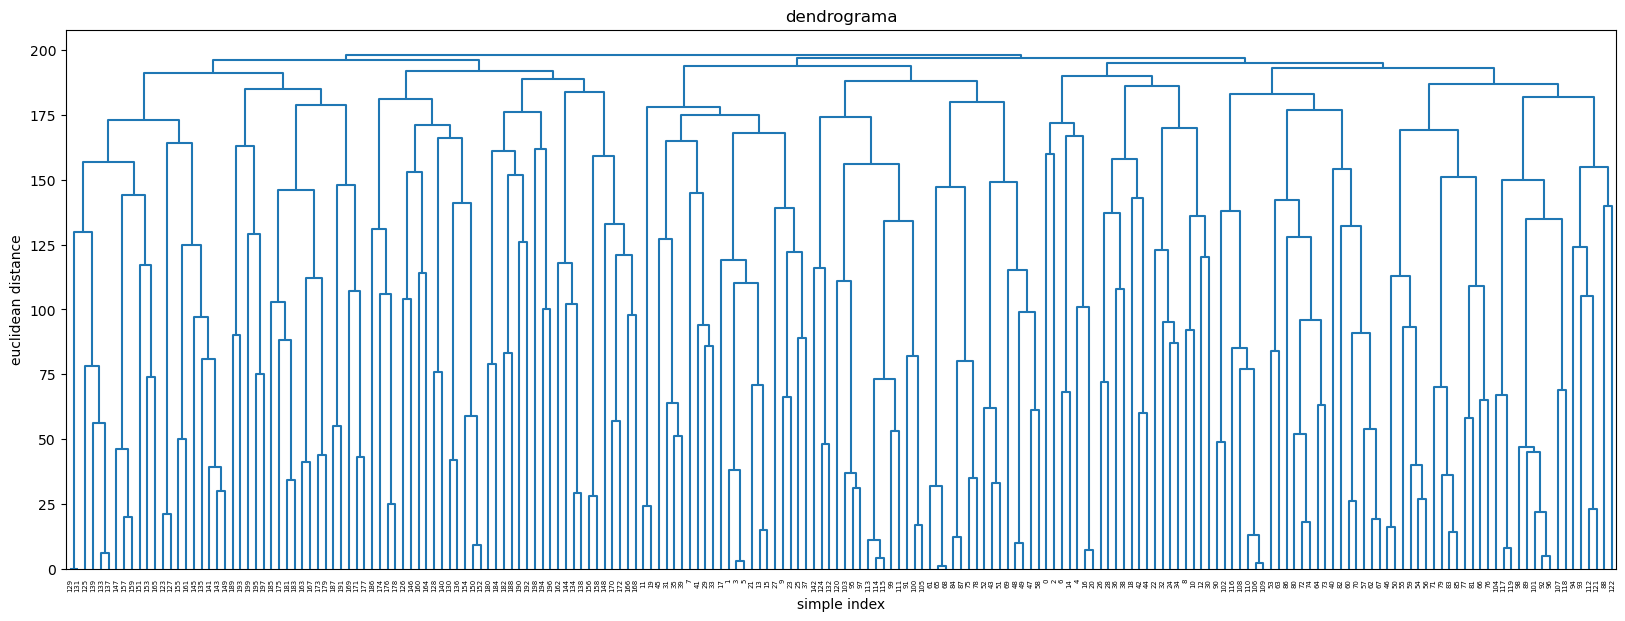

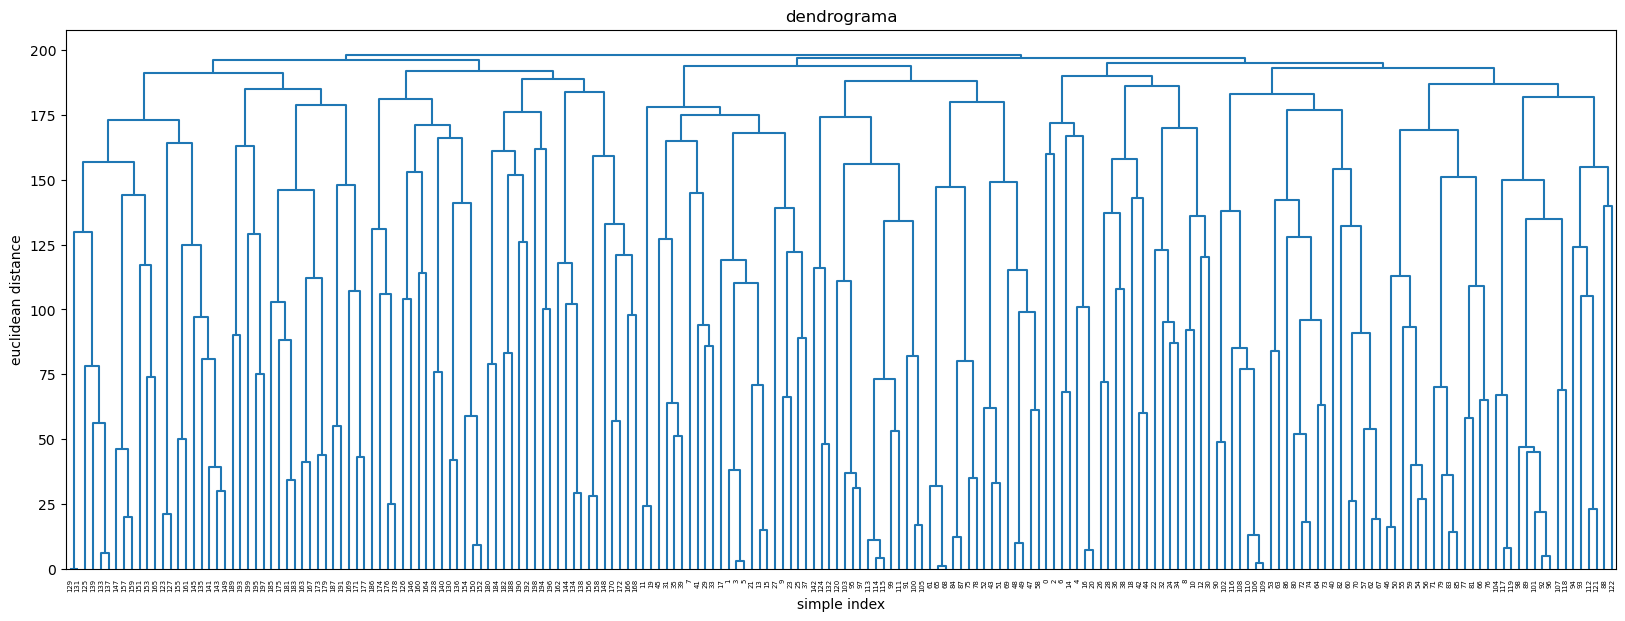

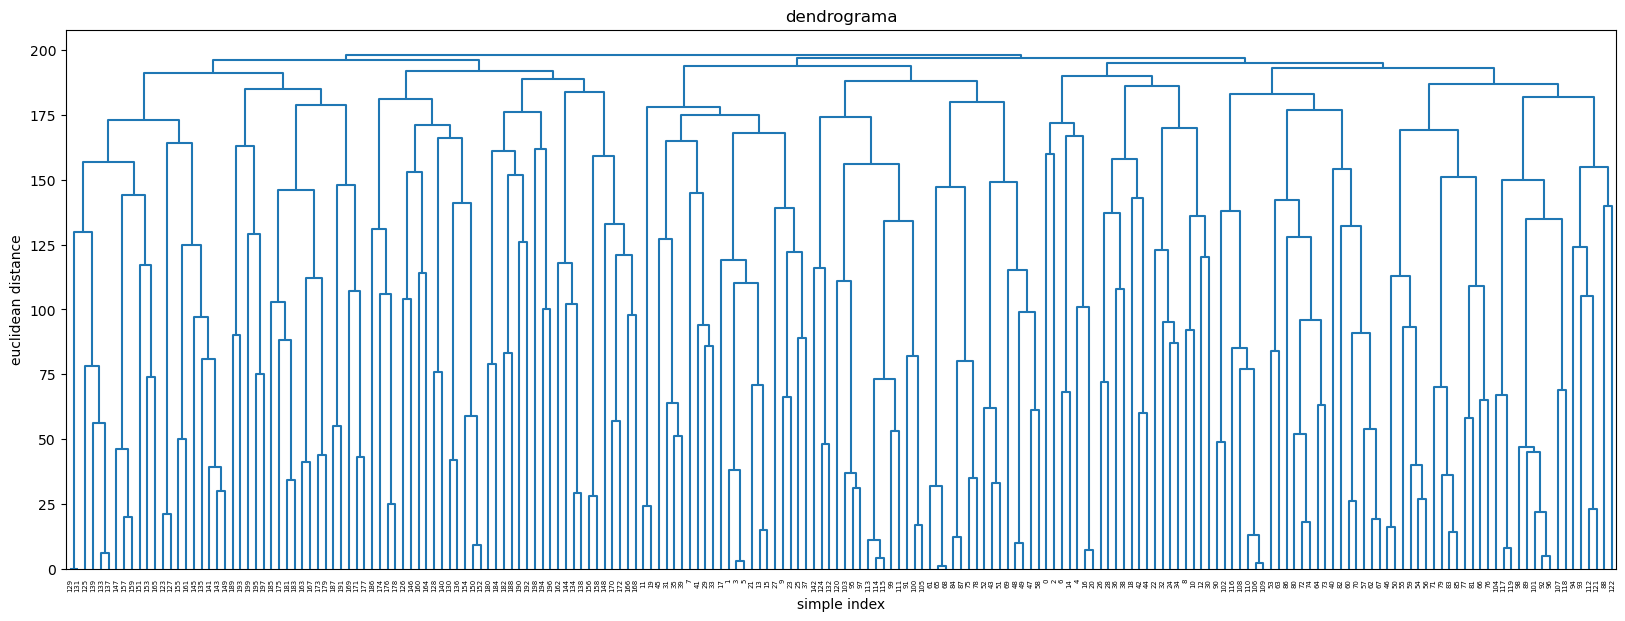

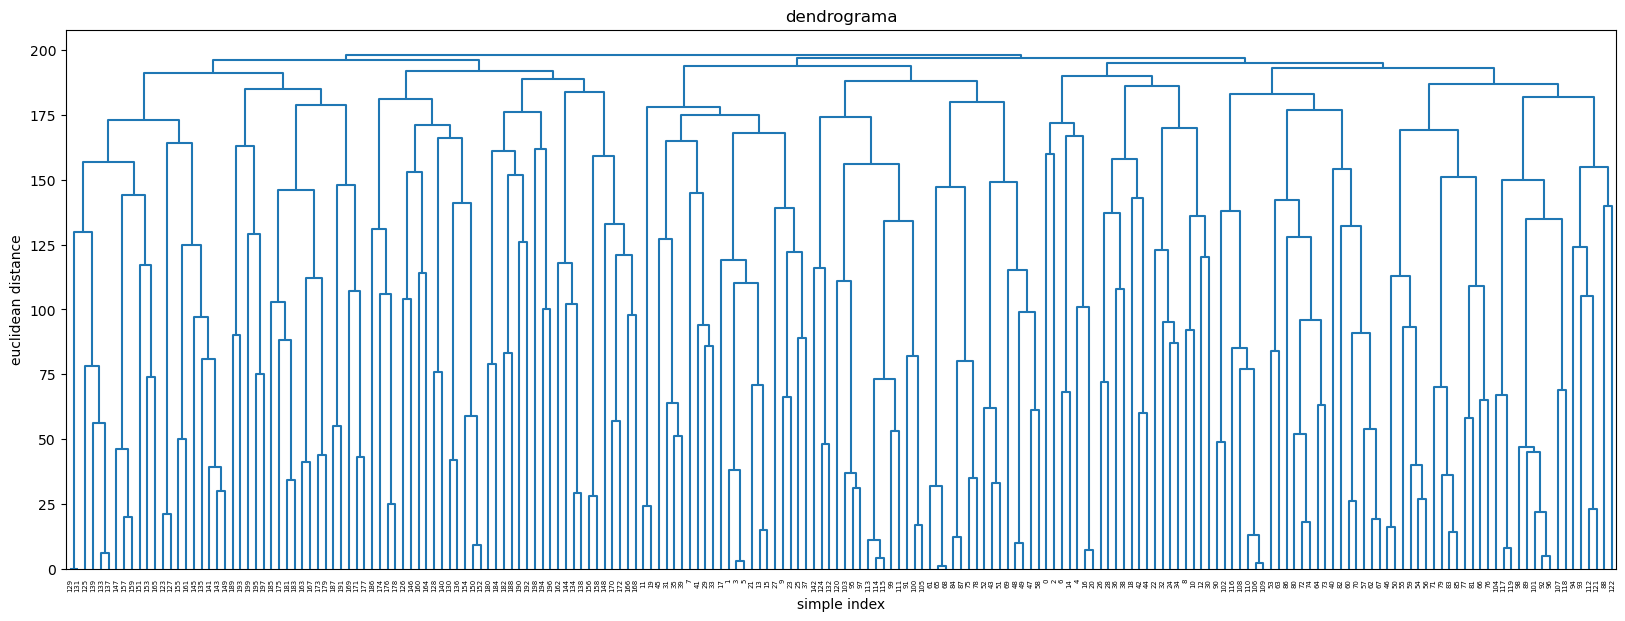

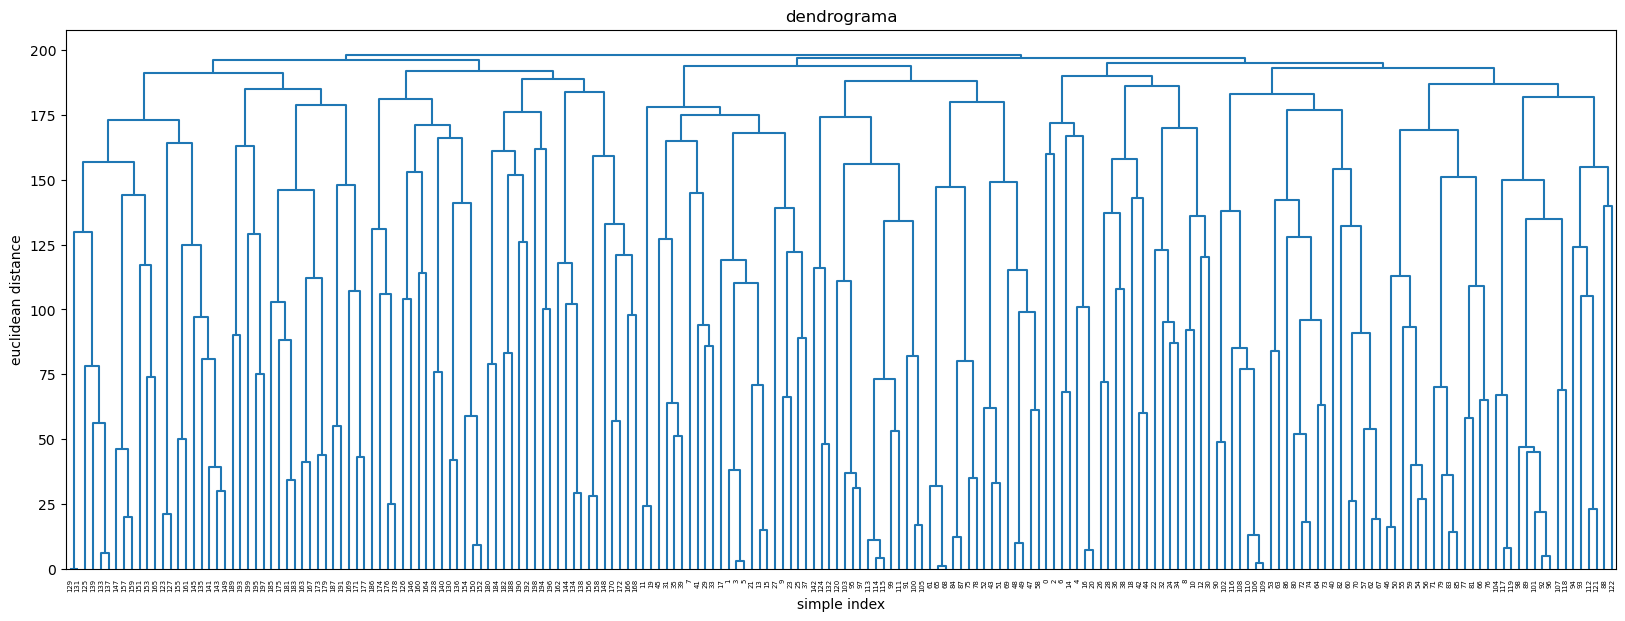

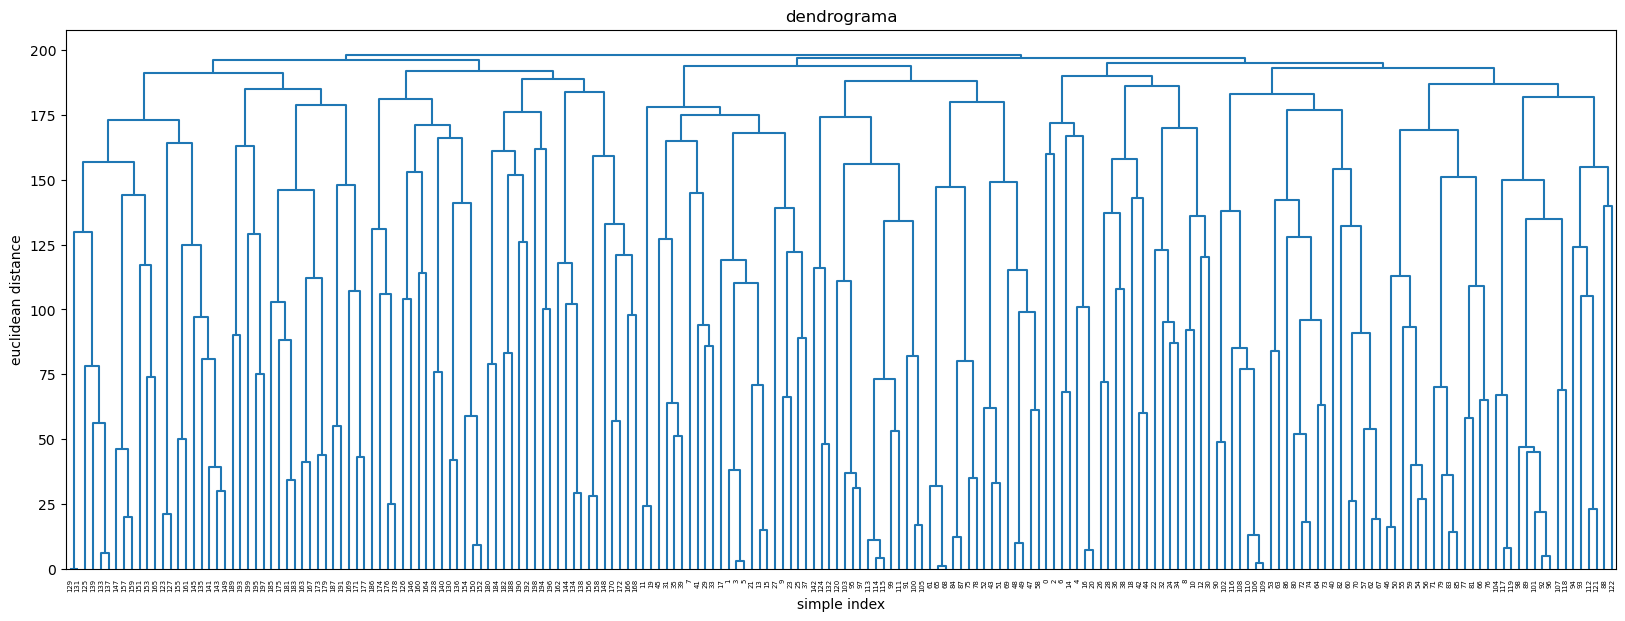

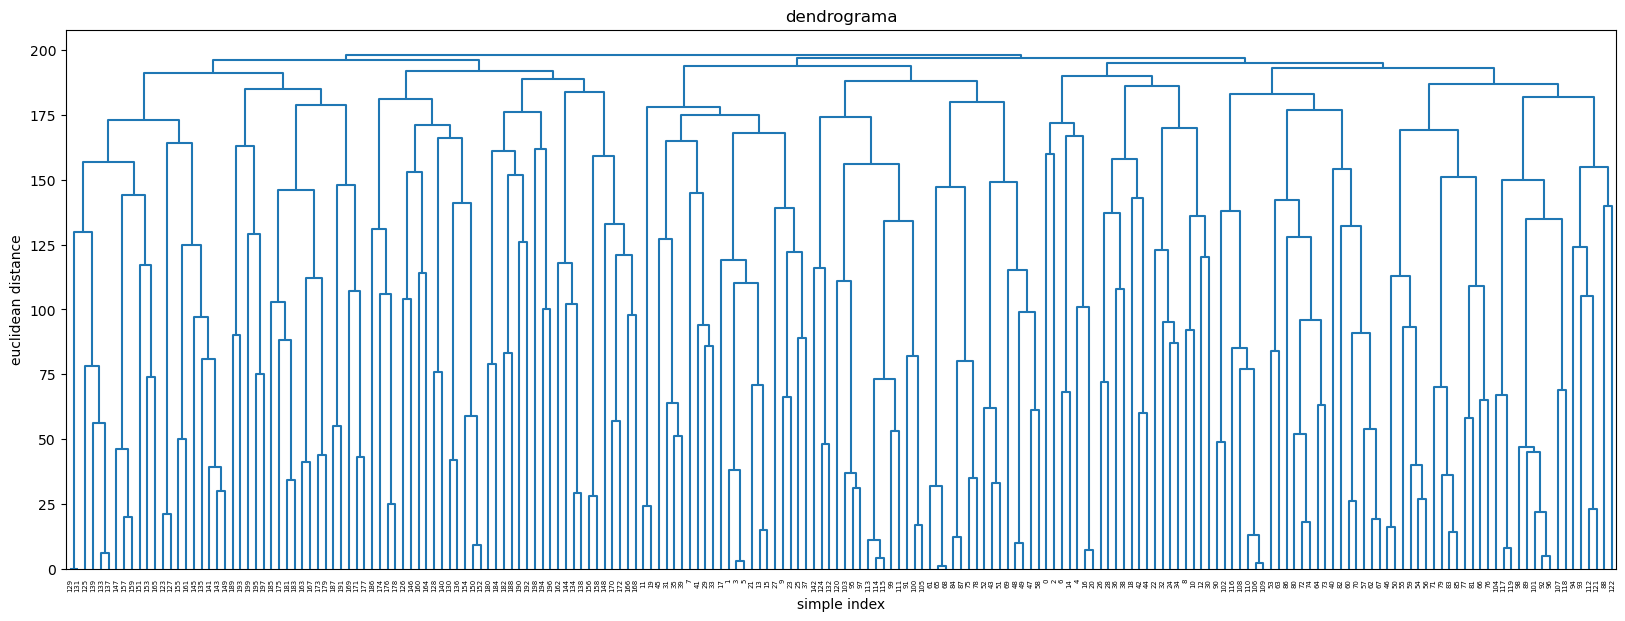

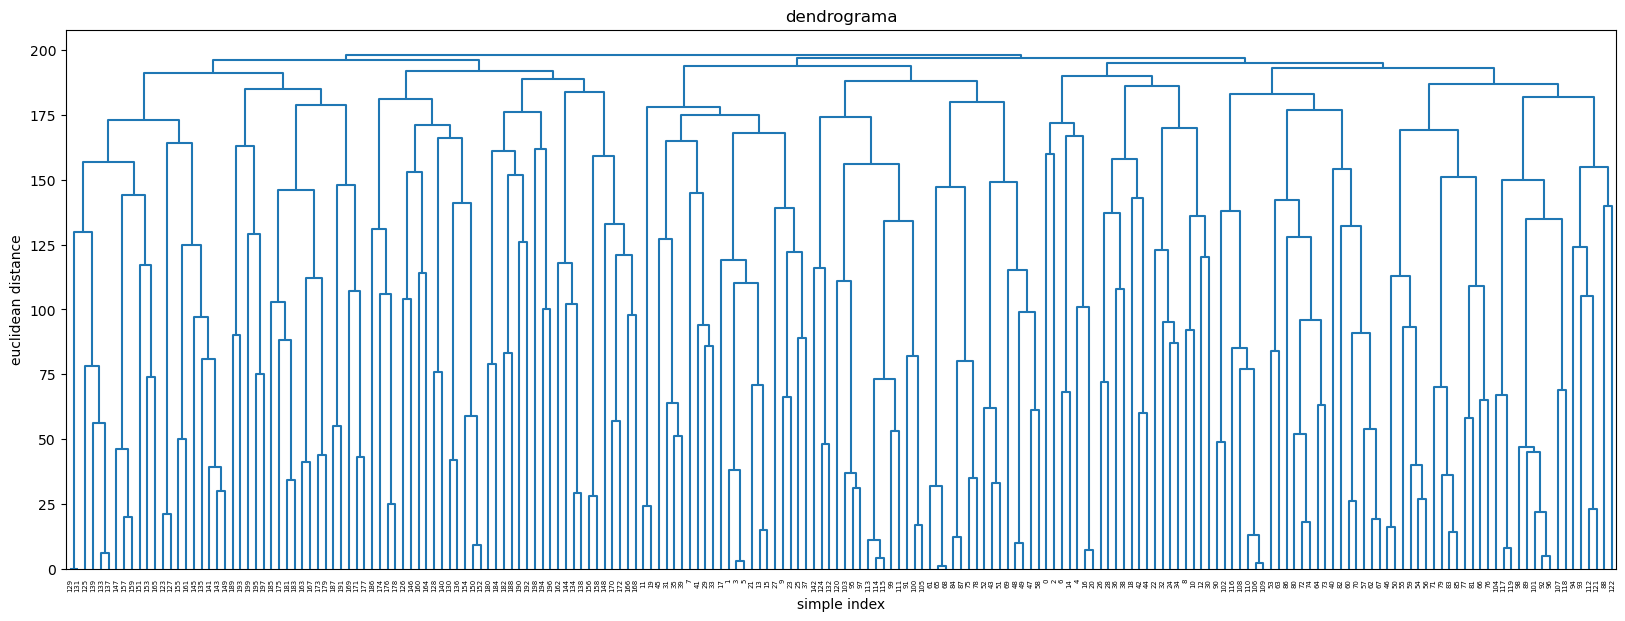

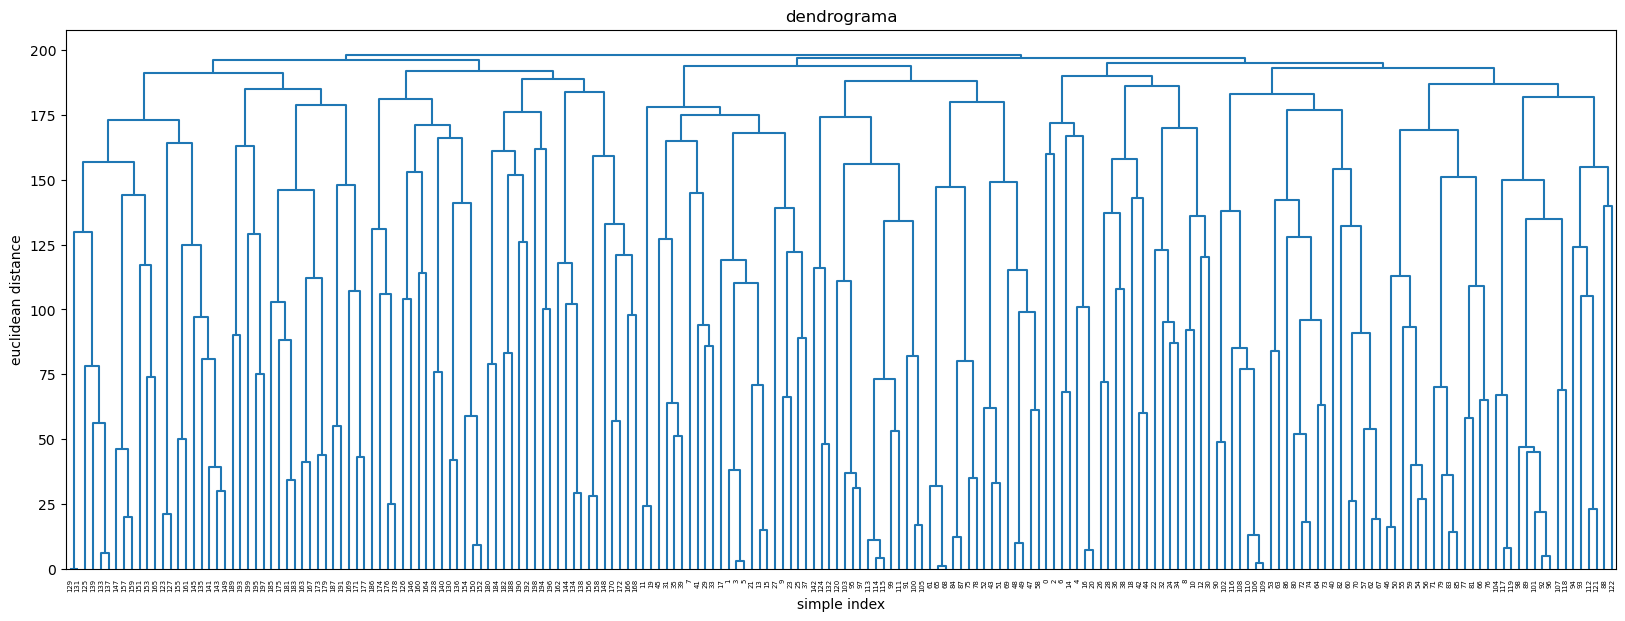

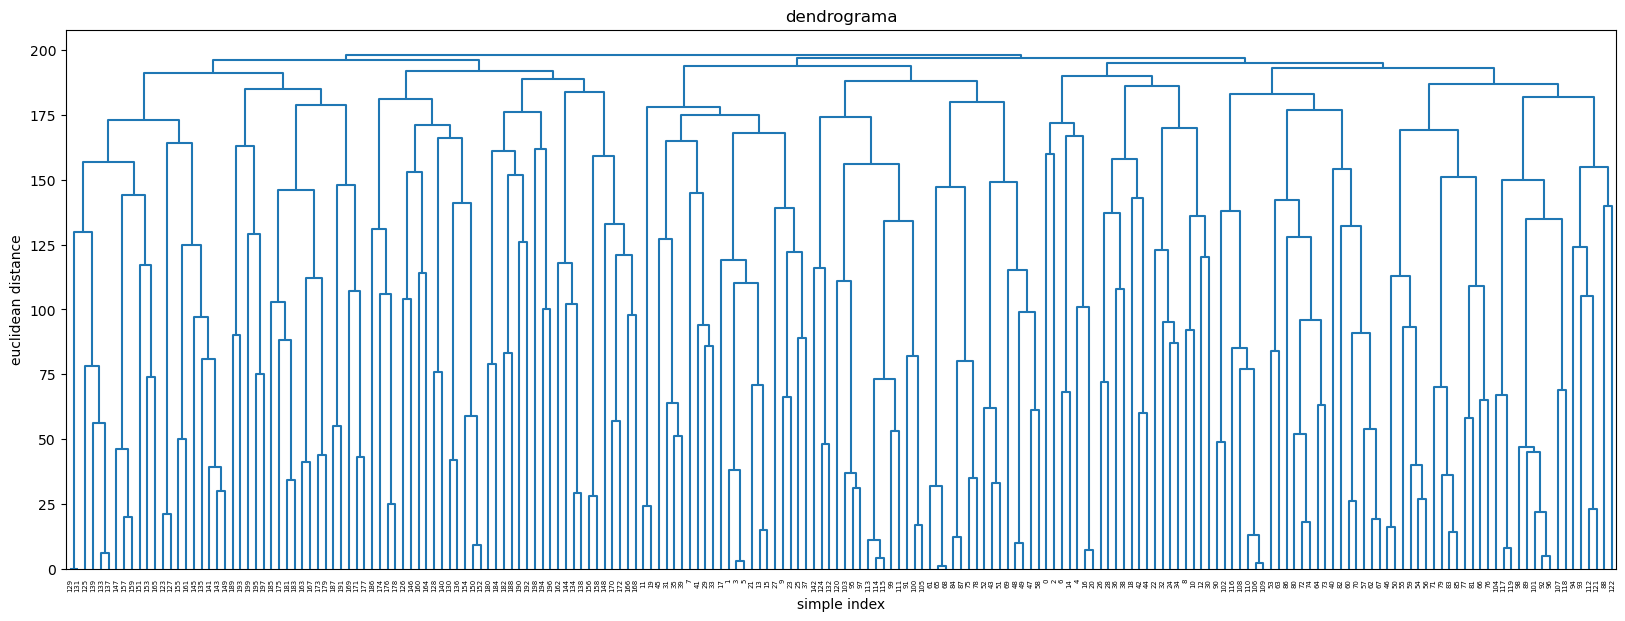

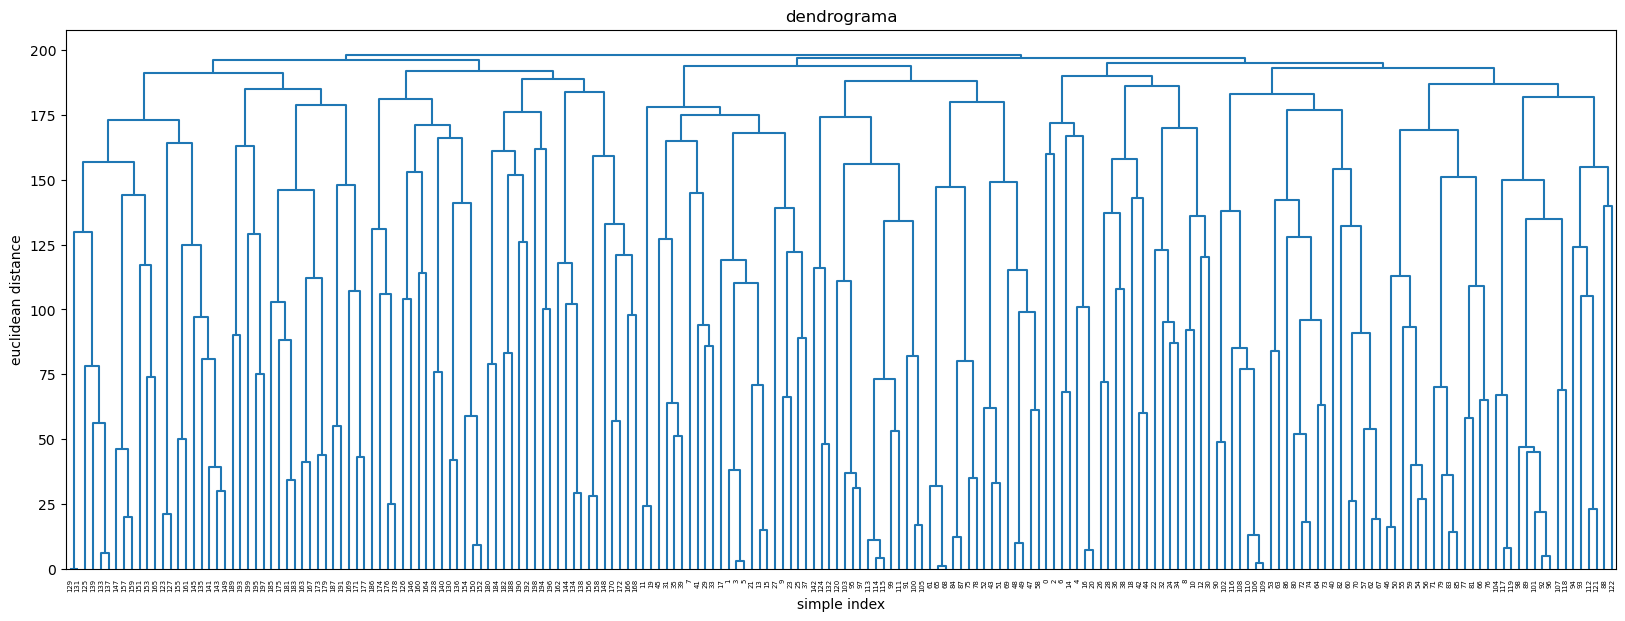

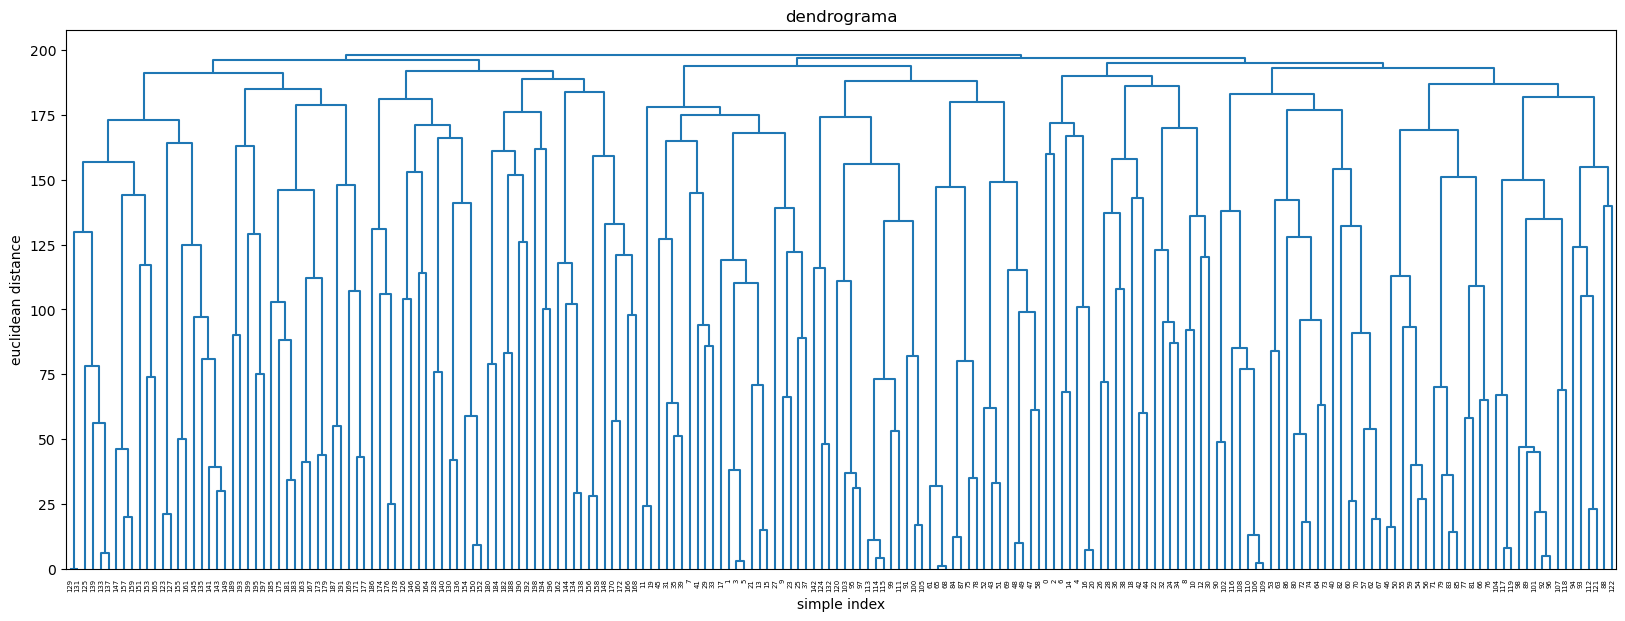

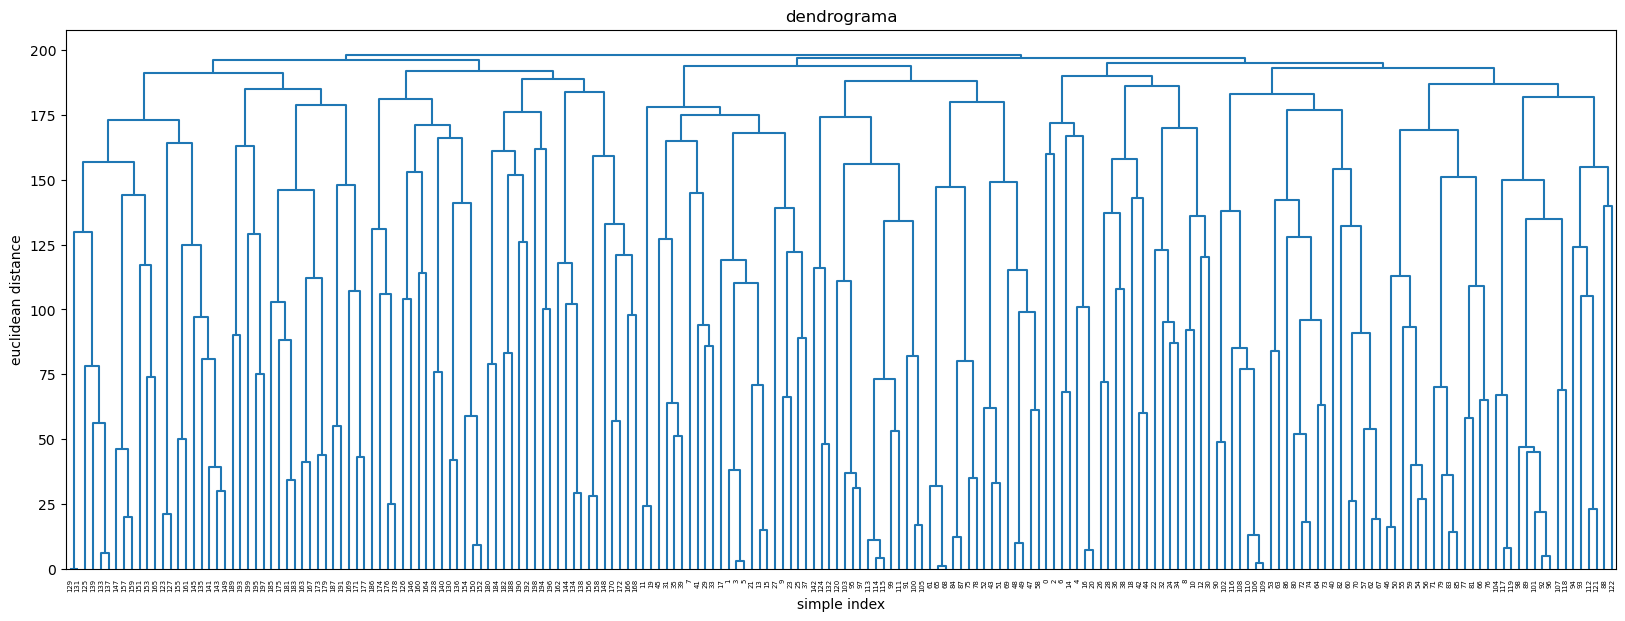

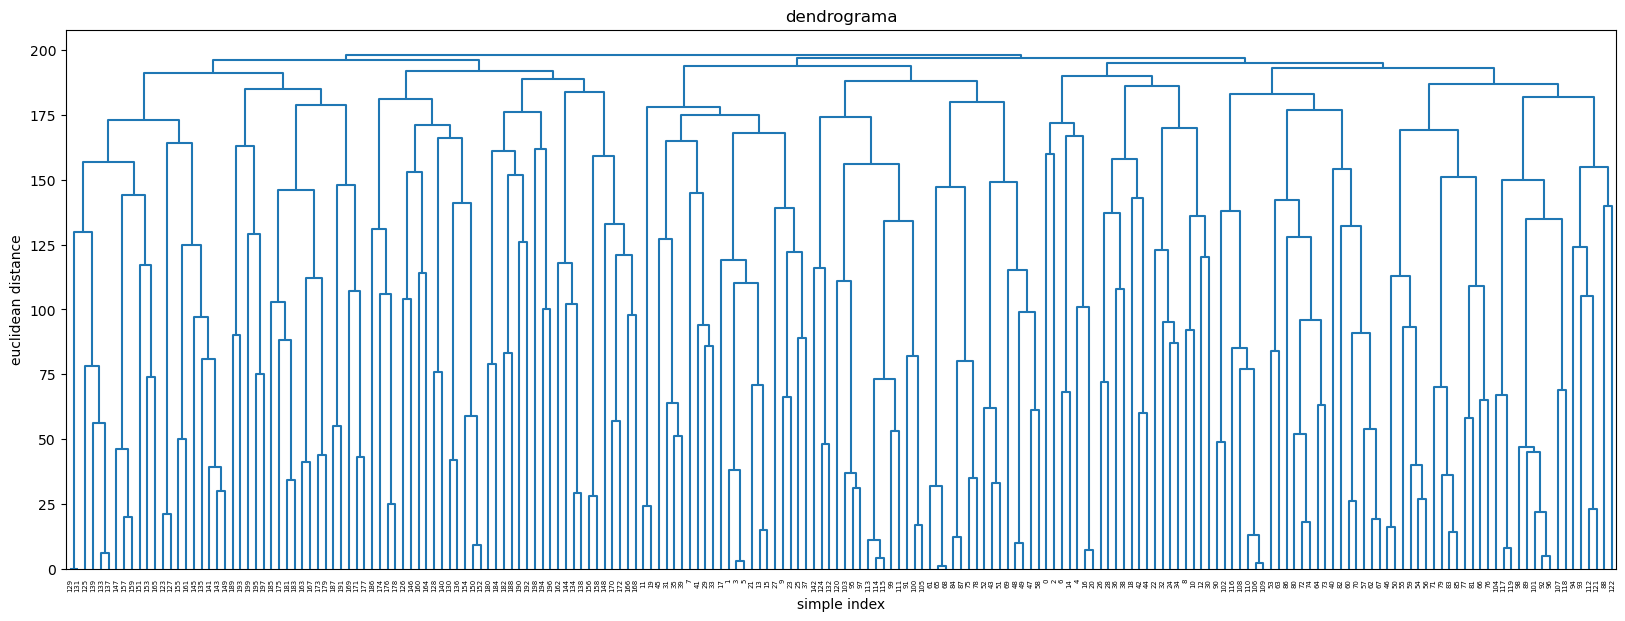

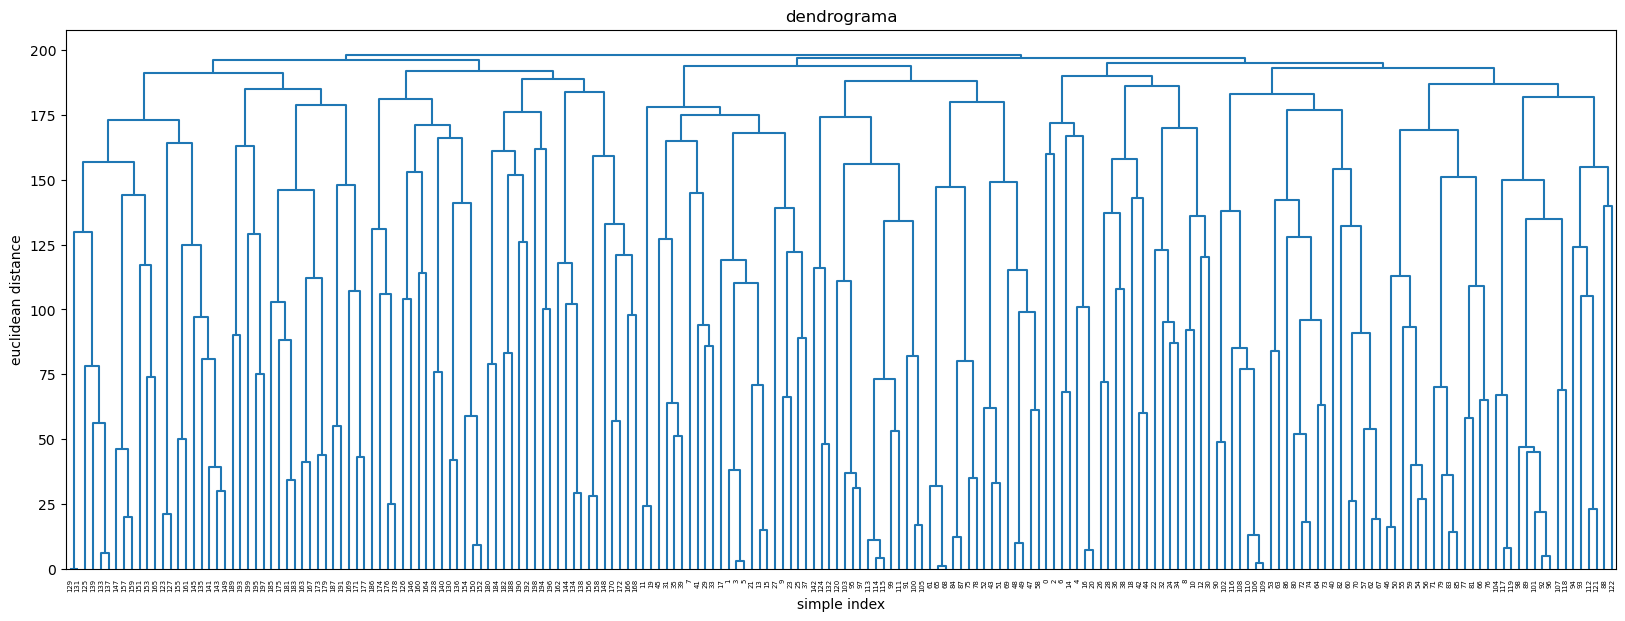

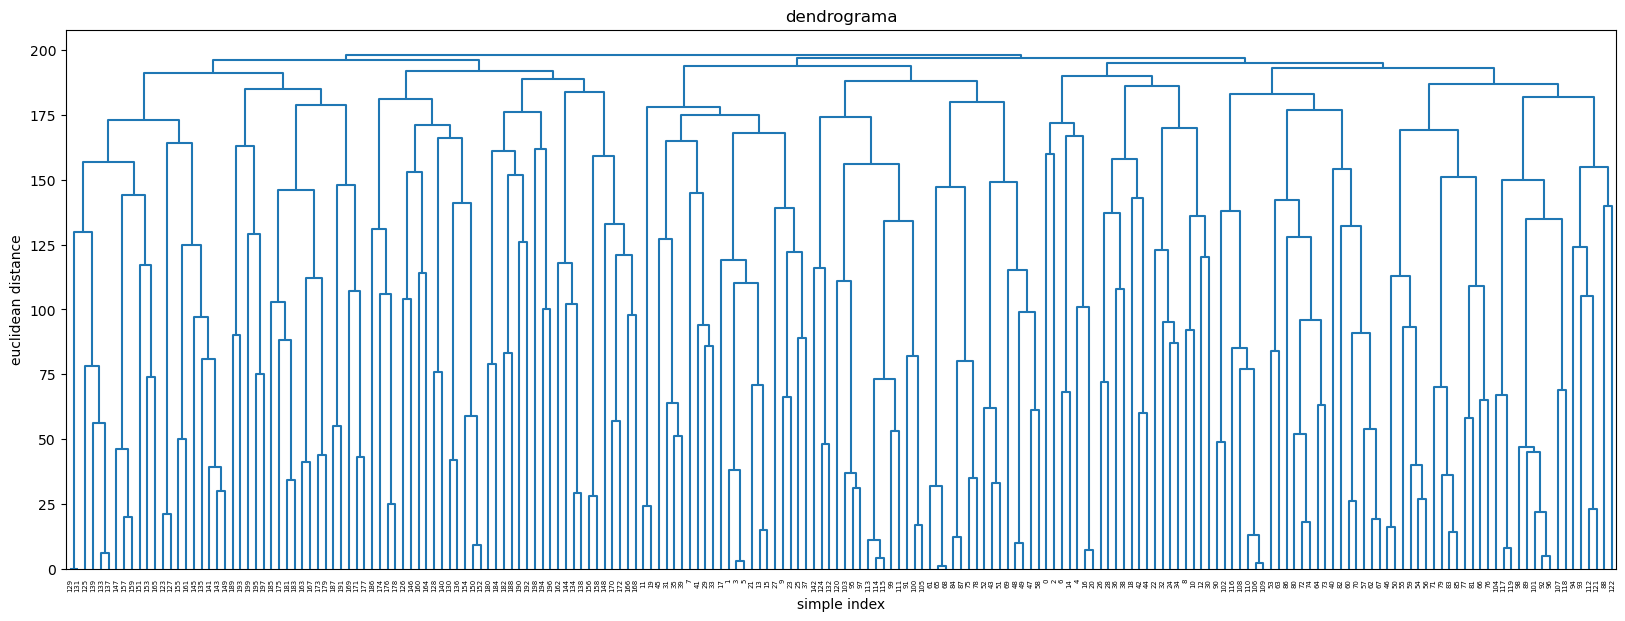

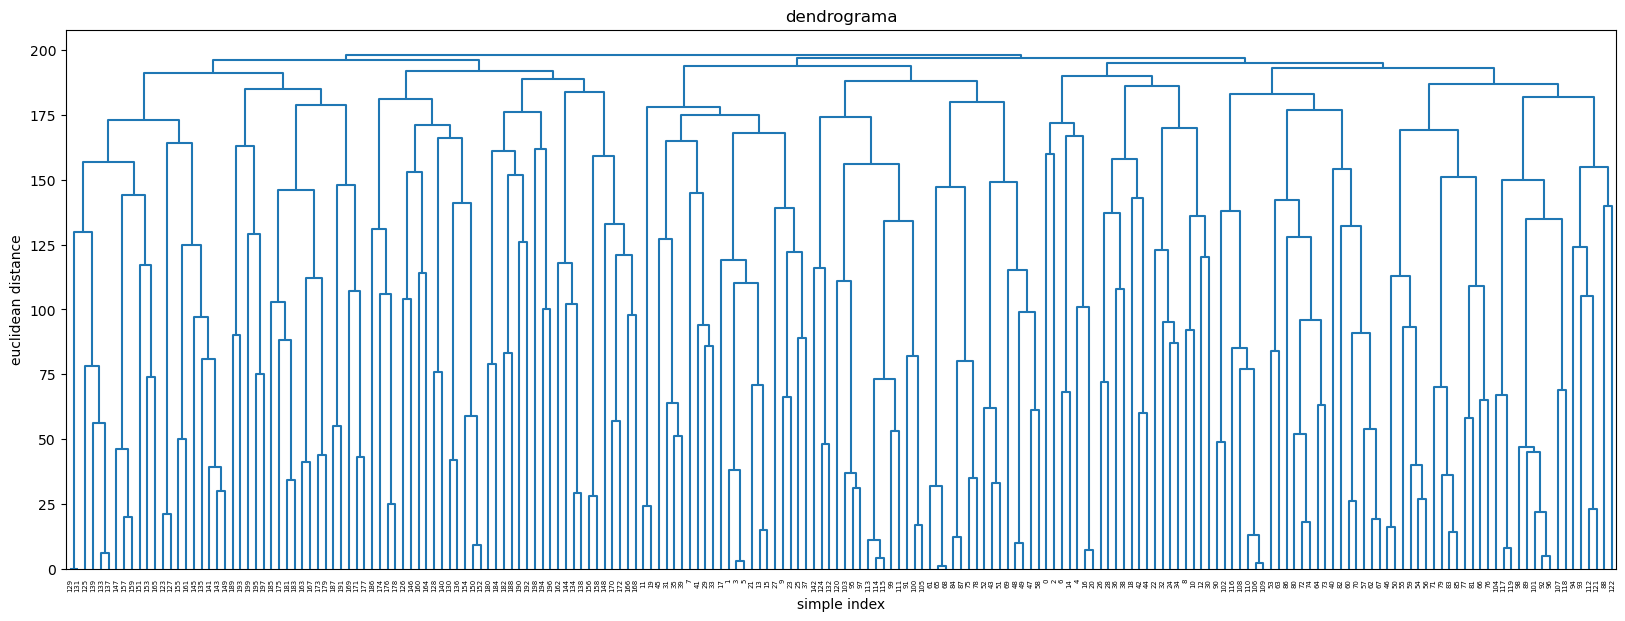

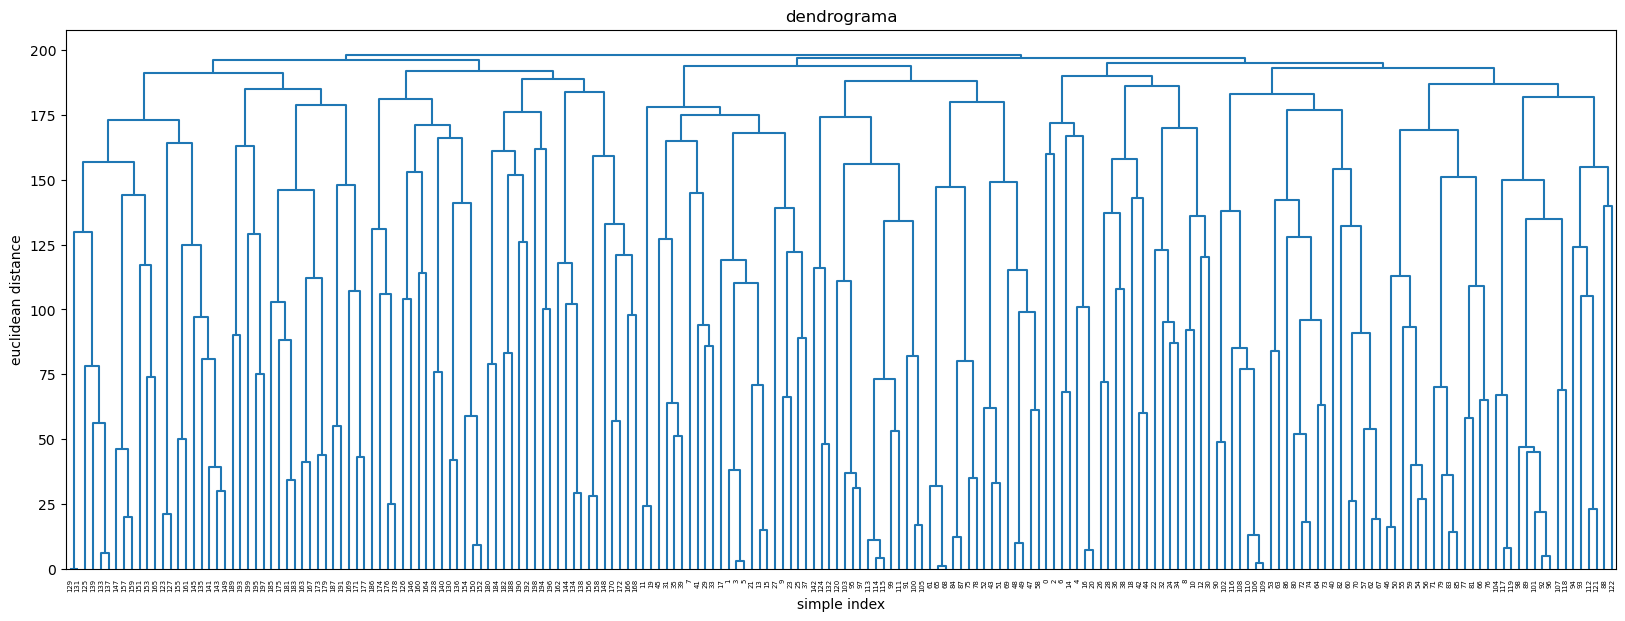

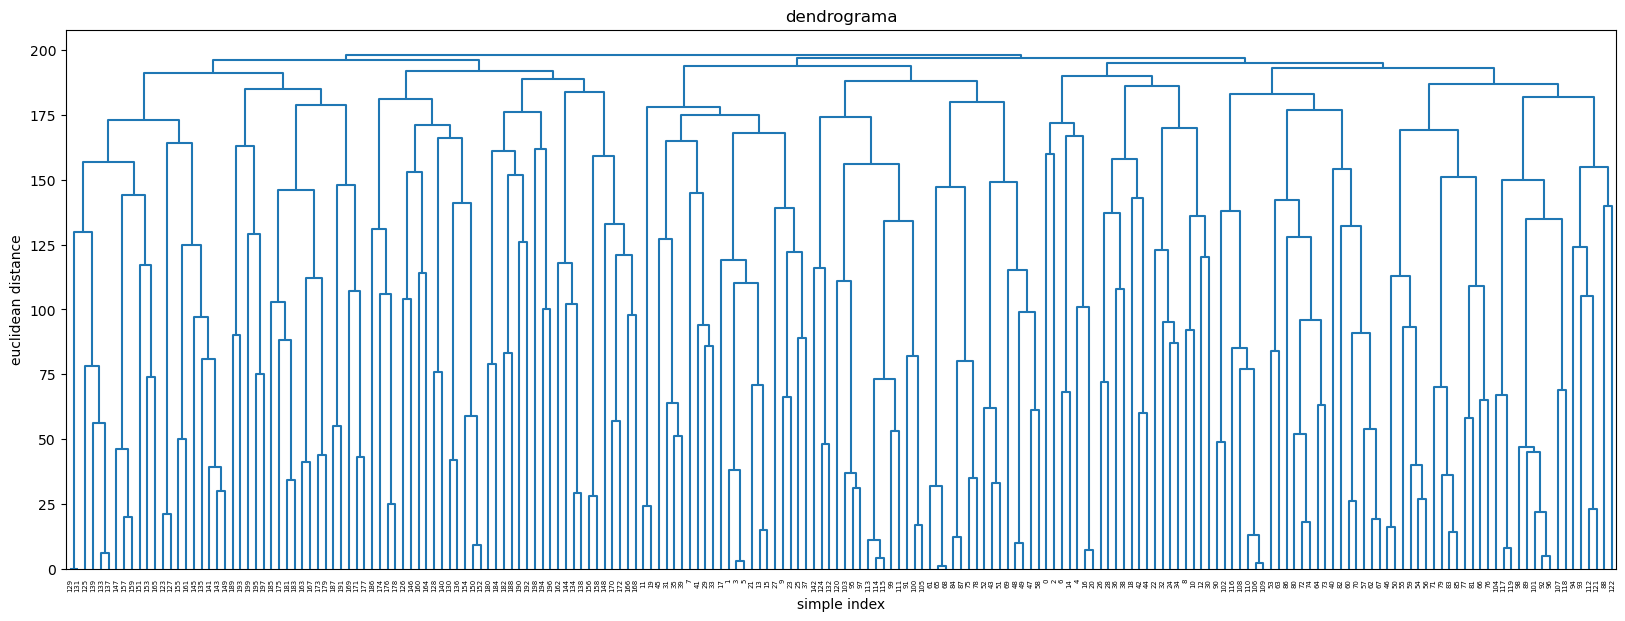

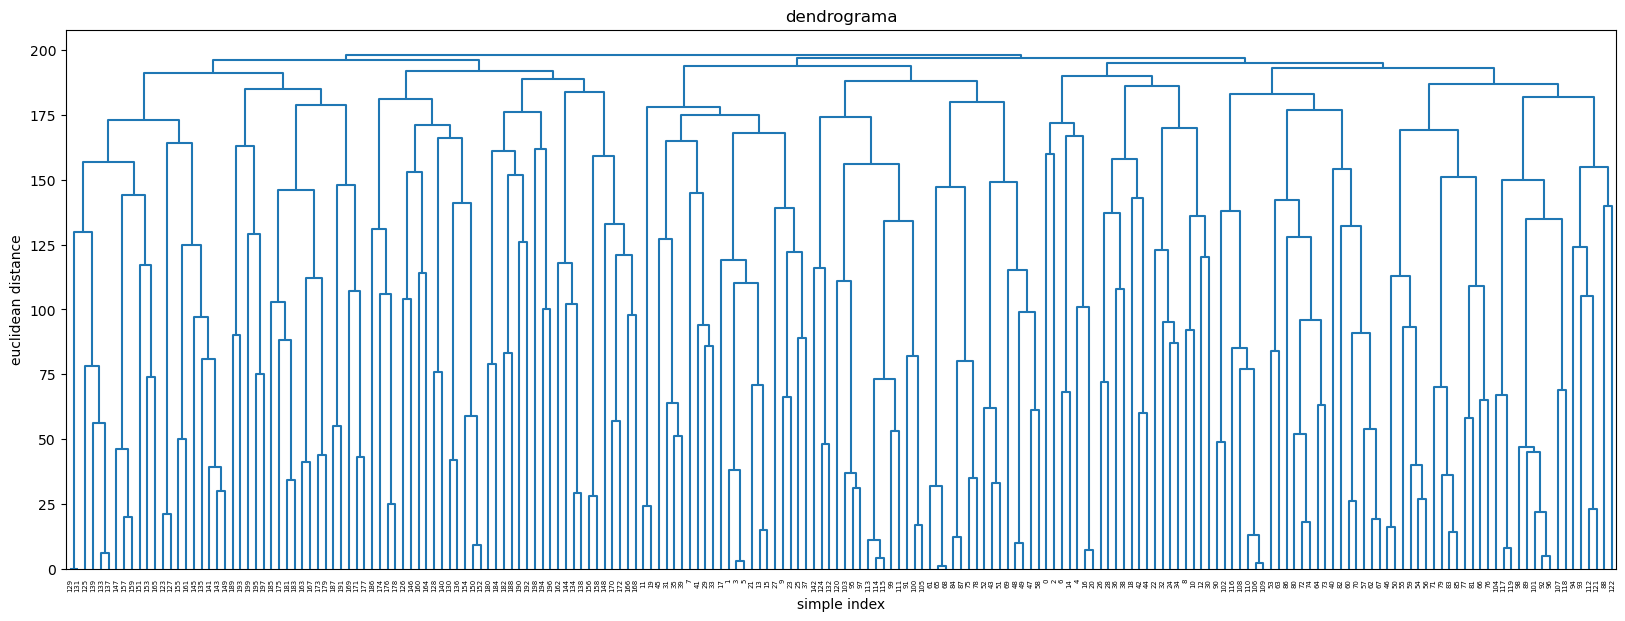

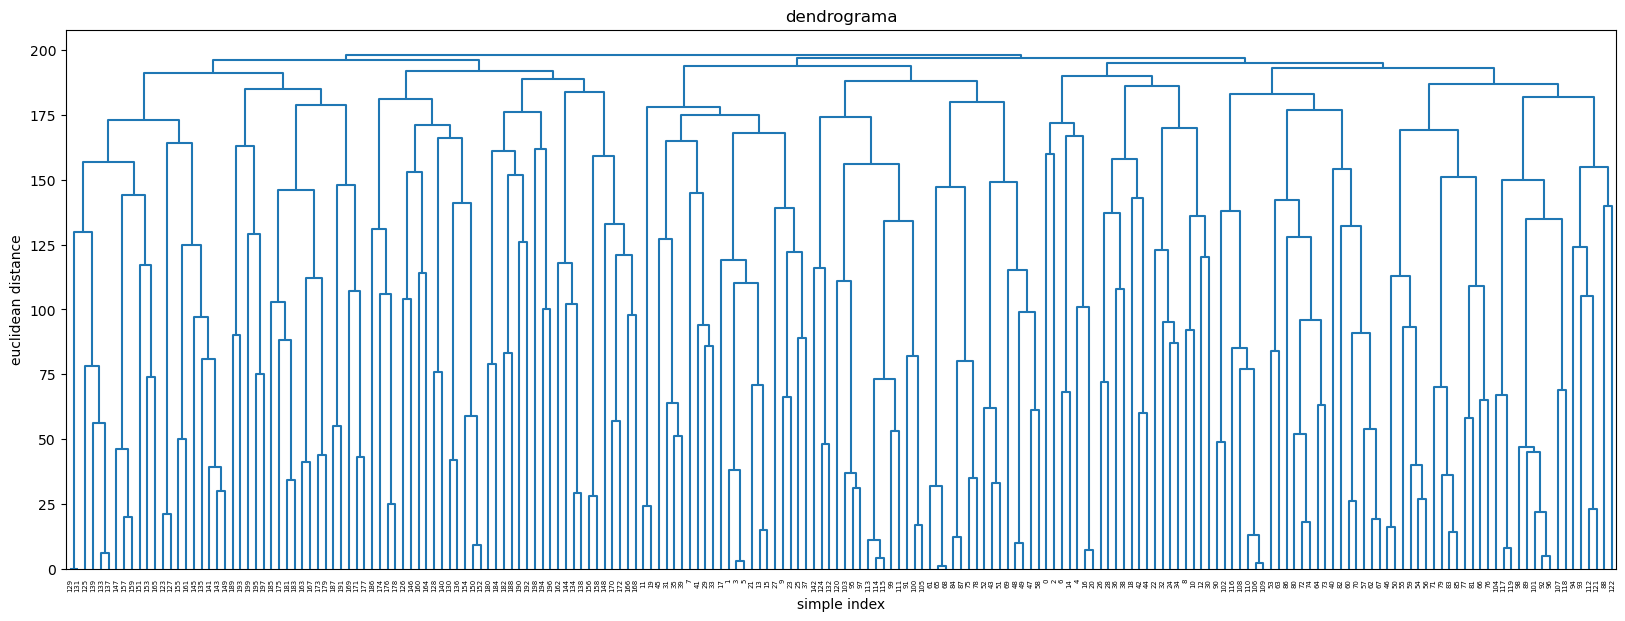

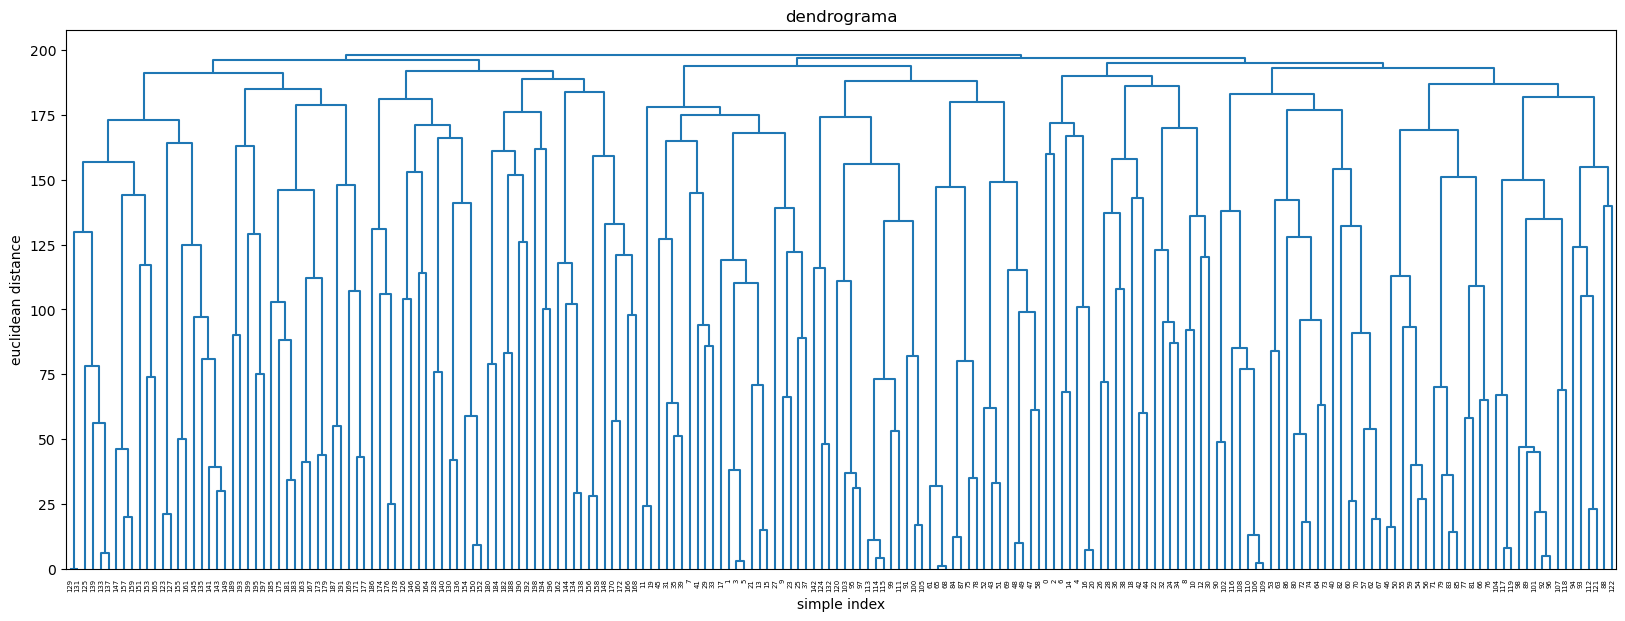

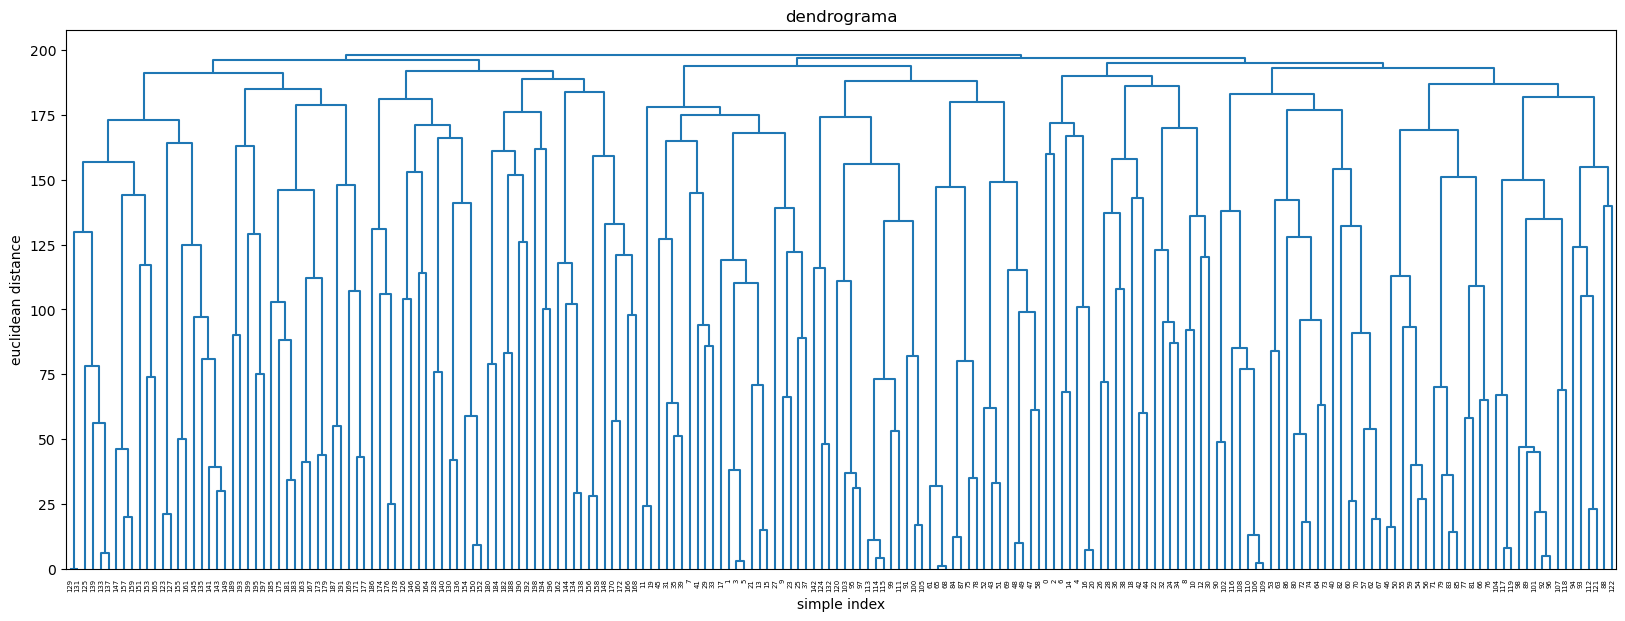

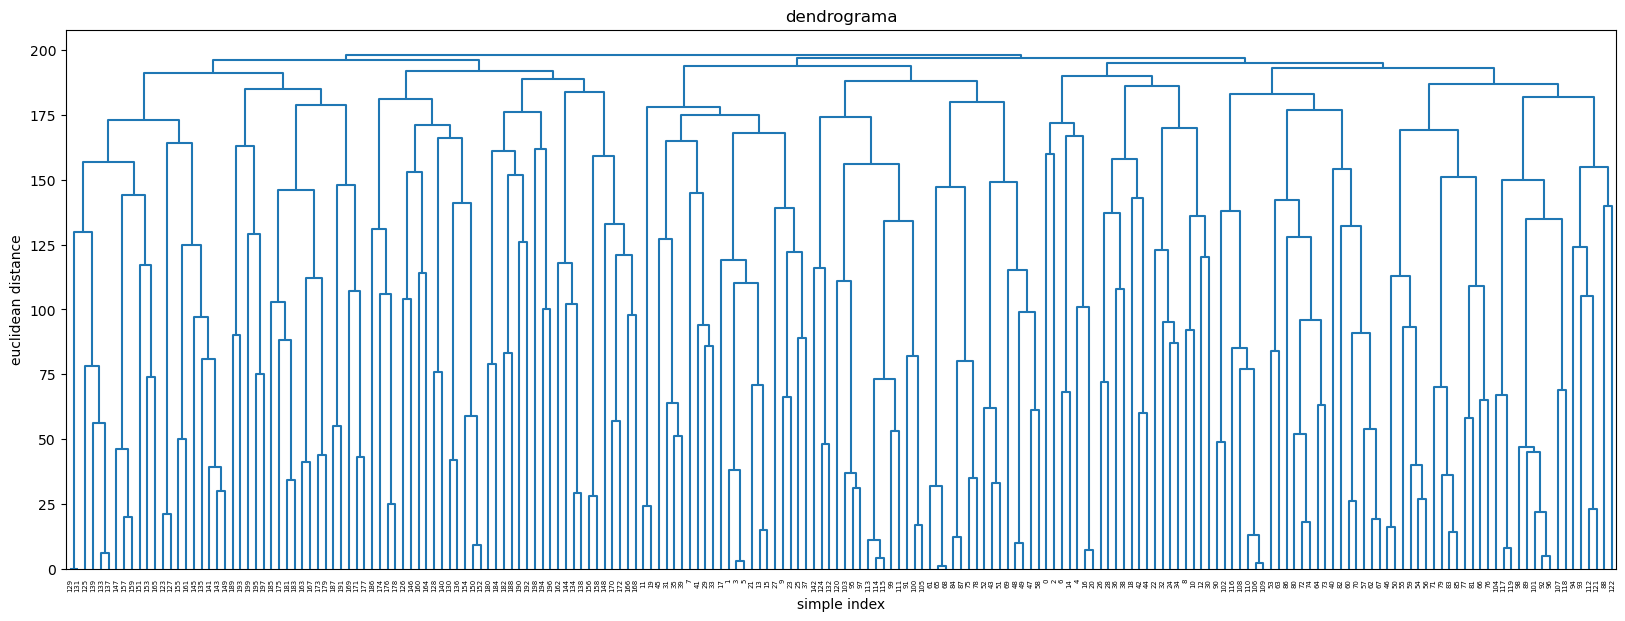

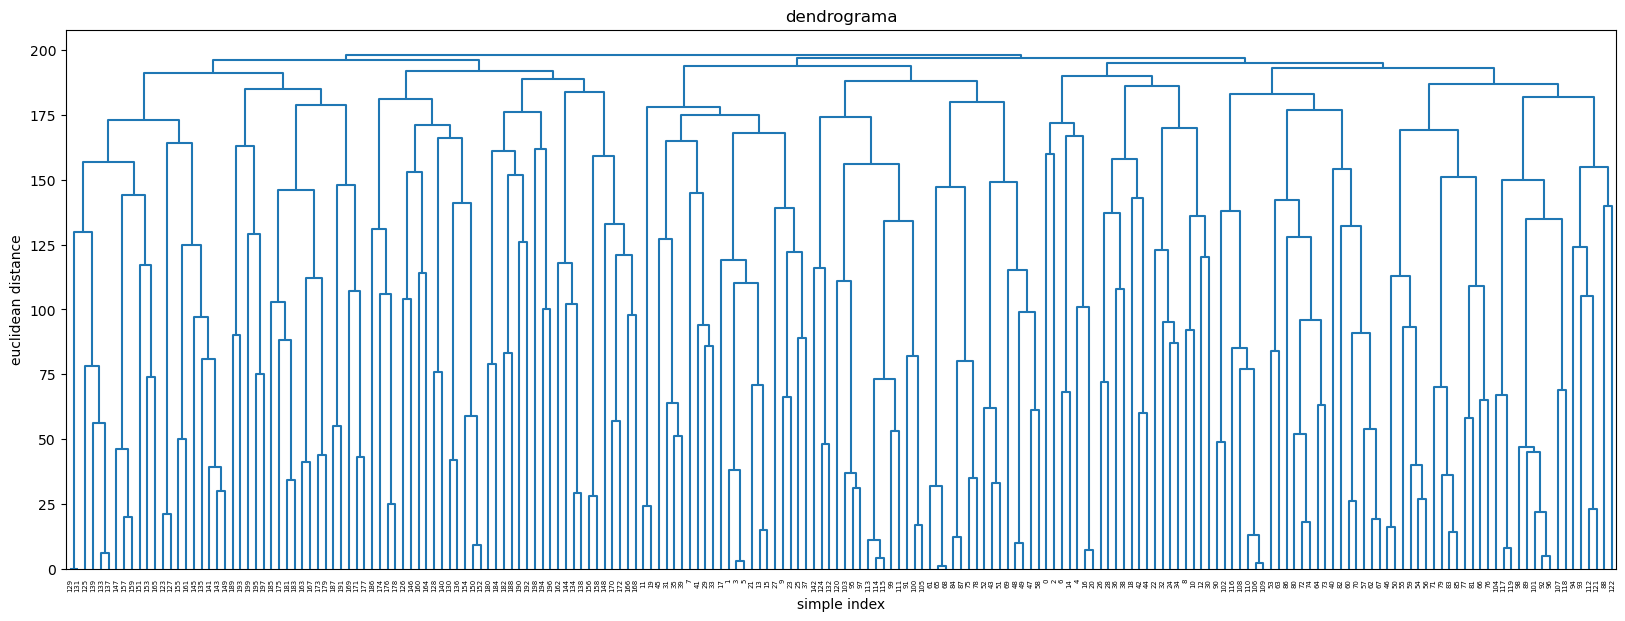

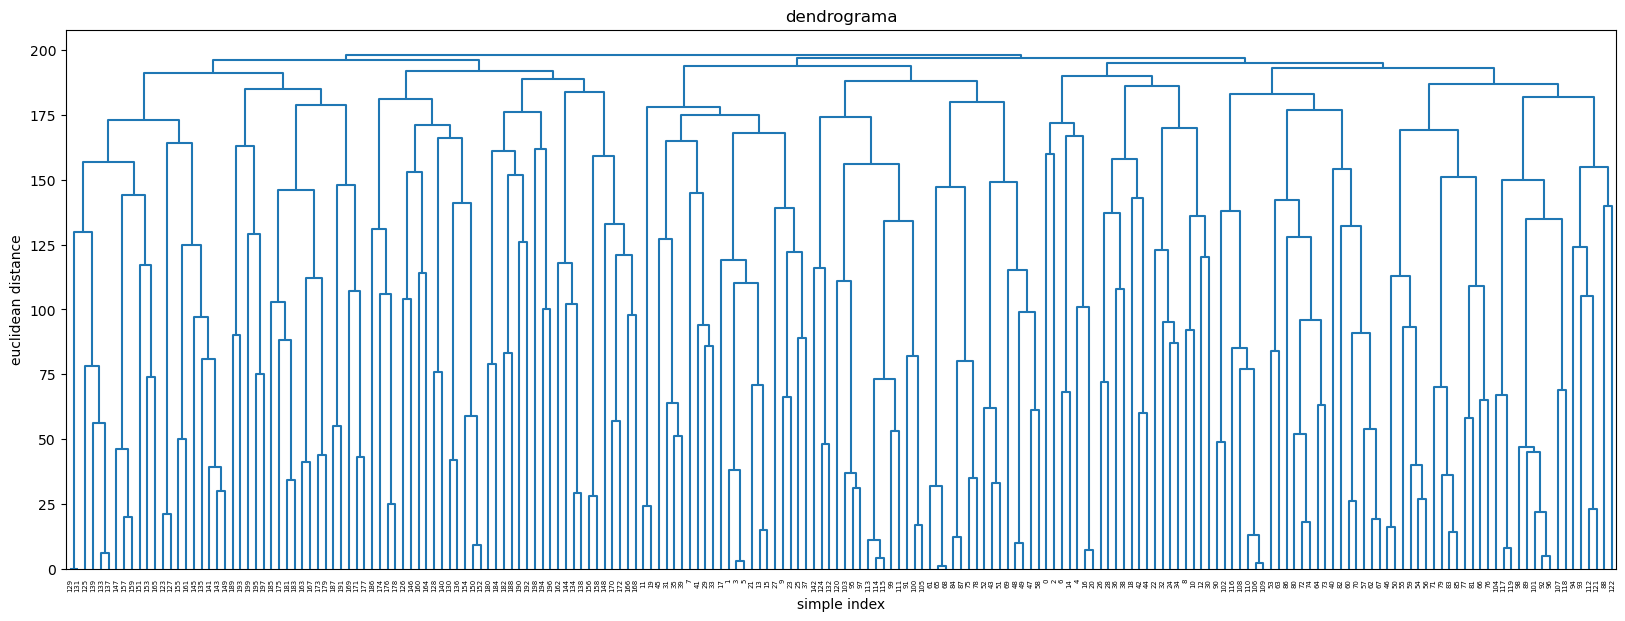

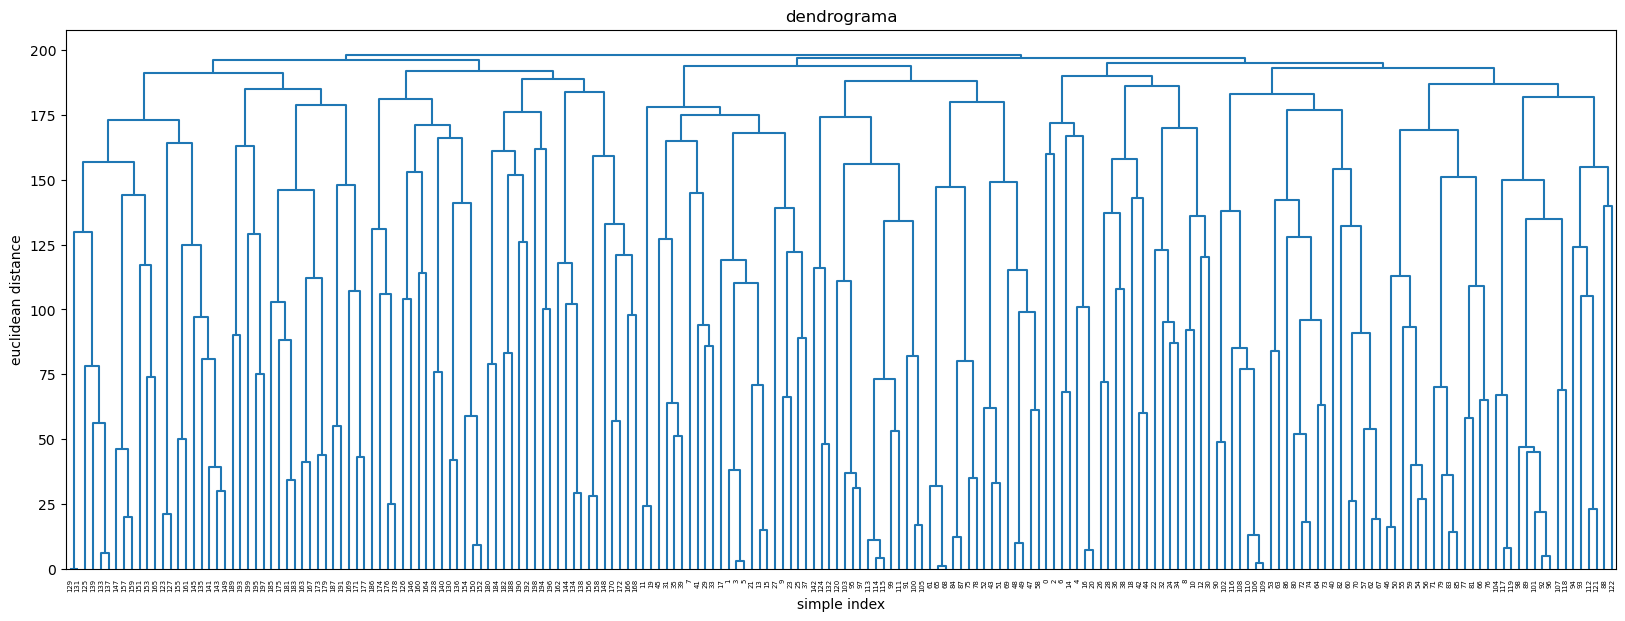

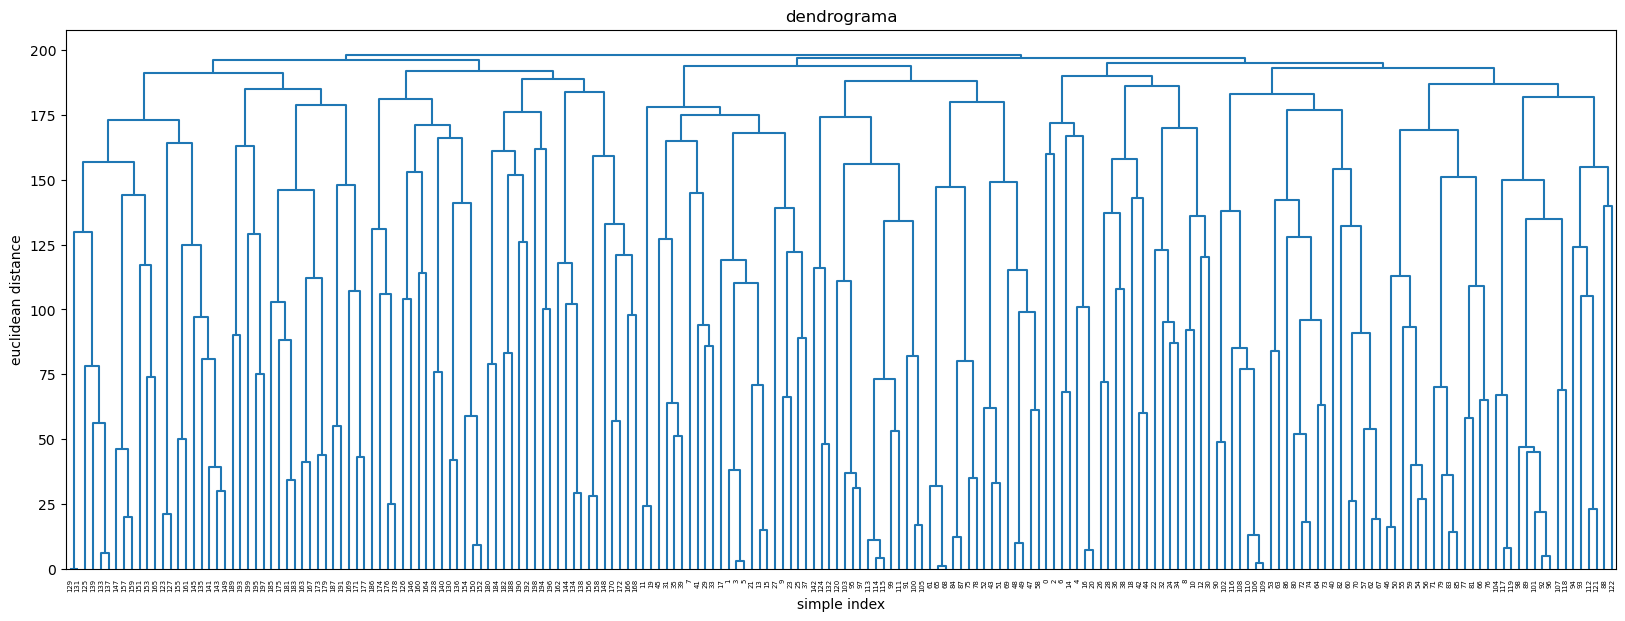

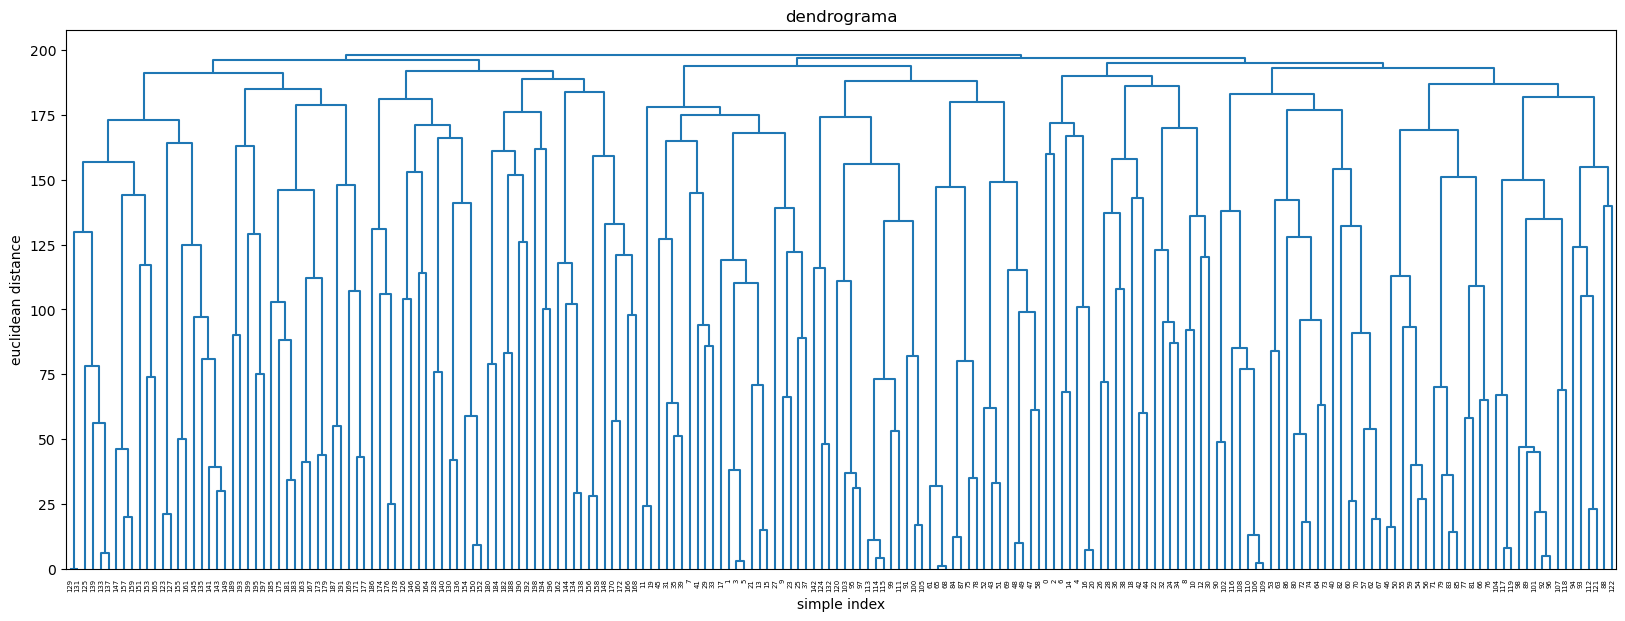

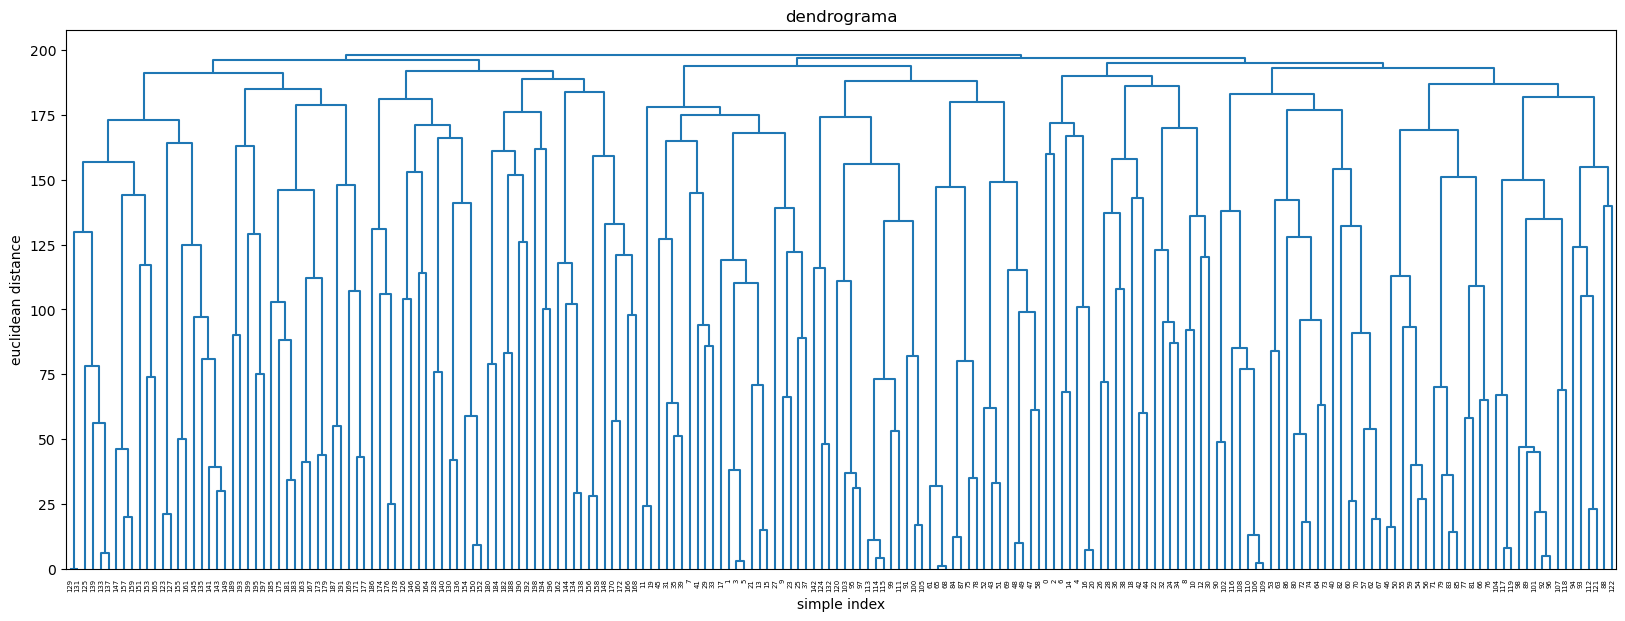

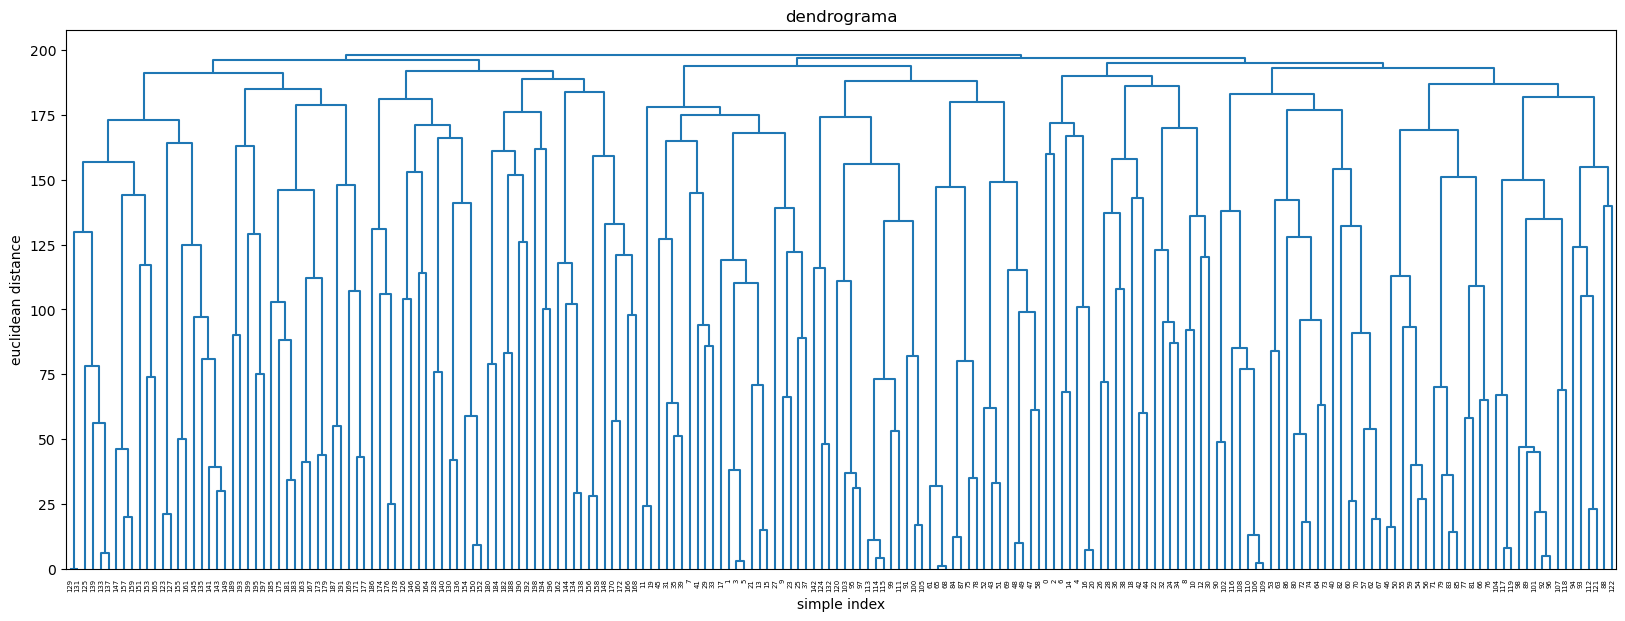

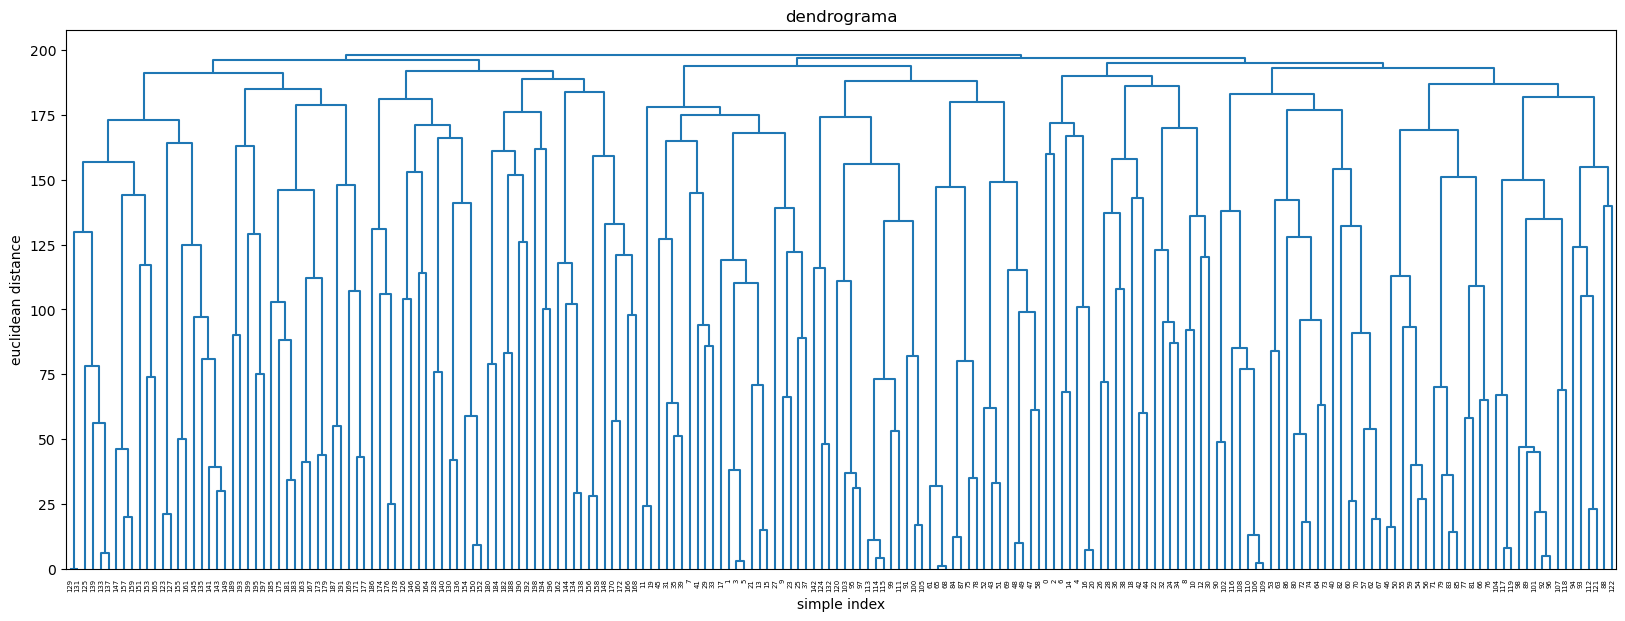

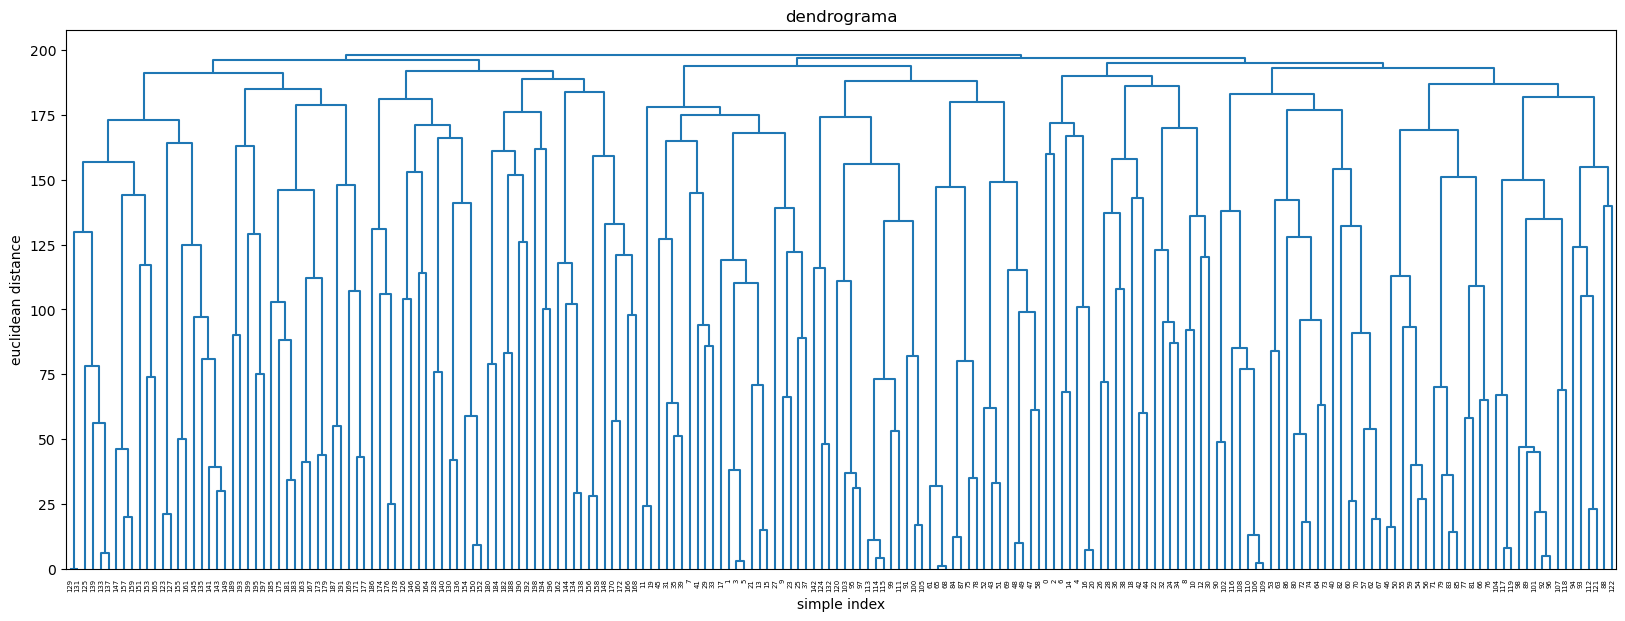

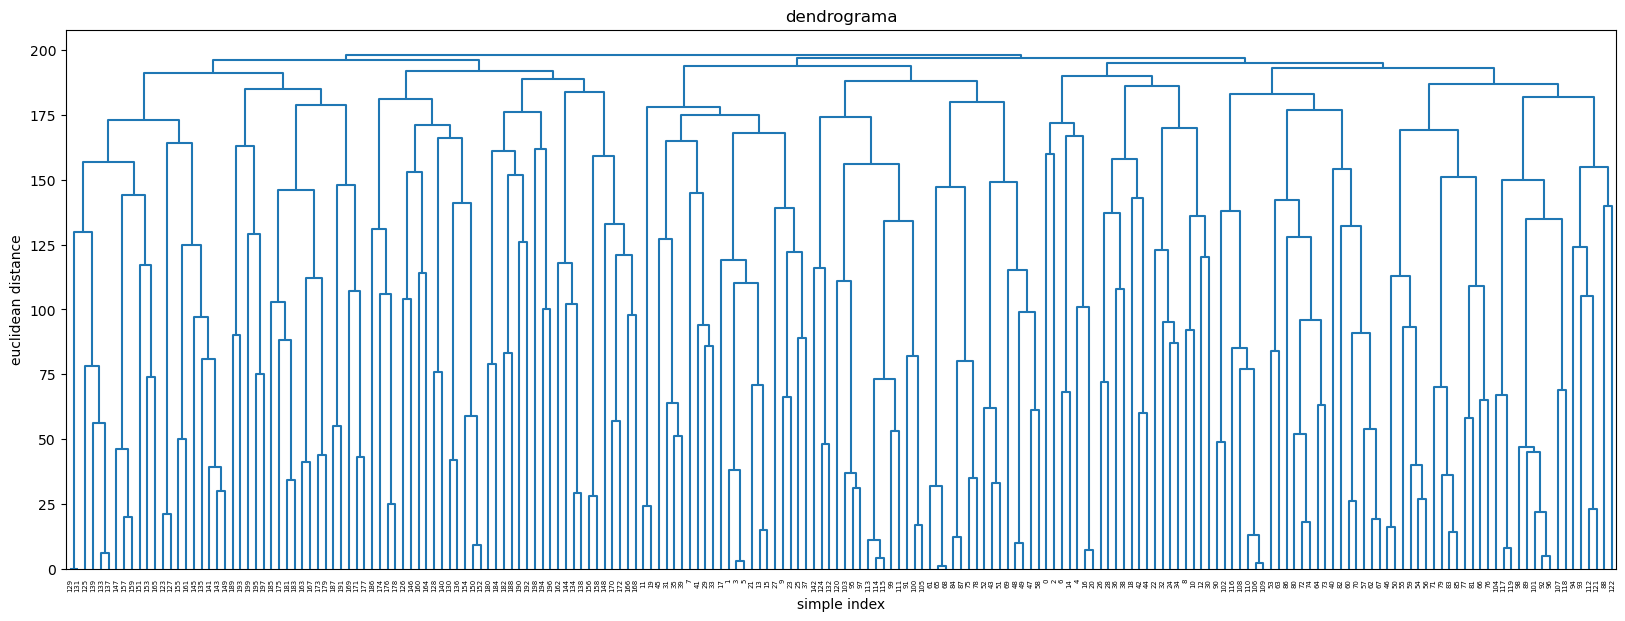

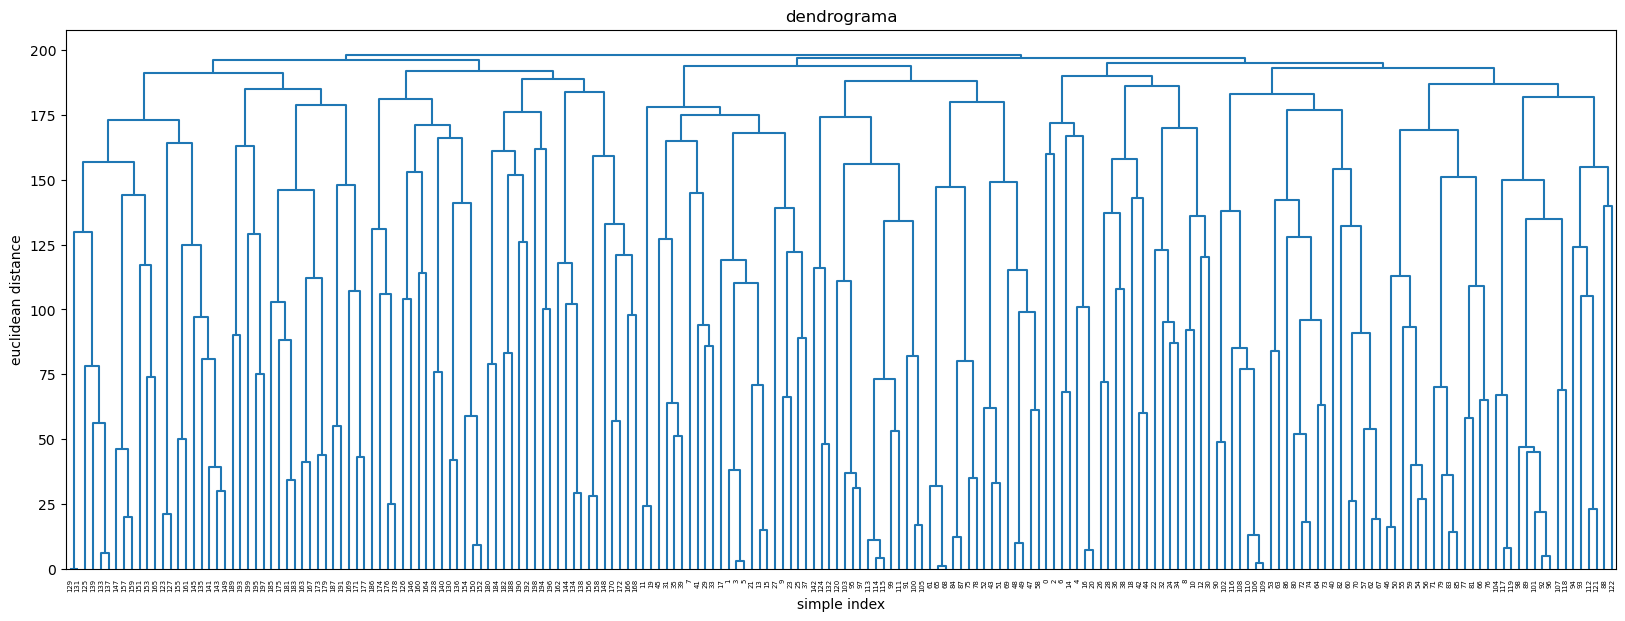

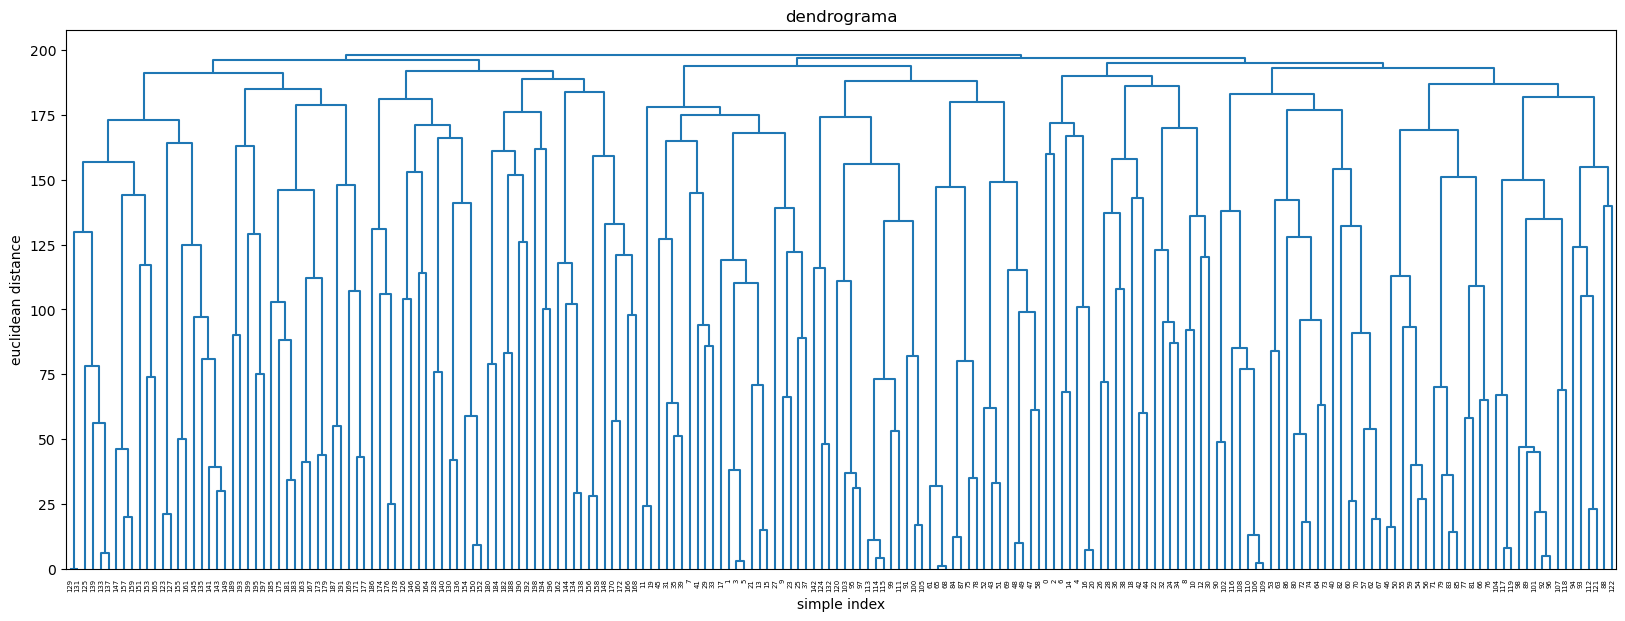

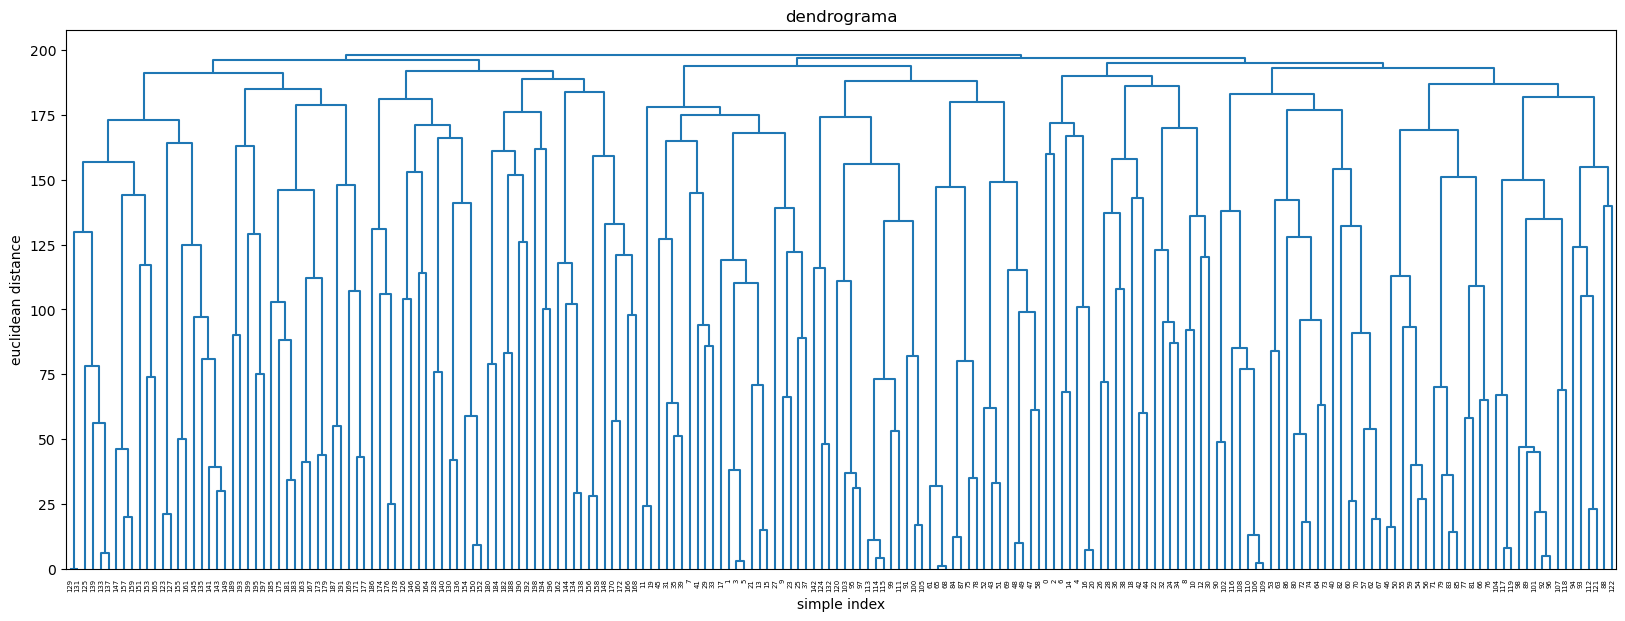

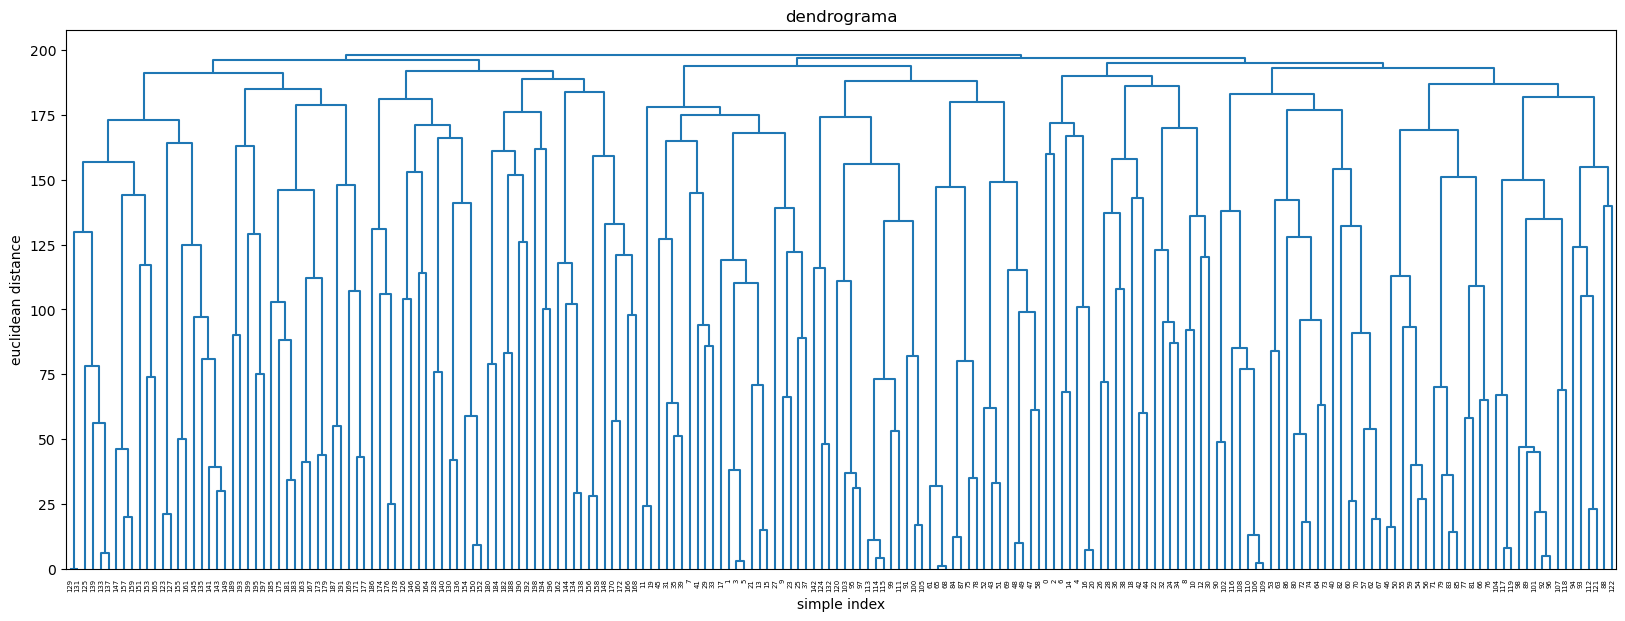

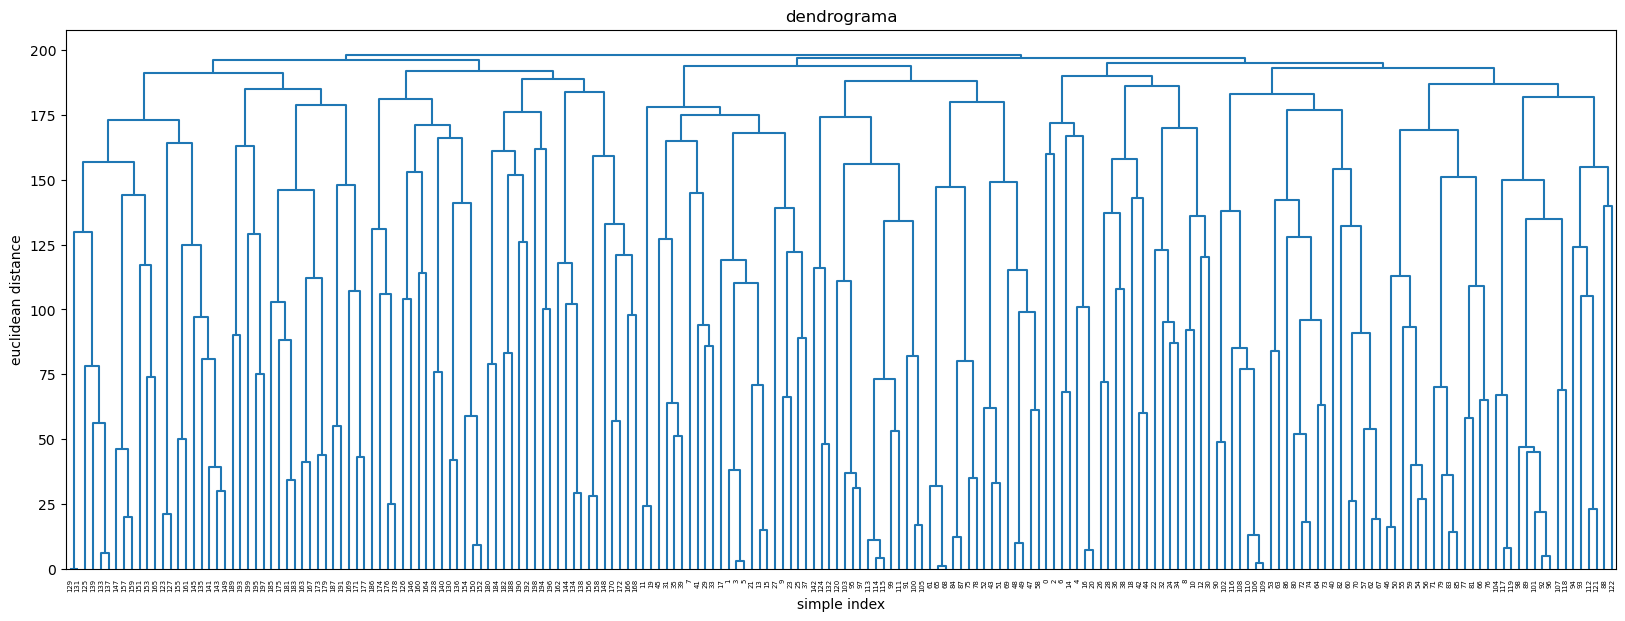

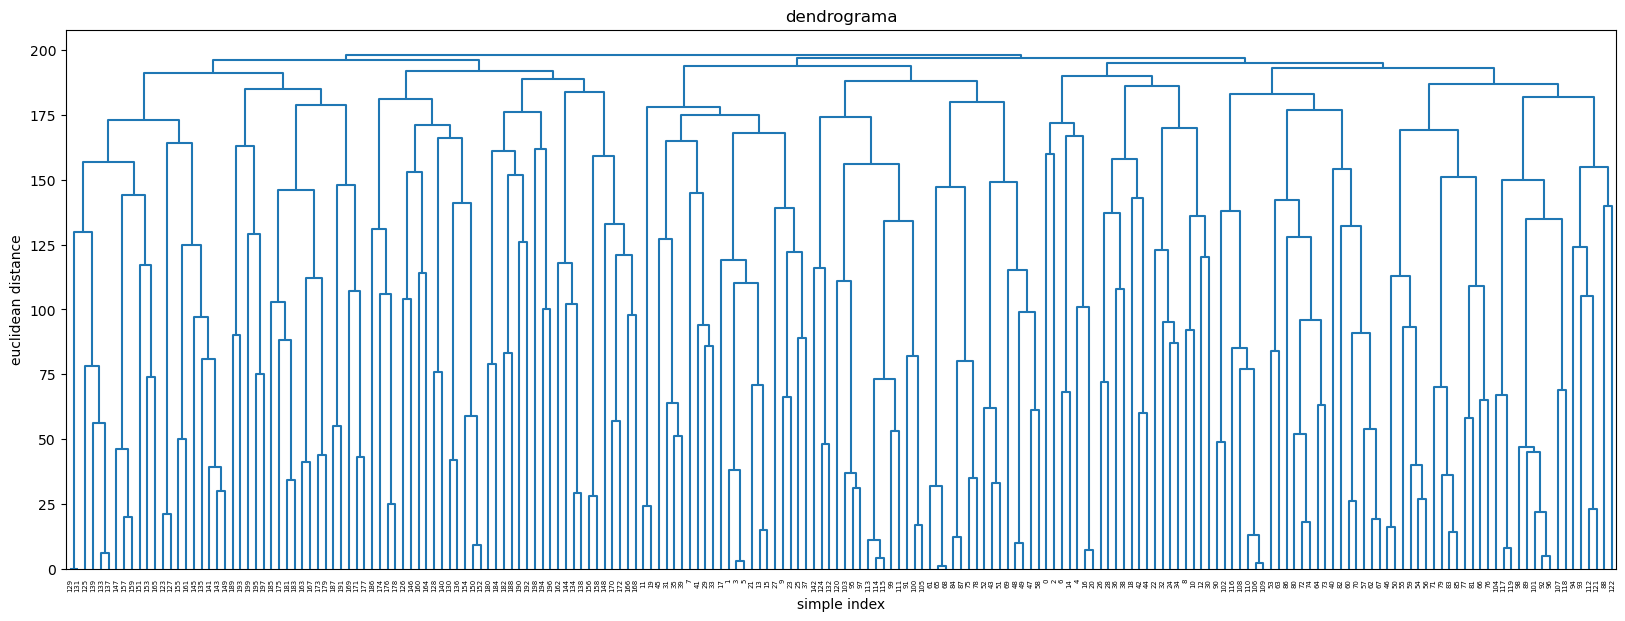

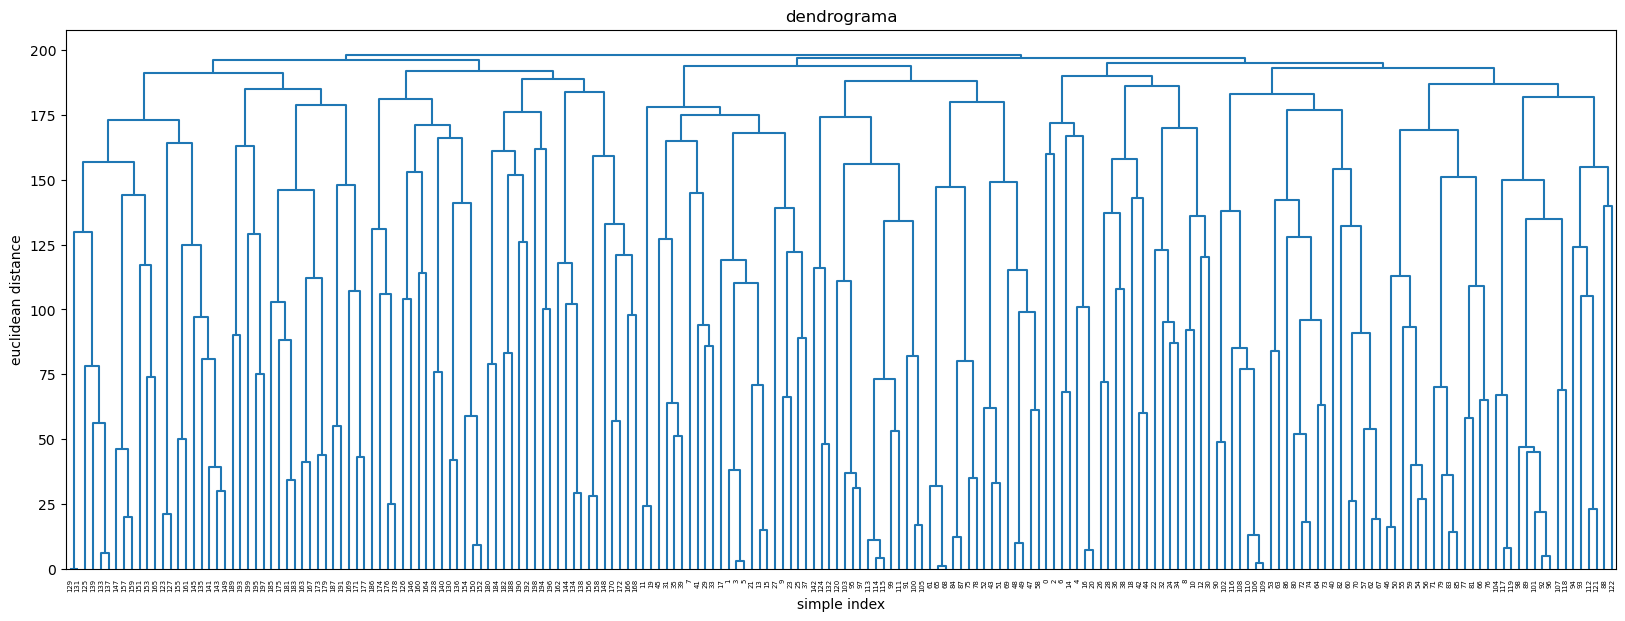

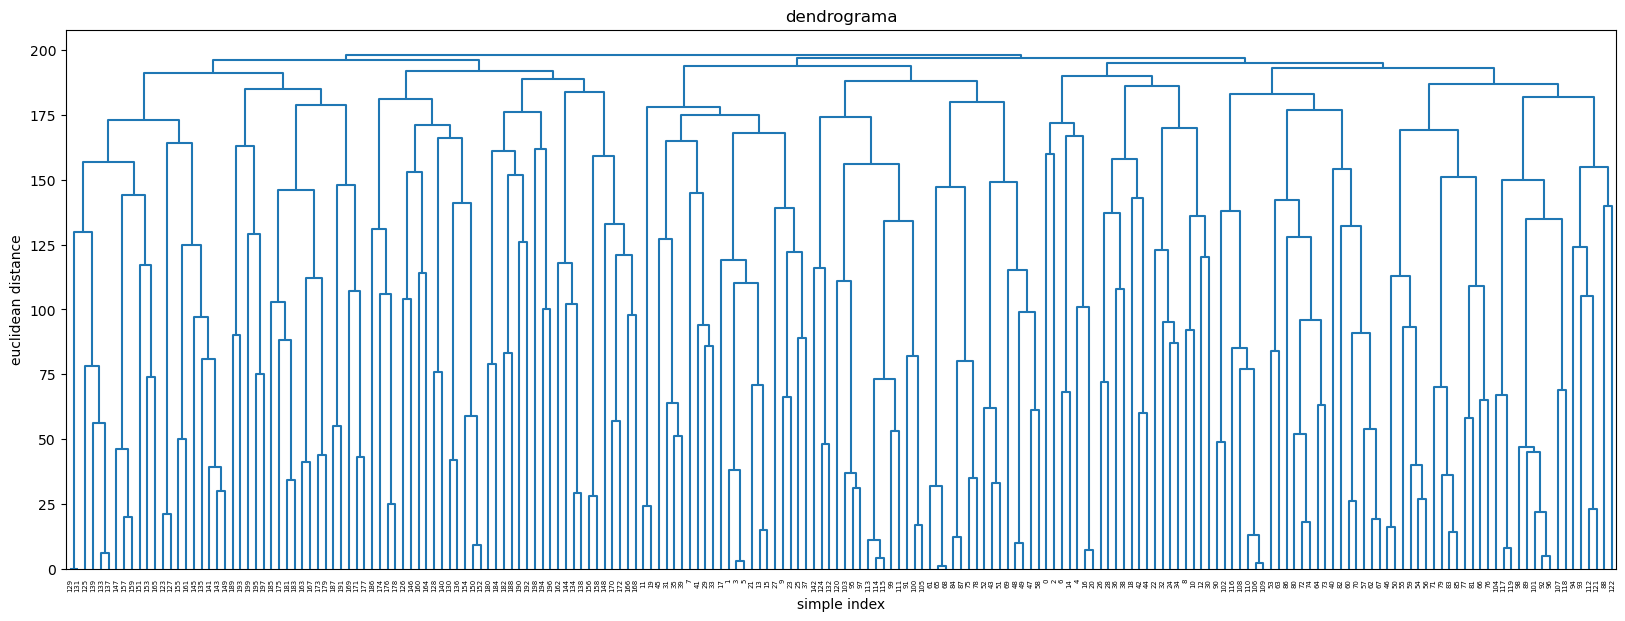

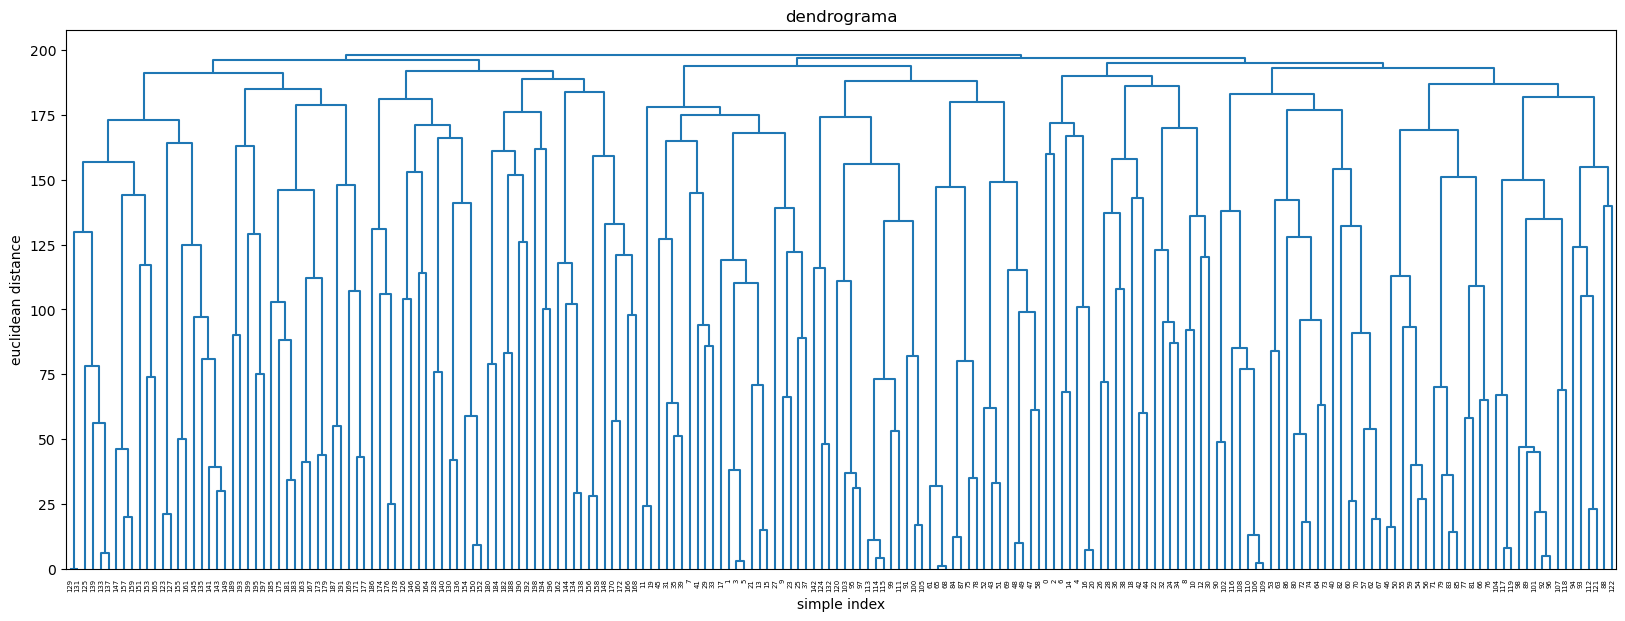

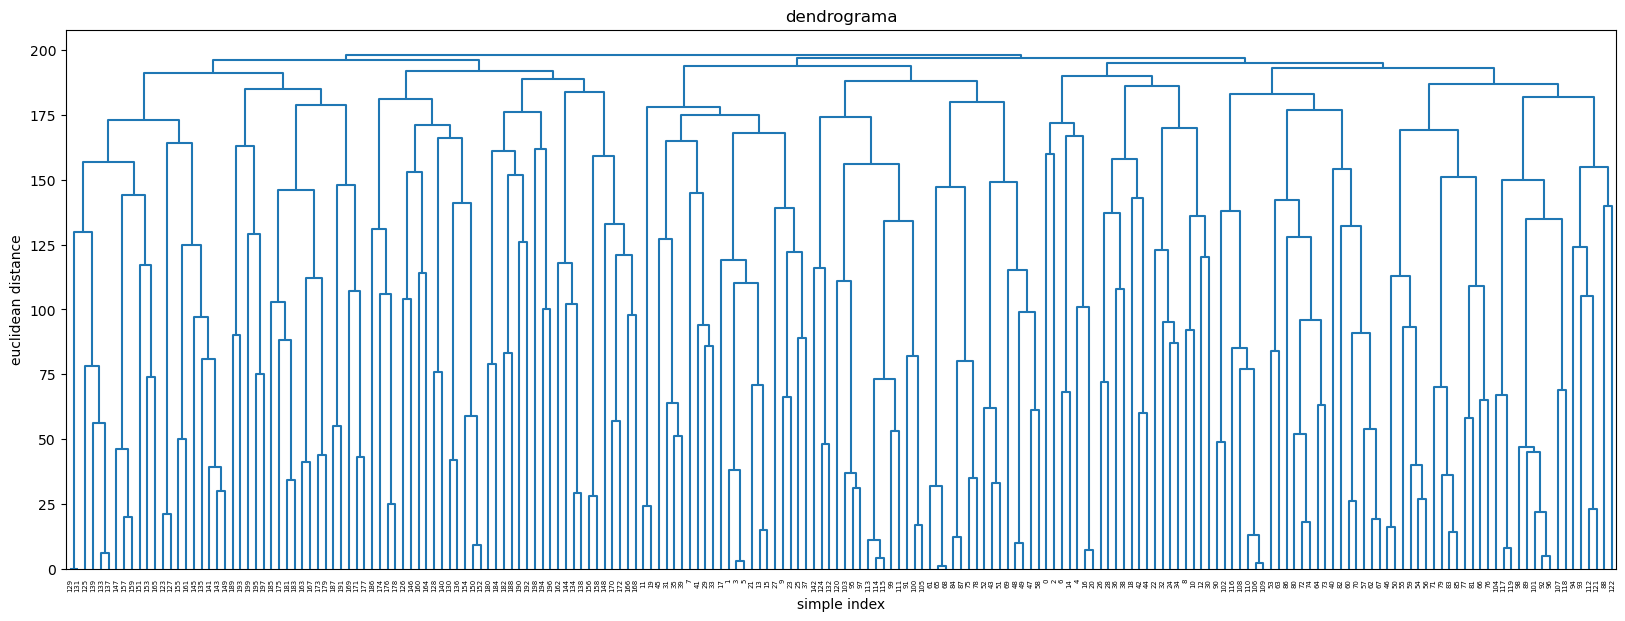

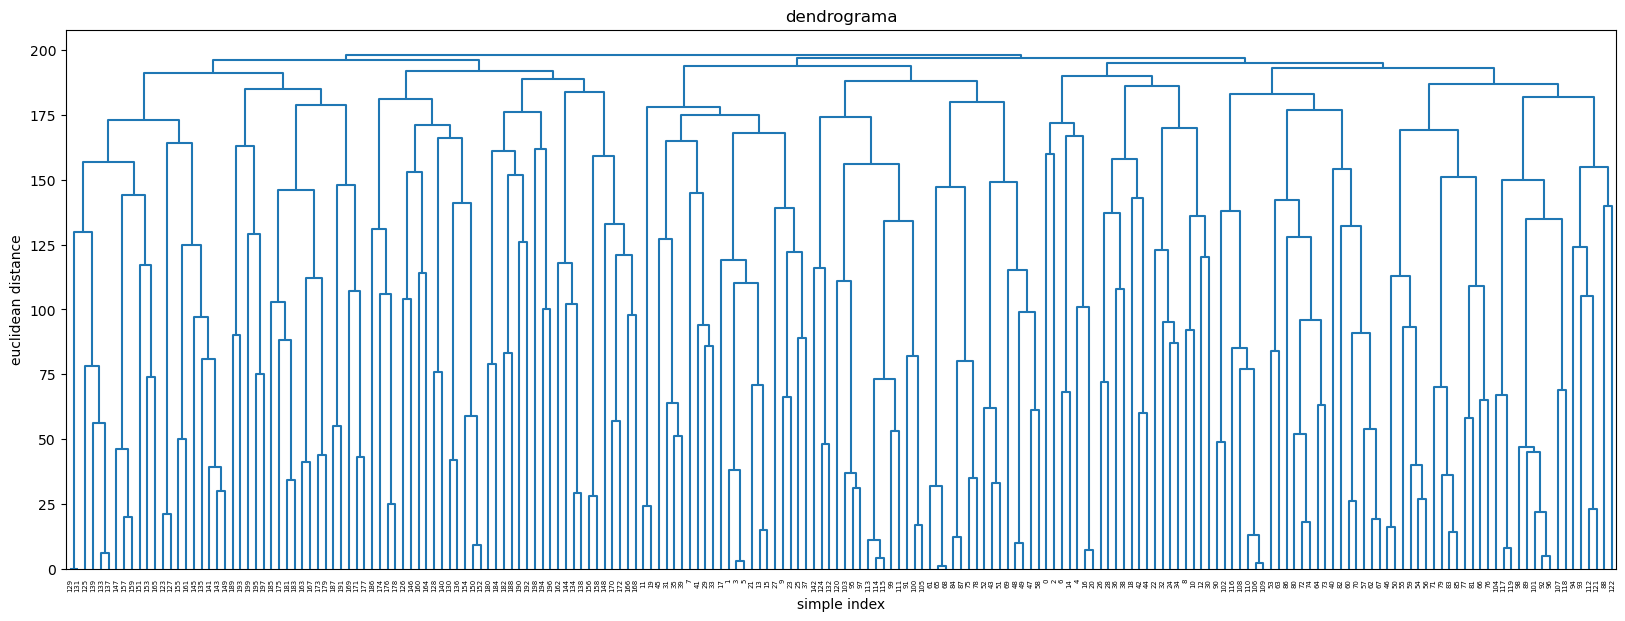

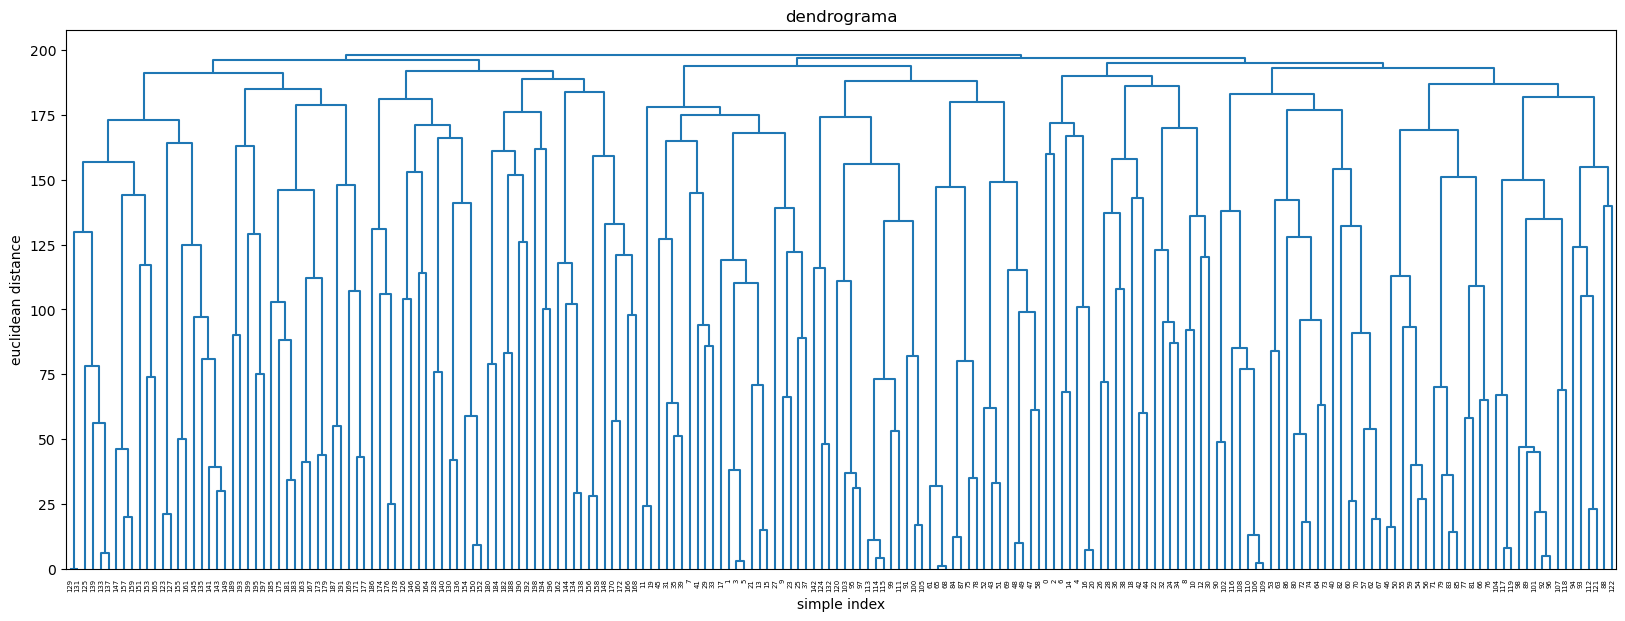

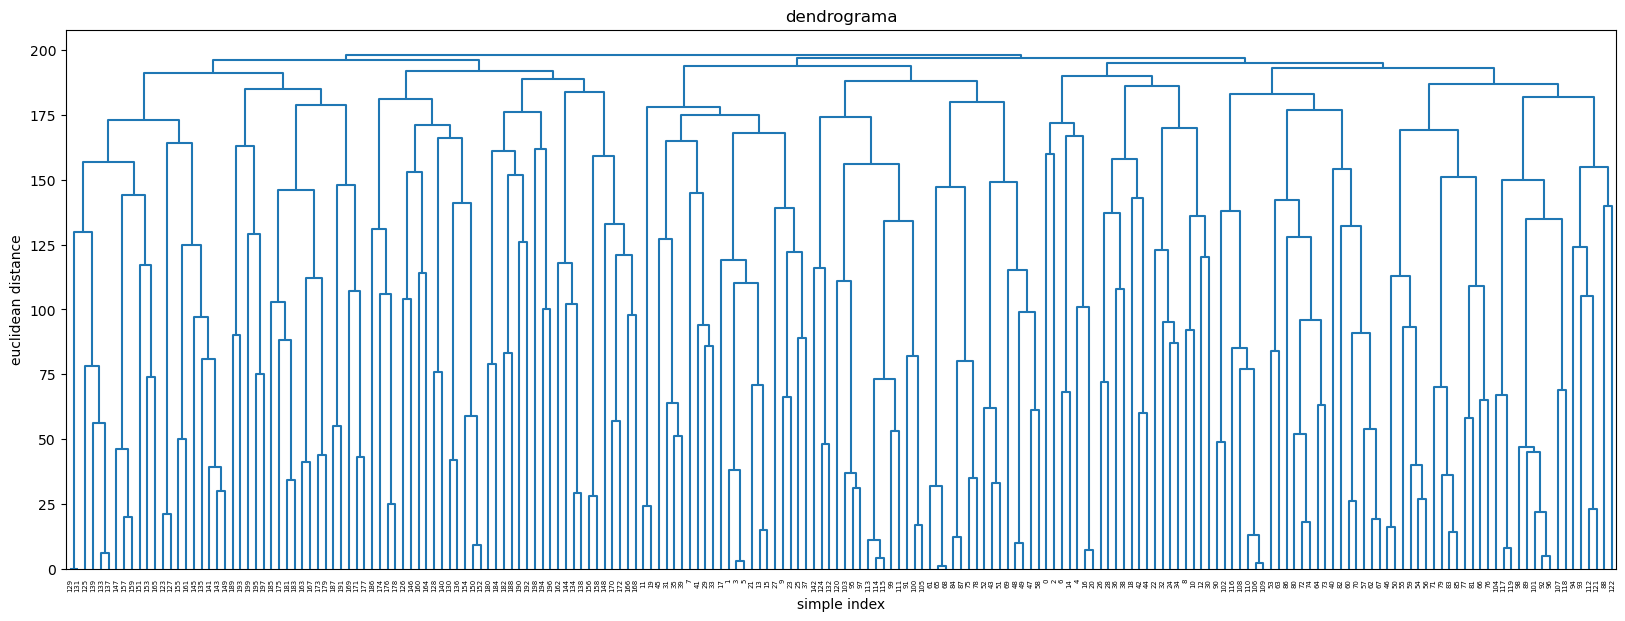

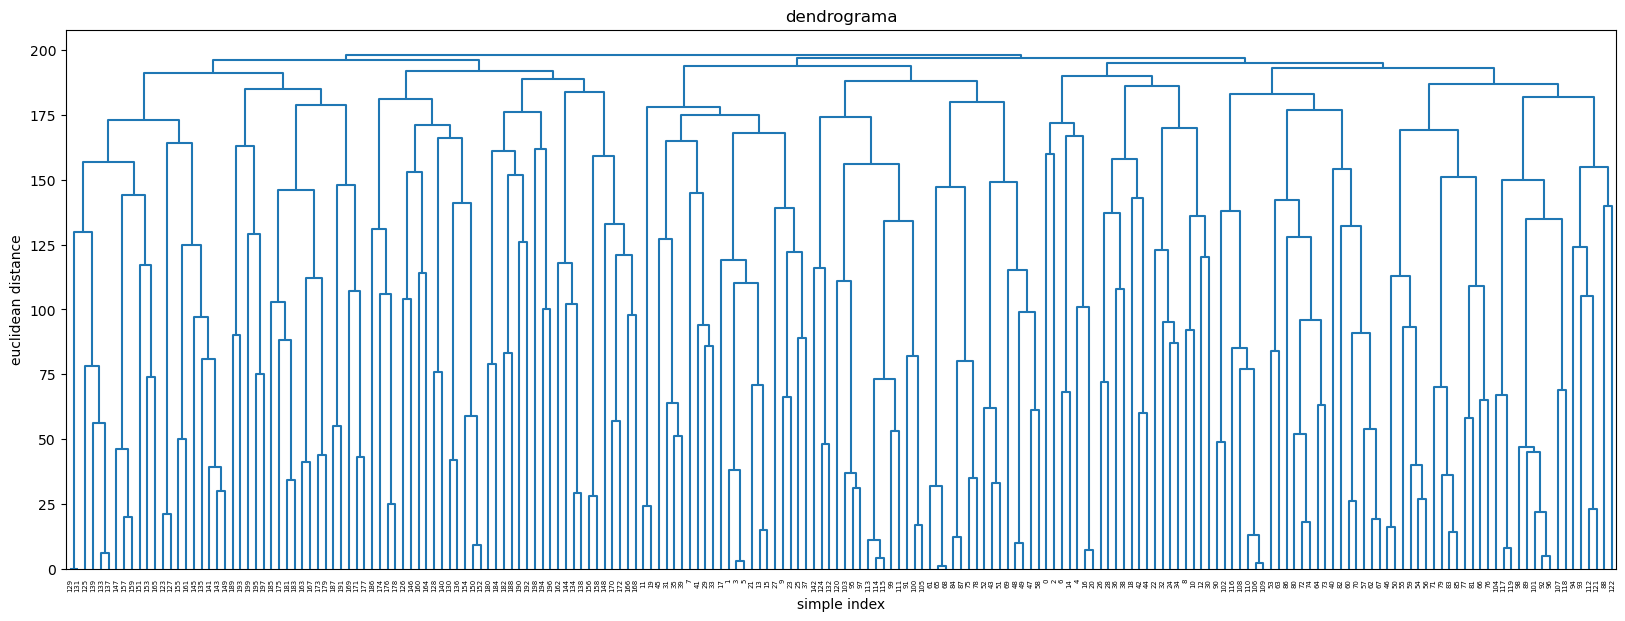

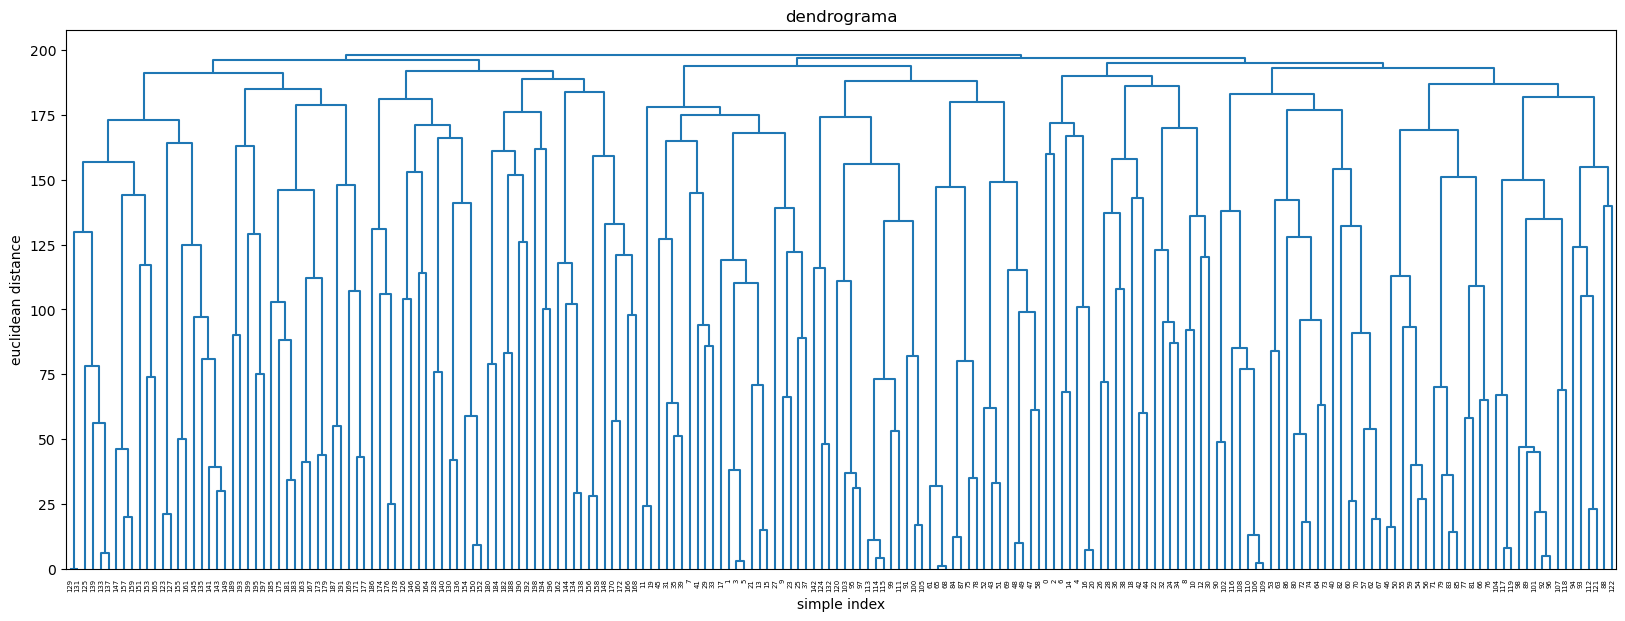

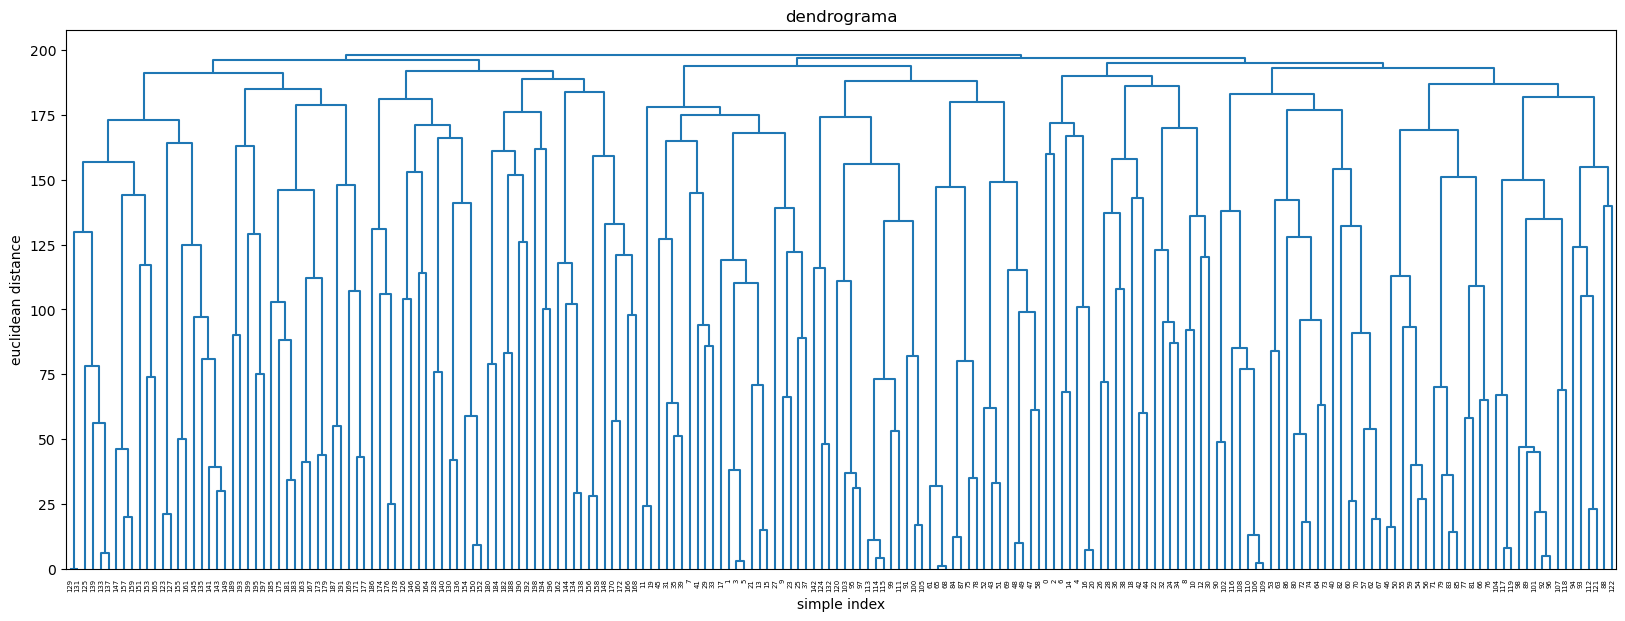

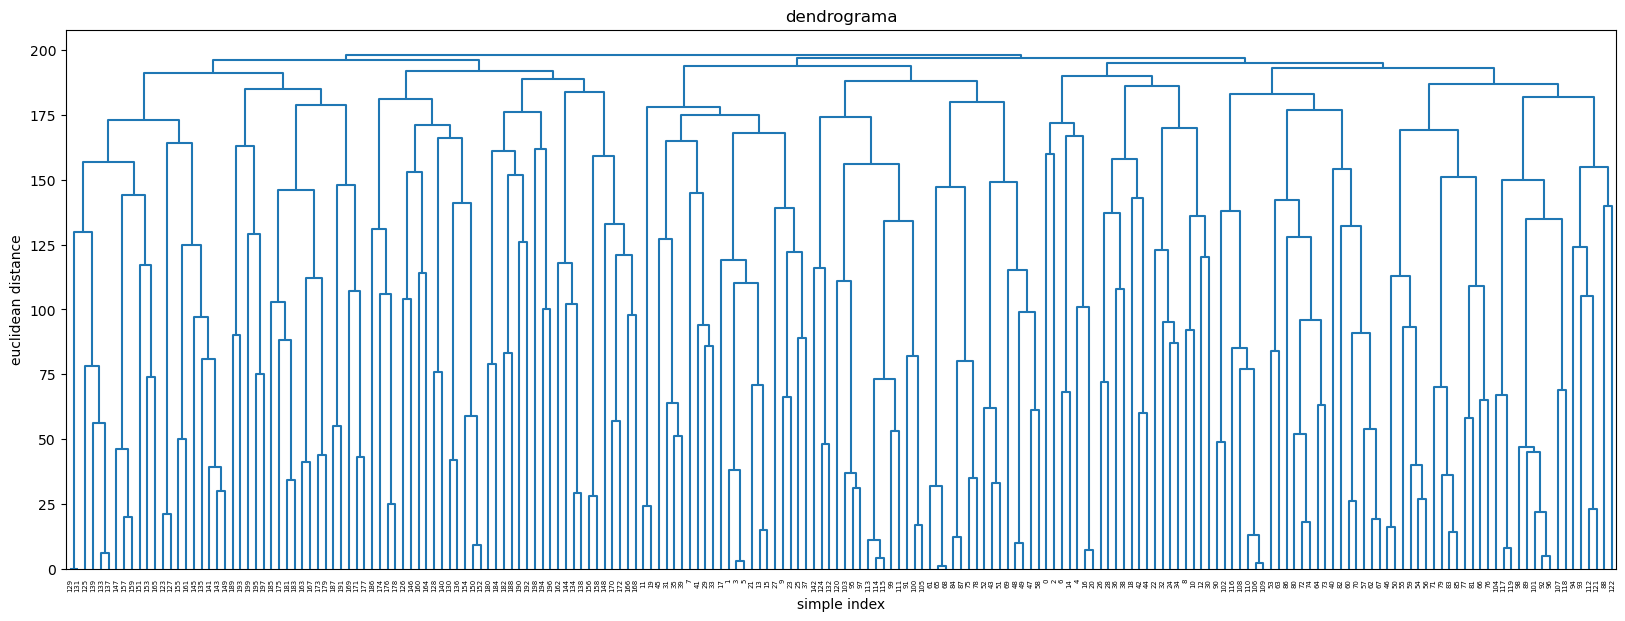

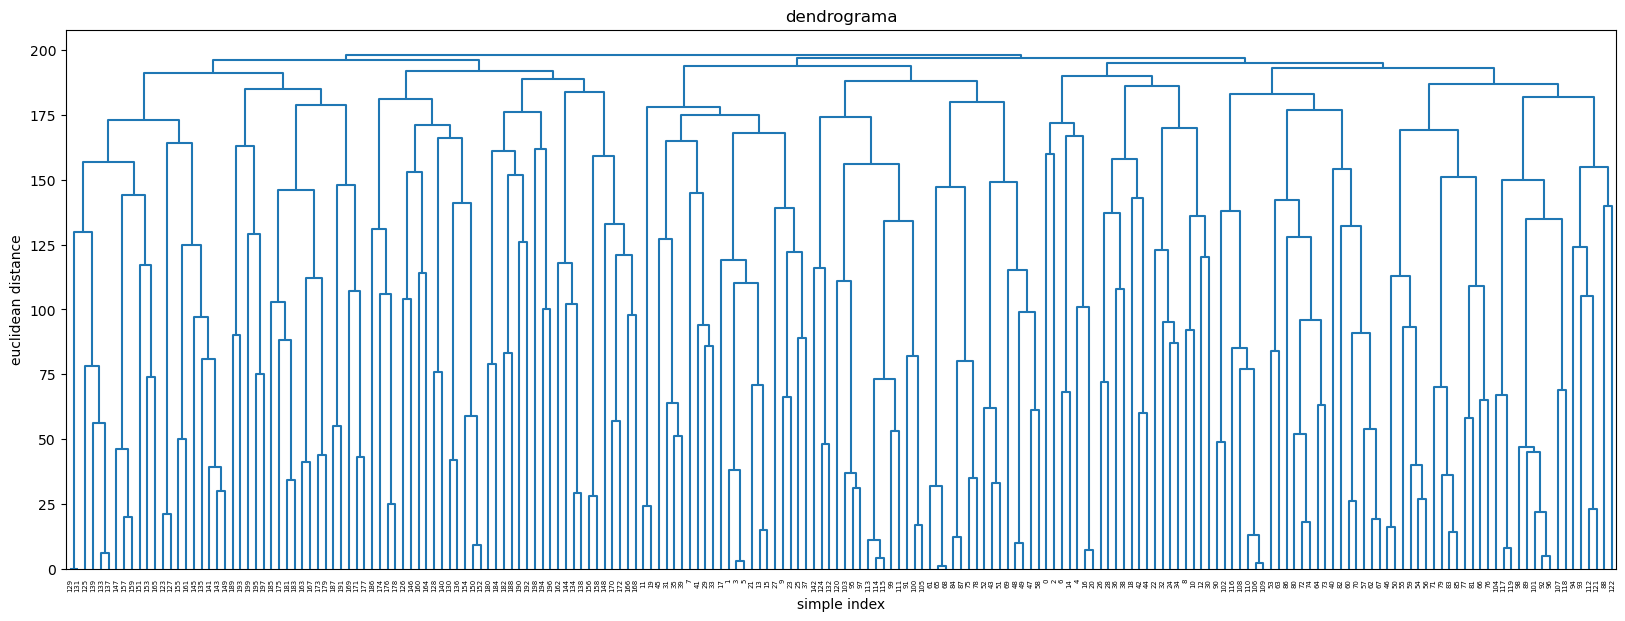

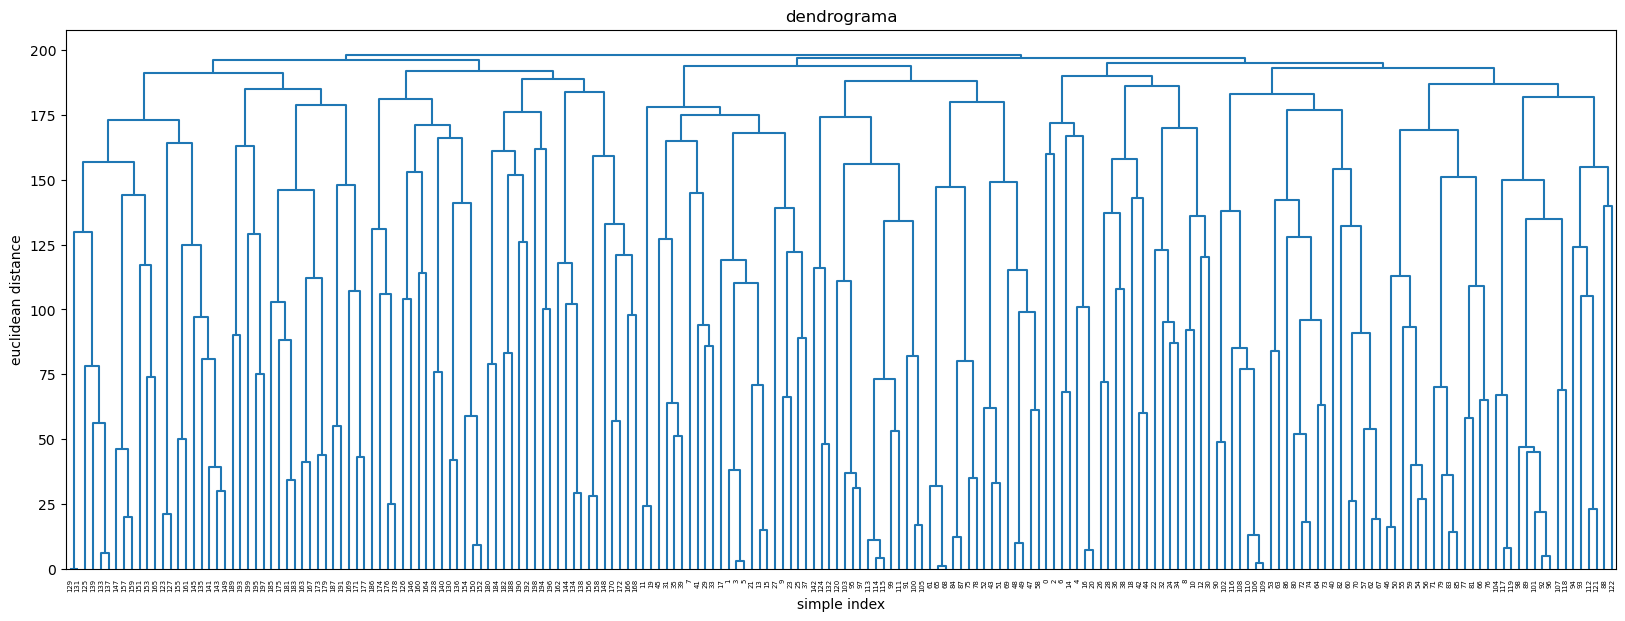

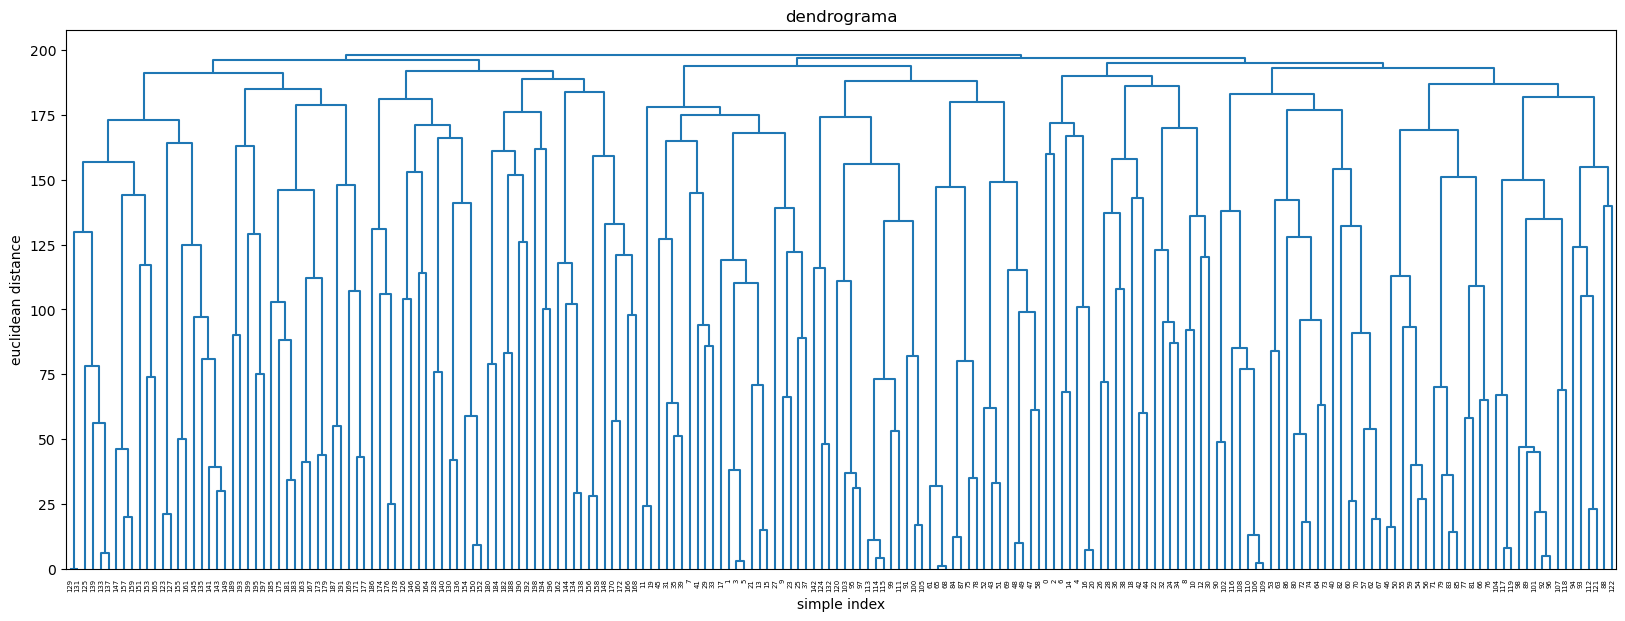

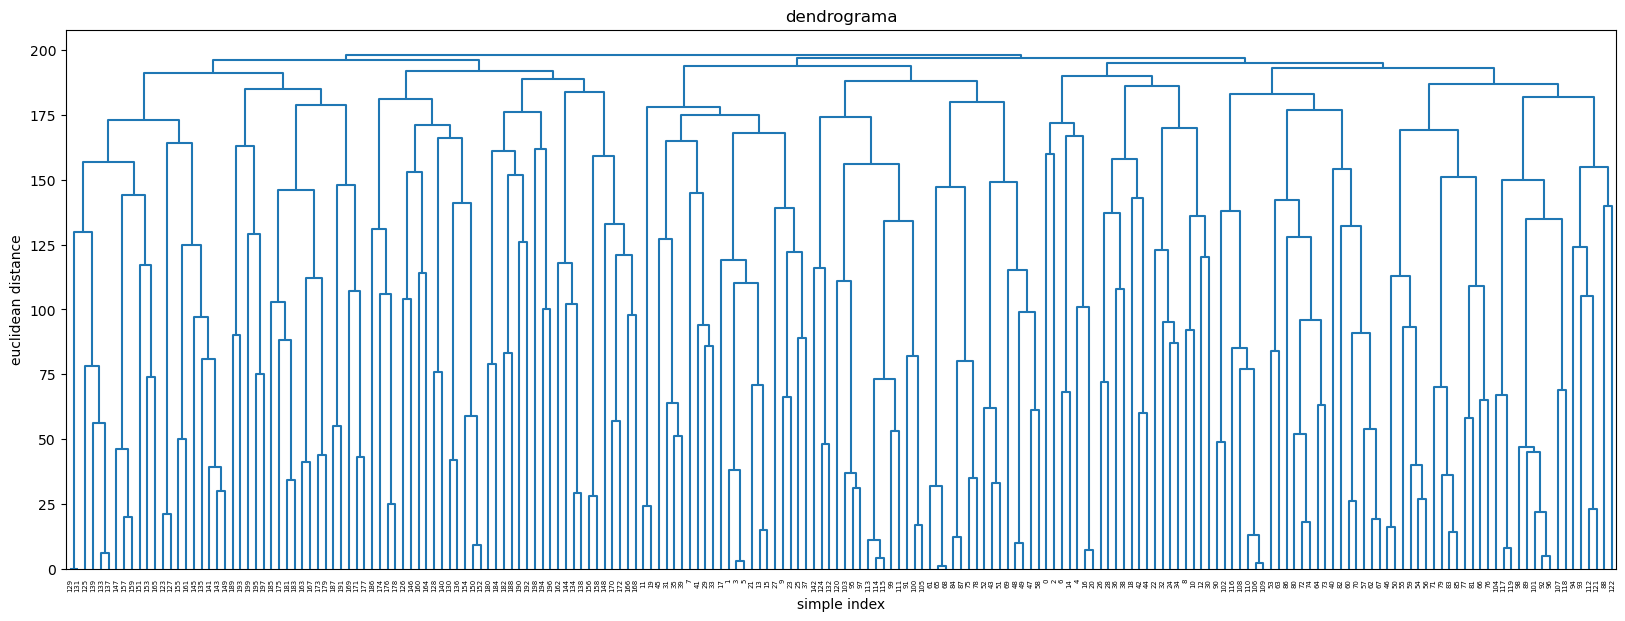

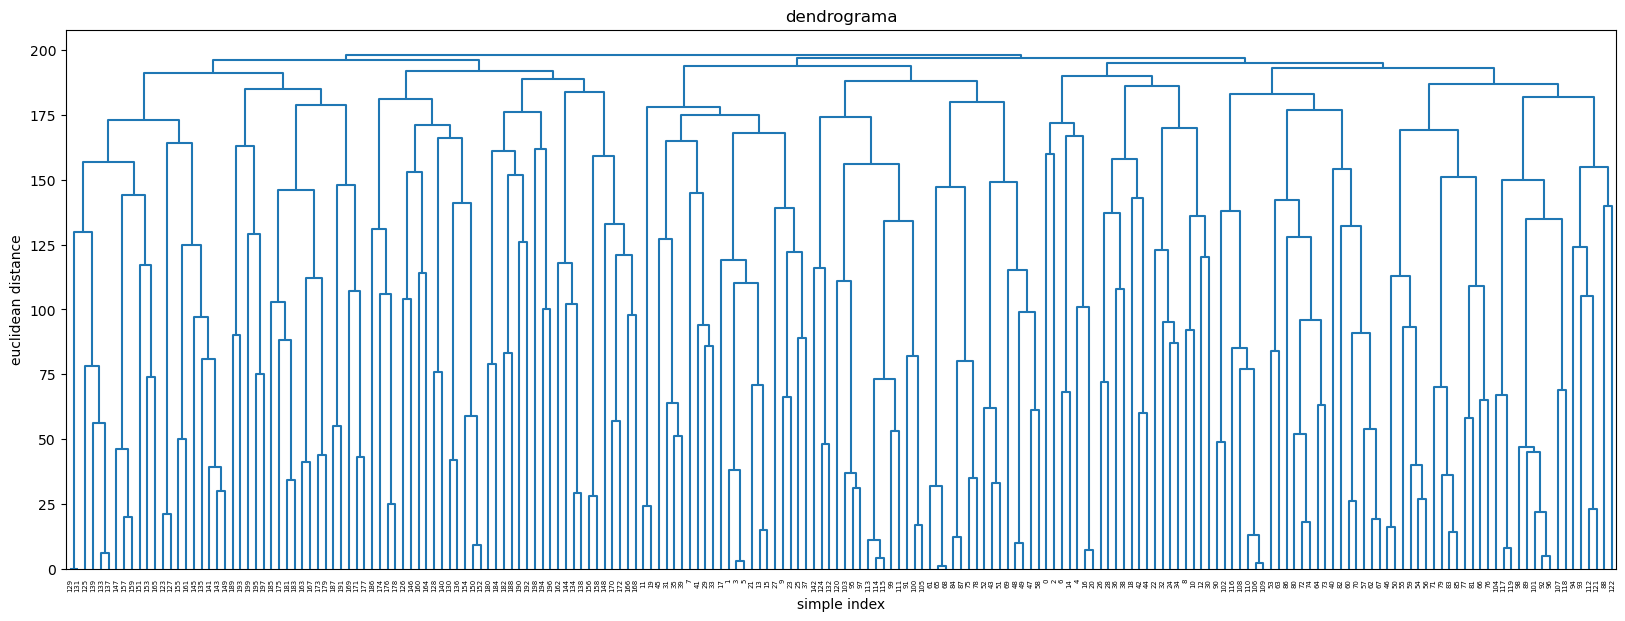

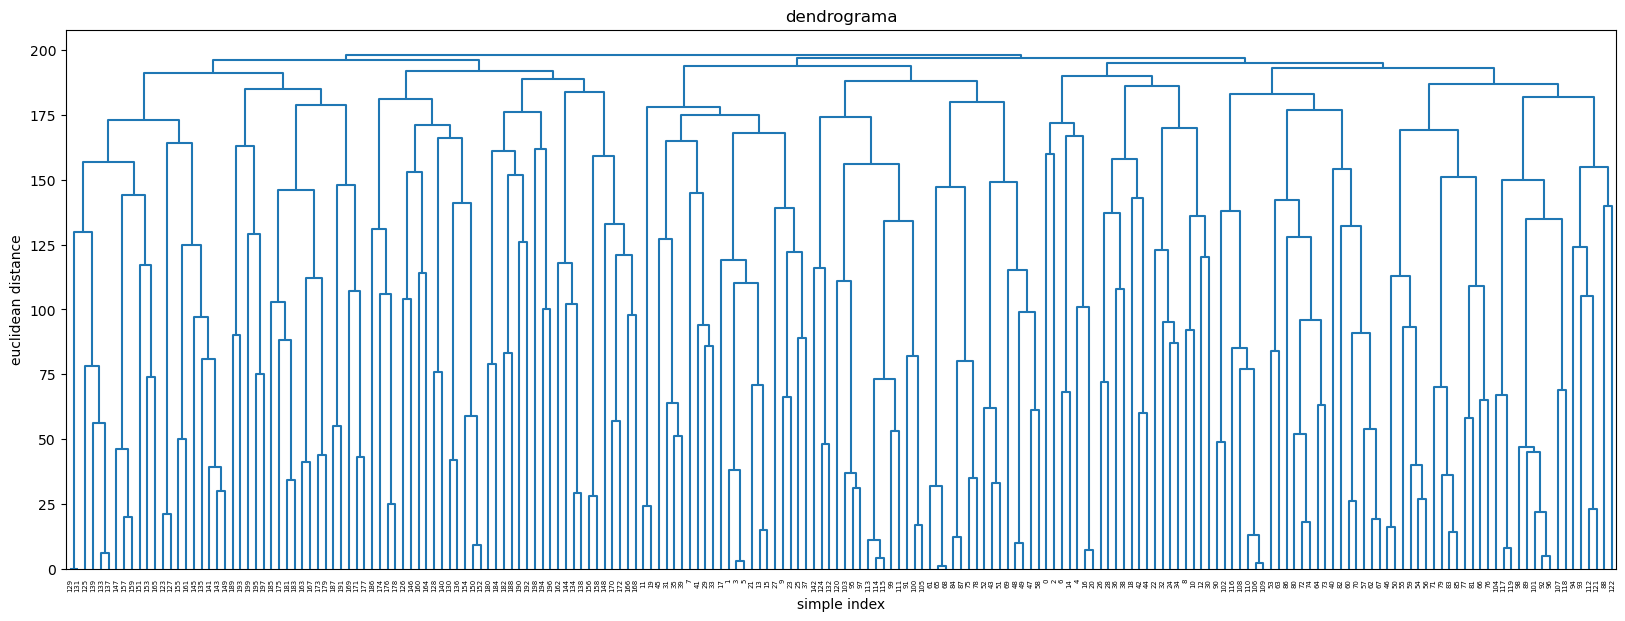

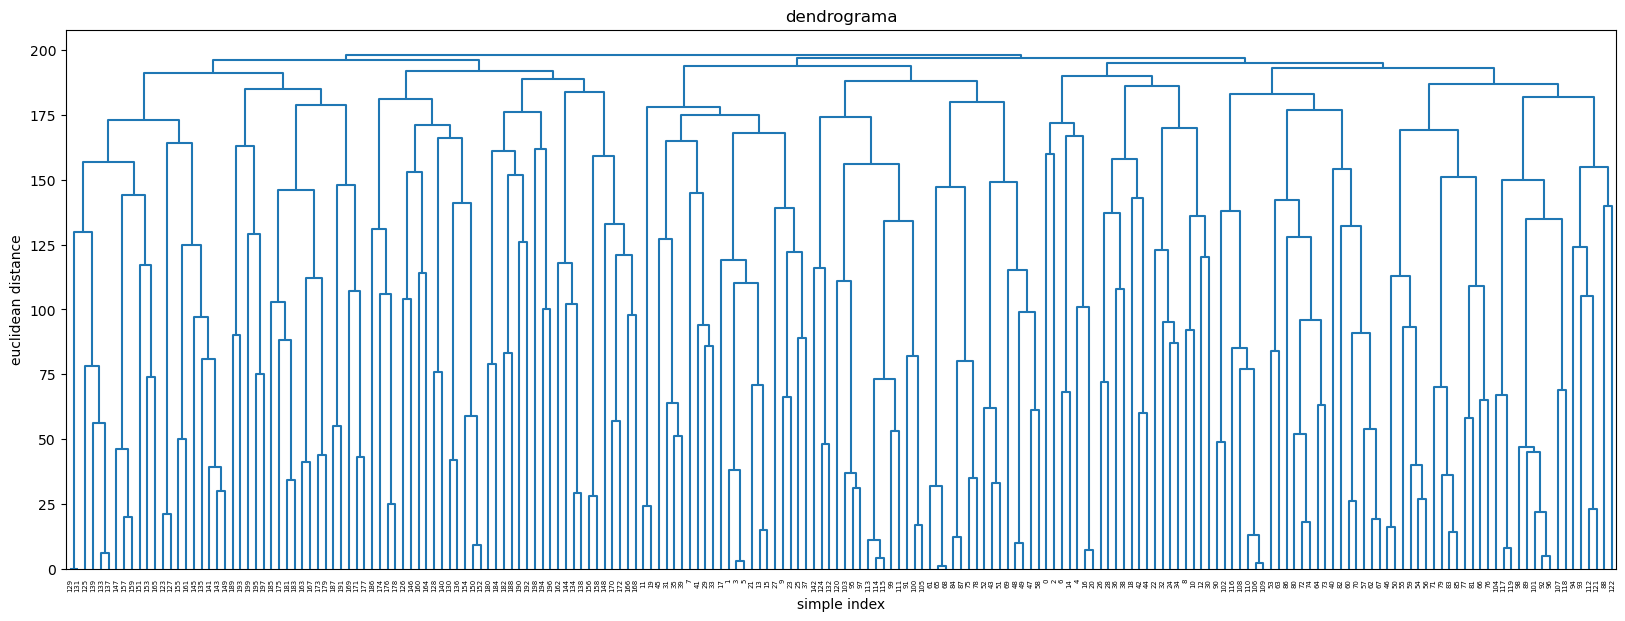

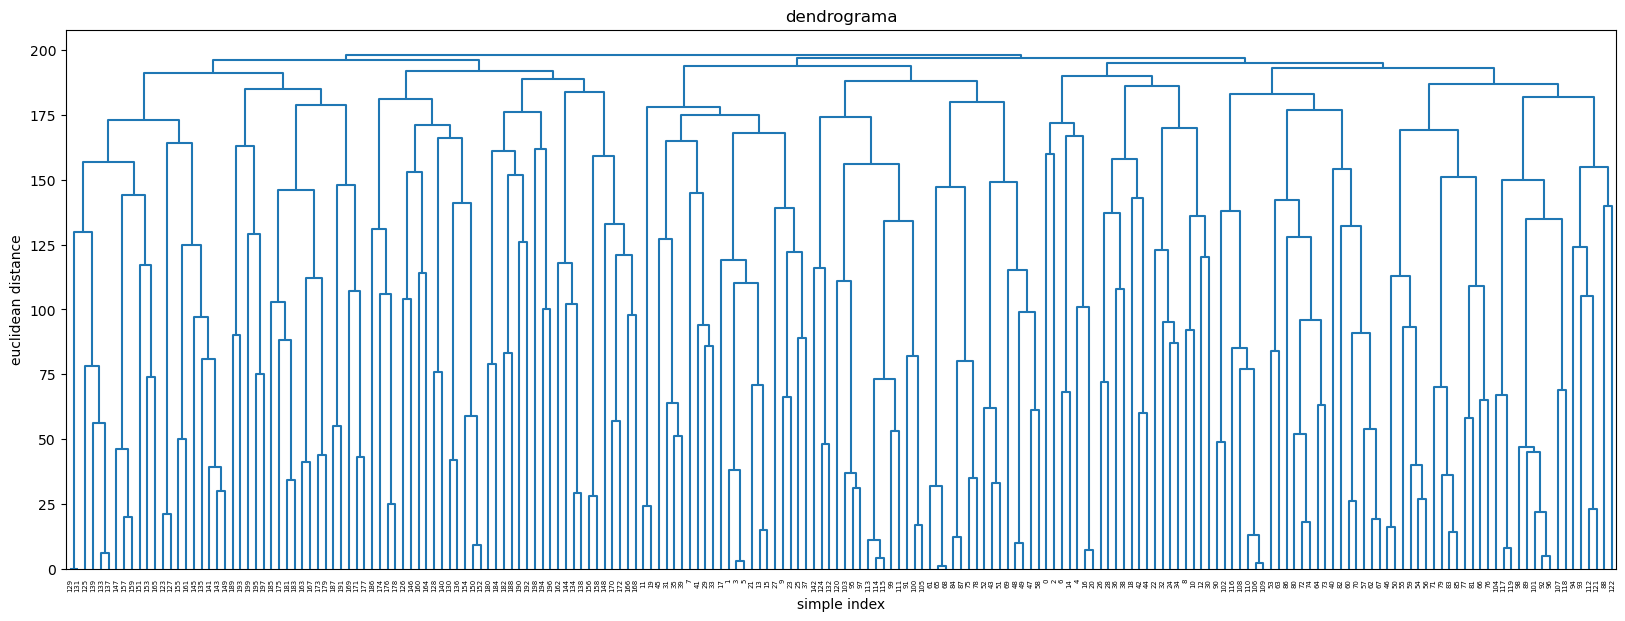

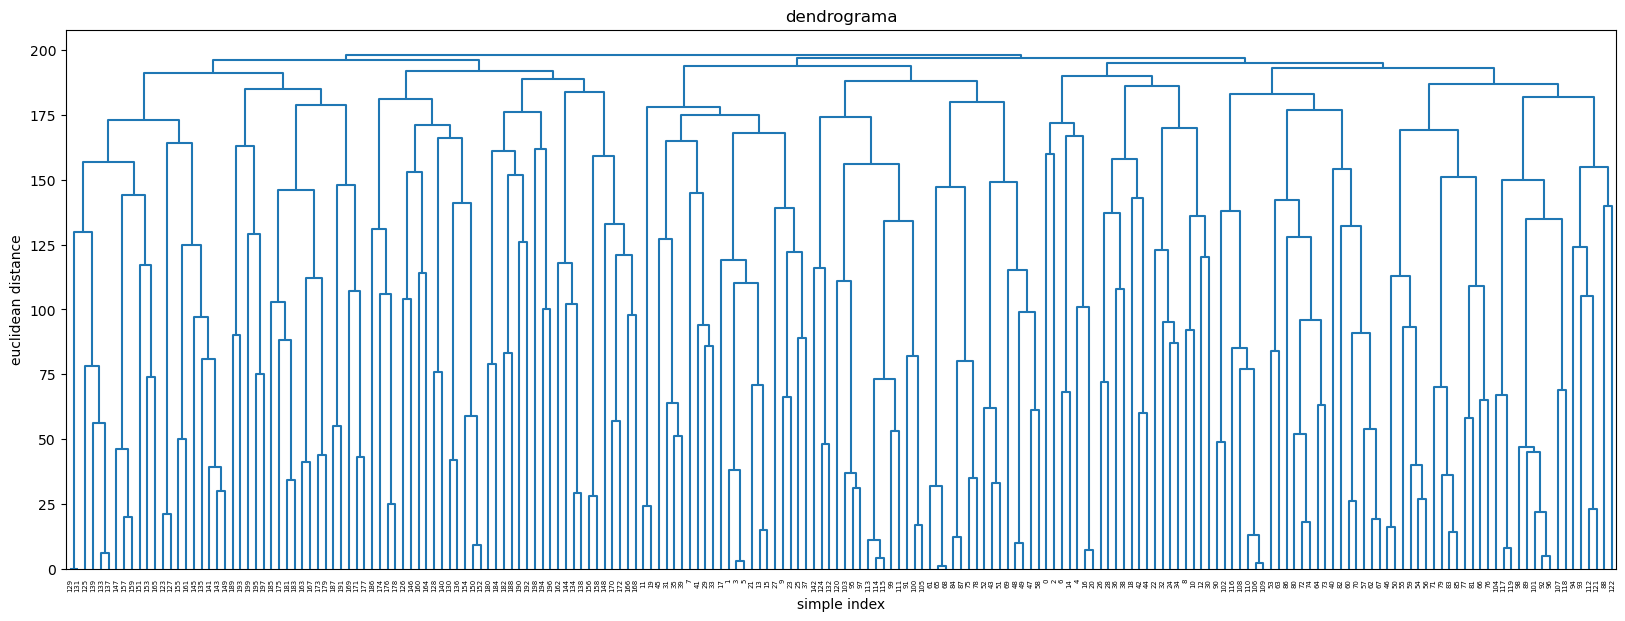

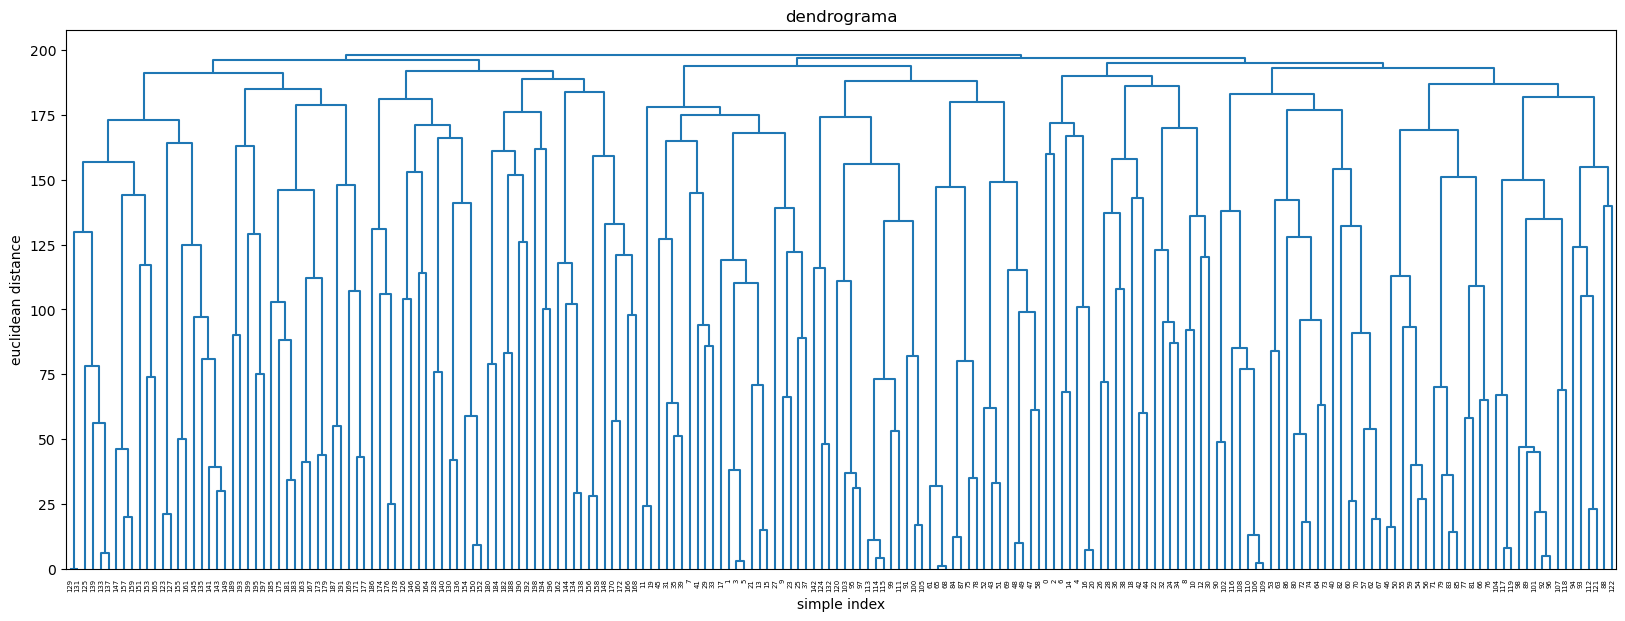

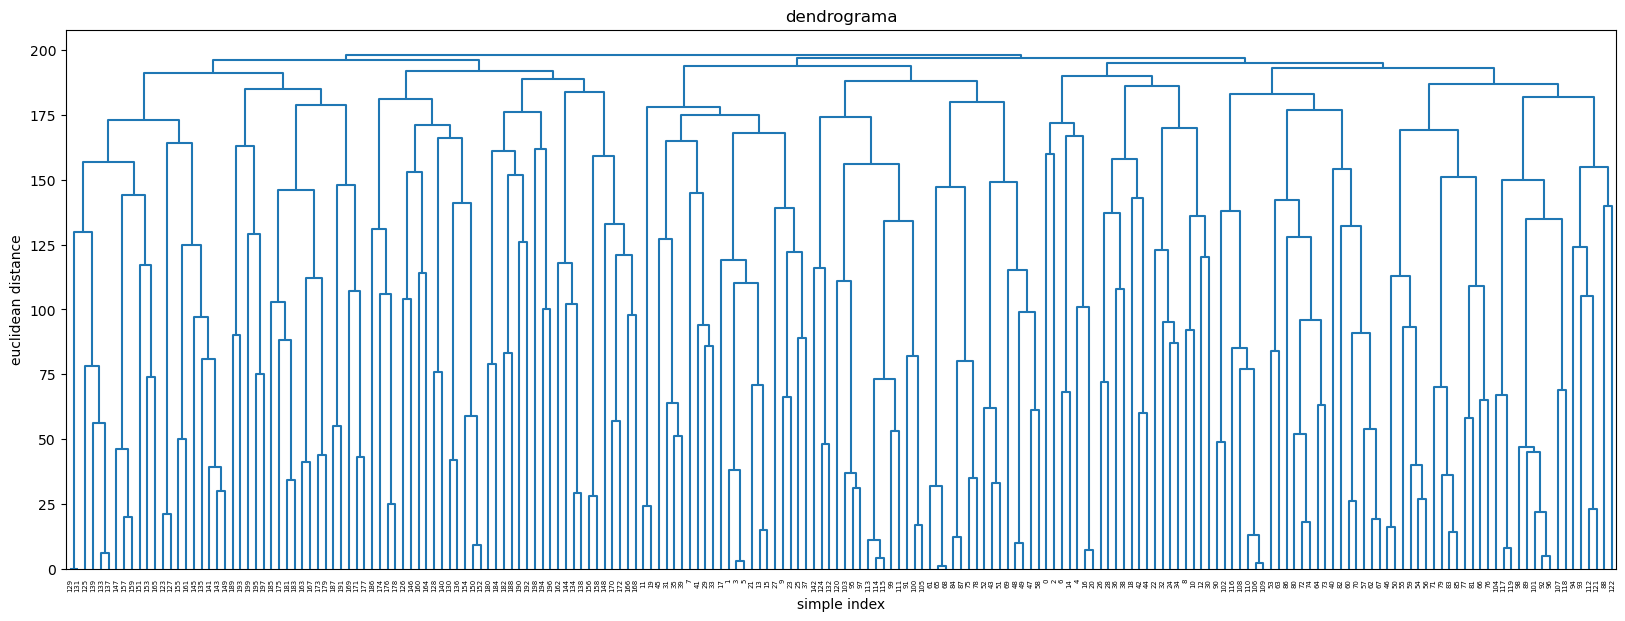

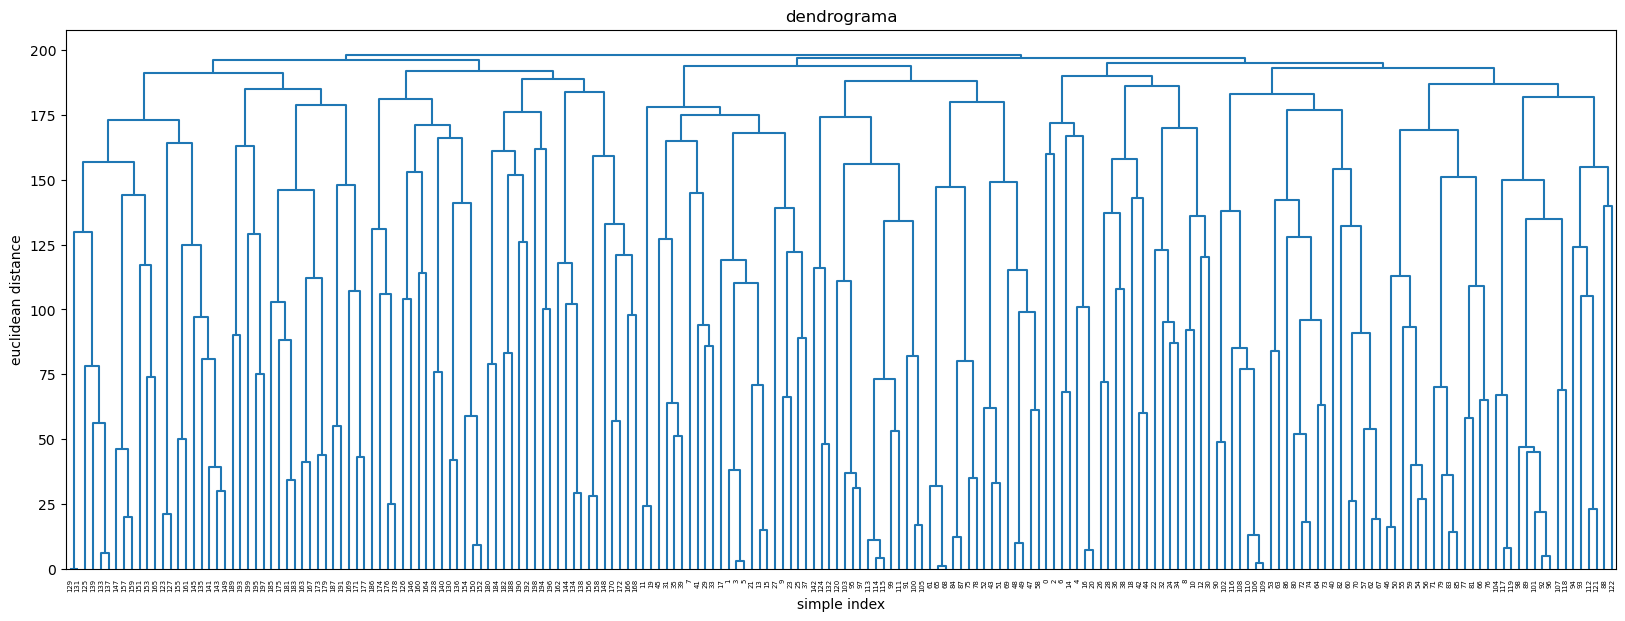

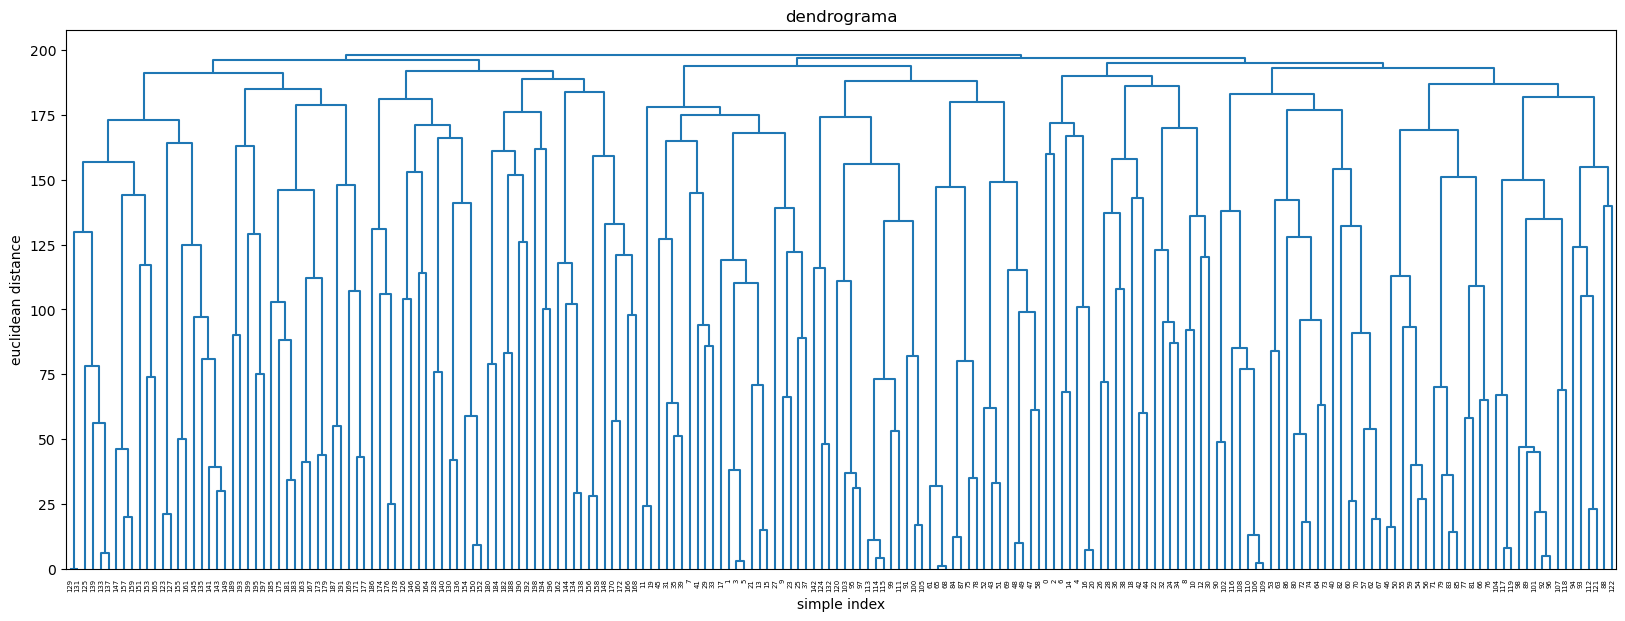

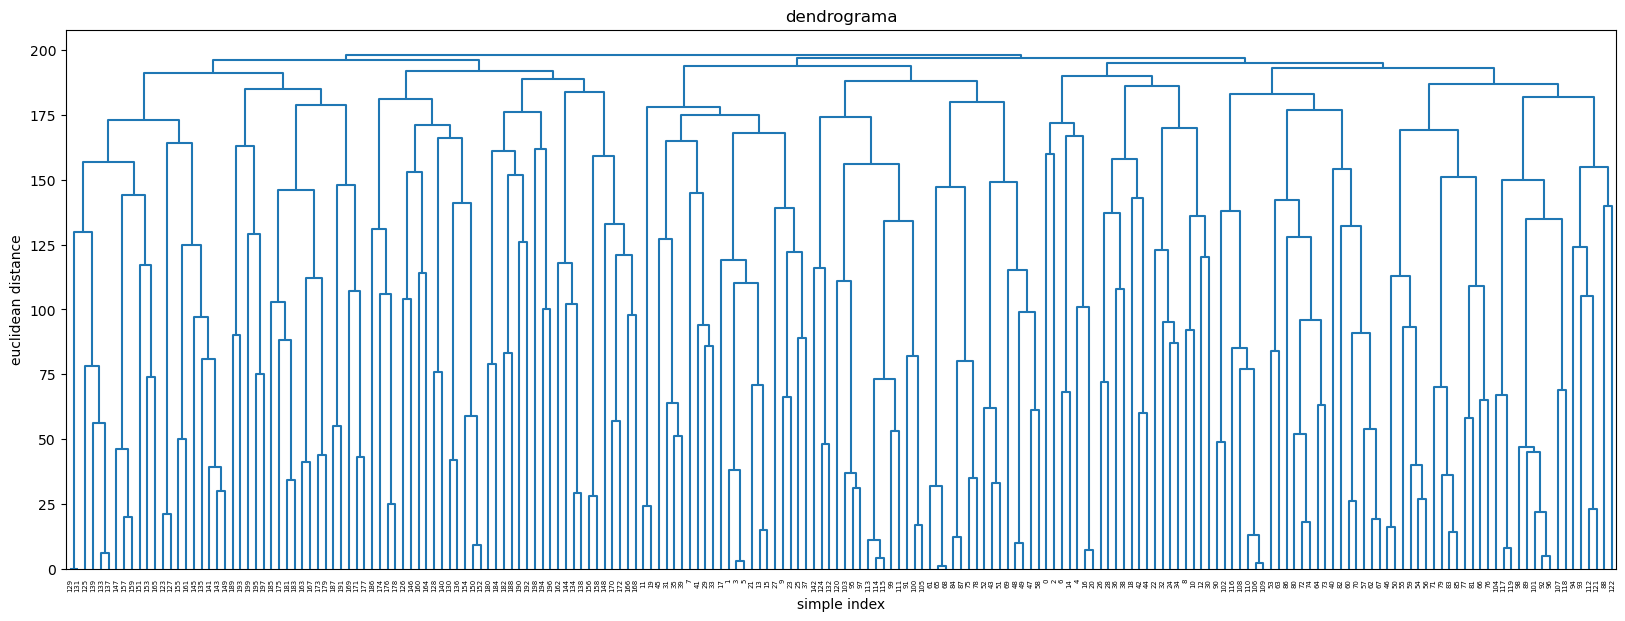

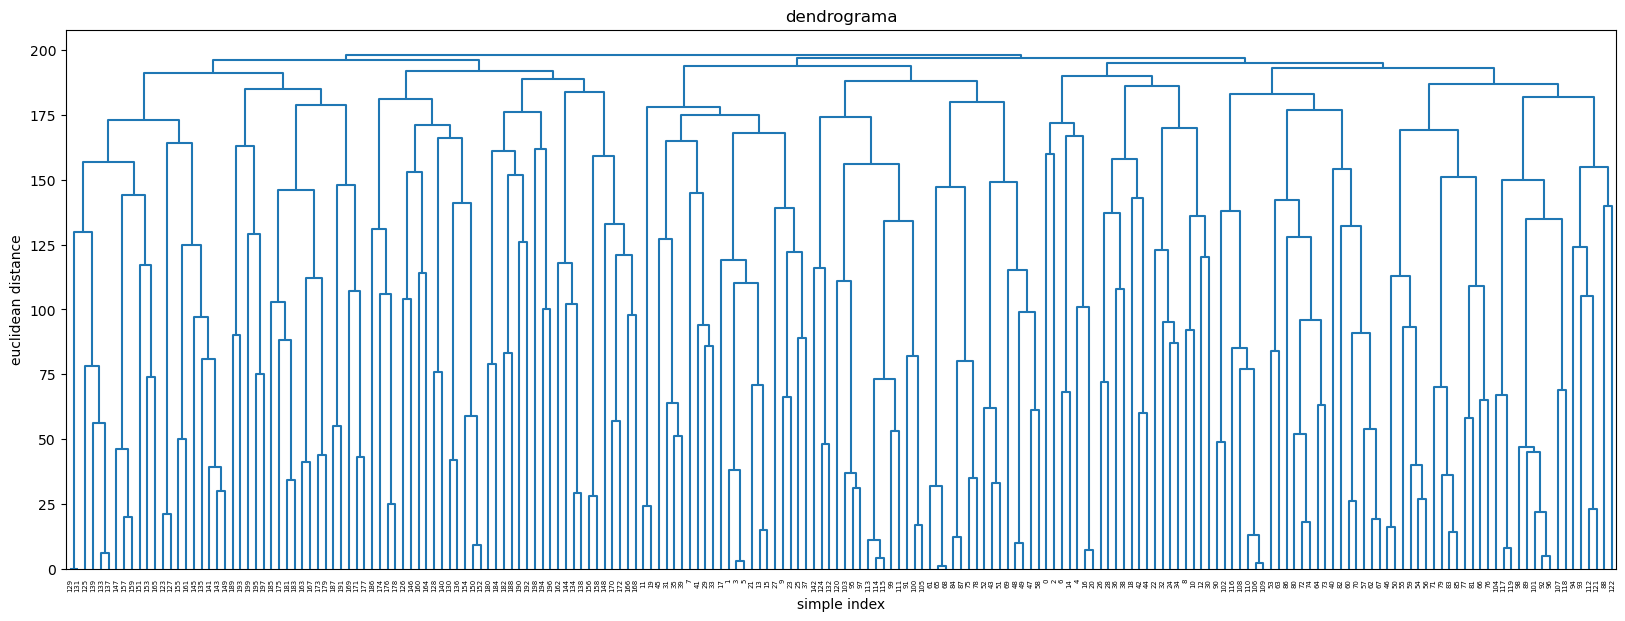

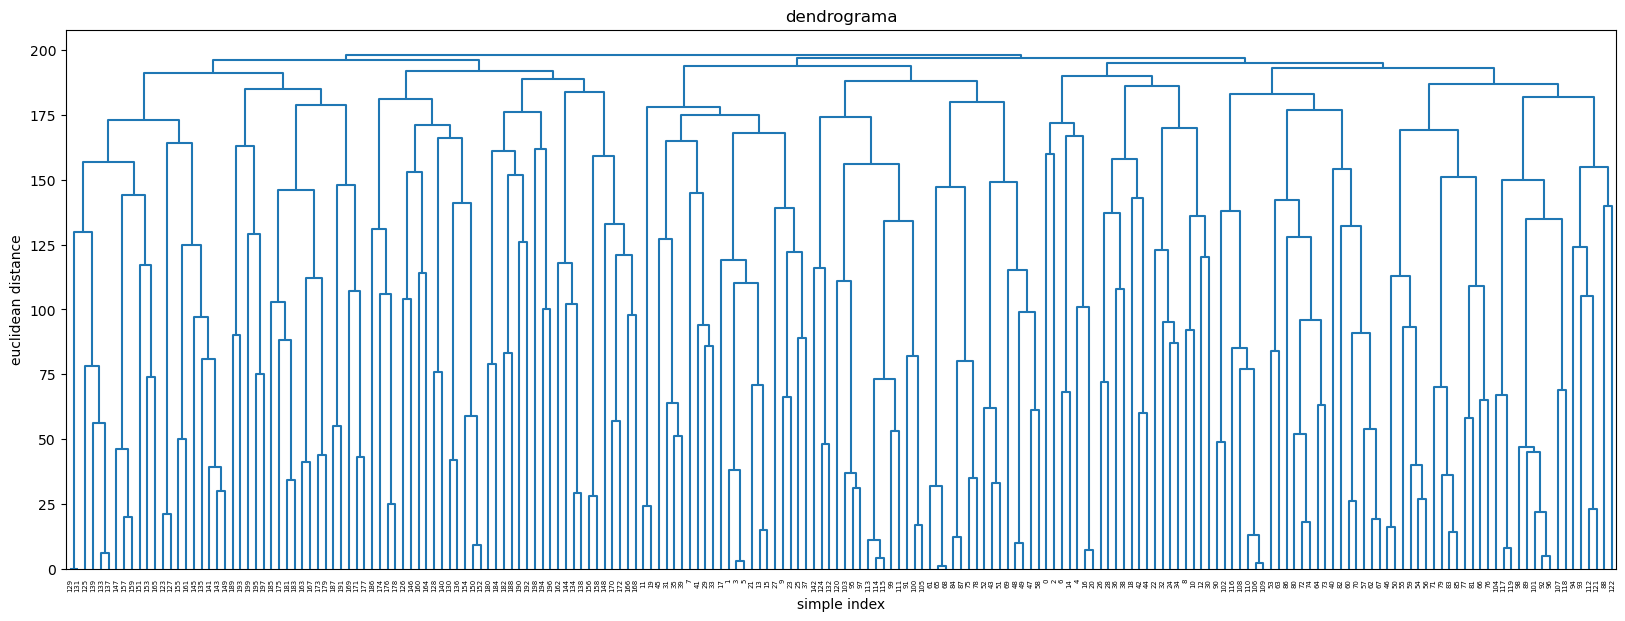

In [24]:
plot_dendrogram(hier_clustering, color_threshold=0)

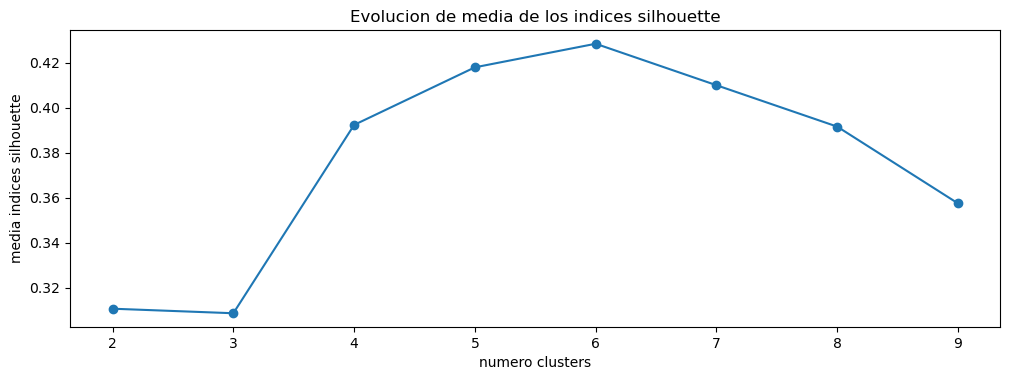

In [35]:
#metodo silhouette para identificar el numero optimo de clusters

range_n_clusters = range(2, 10)  
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=n_clusters)
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(12, 3.85))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolucion de media de los indices silhouette")
ax.set_xlabel('numero clusters')
ax.set_ylabel('media indices silhouette')
plt.show() 

In [29]:
#calcular medidas de calidad
print("\nmedidas de calidad para clustering jerarquico: ")
print("puntaje de silueta:", metrics.silhouette_score(x,labels_hier))
print("indice de calinski-Harabasz:", metrics.calinski_harabasz_score(x,labels_hier))
print("Davies-blouldin Index:",metrics.davies_bouldin_score(x,labels_hier))


medidas de calidad para clustering jerarquico: 
puntaje de silueta: 0.42832993481997816
indice de calinski-Harabasz: 143.6561433644843
Davies-blouldin Index: 0.787609522022419


In [30]:
#calcular el coeficiente de correlacion cofenetico
from scipy.cluster.hierarchy import linkage
# compute the distances
x_dist = pdist(x)
#compute the linkage matrix
z= linkage(x,'ward')
# calcular el coeficiente de correlacion cofenetica
coef_cofenetico = cophenet(z, x_dist)
print("coeficiente de correlacion cofenetica: ", coef_cofenetico)

coeficiente de correlacion cofenetica:  (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))
